In [1]:
import os
import tempfile
import scanpy as sc
import scvi
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
import scipy
from sklearn.decomposition import PCA
from k_means_constrained import KMeansConstrained
from scipy.stats import entropy
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans

/opt/homebrew/Caskroom/miniforge/base/envs/Team2_updated/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read_h5ad("/Users/tanushkumar/Dropbox/CS690/Lung.h5ad")
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor="cell_ranger", batch_key="batch")
adata = adata[:, adata.var.highly_variable].copy()

/opt/homebrew/Caskroom/miniforge/base/envs/Team2_updated/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/opt/homebrew/Caskroom/miniforge/base/envs/Team2_updated/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/opt/homebrew/Caskroom/miniforge/base/envs/Team2_updated/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: FutureW

In [3]:
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="batch")
vae = scvi.model.SCVI(adata, gene_likelihood="nb",n_clusters = 1, n_pcs = 10,n_levels = 1,n_latent = 10)
vae.train()
#adata.obsm["scVI"] = vae.get_latent_representation()

/Users/tanushkumar/Desktop/CS690/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/opt/homebrew/Caskroom/miniforge/base/envs/Team2_updated/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/opt/homebrew/Caskroom/miniforge/base/envs/Team2_updated/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

Starting Clustering
Clustering Done
[[0.         0.         1.2873256  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.1021552  ... 0.         0.         0.        ]
 ...
 [0.46898478 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniforge/base/envs/Team2_updated/lib/python3.9/site-packages/lightning/pytorch/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Epoch 1/246:   0%|                                      | 0/246 [00:00<?, ?it/s]Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9763, 1.0100, 1.1048,  ..., 0.9624, 0.7747, 1.3601],
        [0.9305, 1.1084, 1.6904,  ..., 0.9904, 0.6150, 1.4822],
        [0.9824, 0.9512, 1.1059,  ..., 0.9379, 0.9873, 0.9351],
        ...,
        [1.0537, 1.1952, 0.9296,  ..., 0.7301, 0.9616, 0.9748],
        [1.0146, 0.8340, 1.2353,  ..., 0.7705, 0.8845, 1.0070],
        [1.1205, 1.0311, 1.1050,  ..., 1.1036, 0.9550, 0.8922]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4722, -0.3625,  0.2200,  ...,  0.1937, -0.0440,  0.1182],
        [ 0.2661, -0.4328,  0.1325,  ...,  0.2607,  0.6590, -0.0613],
        [ 0.2239, -0.0742,  0.0299,  ..., -0.4524, -0.0139, -0.0291],
        ...,
        [ 0.5739,  0.3637,  0.2984,  ..., -0.9432,  0.1737,  0.2309],
        [-0.0835, -0.0681,  0.2543,  ..., -0.0430, -0.0027,  0.6521],
        [ 0.1967,  0.7313, -0.1183,  ...,  0.1060,  0.1604,  0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9693, 1.0788, 1.1180,  ..., 0.8385, 1.0844, 0.9910],
        [0.8512, 0.9353, 1.3130,  ..., 1.2671, 0.9141, 1.0619],
        [1.1572, 0.9364, 0.9417,  ..., 1.2064, 0.9428, 1.1418],
        ...,
        [0.8810, 1.3065, 1.0330,  ..., 0.9560, 0.9192, 0.8911],
        [0.7244, 0.8352, 1.1929,  ..., 1.0769, 0.7748, 1.0551],
        [0.7443, 0.8148, 1.6026,  ..., 1.2738, 0.7929, 1.0622]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4893,  0.3502, -0.1707,  ...,  0.3683,  0.2461,  0.0058],
        [ 0.1740,  0.4887, -0.1830,  ..., -0.3425, -0.2633,  0.0385],
        [ 0.7250,  0.0379, -0.1732,  ..., -0.1129, -0.1026, -0.1662],
        ...,
        [ 0.6881,  0.7444,  0.2384,  ...,  0.3938,  0.6142,  0.0479],
        [ 0.5000, -0.2810, -0.1938,  ..., -0.5507,  0.3010, -0.0173],
        [ 0.6260,  0.3925,  0.2553,  ...,  0.1032,  0.9967,  0.3391]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0320, 1.0060, 0.9382,  ..., 1.3121, 0.9612, 1.0796],
        [0.8731, 1.1291, 0.8033,  ..., 0.8553, 0.9182, 1.3882],
        [0.8777, 0.9165, 1.2322,  ..., 0.8724, 0.7976, 1.0540],
        ...,
        [0.9457, 1.0882, 1.3757,  ..., 0.8708, 0.9704, 1.0254],
        [0.9486, 1.2575, 1.1287,  ..., 1.0943, 0.8931, 1.1217],
        [1.1039, 0.9220, 1.0800,  ..., 0.6505, 0.8520, 0.9551]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4370,  0.1471, -0.4643,  ...,  0.0374, -0.0677,  0.1331],
        [ 0.8324, -0.3008,  0.0192,  ...,  0.1449, -0.1500,  0.0103],
        [ 0.1930, -0.1317,  0.2215,  ..., -0.3601,  0.3960, -0.1745],
        ...,
        [-0.0204,  0.2550, -0.5216,  ..., -0.0294, -0.2754,  0.8451],
        [ 0.4913,  0.7437,  0.0111,  ...,  0.0015,  0.0608,  0.2393],
        [-0.0523,  0.3369, -0.6782,  ...,  0.2582, -0.1008,  0.4351]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.2334, 0.7536, 1.4276,  ..., 1.2660, 1.2129, 0.7021],
        [1.0579, 1.1637, 1.1686,  ..., 0.9130, 1.0590, 1.2593],
        [1.0151, 1.0987, 0.9264,  ..., 0.7653, 1.2144, 0.9482],
        ...,
        [0.8981, 0.7991, 0.8808,  ..., 1.1376, 1.0428, 1.0796],
        [0.9455, 1.0453, 1.0966,  ..., 1.0219, 0.9793, 1.2519],
        [0.7518, 1.0294, 1.3939,  ..., 0.9810, 0.9121, 1.0910]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5689, -0.1480,  0.0744,  ..., -0.0253, -0.2374,  1.2681],
        [ 0.4782,  0.7304, -0.0072,  ...,  0.2742,  0.0086,  0.3293],
        [ 0.3948,  0.0026,  0.2576,  ..., -0.1306, -0.0023, -0.0930],
        ...,
        [ 1.0621,  1.4986, -0.3026,  ...,  0.1919,  0.6449,  0.1910],
        [ 0.6117,  0.8370, -0.2750,  ..., -0.3174, -0.1187,  0.4342],
        [ 0.1124,  0.1088,  0.2862,  ..., -0.5056,  0.3155,  0.0237]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6454, 1.1603, 1.0476,  ..., 0.8005, 0.7920, 1.1415],
        [0.9653, 1.2771, 1.4005,  ..., 1.0165, 0.8939, 0.9340],
        [0.8116, 0.8293, 1.1757,  ..., 0.7760, 0.6964, 0.9938],
        ...,
        [1.0544, 1.0578, 1.1100,  ..., 1.3169, 0.8615, 0.9804],
        [0.9207, 1.0858, 1.1317,  ..., 1.2310, 0.6248, 1.4880],
        [0.8048, 1.0087, 0.8980,  ..., 1.3258, 0.8429, 1.4269]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1838, -0.5121,  0.0192,  ...,  0.0591,  0.0140, -0.0382],
        [ 0.1585,  0.5662, -0.0628,  ...,  0.0660,  0.0568,  0.0922],
        [ 0.5942, -0.4788, -0.4430,  ...,  0.1026, -0.4205,  0.3120],
        ...,
        [ 0.3087,  0.7750,  0.3373,  ...,  0.1298,  0.6953, -0.2905],
        [ 0.8148,  0.4464, -0.1828,  ...,  0.6664,  0.0495, -0.7143],
        [ 0.5805, -0.4550, -0.0076,  ...,  0.5651,  0.4074, -0.2393]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.7058, 1.1749, 0.9025,  ..., 1.1389, 0.8783, 0.9177],
        [0.9036, 1.0981, 1.0123,  ..., 0.8709, 1.0169, 1.3473],
        [0.9412, 1.0924, 1.2532,  ..., 1.0069, 0.8469, 1.3624],
        ...,
        [0.9082, 1.0605, 0.8917,  ..., 1.1060, 0.6411, 1.5480],
        [0.9698, 1.0040, 0.9280,  ..., 1.0109, 0.8101, 1.5050],
        [0.9469, 0.9782, 0.9442,  ..., 1.0115, 0.7508, 0.9640]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3748,  0.0698,  0.1959,  ...,  0.0366,  0.3925,  0.2128],
        [ 0.7580,  0.3812,  0.4155,  ...,  0.6011, -0.4876,  0.3842],
        [ 0.8617,  0.0139,  0.1572,  ...,  0.7868, -0.3317, -0.4230],
        ...,
        [ 0.7819, -0.1509, -0.2933,  ...,  0.9103,  0.1138, -0.2481],
        [ 0.5908, -0.1991,  0.3182,  ...,  0.4123,  0.5048,  0.1059],
        [ 0.2802,  1.1055, -0.2423,  ...,  0.2823,  0.6029,  0.6959]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0004, 1.0407, 1.1336,  ..., 1.0483, 1.0339, 1.4120],
        [0.9557, 0.9057, 1.0455,  ..., 1.1743, 1.0143, 0.9427],
        [0.9515, 0.8728, 1.0476,  ..., 0.8540, 0.9374, 1.3680],
        ...,
        [1.0620, 0.6864, 1.2058,  ..., 1.0118, 1.0652, 1.3074],
        [0.6870, 0.6963, 0.9970,  ..., 0.7883, 0.5434, 0.9861],
        [0.9864, 0.9533, 1.1483,  ..., 0.8268, 0.7249, 1.1216]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6689,  0.0404, -0.1263,  ..., -0.3141, -0.0199,  0.1127],
        [ 0.3673,  0.4081, -0.0370,  ..., -0.6593,  0.7884, -0.0739],
        [ 1.1881, -0.0718, -0.0256,  ..., -0.2027, -0.3571, -0.1239],
        ...,
        [ 0.5317,  0.6824,  0.1716,  ..., -0.3842,  0.2276,  0.2086],
        [ 0.2819,  0.4877,  0.0685,  ..., -0.0104,  0.0070,  0.5245],
        [-0.0611, -0.6101, -0.1610,  ...,  0.3324, -0.0989,  0.0991]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.3160, 1.1637, 1.1175,  ..., 0.6032, 0.7526, 1.2899],
        [0.8059, 0.7434, 1.2213,  ..., 0.9540, 1.0377, 1.1901],
        [1.1180, 0.9913, 1.5080,  ..., 0.8489, 0.9219, 1.2204],
        ...,
        [0.6598, 1.0811, 1.2447,  ..., 0.8653, 0.7483, 1.3121],
        [0.8456, 1.0060, 1.2149,  ..., 0.8668, 0.9794, 1.1778],
        [0.7945, 0.8042, 1.7395,  ..., 1.2689, 0.5208, 2.0903]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3993,  0.3169,  0.2069,  ...,  0.3087,  0.4211,  0.1958],
        [-0.1329,  0.1732, -0.1829,  ..., -0.2348,  0.4437,  0.0634],
        [ 0.1668,  0.0636,  0.2002,  ..., -0.0939, -0.2681, -0.0372],
        ...,
        [ 0.5082, -0.1882,  0.1236,  ...,  0.3060,  0.0621, -0.1067],
        [ 0.8494,  0.8192, -0.7285,  ..., -0.0774,  0.1920,  0.2065],
        [ 0.5772, -0.6645, -0.0830,  ..., -0.1841,  1.1659, -0.3059]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9482, 0.9405, 1.1334,  ..., 0.9969, 0.9158, 0.9027],
        [0.7192, 0.8599, 1.3781,  ..., 1.2733, 0.9552, 1.2102],
        [0.7094, 0.8457, 1.1077,  ..., 1.2066, 0.7404, 0.9761],
        ...,
        [1.0435, 1.0508, 1.0998,  ..., 0.9469, 0.7627, 1.1220],
        [1.2359, 1.4403, 0.9033,  ..., 1.3555, 1.4706, 1.0545],
        [1.3751, 1.3202, 1.3736,  ..., 1.0039, 0.7895, 1.1145]],
       grad_fn=<SqrtBackward0>)
tensor([[ 4.5396e-01,  4.5864e-01, -3.8546e-01,  ..., -4.7055e-01,
          1.0642e-02, -6.9198e-03],
        [ 6.1060e-01, -8.7312e-02,  6.3397e-03,  ...,  4.4027e-02,
          1.9438e-02,  3.7394e-01],
        [ 5.7395e-01,  1.7378e+00,  3.3866e-01,  ..., -9.9600e-04,
          6.0229e-01,  4.0069e-01],
        ...,
        [ 8.5902e-01,  6.3280e-01, -1.5092e-01,  ..., -1.0826e-01,
         -4.5774e-01,  2.5492e-01],
        [ 8.0469e-01,  3.9395e-01, -1.4576e-01,  ...,  3.0803e-01,
          2.3

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.2352, 0.9855, 1.0593,  ..., 0.9830, 0.7654, 0.8874],
        [0.8304, 1.1208, 1.0730,  ..., 0.9287, 0.9445, 0.9846],
        [0.9083, 0.9288, 1.1596,  ..., 1.3039, 0.7655, 1.2526],
        ...,
        [0.8412, 1.0551, 1.2353,  ..., 1.1389, 1.1371, 1.4700],
        [1.0087, 1.2279, 0.8500,  ..., 0.8709, 0.7110, 0.9766],
        [1.1492, 0.9303, 1.2104,  ..., 0.9228, 0.9093, 0.9837]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3666,  0.7520, -0.2815,  ...,  0.2190, -0.1456,  0.4266],
        [ 0.2901, -0.1056, -0.1565,  ...,  0.0528, -0.1079, -0.2967],
        [ 0.4979, -0.0157,  0.4558,  ...,  0.5393,  0.3217,  0.0433],
        ...,
        [ 1.0418, -0.1008,  0.1253,  ...,  0.2906,  0.1603,  0.0280],
        [ 0.5148,  1.0285,  0.2052,  ..., -0.1891,  0.3215,  0.7961],
        [ 0.8957,  0.0942, -0.4677,  ...,  0.0747, -0.1680,  0.1376]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.6057, 1.2592, 1.0862,  ..., 0.6898, 0.8176, 1.0010],
        [0.6718, 0.7626, 1.2406,  ..., 0.7511, 0.9169, 1.1370],
        [1.0873, 1.0054, 0.8896,  ..., 1.0017, 0.8139, 1.4026],
        ...,
        [0.9186, 1.2024, 1.1300,  ..., 0.9743, 0.8953, 0.9796],
        [0.9052, 1.3242, 0.9437,  ..., 1.0928, 1.0226, 1.1248],
        [0.8595, 0.7930, 1.2870,  ..., 0.9562, 0.7156, 0.9393]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0411,  0.8377,  0.0723,  ..., -0.0733,  0.2449,  0.1775],
        [ 0.4292,  0.2600, -0.0192,  ...,  0.0226,  0.5066,  0.0980],
        [ 1.1346,  0.0279,  0.5174,  ...,  0.6664, -0.4386, -0.3636],
        ...,
        [ 0.0132, -0.5306,  0.9213,  ..., -0.1912, -0.4443,  0.2608],
        [-0.3150,  0.4575,  0.3508,  ..., -0.3683,  0.8537,  0.2729],
        [ 0.1854,  0.2643, -0.0709,  ..., -0.1269,  0.1521,  0.0580]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0740, 1.1622, 1.2823,  ..., 0.9269, 1.1885, 1.1722],
        [0.6724, 0.9648, 1.0496,  ..., 1.1335, 0.8278, 0.8671],
        [1.0363, 1.3501, 1.0967,  ..., 1.3164, 0.7917, 1.5274],
        ...,
        [0.9363, 1.3005, 1.2547,  ..., 0.9701, 0.8339, 0.8779],
        [0.6680, 0.9023, 1.2040,  ..., 0.7611, 0.8591, 1.2116],
        [0.8053, 0.9666, 0.8380,  ..., 0.9207, 1.0273, 0.8361]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4251, -0.0091,  0.2220,  ..., -0.5970, -0.2228,  0.0432],
        [ 0.5219,  1.3515, -0.3023,  ..., -0.0914,  0.5669,  0.3773],
        [ 1.0957, -0.0101,  0.4261,  ...,  0.4551, -0.3629,  0.0867],
        ...,
        [-0.0748, -0.4926, -0.2419,  ...,  0.5714, -0.0873,  0.6921],
        [ 0.5037,  0.2437, -0.4717,  ..., -0.2075,  0.0661,  0.7938],
        [ 0.6124, -0.0030,  0.1013,  ...,  0.1511, -0.2566,  0.3320]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8165, 1.1243, 1.2090,  ..., 0.8900, 0.6635, 1.0995],
        [0.6546, 0.7682, 0.9218,  ..., 1.4493, 0.5782, 1.1722],
        [0.8996, 1.1218, 1.3805,  ..., 1.0778, 0.8634, 0.9466],
        ...,
        [1.5395, 1.1192, 1.0286,  ..., 1.0871, 1.0183, 1.0640],
        [0.7922, 1.2440, 1.5171,  ..., 1.1019, 0.7084, 1.0106],
        [1.0704, 1.1843, 1.0151,  ..., 0.9608, 1.1376, 0.7984]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1223, -0.1843, -0.0831,  ...,  0.3101,  0.0206,  0.1411],
        [ 0.8597,  0.3109,  0.1908,  ..., -0.1735,  0.0742,  0.0050],
        [ 0.6042, -0.0732,  0.2153,  ..., -0.6518,  0.4930, -0.1207],
        ...,
        [ 0.4889,  0.5020, -0.3368,  ...,  0.7127,  0.6748, -0.0725],
        [ 0.3452,  0.3231,  0.1155,  ...,  0.0137, -0.0379,  0.3573],
        [ 1.0346,  0.7940,  0.2288,  ...,  0.5243,  0.4720, -0.1296]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9899, 0.8769, 1.1305,  ..., 0.8305, 0.8538, 0.9472],
        [0.8537, 0.8940, 1.0957,  ..., 0.8735, 0.8297, 1.5521],
        [1.2958, 1.3280, 0.9203,  ..., 0.6685, 1.1645, 1.0845],
        ...,
        [0.9381, 1.1739, 1.0896,  ..., 0.9998, 0.6521, 1.1082],
        [0.9873, 1.1962, 1.0939,  ..., 0.8739, 0.7979, 0.9997],
        [0.9189, 1.2445, 1.0943,  ..., 0.8212, 1.1500, 1.1332]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6057, -0.0849, -0.2341,  ...,  0.4680, -0.1421,  0.0498],
        [ 0.3623,  0.2423,  0.2295,  ...,  0.6041,  0.5246, -0.1432],
        [ 0.5130,  0.7983,  0.2504,  ...,  0.1940,  0.2009,  0.7895],
        ...,
        [ 0.8331,  0.2152,  0.5299,  ...,  0.1048,  0.6680, -0.4970],
        [ 0.3348, -0.1541,  0.4215,  ..., -0.1916,  0.3173,  0.3441],
        [ 0.7269,  0.7880,  0.4352,  ...,  0.2756,  0.4214,  0.1302]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[ 0.1898,  0.5184, -0.0015,  ...,  0.3182,  0.4691,  0.4772],
        [ 0.9025,  0.2445,  0.2162,  ...,  0.1843,  0.3288, -0.0690],
        [ 1.1962,  0.2480,  0.1079,  ...,  0.2749,  0.3485,  0.3020],
        ...,
        [ 0.5697,  0.0238, -0.4367,  ..., -0.2301,  0.2555, -0.2931],
        [ 0.4137,  0.4182,  0.3388,  ..., -0.0194,  0.5159,  0.0234],
        [ 0.4948, -0.0650,  0.2758,  ...,  0.1583, -0.1532, -0.3414]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Normal(loc: torch.Size([1

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0986, 0.9910, 0.9634,  ..., 0.9238, 1.1482, 1.1063],
        [1.1078, 0.9210, 1.0971,  ..., 0.8444, 1.0804, 0.9464],
        [1.1642, 1.0505, 1.1943,  ..., 1.1367, 0.8872, 1.0319],
        ...,
        [1.0146, 0.9435, 1.1434,  ..., 1.0288, 1.0297, 1.0440],
        [0.8270, 1.0123, 1.0607,  ..., 0.7668, 0.9080, 1.4214],
        [1.0465, 0.9565, 1.1678,  ..., 0.9786, 1.1392, 1.3258]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5455,  0.0830,  0.4314,  ..., -0.2462, -0.0288, -0.1717],
        [ 0.3100,  0.1914, -0.2351,  ..., -0.1003, -0.2365,  0.3756],
        [ 0.4279,  0.3615, -0.0485,  ..., -0.2362, -0.2301,  0.2298],
        ...,
        [-0.1048,  0.2712,  0.1905,  ..., -0.3032,  0.4112, -0.0220],
        [ 0.4485, -0.6153,  0.0100,  ...,  0.4155,  0.0029, -0.3766],
        [ 0.4979,  0.2096,  0.3325,  ...,  0.3440,  0.1569, -0.1624]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.2881, 1.1560, 1.0756,  ..., 0.8048, 1.0102, 1.4044],
        [0.8291, 0.8445, 1.2668,  ..., 0.9996, 0.7462, 1.3868],
        [1.0545, 1.0767, 1.1701,  ..., 0.9700, 1.0711, 0.9795],
        ...,
        [0.9166, 1.1717, 1.0915,  ..., 0.8547, 0.6625, 1.0844],
        [0.7110, 0.7817, 1.0734,  ..., 0.9163, 0.8703, 0.9656],
        [0.9159, 1.0165, 1.1591,  ..., 1.0071, 1.0349, 1.0049]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5086,  0.0595, -0.0509,  ...,  0.4148, -0.1686,  0.3544],
        [ 0.3469, -0.2211,  0.5131,  ...,  0.6532,  0.0103, -0.0203],
        [ 0.3461,  0.0183, -0.4812,  ..., -0.0975,  0.1248, -0.1559],
        ...,
        [ 0.7556,  0.0080,  0.1862,  ...,  0.3671,  0.3282,  0.3948],
        [ 0.8572, -0.1468, -0.0591,  ..., -0.1437,  0.2428,  0.2168],
        [ 0.6009,  0.3374,  0.0358,  ..., -0.4799, -0.2764, -0.2032]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.5982, 0.8669, 1.3594,  ..., 1.0943, 0.6144, 0.7542],
        [1.0677, 1.5994, 1.5376,  ..., 0.6944, 0.6030, 0.8372],
        [1.5049, 1.2261, 0.7281,  ..., 0.8494, 0.9954, 1.1340],
        ...,
        [0.8250, 1.1165, 0.8185,  ..., 1.1304, 0.9469, 1.1884],
        [1.1339, 1.0293, 1.1019,  ..., 0.9497, 1.1009, 1.1479],
        [1.1124, 1.0534, 1.1513,  ..., 0.9662, 0.9311, 1.0025]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5973,  0.3098, -0.7983,  ...,  0.2409,  0.2348,  0.7326],
        [ 0.2663,  1.0517, -0.8077,  ..., -0.0538, -0.1274,  0.2228],
        [ 1.0202,  0.0537, -0.2935,  ...,  0.5255,  0.5894,  0.5549],
        ...,
        [ 1.0829, -0.3646, -0.5722,  ...,  0.4668, -0.0877, -0.4747],
        [ 0.4701, -0.0502, -0.2694,  ..., -0.1213, -0.0234, -0.1072],
        [ 0.3200,  0.7791,  0.0143,  ..., -0.5843,  0.1720, -0.3705]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.8915, 1.1947, 0.9698,  ..., 0.8680, 0.9890, 1.0096],
        [0.9298, 1.2930, 1.3221,  ..., 0.7172, 0.8207, 0.7028],
        [0.9460, 1.2919, 0.9401,  ..., 0.7448, 0.9390, 0.7570],
        ...,
        [0.8746, 1.0576, 1.2031,  ..., 1.1301, 0.8447, 1.2052],
        [0.9184, 0.9276, 1.4105,  ..., 0.9746, 0.8476, 1.0830],
        [1.0658, 0.9968, 1.3932,  ..., 0.9154, 0.6879, 1.4844]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0341,  0.2018, -0.2244,  ..., -0.5488,  0.5549, -0.2912],
        [ 0.1012,  0.3555, -0.3756,  ..., -0.1006,  0.0303,  0.1242],
        [ 0.1349,  1.2157,  0.3917,  ...,  0.2378,  0.8195,  0.3890],
        ...,
        [ 0.2734, -0.1977,  0.2725,  ..., -0.5110,  0.0973,  0.0912],
        [ 0.1876,  0.0113,  0.3726,  ..., -0.2577,  0.0296, -0.1923],
        [ 0.5693,  0.3009,  0.1165,  ..., -0.1976, -0.1324, -0.1698]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9083, 1.0090, 1.0547,  ..., 0.9927, 1.0348, 1.1017],
        [0.8951, 0.8986, 0.8922,  ..., 0.9837, 0.8576, 0.9623],
        [0.9050, 1.3817, 0.8434,  ..., 1.1872, 0.8216, 1.7215],
        ...,
        [0.9617, 1.1982, 1.2493,  ..., 1.1213, 0.9680, 1.0638],
        [0.7148, 0.8063, 1.0701,  ..., 1.1632, 0.6292, 0.7141],
        [1.0165, 0.9829, 1.4473,  ..., 0.7864, 0.7572, 0.9454]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3048,  0.1725, -0.2676,  ..., -0.4070, -0.1410,  0.1853],
        [ 0.6065,  1.0296, -0.6650,  ..., -0.0849,  0.6139,  0.3962],
        [ 0.8742,  0.1812,  0.7482,  ...,  0.4110,  0.6950, -0.3168],
        ...,
        [ 0.4445,  0.9790, -0.0374,  ..., -0.4728,  0.6195,  0.6156],
        [ 0.6213,  0.4351, -0.4543,  ..., -0.0942,  0.0178,  0.6756],
        [ 0.1951,  0.5115, -0.4802,  ..., -0.0534,  0.1446,  0.5098]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0089, 0.9603, 1.3863,  ..., 0.7004, 0.8351, 0.8433],
        [1.0592, 1.1262, 1.0551,  ..., 0.8854, 0.9640, 0.9291],
        [1.0774, 0.9716, 1.4110,  ..., 1.1835, 1.1197, 0.7302],
        ...,
        [0.9656, 1.0608, 0.9162,  ..., 0.9692, 1.5160, 1.0267],
        [0.5986, 1.2462, 1.3012,  ..., 0.8901, 1.0037, 1.3910],
        [0.7396, 0.8951, 1.4526,  ..., 1.3999, 0.7119, 1.2012]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3200, -0.4001, -0.1075,  ..., -0.4162,  0.2246,  0.1723],
        [-0.0336,  0.7415, -0.0908,  ..., -0.2147,  0.6840,  0.4485],
        [ 0.8647,  0.9976,  0.3016,  ..., -0.0477, -0.6203,  0.3010],
        ...,
        [ 1.0097,  0.9865,  0.3088,  ...,  0.3426,  0.4726,  0.2561],
        [-0.0627, -0.7466,  0.3310,  ...,  0.4585,  0.1344, -0.5175],
        [ 0.1721,  0.5362, -0.1345,  ...,  0.4153,  0.6345, -0.7381]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9891, 0.9294, 1.1557,  ..., 0.9791, 0.9175, 1.2740],
        [1.2041, 0.9309, 0.9972,  ..., 1.1521, 0.9712, 0.9846],
        [0.9137, 0.8368, 1.4654,  ..., 0.9562, 0.7268, 1.0111],
        ...,
        [0.6624, 0.8392, 1.1123,  ..., 1.2783, 0.7246, 1.0966],
        [0.9743, 0.9913, 1.2283,  ..., 0.9726, 1.0386, 0.9713],
        [0.8220, 0.9745, 0.8518,  ..., 0.9040, 0.6743, 1.4523]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8267, -0.1384,  0.8958,  ...,  0.3482, -0.2740,  0.2504],
        [ 0.7520,  0.8769, -0.2309,  ..., -0.4145,  0.5862,  0.5422],
        [ 0.0418, -0.5210,  0.6864,  ...,  0.3648, -0.1131,  0.6037],
        ...,
        [ 1.0969,  0.1409,  0.5368,  ..., -0.5790,  0.4940,  0.6853],
        [ 0.4794,  0.5726,  0.4015,  ..., -0.3771,  0.1658,  0.0698],
        [ 0.9456,  0.0147,  0.3883,  ..., -0.0888,  0.4534,  0.0329]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.9016, 0.9220, 0.9284,  ..., 0.9843, 0.7980, 1.0891],
        [0.9015, 1.2950, 1.0971,  ..., 0.9806, 0.9712, 1.0541],
        [0.7244, 1.1565, 1.3713,  ..., 1.2625, 0.7161, 1.1618],
        ...,
        [0.8253, 0.9678, 0.8405,  ..., 1.3807, 0.9044, 0.8946],
        [0.8575, 0.9535, 1.3795,  ..., 1.1251, 0.6745, 1.1356],
        [0.7658, 0.8209, 1.2580,  ..., 0.9906, 0.8997, 1.0331]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8657, -0.3614,  0.6633,  ...,  0.3114,  0.0681, -0.3146],
        [ 0.8521,  0.6296, -0.1093,  ...,  0.5379,  0.1573,  0.1684],
        [ 0.1134,  0.3250,  0.1869,  ...,  0.2505,  0.1165, -0.1387],
        ...,
        [-0.0553,  0.0659, -0.0854,  ...,  0.1191,  0.5315,  0.1206],
        [ 0.2789,  0.3604, -0.2880,  ..., -0.3391,  0.8986, -0.8183],
        [ 0.7360,  0.0102,  0.1355,  ...,  0.2597, -0.1980,  0.1932]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8062, 0.9098, 1.2698,  ..., 1.0330, 0.8975, 1.1822],
        [0.7181, 0.9414, 1.0827,  ..., 1.1761, 0.8789, 0.9448],
        [1.0059, 1.2507, 0.8500,  ..., 1.0260, 0.7752, 1.9322],
        ...,
        [0.8486, 0.9765, 1.0053,  ..., 0.9157, 0.6760, 1.0790],
        [0.9478, 1.1931, 1.1641,  ..., 1.1781, 0.8392, 1.3596],
        [0.9616, 0.9192, 0.9120,  ..., 0.8318, 1.0588, 0.9755]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4958,  0.1107,  0.2191,  ...,  0.6502,  0.2017, -0.1126],
        [ 0.7041, -0.4064, -0.0831,  ...,  0.2789, -0.2855,  0.4023],
        [ 0.8399, -0.6726,  0.5092,  ...,  0.0655,  0.7174,  0.2197],
        ...,
        [ 0.4211,  0.0689,  0.0506,  ..., -0.0261,  0.0124,  0.1951],
        [ 0.9161,  0.4391,  0.2592,  ...,  1.0067, -0.1804, -0.2572],
        [ 0.8014,  0.1135,  0.5342,  ..., -0.0825,  0.0177,  0.0756]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0762, 1.3081, 1.1771,  ..., 0.8757, 1.1846, 1.1345],
        [0.8839, 1.0375, 0.8888,  ..., 1.1747, 0.9080, 1.3992],
        [1.1228, 0.8420, 1.0207,  ..., 0.8166, 0.9305, 1.2604],
        ...,
        [0.7998, 1.0684, 1.0491,  ..., 1.0125, 0.9697, 0.9505],
        [0.8189, 1.0117, 0.9814,  ..., 1.1864, 0.5960, 0.9069],
        [0.6692, 1.0508, 0.8653,  ..., 0.6493, 0.5643, 1.4985]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5668,  1.0281, -0.7259,  ...,  0.8288, -0.0110, -0.2610],
        [ 1.2920,  0.3432,  0.5742,  ...,  0.1423,  0.3308, -0.1455],
        [ 0.8800,  0.8800, -0.7375,  ...,  0.2238, -0.1425, -0.3434],
        ...,
        [-0.0801,  1.2729, -0.4057,  ..., -0.3354,  0.2148,  0.4458],
        [ 0.8295,  0.4173,  0.1136,  ...,  0.1647,  0.3636, -0.7208],
        [ 0.4580, -0.3614,  0.9921,  ...,  0.3762,  0.6158, -0.2647]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9038, 0.8905, 1.0200,  ..., 0.9255, 0.8200, 1.0321],
        [1.1488, 1.0919, 1.1603,  ..., 0.7570, 0.9499, 0.9359],
        [1.0540, 1.0080, 0.8031,  ..., 1.2146, 0.7564, 1.4797],
        ...,
        [1.0435, 1.0395, 1.2094,  ..., 0.9682, 1.0757, 0.9222],
        [0.8303, 0.9207, 1.1503,  ..., 0.8196, 0.6172, 1.3203],
        [1.0590, 1.1150, 1.2207,  ..., 0.7751, 0.9517, 1.5152]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7542, -0.2933, -0.0647,  ...,  0.2909, -0.6043, -0.1595],
        [ 0.7603,  0.5511, -0.3072,  ..., -0.1352,  0.9069,  0.8632],
        [ 1.6116, -0.0695,  0.3888,  ...,  0.2734,  0.2973, -0.0728],
        ...,
        [ 0.6164,  0.6411,  0.0771,  ...,  0.2049, -0.2046,  0.4775],
        [ 1.0684, -0.5702,  0.7285,  ...,  0.3469,  0.4939, -0.7433],
        [ 0.4769,  0.0204,  0.4377,  ...,  0.4426, -0.1444, -0.0030]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.0087, 1.1318, 0.8718, 0.8675, 0.9238, 0.8706, 1.3066, 1.0110, 1.1908,
         1.0272],
        [0.9880, 0.9453, 1.3055, 0.9224, 0.9357, 0.8550, 0.8856, 1.0020, 0.8307,
         1.1556],
        [0.8859, 0.9751, 1.0355, 0.7761, 0.8112, 0.9663, 1.0457, 0.9934, 0.8977,
         0.9973],
        [0.9280, 1.1599, 1.1511, 1.0064, 1.0336, 0.9165, 1.0343, 1.1167, 0.9400,
         0.8969],
        [1.0023, 1.0938, 1.0448, 1.2725, 0.9478, 1.1796, 0.8628, 1.0120, 0.7454,
         0.9904],
        [0.7147, 1.0366, 1.0940, 1.0298, 1.0690, 1.2325, 1.0237, 1.0085, 0.7114,
         1.0300],
        [0.8302, 1.1035, 1.0420, 0.9246, 0.9337, 0.8738, 1.1706, 1.0175, 0.9771,
         1.3060],
        [0.6815, 0.8842, 0.9779, 1.1480, 1.0633, 0.7120, 0.9276, 0.9394, 0.7232,
         1.0780],
        [1.0097, 1.0231, 1.3726, 0.9577, 0.9062, 0.9977, 0.9968, 0.9597, 0.9022,
         0.9382],
        [0.9251, 1.4093, 0.8951, 1.2112, 1.1775, 1.1110, 1.0961, 0.9224, 0.7140,
         1.1444],
        [1

Epoch 2/246:   0%| | 1/246 [00:05<24:16,  5.94s/it, v_num=1, train_loss_step=596Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9810, 0.7867, 1.0697,  ..., 0.9468, 0.7563, 0.9397],
        [1.0981, 1.2371, 1.3444,  ..., 1.3342, 0.7827, 0.5933],
        [1.1663, 0.7556, 0.8481,  ..., 0.9181, 0.5838, 1.5426],
        ...,
        [1.3232, 1.0383, 1.0272,  ..., 0.9336, 0.8977, 1.0261],
        [0.8996, 0.7224, 1.0093,  ..., 1.1595, 0.7345, 1.3362],
        [0.8180, 0.9374, 0.9792,  ..., 0.8588, 0.7765, 1.1007]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7666,  0.3712, -0.2848,  ..., -0.5205, -0.2836, -0.0034],
        [ 0.2098, -0.3610, -0.1120,  ..., -0.4298, -0.3638,  0.6827],
        [ 0.5034, -0.0151, -0.1989,  ..., -0.2102,  0.9500, -0.0547],
        ...,
        [ 0.4495,  0.4163, -0.5129,  ...,  0.1764,  0.7270,  0.1802],
        [ 0.5863,  0.2226,  1.0278,  ...,  0.2160,  0.0697, -0.5020],
        [ 0.8018,  0.1692, -0.2577,  ...,  0.3312,  0.4164,  0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8541, 0.8845, 1.2334,  ..., 1.0896, 0.8364, 0.7564],
        [0.9349, 1.0513, 1.1915,  ..., 1.0165, 1.2397, 1.1566],
        [0.9653, 1.0614, 1.4619,  ..., 0.8915, 0.8808, 1.1822],
        ...,
        [0.7515, 1.1188, 1.0335,  ..., 1.1098, 0.6235, 0.9442],
        [1.0514, 0.9922, 1.0671,  ..., 1.0608, 0.6533, 1.2694],
        [0.9422, 1.1956, 0.7776,  ..., 1.0904, 1.1632, 0.8267]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4168,  1.1607, -0.7600,  ..., -0.8484,  0.5986,  0.1639],
        [ 0.2895,  0.1257, -0.2001,  ..., -0.1930, -0.1715, -0.1625],
        [ 0.0449, -0.4498, -0.0841,  ..., -0.3181,  0.1008, -0.4206],
        ...,
        [ 0.4336,  0.2465, -0.2581,  ..., -0.3422,  0.1586, -0.1813],
        [ 0.8732,  0.7075,  0.3812,  ...,  0.0298,  0.5266,  0.6170],
        [ 0.5444,  1.1154, -0.5025,  ...,  0.1398,  0.4763, -0.2636]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6852, 1.1843, 0.9435,  ..., 0.9129, 0.9447, 1.1846],
        [0.8945, 1.2425, 1.2037,  ..., 0.7227, 0.8956, 1.3545],
        [0.7323, 0.7929, 1.0172,  ..., 0.8792, 0.8904, 1.0348],
        ...,
        [0.8753, 0.8443, 1.3384,  ..., 1.2204, 0.6260, 1.4834],
        [1.1137, 1.0773, 1.0540,  ..., 0.8912, 1.1870, 0.8753],
        [0.9685, 0.9603, 0.8472,  ..., 1.1006, 1.2252, 0.9099]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6694,  0.4688, -0.3235,  ..., -0.0470,  0.3039, -0.2850],
        [ 0.7847, -0.0281,  0.4402,  ..., -0.0348, -0.1515, -0.0717],
        [ 0.7173, -0.2302,  0.3573,  ..., -0.1366, -0.2747, -0.3921],
        ...,
        [ 0.1797, -0.7171,  0.3452,  ...,  0.1989,  0.1859,  0.0542],
        [ 0.8252,  0.7367, -0.0594,  ...,  0.4160,  0.5543,  0.3084],
        [ 0.2966,  0.6122,  0.1541,  ..., -0.0767,  0.5403,  0.6104]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9271, 1.1034, 1.0493,  ..., 0.7862, 0.7777, 1.1812],
        [1.0295, 1.0275, 0.9030,  ..., 1.1624, 1.1568, 1.2799],
        [1.4368, 0.9415, 1.0204,  ..., 0.8326, 0.9837, 1.1633],
        ...,
        [0.9313, 1.0497, 1.2198,  ..., 1.0586, 1.0022, 1.0166],
        [1.0134, 0.8949, 1.4260,  ..., 0.9306, 0.8629, 0.9176],
        [0.5697, 1.1751, 1.5142,  ..., 0.8323, 0.7896, 1.4245]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5712,  0.1892,  0.0394,  ...,  0.1597,  0.3071, -0.2270],
        [ 0.9997,  0.6017,  0.5557,  ..., -0.1000,  0.1961,  0.3705],
        [ 0.2911,  0.7908, -0.0605,  ..., -0.0040,  0.7350,  0.7525],
        ...,
        [ 0.3187,  0.1399, -0.1132,  ..., -0.3426, -0.1418, -0.1610],
        [ 0.4384, -0.2520, -0.0799,  ..., -0.0091, -0.5244, -0.2016],
        [ 0.4011, -0.3776,  0.4166,  ...,  0.4189, -0.3452, -0.5155]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.9592, 0.8960, 0.7977,  ..., 0.8682, 0.7659, 1.4272],
        [0.9269, 1.0368, 0.9437,  ..., 0.9356, 1.0740, 1.1483],
        [0.9152, 1.0518, 1.2071,  ..., 1.2872, 1.0002, 1.2758],
        ...,
        [1.3435, 1.3124, 1.0223,  ..., 0.9401, 1.1354, 1.3704],
        [0.8504, 1.0642, 0.9937,  ..., 1.0065, 1.0840, 1.0087],
        [0.8281, 1.2826, 0.7821,  ..., 1.0899, 0.6791, 1.5981]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7220,  0.7145,  0.9363,  ..., -0.1909,  0.9140,  0.2091],
        [ 0.3295,  0.4700,  0.1608,  ..., -0.3120,  0.1904, -0.3532],
        [ 0.9999,  0.1662,  0.5169,  ..., -0.1713,  0.2419,  0.6882],
        ...,
        [ 0.1878,  0.0795,  0.1345,  ...,  0.4673, -0.0948,  0.2554],
        [ 1.1969, -0.5412,  0.8134,  ..., -0.2037, -0.0658, -0.3683],
        [ 0.2913, -0.5734,  0.5107,  ...,  0.3472,  0.5257, -0.8430]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0414, 1.4617, 1.0154,  ..., 0.9908, 1.1844, 1.3501],
        [0.9279, 1.0262, 1.2104,  ..., 0.9350, 0.9181, 0.9930],
        [0.6891, 0.9364, 1.0952,  ..., 1.0416, 0.7985, 0.8695],
        ...,
        [0.6634, 0.8118, 1.5552,  ..., 1.1151, 0.6773, 1.0558],
        [0.7748, 1.2496, 1.0532,  ..., 0.7691, 0.7481, 1.6463],
        [0.9562, 1.3822, 1.0640,  ..., 0.8008, 1.0258, 1.4905]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.0881,  0.2064,  0.8539,  ..., -0.1317,  1.0466,  0.4363],
        [ 0.5827,  0.3449, -0.1634,  ..., -0.2124,  0.0657, -0.1240],
        [ 0.4738, -0.1668,  0.2245,  ..., -0.0321,  0.5320, -0.1106],
        ...,
        [ 0.2259, -0.0025, -0.4872,  ...,  0.1076,  0.0045, -0.1867],
        [ 0.6334, -0.5611,  0.4048,  ...,  0.5993, -0.2024, -0.4436],
        [ 0.5515, -0.2370,  0.4028,  ...,  0.1488,  0.1046, -0.2246]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7918, 0.7892, 1.2580,  ..., 1.2554, 0.8190, 1.2986],
        [1.0387, 0.7227, 1.1834,  ..., 1.0606, 0.9917, 1.1461],
        [0.7619, 1.1711, 1.1952,  ..., 1.0243, 0.8650, 1.3346],
        ...,
        [1.0466, 1.1072, 1.1190,  ..., 0.7293, 0.7105, 1.5066],
        [0.8882, 0.8638, 0.9843,  ..., 0.7935, 0.6741, 1.5126],
        [0.8772, 1.1851, 1.0537,  ..., 0.9342, 0.7059, 1.1004]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0227, -0.1407,  0.2687,  ..., -0.3685,  0.2332,  0.2863],
        [ 0.7389,  0.2437,  0.5402,  ..., -0.1027, -0.2953, -0.2164],
        [ 0.0143, -0.2292, -0.2943,  ...,  0.4131,  0.5045, -0.1244],
        ...,
        [ 1.2394,  0.1407,  0.1412,  ...,  0.2103,  0.0628,  0.4290],
        [ 0.5676, -0.3207,  0.0288,  ...,  0.2674,  0.6446, -0.4577],
        [ 0.1357,  0.4264,  0.1480,  ...,  0.2397,  0.1083,  0.9384]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6093, 0.9298, 1.4023,  ..., 0.9784, 0.6028, 0.7950],
        [0.8597, 1.0310, 0.9366,  ..., 1.2179, 0.7369, 1.1651],
        [1.0658, 0.9456, 0.9865,  ..., 1.0424, 0.9830, 1.0030],
        ...,
        [0.8387, 0.8806, 1.1025,  ..., 1.0528, 0.7533, 1.0945],
        [1.0183, 0.7963, 1.0910,  ..., 1.1884, 0.9600, 1.1723],
        [0.9647, 1.1050, 1.1074,  ..., 1.0655, 0.7569, 1.4961]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4845, -0.1929,  0.0073,  ...,  0.2439,  0.3658,  0.8181],
        [ 0.6862,  0.2963, -0.7204,  ...,  0.1308,  0.3039,  0.0962],
        [ 0.0285,  0.0389, -0.0789,  ..., -0.1211,  0.1009, -0.0608],
        ...,
        [ 0.5776,  0.1437,  0.3609,  ...,  1.0363,  0.4004,  0.0279],
        [ 0.4564,  0.8347, -0.3394,  ..., -0.1078,  0.5187,  0.5725],
        [ 0.5617,  0.9498, -0.2045,  ...,  0.4483,  0.5780,  0.5206]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0027, 0.8840, 1.2211,  ..., 1.0190, 0.9170, 1.0344],
        [0.6862, 0.9646, 1.3023,  ..., 0.9268, 0.6596, 1.1116],
        [0.7627, 1.0607, 1.3599,  ..., 1.0668, 1.1661, 1.1370],
        ...,
        [0.9790, 1.0796, 0.9816,  ..., 1.4783, 0.6686, 1.5652],
        [0.8115, 0.7381, 1.4621,  ..., 1.3043, 0.6938, 1.0793],
        [1.0678, 1.1620, 1.0605,  ..., 1.1460, 0.9603, 0.9035]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0902, -0.0283, -0.0177,  ..., -0.4614,  0.1522, -0.1603],
        [ 0.6521,  0.7231, -0.1352,  ...,  0.1812,  0.2108, -0.2784],
        [-0.0889, -0.7772,  0.6245,  ..., -0.3996,  0.4835, -0.0249],
        ...,
        [ 0.5223,  0.2101, -0.0751,  ...,  0.2026,  0.9919, -0.5697],
        [ 1.0176,  0.6988, -0.3926,  ..., -0.5048,  0.4132, -0.0682],
        [ 0.1356,  0.2153, -0.7042,  ..., -0.1259,  0.5082, -0.1758]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[ 0.2794, -0.2885,  0.1542,  ...,  0.0926,  0.6003,  0.0440],
        [ 0.4881,  0.2022,  0.0279,  ..., -0.3283, -0.0766,  0.1808],
        [ 1.2967,  0.3582,  0.6092,  ...,  0.1551,  0.6762,  0.5083],
        ...,
        [ 0.7371,  0.2280,  0.7750,  ...,  0.5229,  0.4757,  0.0936],
        [ 0.3858,  0.4859, -0.0439,  ...,  0.4788,  0.9318,  0.3104],
        [ 0.2873,  0.6728,  0.1273,  ..., -0.2727,  0.2276, -0.0899]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Normal(loc: torch.Size([1

tensor([[1.1348, 0.8761, 1.7104,  ..., 1.0179, 0.8342, 1.0694],
        [1.2997, 1.0554, 0.8973,  ..., 0.9515, 0.9953, 1.2720],
        [1.0629, 1.1603, 0.9779,  ..., 0.9024, 1.3476, 1.0336],
        ...,
        [0.5907, 1.1038, 1.1001,  ..., 0.9129, 0.9964, 1.0030],
        [0.6711, 0.8852, 0.9955,  ..., 1.0791, 0.7269, 0.8213],
        [0.7690, 1.2244, 1.0732,  ..., 1.0128, 0.6786, 1.1134]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4830, -0.0556,  0.1662,  ...,  0.1801, -0.0415,  0.3437],
        [ 0.7089,  0.2431,  0.1053,  ..., -0.0135,  0.6097,  0.5960],
        [ 0.3578,  0.5121,  0.4435,  ..., -0.3799,  0.1507,  0.0816],
        ...,
        [ 0.6610,  1.0554,  0.4980,  ...,  0.3167,  0.8143,  0.9183],
        [ 0.1264,  0.0968, -0.7204,  ...,  0.2081,  0.5295,  0.1448],
        [ 0.0561,  0.2963,  0.1811,  ...,  0.3720,  0.0385,  0.0520]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1639, 1.3468, 0.9998,  ..., 0.8182, 0.9073, 0.9411],
        [0.8988, 0.8945, 1.0333,  ..., 0.8499, 0.6993, 0.8964],
        [0.7224, 0.8828, 1.5732,  ..., 0.9031, 0.8002, 1.2916],
        ...,
        [1.0574, 1.1685, 0.7765,  ..., 1.2486, 0.9503, 1.0141],
        [0.8819, 0.9363, 1.3341,  ..., 0.9436, 0.9230, 1.0769],
        [0.8458, 0.9533, 1.3572,  ..., 1.1734, 0.7764, 1.0445]],
       grad_fn=<SqrtBackward0>)
tensor([[ 7.9579e-01,  1.1213e+00,  1.5306e-01,  ..., -1.7146e-01,
          8.0278e-01,  3.8269e-01],
        [-6.5802e-04,  1.2513e-01,  2.1496e-01,  ...,  5.2553e-02,
          5.7597e-01,  2.5409e-01],
        [ 4.7004e-01,  2.3328e-01, -7.1571e-02,  ...,  2.0760e-01,
          1.6689e-01, -1.9948e-01],
        ...,
        [ 9.5672e-01,  9.0068e-01,  1.9637e-01,  ..., -6.8517e-02,
          8.7135e-01,  6.6974e-01],
        [ 1.7415e-01, -3.9105e-01, -4.7503e-02,  ...,  1.6191e-01,
         -5.8

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0869, 0.9933, 0.9156,  ..., 0.8493, 1.1363, 1.3991],
        [1.0178, 1.0387, 1.2207,  ..., 1.0104, 1.0205, 0.9442],
        [0.7572, 1.2624, 1.0440,  ..., 1.1934, 0.8845, 1.2008],
        ...,
        [0.7787, 1.0343, 1.0278,  ..., 1.2659, 0.8062, 0.9418],
        [0.8512, 1.0204, 0.9779,  ..., 1.1187, 0.7823, 1.4792],
        [0.8760, 0.9128, 1.0345,  ..., 0.8630, 1.1243, 0.8910]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.1904, -0.6616,  0.2193,  ...,  0.2412,  0.3449, -0.7267],
        [ 0.3935,  0.0982, -0.0334,  ..., -0.3259, -0.1746,  0.2537],
        [ 0.4488,  0.6339, -0.0316,  ...,  0.2680,  0.5974,  0.4984],
        ...,
        [ 0.2711,  0.0571,  0.2592,  ...,  0.1087,  0.3496,  0.0956],
        [ 0.6470, -0.0962,  0.3058,  ...,  1.0399,  0.2032, -0.3935],
        [ 0.4632,  0.1095, -0.1687,  ..., -0.1349,  0.1612,  0.0875]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8430, 1.1418, 1.3051,  ..., 0.9381, 1.1148, 1.0400],
        [0.7951, 1.0439, 1.5570,  ..., 0.8469, 0.7824, 1.3453],
        [0.9113, 1.0543, 1.6534,  ..., 0.9501, 0.6931, 1.0126],
        ...,
        [1.0685, 0.8499, 1.2257,  ..., 0.9588, 0.7194, 1.4467],
        [1.0894, 1.0752, 0.9750,  ..., 0.9683, 1.0878, 1.1297],
        [0.8832, 1.0190, 1.0772,  ..., 1.0733, 1.0434, 0.9612]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9961, -0.1743,  0.5383,  ...,  0.3359,  0.9923, -0.4781],
        [ 0.3544,  0.2724,  0.6181,  ..., -0.2157,  0.6197,  0.1579],
        [ 0.5593,  0.1049, -0.0112,  ...,  0.0239,  0.1581,  0.2971],
        ...,
        [ 0.6671, -0.2765,  0.3529,  ..., -0.3947,  0.3558,  0.1918],
        [ 0.6776,  0.4423, -0.1159,  ..., -0.3004,  0.2843,  0.4332],
        [ 0.5416,  0.7507, -0.6368,  ...,  0.0096,  0.3364,  0.7833]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.7965, 1.0532, 1.2991,  ..., 1.0032, 0.8844, 1.1728],
        [0.8332, 1.0591, 1.1301,  ..., 0.8016, 1.0054, 1.1940],
        [1.0351, 1.2503, 1.5240,  ..., 0.9263, 0.7317, 0.9565],
        ...,
        [0.9692, 0.9070, 1.2812,  ..., 0.7982, 1.1204, 1.4649],
        [0.9146, 1.1412, 1.1422,  ..., 1.1423, 1.2384, 0.8485],
        [1.0065, 0.8686, 0.7731,  ..., 1.2038, 0.7682, 1.4333]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3946, -0.3030,  0.2774,  ...,  0.0962,  0.1810, -0.2395],
        [ 0.8934,  0.2052, -0.1700,  ...,  0.5840,  0.2960, -0.2484],
        [-0.1352, -0.0917,  0.1327,  ...,  0.0499, -0.0925,  0.7590],
        ...,
        [ 0.8438,  0.0516, -0.2885,  ..., -0.1775, -0.0643, -0.0997],
        [ 0.5692,  0.0956,  0.6531,  ..., -0.4823,  0.1745,  0.0244],
        [ 0.4918, -0.0500, -0.3425,  ...,  0.3693,  0.6461, -0.2414]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7874, 1.1272, 0.8983,  ..., 0.9160, 0.9319, 1.4039],
        [1.0970, 1.3396, 1.0643,  ..., 0.9101, 0.8066, 1.2622],
        [0.6165, 1.1794, 0.8693,  ..., 1.2567, 0.7184, 1.4713],
        ...,
        [0.6008, 1.2693, 1.1645,  ..., 0.7723, 0.7996, 1.5523],
        [0.8700, 0.8655, 1.5238,  ..., 1.0247, 0.7078, 0.9618],
        [1.0466, 1.2044, 0.9129,  ..., 0.9160, 0.6515, 0.9103]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8118,  0.1340,  0.7420,  ...,  0.1647,  0.0789, -0.1231],
        [ 0.7066,  0.3112, -0.1565,  ..., -0.1686,  0.4156, -0.0069],
        [ 0.8979,  0.3600,  0.0525,  ...,  0.1902, -0.0343, -0.5824],
        ...,
        [ 0.5771, -0.3337,  0.5013,  ...,  0.1265,  0.2697, -0.5239],
        [ 0.1210,  0.4524, -0.1422,  ..., -0.3786,  0.2168,  0.4838],
        [ 1.0410, -0.3471,  0.0099,  ...,  0.2473,  0.1998, -0.4451]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9785, 0.9351, 1.1967,  ..., 1.1824, 0.9748, 1.1761],
        [0.8239, 1.0786, 1.2373,  ..., 1.0505, 0.7023, 0.6564],
        [1.0841, 1.3209, 1.0519,  ..., 0.7553, 0.9699, 0.8490],
        ...,
        [0.9879, 0.8478, 1.3715,  ..., 0.8379, 0.9743, 1.3491],
        [0.8737, 1.1645, 1.0692,  ..., 1.0094, 0.7700, 0.9118],
        [1.2202, 1.0418, 1.4585,  ..., 0.7628, 1.1943, 1.2451]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3723,  0.1420,  0.0866,  ..., -0.3254,  0.0019, -0.1463],
        [ 0.0476,  0.4580, -0.0271,  ..., -0.0346,  0.1435,  0.0352],
        [ 0.3900,  1.2297,  0.2443,  ...,  0.0321,  0.4373,  0.6478],
        ...,
        [ 1.0854,  1.0385,  0.2649,  ..., -0.0395,  0.2844,  0.1128],
        [ 0.7597,  0.1038, -0.0056,  ...,  0.3982,  0.1249,  0.2508],
        [ 0.8341,  0.4427,  0.3813,  ...,  0.1733, -0.0770,  0.0489]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9145, 0.9299, 1.0923,  ..., 0.8723, 0.6900, 1.1579],
        [1.2730, 1.0125, 0.8645,  ..., 1.2834, 1.0676, 0.9634],
        [1.0009, 0.9804, 1.3037,  ..., 1.0762, 0.9542, 1.1952],
        ...,
        [0.7441, 1.3560, 1.0023,  ..., 1.0937, 0.6669, 1.2291],
        [0.9135, 1.0015, 0.8697,  ..., 0.6983, 0.6118, 1.3857],
        [1.0081, 0.9320, 1.0319,  ..., 1.0475, 1.1326, 0.8844]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8414,  0.1032,  0.2316,  ..., -0.2527,  0.4646, -0.0879],
        [ 0.3958,  1.1468, -0.4275,  ...,  0.2103, -0.0751,  0.4346],
        [ 0.7448,  0.1294, -0.2304,  ..., -0.1326,  0.0139,  0.0306],
        ...,
        [ 0.6180, -0.2901,  0.3898,  ..., -0.0509,  0.4822, -0.5069],
        [ 0.8195,  0.8102,  0.1138,  ...,  0.2282,  0.2888,  0.4755],
        [ 0.1524,  0.2824,  0.0939,  ..., -0.4890,  0.4401, -0.1721]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0529, 0.9191, 1.2904,  ..., 0.9570, 0.8575, 1.1087],
        [0.8847, 1.0654, 0.8106,  ..., 0.7774, 0.8443, 1.4223],
        [0.9661, 0.9357, 1.0350,  ..., 1.0405, 0.9753, 1.0466],
        ...,
        [1.0543, 0.8660, 0.9990,  ..., 1.3713, 0.9968, 0.9971],
        [0.7722, 1.4471, 0.9149,  ..., 0.8600, 0.8794, 0.9519],
        [1.0535, 1.0128, 1.0863,  ..., 1.2285, 1.0796, 1.2430]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0449, -0.1329,  0.1980,  ..., -0.2042, -0.0593, -0.0667],
        [ 0.6979, -0.1175,  0.5111,  ...,  0.1631,  0.1279,  0.2968],
        [ 0.9111,  0.6656,  0.1037,  ...,  0.3603,  0.2433,  0.1063],
        ...,
        [ 0.6710,  1.4444,  0.0645,  ...,  0.3808, -0.1860,  0.6396],
        [ 0.8109,  1.1847, -0.7694,  ..., -0.3928,  0.8350,  0.2485],
        [ 0.6616,  0.1618,  0.2884,  ...,  0.0175, -0.1047,  0.1446]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6847, 1.0639, 1.4093,  ..., 1.2518, 0.6754, 1.2387],
        [0.9368, 1.5634, 1.4320,  ..., 1.1398, 0.8438, 1.2882],
        [0.7374, 0.8647, 0.9804,  ..., 0.8384, 0.7495, 1.3734],
        ...,
        [0.9424, 0.8366, 1.1436,  ..., 1.0172, 1.0129, 0.8923],
        [0.9273, 0.9648, 1.0416,  ..., 0.9286, 0.8975, 0.9028],
        [1.1706, 1.0867, 0.9359,  ..., 0.9583, 0.8309, 0.9929]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2329, -0.2004,  0.0790,  ..., -0.1571,  1.0411, -0.1748],
        [-0.0115,  1.0426, -0.2949,  ..., -0.2339,  0.6724,  0.3082],
        [ 0.8171, -0.0041,  0.7949,  ...,  0.2543,  1.1294, -0.1312],
        ...,
        [ 0.6008,  0.2938,  0.2208,  ..., -0.2391,  0.5398, -0.1767],
        [ 0.0677, -0.0255, -0.0562,  ...,  0.6189,  0.0252,  0.5492],
        [ 1.0698,  0.8395, -0.4669,  ...,  0.8736,  0.5530,  0.4216]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7538, 1.2817, 0.9937,  ..., 1.0108, 0.8507, 0.8908],
        [0.7921, 1.2573, 1.0216,  ..., 1.0486, 0.6296, 1.5834],
        [0.9872, 1.0842, 1.1774,  ..., 0.8434, 0.6290, 1.1876],
        ...,
        [0.8545, 0.8428, 1.1823,  ..., 0.7491, 0.6170, 1.1596],
        [0.9734, 1.1584, 0.8753,  ..., 1.6012, 0.9798, 1.0996],
        [0.9422, 0.9895, 1.3681,  ..., 1.1580, 0.7187, 1.1430]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2846, -0.1034,  0.3251,  ...,  0.1015,  0.0237, -0.0346],
        [ 0.6299,  0.2435,  0.1174,  ...,  0.3810,  0.3072, -0.1945],
        [ 0.4813, -0.1978,  0.1925,  ...,  0.1014,  0.3351,  0.0320],
        ...,
        [ 0.9141, -0.1298,  0.2426,  ..., -0.2932,  0.0225, -0.2241],
        [ 0.7675,  0.7198,  0.0800,  ...,  0.3618,  0.1672,  0.6155],
        [ 0.1359,  0.2857, -0.1276,  ..., -0.2755,  0.2536,  0.2731]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.7266, 1.0772, 1.1731,  ..., 0.8855, 1.0207, 0.9302],
        [0.8375, 0.9657, 0.8690,  ..., 1.1046, 0.8264, 1.0541],
        [1.0639, 1.1471, 1.3745,  ..., 1.0486, 0.8047, 1.0412],
        ...,
        [0.9740, 1.1168, 1.0188,  ..., 0.7991, 0.7135, 1.9999],
        [0.8091, 0.9114, 0.9724,  ..., 0.9452, 0.8540, 1.0274],
        [0.6982, 0.8218, 1.5894,  ..., 1.1065, 0.7665, 1.2523]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1471,  0.9125, -0.1219,  ..., -0.4007, -0.2248, -0.0819],
        [ 0.0877,  0.8865, -0.5135,  ..., -0.1299,  0.2345,  0.1582],
        [ 0.5349,  0.1841,  0.0944,  ..., -0.2319, -0.1904,  0.0999],
        ...,
        [ 1.3041,  0.1472,  1.1508,  ...,  0.4513,  0.6041,  0.0629],
        [ 0.3228,  0.8153,  0.3908,  ...,  0.0057, -0.0766,  0.2218],
        [ 0.2970, -0.5639, -0.2216,  ...,  0.1282,  0.4859, -0.1362]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.2636, 0.8438, 0.9854,  ..., 0.9620, 1.1202, 0.8946],
        [0.8725, 0.9366, 0.9736,  ..., 0.8280, 1.0502, 1.0972],
        [1.0495, 1.1965, 0.8680,  ..., 0.8753, 1.0573, 1.1272],
        ...,
        [0.8827, 1.0793, 0.7851,  ..., 1.3612, 0.7630, 1.4375],
        [0.8871, 1.3688, 1.0210,  ..., 1.1313, 0.9646, 0.7288],
        [1.0168, 1.2510, 1.1591,  ..., 0.7577, 0.8479, 1.0309]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5239,  0.4754,  0.0042,  ...,  0.0229,  0.1048,  0.3070],
        [ 0.1494,  0.0059, -0.0130,  ..., -0.0818, -0.0334, -0.1376],
        [ 0.6122,  0.3173, -0.5555,  ...,  0.5150,  0.3332,  0.6353],
        ...,
        [ 1.0590, -0.0247,  1.1783,  ...,  0.1569,  0.5012, -0.3939],
        [ 0.3366,  0.4497,  0.1298,  ...,  0.2600,  0.3735,  0.3826],
        [ 0.4906,  0.4584,  0.4023,  ..., -0.6118,  0.2002,  0.2931]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1742, 1.2696, 1.1479,  ..., 0.8542, 1.2626, 0.9926],
        [0.8898, 0.9679, 1.5473,  ..., 0.9753, 1.0721, 0.8514],
        [0.9157, 1.3488, 1.0269,  ..., 1.1647, 0.7462, 1.8791],
        ...,
        [0.8346, 1.3455, 1.1046,  ..., 1.2764, 0.6159, 1.3853],
        [1.2156, 1.0023, 0.9549,  ..., 0.9212, 1.0070, 1.2655],
        [0.9805, 1.1110, 1.0520,  ..., 0.9517, 0.9884, 0.9490]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2013,  0.0967, -0.5261,  ...,  0.8395,  0.0035,  0.0764],
        [ 0.7189,  0.7529,  0.2149,  ..., -0.0390,  0.0090,  0.6013],
        [ 1.2791,  0.0088,  0.7128,  ...,  0.7790,  0.1471,  0.2220],
        ...,
        [ 0.2755,  0.3801, -0.0050,  ...,  0.0376,  1.0411,  0.0108],
        [ 0.9039,  0.3128, -0.5177,  ...,  0.1114, -0.0225, -0.1487],
        [ 0.3826,  0.6123,  0.0340,  ...,  0.3386,  0.7324, -0.0303]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.0400, 1.0779, 1.3614,  ..., 1.1087, 0.6707, 1.1184],
        [1.0686, 1.0889, 1.0856,  ..., 1.0001, 1.0102, 1.0759],
        [0.8523, 0.8556, 1.1700,  ..., 1.1205, 0.7455, 1.1901],
        ...,
        [0.8713, 0.9524, 1.1164,  ..., 1.0299, 0.8535, 0.8557],
        [1.2329, 1.0950, 1.0672,  ..., 0.9911, 1.0243, 1.2660],
        [0.8286, 1.0015, 1.0580,  ..., 1.1709, 0.9801, 1.0132]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1987,  0.0038,  0.0372,  ...,  0.3169,  0.5689,  0.6090],
        [ 0.7504,  0.5161, -0.1649,  ...,  0.7706, -0.0135, -0.4512],
        [ 0.5755, -0.3781, -0.1966,  ..., -0.1640,  0.5788, -0.1267],
        ...,
        [ 0.5393,  0.6351, -0.1624,  ..., -0.2794, -0.2923,  0.3961],
        [ 0.4936,  0.0058, -0.1346,  ..., -0.3931,  0.3772, -0.2499],
        [-0.1087,  0.9371,  0.1204,  ...,  0.0733,  0.1301,  0.2938]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.2665, 1.0275, 0.7024,  ..., 1.3931, 1.2284, 1.2124],
        [1.1086, 0.9522, 1.1651,  ..., 0.9550, 0.9317, 1.0354],
        [0.9425, 1.0717, 1.2517,  ..., 1.0220, 0.9185, 1.5293],
        ...,
        [0.8006, 0.9386, 0.9688,  ..., 1.1125, 0.8205, 1.3556],
        [0.7640, 1.1368, 1.0680,  ..., 0.9498, 1.0243, 1.0280],
        [0.7448, 0.9974, 1.1498,  ..., 0.9315, 0.8030, 1.2572]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9948,  0.0755, -0.0676,  ...,  1.4428,  1.2352,  0.2811],
        [ 0.4534, -0.0127, -0.1029,  ...,  0.0924, -0.0380,  0.2105],
        [ 1.1321, -0.1316, -0.0260,  ...,  0.0927,  0.9713,  0.1430],
        ...,
        [ 0.3233, -0.2781,  0.3109,  ...,  0.0555,  0.4537,  0.2130],
        [ 0.2752,  0.2031, -0.0410,  ..., -0.0253, -0.3194,  0.0216],
        [ 0.7717, -0.3758,  0.1518,  ...,  0.6778,  0.3704,  0.3361]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8168, 1.1623, 1.0951,  ..., 1.0475, 1.0406, 0.9905],
        [1.1355, 0.7835, 0.9545,  ..., 1.1302, 0.6764, 1.3104],
        [0.9231, 0.9268, 1.4624,  ..., 1.0308, 1.1556, 1.0096],
        ...,
        [0.7010, 1.2480, 1.2638,  ..., 1.3683, 0.6959, 1.2871],
        [0.8352, 0.7300, 1.0227,  ..., 0.7243, 0.7976, 1.3736],
        [0.9219, 0.7713, 1.2756,  ..., 0.8831, 0.8354, 0.9698]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4582, -0.2720, -0.4233,  ...,  0.3448, -0.2081, -0.2493],
        [ 0.7223,  0.0500,  0.7017,  ..., -0.1967, -0.3499, -0.4417],
        [ 0.4048,  0.0605,  0.1420,  ...,  0.0122,  0.0179,  0.4135],
        ...,
        [ 0.8929,  0.4161,  0.7879,  ...,  0.4033, -0.6481, -0.4061],
        [ 0.8687, -0.0628,  0.3835,  ..., -0.5233,  0.2690, -0.1018],
        [ 0.4671,  0.2210,  0.2309,  ..., -0.1065,  0.0970,  0.1830]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Epoch 3/246:   1%| | 2/246 [00:12<24:29,  6.02s/it, v_num=1, train_loss_step=659Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9040, 0.9342, 1.2720,  ..., 1.2033, 0.6783, 1.2245],
        [0.7431, 0.9327, 1.0484,  ..., 0.8664, 0.6929, 0.9366],
        [0.9866, 0.8269, 1.1950,  ..., 0.8695, 0.8935, 1.0471],
        ...,
        [1.0575, 1.2584, 0.9912,  ..., 1.0448, 0.8589, 1.1182],
        [1.3847, 1.1711, 0.9329,  ..., 0.9188, 0.8904, 1.1900],
        [1.1162, 0.9762, 1.0224,  ..., 0.9853, 1.0796, 0.9856]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5652, -0.1957,  0.1161,  ..., -0.1790,  0.4303,  0.5835],
        [ 0.1152, -0.2367,  0.0137,  ...,  0.1920,  0.1484,  0.2457],
        [-0.0071,  0.4019,  0.1128,  ..., -0.4623,  0.4702,  0.0747],
        ...,
        [ 0.1014,  0.4282,  0.5021,  ...,  0.3556,  0.1503,  0.1388],
        [ 0.5436,  0.7296, -0.1471,  ...,  0.4119,  0.0700,  0.5107],
        [ 0.5112,  0.0968, -0.0289,  ..., -0.2737, -0.1886, -0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6328, 0.8647, 0.9070,  ..., 1.1649, 0.7417, 1.0247],
        [1.0548, 0.9882, 0.8169,  ..., 0.8107, 1.0201, 1.0558],
        [1.0261, 0.8424, 1.1935,  ..., 0.8985, 0.9491, 1.1819],
        ...,
        [1.0329, 0.9481, 0.9256,  ..., 1.0440, 1.1602, 1.1879],
        [0.8541, 0.9478, 1.2868,  ..., 0.9326, 0.8269, 1.0637],
        [0.9261, 0.9495, 1.0973,  ..., 0.9253, 0.7915, 1.0398]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2573,  0.0708,  0.2701,  ..., -0.5218,  0.4568,  0.0883],
        [ 0.2226,  0.1946,  0.7540,  ...,  0.0072,  0.6538,  0.3311],
        [ 0.4798,  0.0942, -0.0531,  ...,  0.1290, -0.2237,  0.0670],
        ...,
        [ 0.5097,  0.2643, -0.3741,  ..., -0.0570,  0.1627, -0.1516],
        [ 0.4807,  0.0335,  0.1033,  ...,  0.0452,  0.4896,  0.1925],
        [ 0.3837, -0.1969,  0.0147,  ..., -0.5702,  0.2560, -0.3595]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8287, 0.9621, 1.0719,  ..., 0.9647, 0.7217, 1.0874],
        [1.3321, 1.2107, 0.9023,  ..., 0.9084, 1.0749, 0.9890],
        [0.8755, 1.0025, 1.0514,  ..., 1.0638, 1.0541, 1.0076],
        ...,
        [1.1332, 1.0848, 1.0272,  ..., 1.0807, 0.9829, 0.9195],
        [0.9779, 1.1050, 1.2119,  ..., 1.0549, 0.8830, 1.0421],
        [1.1841, 0.8306, 1.0973,  ..., 1.0479, 1.1004, 0.7822]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2903,  0.1200,  0.0760,  ...,  0.5683, -0.0783,  0.4765],
        [ 0.9109,  0.1426, -0.0502,  ...,  0.3767,  0.1215, -0.3637],
        [ 0.3089,  0.1936, -0.0496,  ..., -0.2547, -0.2106, -0.2132],
        ...,
        [ 0.4399,  0.9902, -0.0480,  ...,  0.0643,  0.7518, -0.1184],
        [ 0.1834,  0.1716, -0.1047,  ..., -0.0943, -0.0040,  0.1017],
        [ 0.3487,  0.1577, -0.0288,  ...,  0.0286, -0.4826,  0.0186]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.5223, 1.2237, 0.9479,  ..., 0.9878, 0.8251, 1.4781],
        [1.0167, 1.1823, 1.4368,  ..., 1.0162, 0.8475, 0.7781],
        [1.1065, 1.1757, 1.0365,  ..., 0.8272, 0.8522, 1.0302],
        ...,
        [0.8661, 1.1446, 1.1109,  ..., 0.9469, 0.9978, 1.0906],
        [0.7610, 0.8184, 1.4560,  ..., 0.8497, 0.6639, 0.9387],
        [0.8840, 0.8129, 1.2836,  ..., 1.1983, 0.8481, 0.8279]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5162,  0.3998, -0.4501,  ...,  0.5291,  0.3320,  0.2613],
        [ 0.5848,  1.1578, -0.7750,  ...,  0.4402, -0.0239,  0.3216],
        [ 0.3333,  1.1780, -0.2077,  ...,  0.4863,  0.1446,  0.8072],
        ...,
        [ 0.4497, -0.0043,  0.3757,  ..., -0.4275, -0.1519,  0.0279],
        [ 0.2672,  0.0793,  0.1294,  ...,  0.1291,  0.3379, -1.0070],
        [ 1.0656,  1.7479, -0.1995,  ...,  0.5056,  0.5964,  0.3443]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8175, 0.9238, 1.3191,  ..., 1.0549, 0.7438, 0.6087],
        [0.9951, 1.0203, 0.9795,  ..., 1.1107, 1.0132, 0.9452],
        [0.8450, 0.7440, 1.1693,  ..., 1.1116, 0.7260, 1.2935],
        ...,
        [1.0356, 0.9311, 1.3457,  ..., 0.7813, 0.8600, 1.2266],
        [0.9578, 0.9880, 1.3102,  ..., 0.9998, 0.6955, 0.8753],
        [0.9199, 1.1321, 0.9259,  ..., 1.0290, 0.6341, 1.0197]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4442,  0.5562,  0.1448,  ..., -0.4614, -0.3273,  0.5195],
        [ 0.2748,  0.5070,  0.0408,  ..., -0.3131,  0.2098,  0.3811],
        [ 0.1647,  0.0261,  0.0118,  ..., -0.4806,  0.7731, -0.3996],
        ...,
        [ 0.5075,  0.3074, -0.0008,  ...,  0.0461, -0.1899, -0.0550],
        [ 0.6421,  0.3216, -0.5591,  ...,  0.2557, -0.0039,  0.6806],
        [ 0.1826, -0.1418, -0.1719,  ...,  0.2696, -0.3301,  0.4872]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.6803, 1.0425, 1.1153,  ..., 0.9224, 0.9043, 1.0936],
        [0.8256, 1.0058, 1.1877,  ..., 0.6907, 0.8663, 1.5017],
        [1.0866, 1.1601, 1.1491,  ..., 0.8048, 0.4810, 1.4238],
        ...,
        [1.0247, 1.2056, 1.0908,  ..., 0.9924, 0.8502, 1.1961],
        [0.8801, 0.8479, 1.0457,  ..., 1.1575, 1.1482, 1.1185],
        [1.0184, 0.8915, 0.9510,  ..., 0.9616, 1.1438, 1.1225]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4254, -0.2344,  0.1237,  ...,  0.1910, -0.0533, -0.0466],
        [ 0.4937,  0.6338,  0.4720,  ...,  0.3908,  0.4567, -0.0598],
        [-0.0037, -0.8175,  0.3142,  ...,  0.4653,  1.1110, -0.3664],
        ...,
        [ 0.6706,  0.5048, -0.3331,  ...,  0.4495,  0.0414,  0.4462],
        [ 0.7895,  0.6627, -0.1595,  ...,  0.2226,  0.2660, -0.2611],
        [ 0.6212,  0.0793,  0.2798,  ..., -0.1272,  0.0804, -0.1661]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0917, 1.5345, 1.2455,  ..., 0.9714, 0.8972, 0.7779],
        [1.1830, 1.1918, 1.0210,  ..., 1.0185, 0.8237, 1.4383],
        [0.7427, 0.8871, 1.0127,  ..., 1.0819, 0.6923, 0.9315],
        ...,
        [0.9480, 1.0468, 1.4227,  ..., 1.2630, 0.7006, 1.5389],
        [0.9341, 1.0599, 1.3593,  ..., 0.8418, 0.9199, 1.0523],
        [0.6972, 1.0769, 0.7880,  ..., 1.0006, 1.0518, 1.2701]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4299,  1.1286,  0.2692,  ...,  0.0857, -0.1108,  0.3604],
        [ 0.1675,  0.2906,  0.4740,  ..., -0.1176, -0.0783,  0.1004],
        [ 0.5051, -0.5069, -0.5166,  ..., -0.3202,  0.2514, -0.0617],
        ...,
        [ 0.0485, -0.4472, -0.0206,  ...,  0.0117,  0.6636, -0.6255],
        [ 0.1184,  0.1108,  0.2249,  ..., -0.0835, -0.1532,  0.0859],
        [ 0.1664,  0.4938, -0.3637,  ...,  0.2633,  0.4142,  0.0119]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8633, 1.1942, 1.0342,  ..., 1.0076, 1.3067, 0.9580],
        [0.7434, 0.9557, 0.9497,  ..., 0.7999, 0.6263, 0.8988],
        [0.9870, 1.1158, 0.8801,  ..., 1.0705, 0.8164, 1.6019],
        ...,
        [0.9431, 0.9848, 1.3244,  ..., 0.7948, 0.6865, 1.0627],
        [0.6151, 0.8913, 1.5493,  ..., 1.0574, 0.8096, 1.3455],
        [1.2692, 0.9865, 0.9953,  ..., 0.9625, 1.1614, 1.0989]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3512,  0.0604,  0.0569,  ..., -0.3078,  0.4262, -0.2180],
        [-0.2827, -0.1274, -0.0025,  ...,  0.4590, -0.2052,  0.3173],
        [ 0.8848, -0.0553, -0.0355,  ...,  0.4540,  0.0613,  0.1334],
        ...,
        [ 0.5820,  0.5547,  0.4457,  ...,  0.0380,  0.0540,  0.5486],
        [ 0.2110,  0.8854,  0.2226,  ..., -0.1816,  0.8668,  0.3653],
        [ 0.0856, -0.6186,  1.0895,  ..., -0.2451, -0.4000,  0.3986]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1692, 1.0842, 0.9202,  ..., 1.1014, 0.9453, 0.8499],
        [0.9580, 1.0756, 1.1627,  ..., 1.0503, 0.8826, 1.2056],
        [1.0648, 0.9018, 1.0023,  ..., 0.8673, 1.0846, 1.1404],
        ...,
        [0.9115, 1.0331, 0.9002,  ..., 1.2213, 0.7976, 0.9475],
        [1.2710, 1.4495, 0.8789,  ..., 0.7414, 1.1417, 0.9788],
        [0.7479, 1.1163, 1.1940,  ..., 0.8985, 0.8489, 0.8397]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3224,  0.6845, -0.0086,  ..., -0.1560, -0.5094, -0.0373],
        [ 0.3109, -0.3267,  0.2265,  ..., -0.1494, -0.0933,  0.0859],
        [ 0.1536, -0.4677,  0.5408,  ...,  0.0734, -0.0551, -0.0642],
        ...,
        [ 0.2889, -0.0085, -0.1560,  ...,  0.0182,  0.2274, -0.1933],
        [ 0.3305,  0.7476,  0.1978,  ...,  0.4096,  0.9290,  0.1366],
        [ 0.1731,  0.0304, -0.0328,  ..., -0.1250,  0.2356,  0.4303]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9759, 0.9339, 0.8870,  ..., 0.8776, 0.9538, 1.2201],
        [0.8523, 1.2143, 0.7217,  ..., 1.1170, 0.9832, 1.1786],
        [0.7736, 1.1798, 0.8522,  ..., 0.9797, 0.6611, 0.9266],
        ...,
        [1.0777, 1.0982, 1.0176,  ..., 0.8927, 1.0146, 1.1358],
        [0.8101, 1.1751, 1.2474,  ..., 0.8931, 0.6505, 1.2796],
        [0.7875, 1.1368, 1.1488,  ..., 1.0726, 1.0696, 1.1889]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0209,  0.5302, -0.1617,  ..., -0.0912,  0.0995,  0.5444],
        [ 0.8156,  0.5548,  0.2715,  ..., -0.0189,  0.7011,  0.3646],
        [ 0.1167, -0.4656,  0.0473,  ..., -0.0036,  0.1343, -0.0695],
        ...,
        [ 0.4528,  0.1282, -0.2711,  ..., -0.0730,  0.2548, -0.0702],
        [-0.4130, -0.7167,  0.8064,  ...,  0.7758,  0.3993, -0.3879],
        [ 0.3426,  0.8547,  0.0387,  ..., -0.6317,  0.5245,  0.1956]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[ 0.4308, -0.1892, -0.1772,  ..., -0.1648,  0.4925, -0.1073],
        [ 0.6441,  0.0034, -0.2005,  ...,  0.1059, -0.1170,  0.5589],
        [ 0.6656,  0.2004, -0.2759,  ...,  0.5313,  0.7407,  0.8319],
        ...,
        [ 0.8612, -0.6292,  0.4817,  ..., -0.1607, -0.0456, -0.2849],
        [ 0.5955, -0.0976, -0.1018,  ..., -0.4563, -0.0885,  0.0018],
        [ 0.3378,  0.0082, -0.0059,  ..., -0.0265, -0.2264,  0.4378]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Normal(loc: torch.Size([1

tensor([[1.2296, 1.0773, 1.1087,  ..., 1.2333, 0.8599, 1.3081],
        [0.8514, 0.9554, 1.0977,  ..., 0.9527, 0.6656, 1.4253],
        [0.8068, 1.0151, 1.3198,  ..., 0.8100, 0.7922, 0.8336],
        ...,
        [0.8551, 0.9705, 0.6757,  ..., 1.3597, 0.7865, 1.7714],
        [1.0444, 0.9663, 1.2248,  ..., 1.1612, 1.1341, 1.1960],
        [0.7861, 1.3236, 1.3843,  ..., 1.0527, 0.7388, 1.1235]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9492, -0.0920,  0.2033,  ...,  0.4348, -0.4078, -0.0472],
        [ 0.2621, -0.2235,  0.6394,  ..., -0.1914,  0.8436,  0.0688],
        [ 0.3275,  0.3129, -0.3191,  ..., -0.0110,  0.2913,  0.4392],
        ...,
        [ 0.4935,  0.3038,  0.8532,  ...,  0.6011,  0.2754,  0.4303],
        [ 0.5250,  0.1857, -0.1816,  ..., -0.1480,  0.1300,  0.0143],
        [ 0.5224, -0.0942,  0.4137,  ..., -0.1979,  0.4045,  0.1863]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8176, 1.0071, 1.1038,  ..., 0.9838, 0.8957, 1.0547],
        [0.8092, 0.8926, 1.1792,  ..., 1.0028, 0.8092, 0.9887],
        [1.1541, 0.6170, 0.9414,  ..., 0.6504, 1.2475, 1.3870],
        ...,
        [0.7765, 0.8599, 1.1383,  ..., 0.8453, 1.0496, 0.8695],
        [0.9554, 0.9573, 1.2927,  ..., 0.9076, 1.0367, 0.9472],
        [0.9948, 1.1957, 0.9568,  ..., 0.9537, 0.9052, 1.1956]],
       grad_fn=<SqrtBackward0>)
tensor([[ 3.4315e-01,  3.0940e-01,  1.6845e-04,  ..., -5.2946e-01,
         -2.5311e-01,  2.3092e-01],
        [ 7.1388e-01, -3.6293e-02,  6.7359e-01,  ..., -2.1998e-01,
          2.6867e-01,  1.6073e-01],
        [ 8.1303e-01,  1.2404e+00,  4.5277e-01,  ...,  9.8086e-01,
          8.3723e-01, -2.3920e-01],
        ...,
        [ 6.8699e-01,  6.9410e-01,  5.9558e-01,  ...,  1.6014e-01,
          8.7060e-02,  1.0325e+00],
        [ 3.5765e-01,  4.1234e-01,  1.4019e-01,  ..., -4.6673e-01,
          2.2

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8738, 0.9711, 0.9662,  ..., 1.1341, 0.7490, 1.3502],
        [1.0813, 1.1203, 1.0985,  ..., 1.0469, 0.7297, 1.0887],
        [0.9036, 0.8832, 1.1351,  ..., 1.1354, 0.8444, 0.9746],
        ...,
        [0.9342, 1.0888, 1.1387,  ..., 1.0515, 1.0496, 1.1741],
        [0.8188, 1.1733, 1.0894,  ..., 1.1824, 0.7186, 1.5176],
        [0.8661, 1.1343, 1.0383,  ..., 0.9801, 0.8239, 0.9825]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.3548,  0.3005,  0.5070,  ...,  0.3956,  0.7665,  0.3686],
        [ 0.3624, -0.1415,  0.3135,  ...,  0.0488, -0.0331,  0.4074],
        [ 0.1522, -0.1785, -0.1688,  ...,  0.2713, -0.1760,  0.0416],
        ...,
        [ 0.1720, -0.3359,  0.0687,  ..., -0.0123,  0.0752, -0.0635],
        [ 0.5089,  0.0885,  1.0125,  ...,  0.2243,  0.6565, -0.2481],
        [ 0.9854,  0.3853, -0.3688,  ...,  0.4666, -0.1687,  0.0754]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0999, 1.1932, 1.0825,  ..., 0.8047, 0.6802, 1.2032],
        [0.8761, 1.1774, 1.2987,  ..., 1.0309, 0.6118, 0.9912],
        [0.8276, 0.9726, 1.0885,  ..., 1.2671, 1.0118, 1.0095],
        ...,
        [1.1582, 1.0260, 0.9661,  ..., 1.0654, 0.9138, 1.2943],
        [0.8808, 0.9488, 1.4041,  ..., 1.3006, 0.8008, 1.0462],
        [0.9246, 0.9438, 0.8720,  ..., 0.9503, 0.7484, 1.1234]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7231, -0.3763,  0.2980,  ...,  0.1962,  1.4124, -0.4373],
        [ 0.6248,  0.0991,  0.0316,  ...,  0.2176,  0.0894, -0.5104],
        [ 0.3006,  0.7642, -0.2213,  ...,  0.2874,  0.4220, -0.0284],
        ...,
        [ 1.1761,  0.5663, -0.0603,  ...,  0.5891,  0.5139,  0.3413],
        [ 0.4307,  0.3252, -0.1973,  ..., -0.2506,  0.0208,  0.5098],
        [ 0.9604, -0.6151,  0.4726,  ..., -0.1321,  0.2390, -0.6748]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9371, 1.0215, 1.0689,  ..., 0.9820, 1.0782, 1.1319],
        [0.8717, 1.1516, 0.8827,  ..., 1.1805, 0.7450, 1.2541],
        [0.7669, 0.8441, 1.6403,  ..., 1.0316, 0.8594, 1.1571],
        ...,
        [1.0545, 0.8145, 1.0429,  ..., 1.0648, 0.8029, 1.0982],
        [0.9950, 0.9854, 1.3603,  ..., 0.9635, 0.8978, 1.0864],
        [0.7329, 1.0674, 1.0427,  ..., 0.8464, 0.7446, 0.8205]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9469,  0.8219, -0.0390,  ...,  0.4585,  0.7549,  0.1633],
        [ 1.1752, -0.1091,  0.2127,  ...,  0.2860,  0.3497, -0.0974],
        [ 0.5483, -0.3624,  0.0118,  ..., -0.3409,  0.1307,  0.2085],
        ...,
        [ 0.3587,  0.2221,  0.0794,  ..., -0.2491,  0.2187, -0.0751],
        [ 0.4329, -0.1300,  0.1212,  ..., -0.1483,  0.2772,  0.0532],
        [ 0.7420,  0.4600,  0.2381,  ...,  0.0949,  0.2758, -0.0544]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1308, 0.9821, 0.9138,  ..., 0.8368, 1.0813, 1.1363],
        [1.0259, 0.8497, 1.0414,  ..., 0.9191, 0.9009, 1.1282],
        [0.7060, 1.0737, 1.3349,  ..., 0.9449, 0.5695, 1.3226],
        ...,
        [0.7125, 1.0684, 0.9647,  ..., 0.9294, 1.0088, 1.0771],
        [0.7420, 0.9859, 1.1133,  ..., 0.8278, 0.6385, 1.0787],
        [0.9924, 1.2192, 0.9824,  ..., 0.6992, 1.0270, 1.0848]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5232,  0.4151, -0.0872,  ..., -0.0680,  0.1801,  0.0897],
        [ 0.6500, -0.1336,  0.0377,  ...,  0.3082, -0.4540, -0.0654],
        [ 0.4321, -0.6924,  0.2258,  ..., -0.1002,  0.0315, -1.0641],
        ...,
        [ 0.7051,  0.0046, -0.0167,  ...,  0.3888, -0.5432,  0.2294],
        [ 0.6602, -0.0173, -0.2131,  ...,  0.0446, -0.2186,  0.1362],
        [ 0.5105,  0.7120,  0.1089,  ..., -0.0505,  0.3159,  0.0370]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0870, 0.8467, 1.0863,  ..., 0.9902, 0.8204, 0.8362],
        [1.0411, 1.0296, 1.1505,  ..., 0.8939, 1.0993, 1.0789],
        [0.8935, 0.9260, 1.3414,  ..., 1.1607, 0.8999, 1.2473],
        ...,
        [0.9120, 1.0417, 1.1074,  ..., 0.9529, 1.2586, 1.1197],
        [0.8454, 0.7834, 1.3705,  ..., 0.8380, 0.9838, 1.3719],
        [0.8010, 0.9516, 1.3227,  ..., 0.8374, 0.7601, 1.2229]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2721,  0.2492,  0.0179,  ..., -0.1108,  0.3386, -0.1236],
        [ 0.3976,  0.1561, -0.0717,  ..., -0.2261, -0.1803,  0.0272],
        [ 0.7056, -0.0079,  0.3337,  ..., -0.0340,  0.0129,  0.2336],
        ...,
        [ 0.4291,  0.2333,  0.0641,  ..., -0.2878,  0.0304, -0.0883],
        [ 0.8763,  0.3003, -0.0810,  ...,  0.0949,  0.1691,  0.3629],
        [ 1.1125, -0.2168,  0.3292,  ...,  0.7982,  0.2195,  0.6384]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8194, 1.1002, 1.3238,  ..., 1.0999, 0.7369, 1.0645],
        [1.1330, 1.0129, 0.8339,  ..., 0.9420, 1.0432, 1.0144],
        [1.2895, 1.4241, 0.8215,  ..., 0.9298, 0.8348, 2.0328],
        ...,
        [0.8412, 1.0953, 1.0316,  ..., 0.7927, 0.8437, 1.3150],
        [1.0062, 1.1347, 1.2830,  ..., 1.0430, 0.7738, 1.2596],
        [0.8618, 0.9922, 0.9420,  ..., 1.0732, 0.7943, 1.0290]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5064,  0.3048, -0.5319,  ...,  0.0638,  0.0361, -0.2192],
        [ 0.2582,  0.7842,  0.1503,  ...,  0.9033,  0.0817,  0.6626],
        [ 1.0181, -0.3481,  1.0111,  ...,  1.2169,  0.2493, -0.1677],
        ...,
        [ 0.5393,  0.1853,  0.9200,  ..., -0.1661, -0.0107, -0.0736],
        [ 0.4882, -0.0481,  0.2663,  ..., -0.4589,  0.3782, -0.2867],
        [ 0.2933, -0.2279,  0.2301,  ...,  0.0511,  0.3146,  0.0358]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8192, 0.9713, 1.3029,  ..., 1.3332, 0.7788, 1.2380],
        [0.9246, 1.0902, 1.2918,  ..., 1.3896, 0.7160, 0.8969],
        [1.0034, 1.0184, 0.9927,  ..., 0.9998, 1.1904, 1.2608],
        ...,
        [0.9048, 0.8199, 1.1331,  ..., 0.8261, 0.7076, 0.9185],
        [1.1116, 0.9259, 0.7079,  ..., 0.8892, 0.9551, 1.4267],
        [1.0272, 0.9867, 1.1621,  ..., 0.9596, 1.0128, 1.0793]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6501,  0.0542, -0.0210,  ...,  0.2056,  0.4501, -0.1720],
        [ 0.6686,  0.1891,  0.2139,  ..., -0.4571,  0.1954,  0.7621],
        [ 0.9799,  0.5468, -0.0211,  ...,  0.1787,  0.7370,  0.3831],
        ...,
        [ 0.4629, -0.1219,  0.5316,  ..., -0.1003, -0.2911,  0.0564],
        [ 0.7903,  0.6054,  0.0388,  ...,  0.3456,  0.6369,  0.7125],
        [ 0.4982, -0.0497,  0.0363,  ..., -0.0728, -0.1985, -0.1057]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0397, 0.8761, 1.1845,  ..., 0.9289, 0.9341, 1.1116],
        [0.9066, 0.8640, 0.9790,  ..., 1.0205, 0.7521, 1.0848],
        [0.9953, 0.8671, 1.2703,  ..., 1.1585, 0.9694, 0.9318],
        ...,
        [1.2959, 1.2667, 1.1710,  ..., 0.8982, 0.9505, 0.9639],
        [0.9666, 0.9465, 1.5012,  ..., 0.9395, 0.7748, 1.1195],
        [0.9943, 1.3981, 1.2095,  ..., 1.0321, 1.0689, 1.5100]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2860, -0.1567, -0.2693,  ...,  0.0173, -0.3240, -0.2268],
        [ 0.4025, -0.3273,  0.0658,  ...,  0.4724, -0.1681,  0.1796],
        [ 0.3782,  0.6470, -0.4313,  ..., -0.0400,  0.2197, -0.0386],
        ...,
        [ 1.0993,  0.9397, -0.1368,  ...,  0.6937,  0.1393,  0.3621],
        [ 0.3813,  0.6507,  0.4379,  ..., -0.0652,  0.0212, -0.0566],
        [ 1.1147, -0.8037,  0.2468,  ...,  0.4051,  0.7807, -0.4407]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8846, 1.3147, 0.9118,  ..., 0.7856, 1.2606, 1.1574],
        [0.9817, 0.8996, 0.9845,  ..., 1.1735, 0.9839, 1.2097],
        [0.7043, 1.2242, 0.9503,  ..., 0.8018, 0.7390, 0.8216],
        ...,
        [1.0876, 0.9914, 1.1465,  ..., 1.0522, 0.8863, 1.1966],
        [0.8604, 0.8883, 1.2748,  ..., 0.8327, 0.9202, 1.3206],
        [0.9287, 1.0140, 1.4221,  ..., 1.1581, 0.9068, 1.3322]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5624,  0.1434,  0.2840,  ...,  0.1566,  1.4404, -0.3990],
        [ 0.6108,  0.4392, -0.5354,  ...,  0.5741, -0.2528,  0.0258],
        [ 0.5998,  0.0998,  0.5351,  ...,  0.0285, -0.2081,  0.8134],
        ...,
        [ 0.1518, -0.0785, -0.1986,  ..., -0.3012,  0.3333, -0.0751],
        [ 1.2426,  0.6664, -0.0446,  ...,  0.5624,  0.0440,  0.5354],
        [ 0.1709, -0.1638,  0.3266,  ..., -0.0611,  0.4239, -0.2885]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9956, 1.2923, 1.1738,  ..., 0.8538, 0.9027, 1.3029],
        [1.0309, 1.0768, 1.4452,  ..., 1.1424, 0.8834, 1.2961],
        [1.3309, 1.2443, 0.8135,  ..., 0.8871, 1.4475, 1.3221],
        ...,
        [0.9796, 1.0203, 1.0104,  ..., 1.1196, 0.7063, 1.3800],
        [0.9204, 0.9675, 1.0163,  ..., 1.0424, 0.8516, 0.9593],
        [0.9429, 1.6277, 1.1710,  ..., 0.7344, 0.8545, 1.3186]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2804, -0.4152, -0.1215,  ...,  0.1607,  0.4637,  0.3891],
        [ 0.0234, -0.3865,  0.7233,  ..., -0.0477,  0.1184,  0.4117],
        [ 0.5050,  0.3956,  0.3931,  ...,  0.4716,  0.6741,  0.2074],
        ...,
        [ 0.5179,  0.3709,  0.2164,  ..., -0.1406, -0.2478,  0.2165],
        [ 0.7701,  0.0973,  0.2109,  ...,  0.0457, -0.1529,  0.0483],
        [ 0.5977,  0.6824,  0.1126,  ...,  0.1606, -0.3063,  0.2379]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8305, 0.9053, 1.0048,  ..., 0.8826, 0.5558, 1.2799],
        [0.6952, 0.9813, 1.3654,  ..., 0.8740, 0.6003, 1.0260],
        [1.3650, 1.1610, 1.0880,  ..., 1.0712, 0.9246, 0.9201],
        ...,
        [1.0767, 1.4997, 1.6979,  ..., 0.7615, 0.8240, 1.0489],
        [1.2423, 1.2264, 0.9127,  ..., 0.8961, 1.0736, 1.2298],
        [0.8098, 0.9067, 1.2553,  ..., 1.1205, 1.0505, 1.0258]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7118,  1.8573, -0.1887,  ...,  0.0138,  0.7391,  0.4005],
        [ 0.5540, -1.0253,  0.3973,  ..., -0.5692, -0.6887, -0.1898],
        [ 0.7921, -0.0733,  0.1017,  ..., -0.2056, -0.1359,  0.0958],
        ...,
        [ 0.2564,  0.6995, -0.5491,  ..., -0.0634, -0.5286,  0.3231],
        [ 1.2811,  1.0527,  0.0228,  ...,  0.2585,  0.1060,  0.9315],
        [ 0.5179,  0.5223, -0.2952,  ..., -0.0303, -0.0348, -0.0230]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8542, 0.8958, 0.9019,  ..., 1.0527, 1.1150, 1.0206],
        [0.8685, 1.0645, 1.1494,  ..., 1.0203, 0.8538, 1.1289],
        [1.0646, 1.0470, 1.3323,  ..., 0.9844, 0.7230, 0.9786],
        ...,
        [1.0298, 1.2810, 1.3312,  ..., 1.2720, 0.9939, 0.8169],
        [1.2711, 1.3892, 1.3211,  ..., 0.7016, 1.2684, 1.1149],
        [1.0194, 0.7586, 1.1867,  ..., 1.0266, 0.9045, 1.2133]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8842,  0.1597,  0.0011,  ..., -0.0092, -0.0960,  0.1832],
        [ 0.2861, -0.3107,  0.3620,  ..., -0.0525,  0.1424, -0.2483],
        [ 0.9285,  0.4134, -0.2569,  ..., -0.2853,  0.5878, -0.2299],
        ...,
        [ 0.2228,  0.1442, -0.2743,  ...,  0.1682,  0.0439,  0.1726],
        [ 0.2964,  0.5066,  0.5917,  ...,  0.4352, -0.1699,  0.5072],
        [ 0.7263,  0.1247,  0.6786,  ...,  0.0582, -0.2306, -0.1379]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8539, 1.0701, 1.1996,  ..., 0.8413, 0.8875, 1.2708],
        [1.0853, 1.1214, 1.2147,  ..., 0.9129, 1.0165, 1.1350],
        [0.9822, 1.0191, 1.0501,  ..., 1.1211, 0.8695, 1.2214],
        ...,
        [1.0935, 0.7999, 0.9406,  ..., 0.8365, 0.5757, 0.9484],
        [1.5073, 1.3760, 1.6862,  ..., 0.8895, 0.5782, 1.1374],
        [0.6139, 1.1044, 1.2375,  ..., 1.0296, 0.8426, 1.2697]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9837, -0.5704,  0.5952,  ...,  0.3679, -0.2434,  0.2174],
        [ 0.4321, -0.2501, -0.0139,  ..., -0.5802, -0.1406, -0.3678],
        [ 0.0864, -0.0850, -0.4815,  ..., -0.3481,  0.2626, -0.2038],
        ...,
        [ 0.4171, -0.2062, -0.1961,  ..., -0.0567,  0.0698, -0.1050],
        [ 0.2034,  0.0305,  0.4979,  ...,  0.0366, -0.8806,  0.2347],
        [ 0.1706, -0.0572,  0.3494,  ...,  0.1852,  0.4058,  0.0949]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1085, 1.1529, 0.8221,  ..., 1.2495, 0.9807, 1.2426],
        [0.9118, 0.8976, 1.1536,  ..., 0.8974, 1.0131, 1.1392],
        [0.9187, 0.9537, 1.3616,  ..., 1.1151, 0.8772, 1.0199],
        ...,
        [0.8819, 1.0141, 1.1486,  ..., 0.9792, 0.9258, 1.1388],
        [1.0966, 1.1042, 1.0676,  ..., 0.9433, 0.9318, 0.9547],
        [1.0323, 0.9287, 1.2537,  ..., 0.8442, 0.8759, 1.1105]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4507, -0.0160,  0.1396,  ...,  0.0289,  0.2066,  0.7174],
        [ 0.7562,  0.4542, -0.1148,  ..., -0.2476,  0.5430, -0.1666],
        [ 0.3799,  0.1515, -0.0262,  ..., -0.3380,  0.2084, -0.1939],
        ...,
        [ 0.7431, -0.0483, -0.2589,  ...,  0.2011,  0.0165, -0.4615],
        [ 0.6013, -0.1766,  0.1323,  ..., -0.5884, -0.1461, -0.2792],
        [-0.1542,  0.5025,  0.3320,  ...,  0.2607,  0.1619,  0.0861]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Epoch 4/246:   1%| | 3/246 [00:17<24:10,  5.97s/it, v_num=1, train_loss_step=666Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.2770, 1.0574, 1.1787,  ..., 0.8928, 1.1296, 1.0081],
        [0.8607, 1.1080, 0.8991,  ..., 0.9829, 0.9793, 1.2992],
        [1.0061, 1.2184, 1.3237,  ..., 0.9136, 0.6685, 1.1185],
        ...,
        [0.9269, 1.0777, 1.3395,  ..., 0.9434, 0.9048, 1.0715],
        [0.7341, 1.2092, 1.5177,  ..., 1.1452, 0.7469, 1.2218],
        [1.0605, 0.9641, 1.4303,  ..., 0.7402, 0.8000, 1.3528]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8189,  0.3294,  0.4498,  ...,  0.0776,  0.2986,  0.1307],
        [ 0.2928, -0.5889,  0.7517,  ..., -0.0297, -0.5020, -0.0482],
        [ 0.2854,  0.4061, -0.0924,  ...,  0.0091,  0.0057, -0.0308],
        ...,
        [ 0.0302, -0.1491, -0.0676,  ..., -0.4741, -0.2006, -0.1558],
        [ 0.0043,  1.1226,  0.0172,  ..., -0.0803,  0.4259,  0.1812],
        [ 0.2024, -0.0926, -0.2674,  ...,  0.2503, -0.0801, -0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8122, 1.0072, 1.2042,  ..., 0.9501, 1.1512, 1.0192],
        [0.8968, 0.9684, 0.8685,  ..., 0.9095, 0.5072, 1.9712],
        [1.3813, 1.0624, 0.9077,  ..., 0.9651, 1.6174, 0.9535],
        ...,
        [1.0119, 0.9243, 1.1868,  ..., 1.0615, 0.9087, 1.0734],
        [1.0332, 0.8949, 1.0990,  ..., 1.1102, 0.7520, 1.3614],
        [0.7522, 1.0555, 1.1685,  ..., 1.2536, 0.7801, 1.0930]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4702,  0.3251, -0.1283,  ..., -0.0635, -0.2278,  0.1749],
        [ 1.0456, -0.1633,  0.6220,  ..., -0.0385,  0.4491, -0.1110],
        [ 0.5687,  0.9646,  0.0823,  ...,  0.4353,  0.4989,  0.3155],
        ...,
        [ 0.2792,  0.0437, -0.1641,  ..., -0.2772, -0.0046,  0.0082],
        [ 0.9137,  0.0672,  0.0050,  ...,  0.0221, -0.5191, -0.0335],
        [ 0.1240,  0.5587, -0.0899,  ...,  0.1480,  0.3811, -0.0973]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7018, 0.9812, 0.9594,  ..., 0.8601, 0.7060, 0.8633],
        [0.8814, 0.9568, 1.1100,  ..., 1.0149, 0.8234, 1.0954],
        [0.9017, 1.0101, 1.2012,  ..., 0.9468, 1.1126, 1.0432],
        ...,
        [0.7394, 1.0465, 1.3929,  ..., 1.0506, 0.9323, 0.6765],
        [1.1512, 1.1923, 1.2718,  ..., 0.8801, 0.8572, 1.1903],
        [0.9805, 1.0124, 1.1096,  ..., 0.9381, 1.0255, 1.0321]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2668, -0.2160, -0.0770,  ..., -0.0952,  0.1392,  0.0700],
        [ 0.2105,  0.4636, -0.1661,  ..., -0.0607,  0.1366,  0.2650],
        [ 0.6083,  0.1164,  0.1607,  ..., -0.4454, -0.2125,  0.0116],
        ...,
        [-0.0169,  1.3985, -0.0496,  ..., -0.8501,  1.0847,  0.1172],
        [ 0.6334,  0.0292,  0.0481,  ..., -0.0603, -0.0815,  0.0812],
        [ 0.5151, -0.0329,  0.0592,  ..., -0.1445, -0.2179, -0.1067]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.4245, 1.4875, 1.2242,  ..., 0.9013, 1.0497, 1.0868],
        [1.0401, 0.9897, 1.1651,  ..., 1.0251, 0.8712, 1.1905],
        [0.8255, 0.9212, 1.4083,  ..., 0.9609, 0.8343, 0.8548],
        ...,
        [1.0896, 1.0149, 1.1194,  ..., 0.9035, 0.8797, 1.2830],
        [0.9565, 0.9495, 0.9796,  ..., 0.7747, 0.8985, 1.1322],
        [0.8378, 0.6582, 1.0300,  ..., 1.0377, 0.7031, 0.9730]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7162,  0.8776, -0.4977,  ...,  0.1018, -0.4110,  0.3154],
        [ 0.4922, -0.1780, -0.4359,  ...,  0.1433, -0.1835, -0.0073],
        [ 0.4454, -0.6690,  0.5265,  ...,  0.4528, -0.0575,  0.3621],
        ...,
        [ 0.8832, -0.7948,  0.0588,  ..., -0.0292, -0.1397, -0.2816],
        [ 0.4238,  0.3099,  0.4779,  ..., -0.1222,  0.3572,  0.0850],
        [ 0.4812,  0.2358,  0.1232,  ..., -0.1823,  0.1569,  0.2397]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0134, 1.1566, 0.6677,  ..., 1.3372, 0.5411, 1.3124],
        [0.7040, 0.9783, 1.2484,  ..., 0.8797, 0.6738, 0.7766],
        [0.7952, 0.9839, 0.9322,  ..., 0.9444, 0.6182, 1.1015],
        ...,
        [1.0459, 1.1300, 1.0825,  ..., 0.9387, 1.1733, 1.1808],
        [0.9694, 1.4355, 0.8190,  ..., 0.8652, 1.0320, 1.1485],
        [0.6315, 0.8914, 1.3645,  ..., 1.1240, 0.9288, 1.0998]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.0075,  0.0625, -0.0612,  ...,  0.0144,  0.5916, -0.2205],
        [ 0.4774, -0.0921,  0.1472,  ..., -0.6970, -0.1345,  0.1779],
        [ 0.8118, -0.3993, -0.0912,  ...,  0.0059, -0.0029, -0.2645],
        ...,
        [ 0.7550,  0.2126,  0.2261,  ..., -0.3244, -0.0464, -0.1775],
        [ 0.7359,  0.6978,  0.1659,  ...,  0.4884,  0.0851,  0.4427],
        [ 0.7460, -0.1393,  0.3766,  ...,  0.4420,  0.2712, -0.3726]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8839, 0.9070, 1.2081,  ..., 0.8262, 0.7695, 1.1730],
        [0.8950, 1.1596, 0.7763,  ..., 0.9877, 0.8641, 1.1002],
        [1.1851, 1.0230, 1.2125,  ..., 0.8526, 0.7922, 1.2699],
        ...,
        [1.0284, 0.9716, 1.1323,  ..., 0.8203, 0.8982, 1.0666],
        [1.0733, 1.4488, 0.9151,  ..., 0.9277, 1.0046, 0.9598],
        [0.9555, 1.0022, 0.9642,  ..., 1.2262, 0.5925, 1.8209]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3773, -0.4777,  0.4532,  ...,  0.1742,  0.3455,  0.1619],
        [ 0.4293, -0.0604,  0.5425,  ..., -0.2174,  0.4010, -0.0033],
        [ 0.7706,  0.3511, -0.1115,  ..., -0.0906,  0.2538,  0.4205],
        ...,
        [ 0.4045, -0.1762,  0.1667,  ..., -0.2395,  0.0182, -0.1377],
        [ 0.9697,  0.9157,  0.1323,  ...,  0.3248,  0.7853,  0.7321],
        [ 0.7694,  0.1275, -0.1581,  ...,  0.2328,  1.0461,  0.1109]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.8148, 1.3272, 0.7559,  ..., 1.1479, 0.7025, 1.2968],
        [0.9618, 1.1632, 1.4248,  ..., 1.1575, 0.6750, 0.9975],
        [0.9310, 1.1652, 1.0531,  ..., 0.9050, 0.8040, 1.2801],
        ...,
        [0.9334, 1.0741, 1.1135,  ..., 1.0333, 1.1629, 1.1127],
        [0.8885, 1.2352, 1.0664,  ..., 0.8536, 0.7684, 1.3696],
        [1.0402, 1.0985, 0.9385,  ..., 1.0946, 1.0440, 1.1340]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7373, -0.2180,  0.1789,  ...,  0.0362,  0.8124, -0.6944],
        [ 0.3972,  0.1727, -0.0052,  ..., -0.3562,  0.2964,  0.5980],
        [ 0.7425,  1.0377, -0.3744,  ...,  0.2255,  0.3234,  0.1203],
        ...,
        [ 0.4668,  0.2559, -0.0199,  ..., -0.2584,  0.0891, -0.2498],
        [ 0.4993,  0.2189,  0.2908,  ...,  0.2610, -0.0479,  0.4828],
        [ 0.9445,  0.3582,  0.4261,  ..., -0.0716, -0.0623,  0.0818]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9537, 1.2991, 1.4582,  ..., 0.9952, 0.9880, 0.9674],
        [1.2090, 0.9975, 0.8085,  ..., 1.0915, 0.9541, 1.2210],
        [1.0250, 0.8730, 1.2718,  ..., 1.0018, 0.9837, 1.1937],
        ...,
        [0.7017, 1.0673, 1.3466,  ..., 0.9028, 1.0010, 1.0397],
        [1.1135, 1.4871, 1.0843,  ..., 1.0273, 0.9166, 1.1369],
        [1.1413, 1.0708, 0.9501,  ..., 1.0247, 0.6306, 1.3923]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5764,  0.6400, -0.3050,  ...,  0.4839, -0.1673,  0.2145],
        [ 0.3431,  0.4668, -0.5106,  ...,  0.1629,  0.4061,  0.4894],
        [ 0.3770,  0.1873,  0.2953,  ...,  0.0851, -0.3378,  0.3921],
        ...,
        [ 0.4612, -0.1311,  0.2258,  ...,  0.5719, -0.2279, -0.1726],
        [ 1.0558,  0.6415, -0.0709,  ...,  0.5814, -0.3570, -0.4548],
        [ 1.1892, -0.3426, -0.0227,  ...,  0.6311, -0.1124, -0.2298]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9841, 1.1276, 0.9599,  ..., 0.7395, 0.8617, 1.0131],
        [0.9724, 1.1096, 0.9624,  ..., 1.1584, 1.1648, 0.9935],
        [0.8354, 1.1846, 1.1020,  ..., 1.0217, 0.9096, 0.8822],
        ...,
        [0.8200, 0.7881, 1.1320,  ..., 1.0857, 0.9516, 1.0349],
        [0.9521, 0.7761, 1.3120,  ..., 0.6916, 0.8470, 1.3229],
        [0.7238, 0.9584, 0.9524,  ..., 0.9656, 0.8313, 0.8251]],
       grad_fn=<SqrtBackward0>)
tensor([[ 5.7166e-01, -1.8321e-01, -1.6596e-01,  ...,  4.8466e-02,
          4.3862e-02, -2.1936e-01],
        [ 4.6861e-01,  5.5041e-01, -5.2845e-01,  ...,  6.9498e-02,
          2.3131e-01,  2.0077e-01],
        [ 5.7119e-01,  1.3796e+00,  1.7942e-01,  ..., -4.3322e-01,
          1.0039e+00,  3.4666e-01],
        ...,
        [ 4.3557e-01, -2.2289e-01,  8.8306e-02,  ..., -1.1793e-01,
          5.4314e-03, -1.3389e-03],
        [ 1.1723e+00,  2.0783e-03,  2.6292e-01,  ...,  2.5443e-01,
         -3.1

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7846, 0.8398, 0.8920,  ..., 0.9092, 0.7847, 0.9566],
        [0.9279, 1.1034, 1.1019,  ..., 1.0812, 1.1083, 1.2918],
        [0.9448, 0.8499, 1.1379,  ..., 1.0590, 0.9262, 1.1665],
        ...,
        [0.8988, 0.9980, 1.1027,  ..., 1.0747, 1.0152, 1.0785],
        [0.9303, 1.0330, 0.9650,  ..., 1.2567, 0.4882, 1.0498],
        [0.9915, 1.0628, 1.1256,  ..., 0.9501, 0.8788, 0.9374]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4769,  0.0738,  0.0485,  ...,  0.1036, -0.1947, -0.1414],
        [ 0.3616, -0.0110,  0.2843,  ..., -0.2643,  0.3170, -0.1705],
        [ 0.6368,  0.4878,  0.4975,  ...,  0.3424, -0.2935,  0.3712],
        ...,
        [ 0.5041,  0.2344,  0.0838,  ..., -0.1778,  0.0360, -0.0788],
        [ 0.5964,  0.4575, -0.1946,  ...,  0.0084,  0.9295,  0.1470],
        [ 0.4774,  0.3969, -0.1755,  ..., -0.2726, -0.1916, -0.1895]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9669, 0.8911, 1.1988,  ..., 1.1251, 0.8880, 1.1927],
        [0.6867, 1.0724, 1.1669,  ..., 0.9339, 0.7746, 0.8720],
        [0.4422, 0.8532, 1.1866,  ..., 1.3126, 0.6794, 1.2992],
        ...,
        [0.8153, 0.9740, 1.0579,  ..., 0.9513, 0.9599, 1.0888],
        [1.2493, 1.0038, 1.2288,  ..., 0.7807, 0.9001, 0.9132],
        [1.3777, 1.0568, 0.7516,  ..., 0.8138, 0.8046, 1.2574]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5738,  0.1091, -0.3969,  ...,  0.2504, -0.0421,  0.0348],
        [ 0.7889,  0.2194, -0.3565,  ...,  0.4125,  0.0769, -0.0152],
        [ 1.2931, -0.4743, -0.0310,  ..., -0.4864,  0.2510, -0.3388],
        ...,
        [ 0.5723, -0.7028,  0.1573,  ...,  0.3195, -0.0337,  0.1521],
        [ 0.4472,  0.6188,  0.1268,  ...,  0.1352,  0.0584,  0.2777],
        [ 0.9059,  0.9801,  0.2547,  ...,  0.8810,  0.2302,  0.4152]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8932, 1.0923, 1.2252,  ..., 1.0549, 1.0395, 0.9917],
        [0.9343, 1.0711, 1.0089,  ..., 1.0793, 0.9256, 1.0370],
        [1.2717, 1.2312, 1.0932,  ..., 0.9454, 0.7296, 1.7061],
        ...,
        [1.0328, 0.9904, 1.1198,  ..., 1.0415, 1.0579, 1.2611],
        [1.0209, 0.8044, 1.3310,  ..., 1.0228, 0.7879, 0.9412],
        [0.8107, 1.0547, 0.7961,  ..., 0.8674, 1.1716, 1.4426]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3723,  0.0935,  0.0202,  ..., -0.4704,  0.0957, -0.1507],
        [ 0.4872,  0.1166,  0.2085,  ..., -0.3926,  0.0143, -0.1955],
        [ 0.8725, -0.2319, -0.0583,  ...,  0.5467,  0.3281,  0.0308],
        ...,
        [ 0.2201, -0.2131,  0.0480,  ..., -0.2956,  0.0153, -0.1287],
        [ 0.6212,  0.0627, -0.3934,  ...,  0.3052, -0.0022, -0.0274],
        [ 0.3641, -0.3358,  0.2988,  ..., -0.0840,  0.0889,  0.3160]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8023, 0.8957, 1.0313,  ..., 1.0762, 0.7802, 1.1628],
        [0.6560, 1.1390, 1.0261,  ..., 0.8322, 0.9375, 1.2586],
        [1.4100, 1.0649, 0.8564,  ..., 1.1507, 0.7140, 1.0664],
        ...,
        [0.8016, 1.0454, 0.9639,  ..., 0.8614, 1.0328, 1.2030],
        [0.7544, 0.9829, 0.8396,  ..., 1.2570, 0.7889, 1.0609],
        [1.2384, 0.8914, 0.7841,  ..., 0.9280, 0.8865, 1.0810]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4439, -0.2882,  0.5390,  ..., -0.1903,  1.1388, -0.5535],
        [ 0.2774,  0.2970,  0.0907,  ..., -0.0533,  0.1209, -0.1422],
        [ 0.8363,  0.6489,  0.0204,  ..., -0.1180,  0.6865,  0.0445],
        ...,
        [ 0.6544, -0.0747,  0.6130,  ...,  0.3784, -0.0720,  0.2896],
        [ 0.9370,  0.3589,  0.1078,  ...,  0.4089,  0.3323,  0.1758],
        [ 1.5027,  0.3300, -0.3752,  ...,  0.3745,  0.5972,  0.1864]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.8501, 1.1302, 1.0350,  ..., 1.0237, 0.7705, 1.0917],
        [0.8721, 0.6858, 1.2351,  ..., 1.1275, 0.7178, 0.7340],
        [0.8176, 1.0499, 0.7904,  ..., 0.9046, 1.2847, 0.9106],
        ...,
        [0.6646, 0.9303, 1.3241,  ..., 1.2399, 0.7199, 1.1324],
        [0.9503, 1.3932, 0.8936,  ..., 1.0276, 0.6899, 1.9495],
        [1.0874, 1.3726, 1.1763,  ..., 0.9746, 1.1719, 1.0591]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5921, -0.3375, -0.1158,  ...,  0.3470,  0.0482, -0.2642],
        [ 0.2468, -0.0943, -0.6713,  ..., -0.1172, -0.3037,  0.2092],
        [ 0.0285,  0.7634,  0.3457,  ..., -0.1976,  0.3431,  0.4255],
        ...,
        [ 0.5522,  0.1024,  0.1692,  ...,  0.1735,  0.2127,  0.0486],
        [ 1.2196,  0.0210,  0.1501,  ...,  0.8268,  0.6672, -0.3347],
        [ 0.3338,  0.6106, -0.6293,  ..., -0.0237,  0.3765,  0.4610]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0123, 0.9684, 1.1342,  ..., 1.0184, 1.0764, 0.9628],
        [1.2377, 0.9074, 0.9048,  ..., 1.0056, 0.6993, 1.7260],
        [0.6706, 0.8027, 0.8774,  ..., 0.8036, 0.9002, 1.1654],
        ...,
        [0.8948, 1.0001, 1.3352,  ..., 1.0737, 0.8972, 0.9592],
        [0.8391, 1.1371, 1.2933,  ..., 1.0550, 0.8558, 1.1747],
        [0.9180, 1.3172, 0.9066,  ..., 0.9981, 0.6034, 1.3427]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4920,  0.1282, -0.4165,  ..., -0.2349,  0.1060, -0.4295],
        [ 1.0635,  0.3552,  0.2376,  ...,  0.1683, -0.1068, -0.3091],
        [ 0.7348, -0.3069,  0.4267,  ..., -0.5857, -0.0583, -0.2100],
        ...,
        [-0.0122,  0.0513, -0.1582,  ..., -0.3670, -0.1443,  0.2020],
        [-0.1699,  0.3910,  0.2305,  ..., -0.4138,  0.7094, -0.2890],
        [ 0.7295, -0.1530,  0.0559,  ...,  0.4324, -0.0934,  0.2729]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.6135, 0.9470, 1.2354,  ..., 0.9743, 0.7679, 0.8810],
        [0.9584, 0.9558, 1.4614,  ..., 1.0486, 0.7838, 1.3360],
        [0.8995, 1.0368, 0.6513,  ..., 1.2502, 0.9330, 1.3723],
        ...,
        [0.9884, 1.0484, 1.0296,  ..., 1.0766, 1.0076, 1.4916],
        [0.8694, 1.1142, 1.1533,  ..., 0.9392, 0.7700, 1.1537],
        [0.6409, 1.1304, 1.0502,  ..., 1.0165, 0.8477, 1.0372]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0201,  0.0998, -0.0290,  ..., -0.0160, -0.5336,  0.0142],
        [ 0.2152, -0.0612, -0.0555,  ..., -0.0283,  0.1187, -0.1150],
        [ 0.6866,  0.0257,  0.3232,  ...,  0.6090,  0.2551, -0.1712],
        ...,
        [ 0.7258,  0.1889, -0.2194,  ...,  0.7469,  0.2001,  0.0442],
        [ 0.5793,  0.1119, -0.3544,  ...,  0.1760, -0.0954,  0.0656],
        [ 0.5564,  0.1559,  0.0916,  ..., -0.5308,  0.2594, -0.0098]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.2677, 1.1114, 1.1710,  ..., 0.8203, 1.0602, 1.0211],
        [1.0803, 1.3269, 0.8697,  ..., 1.0223, 1.1949, 1.0592],
        [0.6096, 0.8900, 1.3294,  ..., 0.7782, 0.6692, 0.7423],
        ...,
        [0.7916, 1.1433, 1.0291,  ..., 0.9072, 0.7241, 1.1604],
        [0.9492, 0.8494, 0.9768,  ..., 0.9581, 0.8916, 1.1222],
        [0.7193, 0.9909, 0.8360,  ..., 0.7985, 1.0618, 1.2821]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3619,  0.6912, -0.3499,  ...,  0.0460,  0.4985,  0.0548],
        [ 0.1969,  0.8094, -0.3101,  ..., -0.0771,  0.0544, -0.0163],
        [ 0.8369, -0.5704,  0.4173,  ...,  0.2093, -0.3201,  0.2093],
        ...,
        [ 0.2483, -0.3603, -0.2180,  ...,  0.1340,  0.2394,  0.1162],
        [-0.0372,  0.1752, -0.4931,  ..., -0.1463,  0.0807, -0.5162],
        [ 0.2442, -0.0387,  0.2777,  ...,  0.0593, -0.0083, -0.1447]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.4873, 1.2336, 0.9807,  ..., 0.9318, 0.9664, 1.0766],
        [1.0277, 0.8444, 1.2320,  ..., 0.7314, 0.7970, 0.9522],
        [0.9562, 0.9032, 0.8569,  ..., 0.9047, 0.6889, 1.2844],
        ...,
        [0.8969, 0.9986, 0.7536,  ..., 1.2811, 0.6432, 1.3377],
        [1.1748, 1.0350, 1.1459,  ..., 0.9867, 1.1972, 1.1097],
        [1.0108, 0.9136, 1.1057,  ..., 1.0731, 1.1364, 0.9565]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6354,  0.7047, -0.0563,  ...,  0.4295,  0.3254,  0.2923],
        [ 0.1916, -0.2533, -0.3213,  ...,  0.1096,  0.4885, -0.1856],
        [ 0.1339, -0.1326,  0.0088,  ...,  0.6795, -0.8699,  0.8257],
        ...,
        [ 0.2647,  0.0526, -0.1081,  ..., -0.0070,  1.0753, -0.4831],
        [ 0.4837,  0.0140,  0.2306,  ..., -0.1134, -0.2530, -0.1110],
        [ 0.4596,  1.2774,  0.0772,  ...,  0.1892,  0.3560,  0.3591]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7340, 1.0274, 1.3180,  ..., 0.9960, 0.6213, 1.0495],
        [0.9410, 1.0159, 1.2221,  ..., 1.1982, 0.9718, 1.0680],
        [1.1447, 1.2497, 1.6087,  ..., 0.7353, 0.8740, 0.7456],
        ...,
        [0.8531, 1.0808, 1.3350,  ..., 1.1115, 0.6546, 1.3684],
        [1.0292, 0.9168, 0.9344,  ..., 1.0218, 0.5420, 1.8805],
        [1.0641, 1.1584, 1.1373,  ..., 0.7784, 0.9188, 0.9819]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5666,  0.0643, -0.2659,  ..., -0.3755,  0.6059,  0.1820],
        [ 0.6353,  0.7244, -0.6943,  ...,  0.3839, -0.4220,  0.2275],
        [ 0.5398,  1.1565, -0.3045,  ..., -0.5010,  0.5498,  0.1738],
        ...,
        [ 0.7703,  0.1940, -0.1681,  ...,  0.3702, -0.1535,  0.3821],
        [ 0.6573, -0.4126,  0.3576,  ...,  0.6140,  0.6577, -0.8020],
        [ 0.7560,  1.0232,  0.5908,  ..., -0.5170,  0.8233,  0.6693]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9241, 0.9390, 0.8659,  ..., 0.8895, 0.8025, 0.8263],
        [0.9781, 0.9947, 1.1975,  ..., 1.0519, 0.8979, 0.8363],
        [1.4014, 1.3656, 0.8662,  ..., 1.0595, 0.8615, 1.3122],
        ...,
        [0.8450, 1.1423, 1.4858,  ..., 0.9369, 0.6899, 1.4366],
        [0.6834, 0.8879, 1.0387,  ..., 1.0783, 0.7910, 1.1801],
        [0.8303, 1.1466, 1.3168,  ..., 0.8954, 0.6876, 1.1818]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0108, -0.4415,  0.1419,  ..., -0.1101, -0.1885,  0.2263],
        [ 0.4556,  1.5121, -0.4912,  ...,  0.4690,  0.7892,  0.5097],
        [ 0.9599,  0.5436, -0.0213,  ...,  0.6282,  0.3199,  0.5089],
        ...,
        [ 0.0470,  0.1783,  0.5372,  ...,  0.6134,  0.7309, -0.4307],
        [ 0.6033, -0.1693,  0.5203,  ...,  0.4386,  0.2490, -0.5920],
        [ 0.6541,  0.2385,  0.7452,  ...,  0.1220,  1.0391, -0.3159]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9933, 1.0616, 1.2961,  ..., 1.0430, 1.0126, 1.0071],
        [1.0380, 1.0437, 1.1044,  ..., 0.9924, 1.0703, 1.2604],
        [0.8290, 0.9556, 1.4090,  ..., 0.9752, 0.9895, 1.1415],
        ...,
        [0.9331, 1.0560, 1.0769,  ..., 0.8348, 1.0896, 0.9373],
        [1.1065, 0.8217, 1.5543,  ..., 0.9300, 0.7274, 0.8202],
        [1.0156, 1.0864, 1.3194,  ..., 1.0475, 0.9788, 1.0697]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7488,  0.7100, -0.0528,  ...,  0.2035,  0.5482,  0.2877],
        [ 0.4713, -0.2185, -0.2147,  ..., -0.1991,  0.1473, -0.2520],
        [ 0.5185,  0.7614, -0.1349,  ..., -0.5444, -0.0622,  0.2674],
        ...,
        [ 0.1681,  0.1452,  0.2670,  ..., -0.3964, -0.0486, -0.0529],
        [ 0.2215, -0.2849, -0.0636,  ..., -0.4516,  0.1863,  0.6450],
        [ 0.4900, -0.0617, -0.1077,  ..., -0.5378,  0.0067, -0.1050]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.2199, 0.8396, 0.9201,  ..., 1.3400, 1.2220, 1.2331],
        [0.7794, 0.8616, 0.8867,  ..., 0.7799, 1.0327, 1.8984],
        [1.0737, 1.0993, 1.2592,  ..., 1.1656, 1.4036, 0.9313],
        ...,
        [0.9883, 1.2095, 1.0246,  ..., 0.8323, 0.6894, 1.2997],
        [0.9270, 0.9079, 0.8509,  ..., 0.9016, 0.9583, 1.1059],
        [0.8663, 0.9073, 1.2355,  ..., 0.9773, 0.9818, 0.8934]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5005,  0.2883, -0.0495,  ...,  0.3998,  0.5165,  0.2715],
        [ 1.3399, -0.8276,  0.8013,  ..., -0.0918, -0.1478, -0.2274],
        [ 0.4211,  0.3982,  0.1506,  ..., -0.5699,  0.7150,  0.8120],
        ...,
        [ 0.6261, -0.1650,  0.4109,  ..., -0.3427, -0.1912,  0.3585],
        [ 0.8117,  0.8121, -0.3637,  ...,  0.2943,  0.2019,  0.2437],
        [ 0.3230,  0.6590,  0.2185,  ..., -0.1339,  0.5555,  0.2838]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9626, 0.9712, 1.0644,  ..., 0.9571, 0.9741, 1.0611],
        [1.0054, 1.0737, 0.8420,  ..., 0.8197, 0.8243, 1.3870],
        [0.9414, 1.1208, 0.9704,  ..., 0.8582, 1.0320, 0.9523],
        ...,
        [1.1084, 1.0740, 1.1953,  ..., 0.7809, 1.2264, 1.1329],
        [0.8067, 1.1369, 1.0474,  ..., 0.8709, 0.8506, 1.0058],
        [1.3020, 1.1531, 1.1731,  ..., 0.8996, 1.1756, 1.0224]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4214,  0.2714, -0.0594,  ..., -0.4985, -0.0175, -0.4117],
        [ 0.4066,  0.4002,  0.4036,  ..., -0.1540,  0.2126,  0.1537],
        [ 0.8017,  0.7897, -0.7139,  ...,  0.6184, -0.2816,  0.0751],
        ...,
        [ 1.3117,  0.7525, -0.2829,  ...,  1.0972, -0.3736, -0.0238],
        [ 0.4414, -0.2967,  0.1527,  ..., -0.4849,  0.0445,  0.1280],
        [ 0.2325,  0.4402, -0.2340,  ..., -0.0109, -0.0300,  0.1404]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7788, 0.9178, 1.2402,  ..., 0.8375, 0.7832, 0.9069],
        [0.8301, 0.8898, 0.9498,  ..., 0.9126, 0.8931, 1.0731],
        [0.9423, 0.9185, 1.2594,  ..., 0.9185, 0.8782, 1.1993],
        ...,
        [0.8599, 1.0627, 1.5100,  ..., 0.9794, 0.8860, 0.8965],
        [0.8343, 0.8675, 1.4298,  ..., 0.9186, 0.7429, 1.0396],
        [0.9729, 1.5571, 0.8994,  ..., 1.0523, 0.7163, 1.4877]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8444,  0.1279,  0.1548,  ..., -0.0410,  0.0024,  0.4316],
        [ 0.6051, -0.0207,  0.1848,  ...,  0.3118, -0.2767, -0.2947],
        [ 0.2948, -0.0071, -0.1111,  ..., -0.1496, -0.1930,  0.1484],
        ...,
        [-0.1045, -0.7027,  0.1693,  ...,  0.0531,  0.2871,  0.0953],
        [ 0.8427, -0.2183,  0.3514,  ...,  0.2730,  0.0376,  0.0745],
        [ 0.2850, -0.0545,  0.5396,  ...,  0.3613,  0.6927, -0.0872]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.3027, 1.0397, 1.0048,  ..., 0.8482, 0.8988, 1.0911],
        [1.0089, 0.9916, 1.1677,  ..., 0.9824, 1.0476, 0.9723],
        [0.7921, 1.0058, 1.1653,  ..., 1.1321, 0.8370, 0.8227],
        ...,
        [0.8974, 1.0194, 1.4481,  ..., 0.9898, 0.5808, 1.4914],
        [0.9119, 1.0702, 1.0370,  ..., 1.2520, 0.9373, 1.0478],
        [0.8431, 0.9610, 0.9867,  ..., 0.9553, 1.0083, 1.0373]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7862,  0.4958, -0.2932,  ...,  0.7497,  0.6732, -0.1873],
        [ 0.0110,  0.3631, -0.0180,  ..., -0.3846, -0.1957,  0.0364],
        [ 0.4095, -0.0889, -0.4800,  ..., -0.1914, -0.1542,  0.2710],
        ...,
        [ 0.0184, -0.2154, -0.0966,  ..., -0.1844,  0.6876, -0.4496],
        [ 0.6298,  0.4455, -0.3171,  ...,  0.1815,  0.0803,  0.1679],
        [ 0.8189,  0.1082,  0.5966,  ...,  0.4588, -0.2275, -0.1541]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9423, 0.9414, 0.9693,  ..., 0.8877, 0.6098, 1.4034],
        [0.9525, 1.1076, 1.1212,  ..., 1.0929, 1.0585, 1.1959],
        [1.0014, 0.8988, 1.4576,  ..., 0.9503, 1.0230, 1.3606],
        ...,
        [0.9827, 1.4499, 1.4365,  ..., 0.9251, 0.7700, 0.9908],
        [1.0634, 1.0317, 0.9431,  ..., 1.1996, 0.8513, 1.0748],
        [1.3339, 1.3724, 0.9053,  ..., 0.9596, 1.0104, 0.9272]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9938, -0.3822,  0.6082,  ..., -0.2120,  0.8467, -0.6408],
        [ 0.6285,  0.2282, -0.2012,  ...,  0.0250,  0.2488, -0.1052],
        [ 0.2676,  0.1463,  0.0472,  ..., -0.2313,  0.0448,  0.1994],
        ...,
        [ 0.3695,  1.0439, -0.1941,  ..., -0.2433,  0.4376, -0.2098],
        [ 0.5692,  0.6430,  0.4534,  ...,  0.0218,  1.1341,  0.2931],
        [ 0.4192,  1.0410, -0.2961,  ...,  0.2616,  0.5166, -0.1783]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Epoch 5/246:   2%| | 4/246 [00:23<24:13,  6.01s/it, v_num=1, train_loss_step=689Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1111, 0.8191, 1.3198,  ..., 0.8781, 0.8033, 1.3371],
        [1.0309, 0.8485, 1.1289,  ..., 0.9906, 0.8882, 1.1446],
        [1.3762, 1.2904, 0.6914,  ..., 0.8228, 1.1598, 1.1017],
        ...,
        [0.9175, 0.9241, 1.2387,  ..., 0.9881, 0.8972, 0.9893],
        [0.8900, 0.8235, 1.2223,  ..., 0.9449, 0.8976, 0.7789],
        [1.0829, 0.8104, 0.9626,  ..., 0.8612, 1.0889, 1.3142]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3391, -0.0403,  0.1866,  ..., -0.0138,  0.3965, -0.1688],
        [ 1.0312,  0.7866, -0.3655,  ..., -0.1901, -0.1818, -0.1269],
        [ 0.7174,  0.4817, -0.6936,  ...,  0.8916,  0.8146,  0.0160],
        ...,
        [ 0.3112,  0.5025,  0.1546,  ..., -0.1749, -0.0254,  0.0181],
        [ 0.8239,  0.9036, -0.0374,  ..., -0.1342, -0.4094, -0.4341],
        [ 0.4726, -0.1914,  0.2587,  ..., -0.1891,  0.1424, -0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9411, 1.0018, 0.8582,  ..., 0.7665, 0.7991, 1.4798],
        [1.4794, 1.5748, 0.6358,  ..., 0.8790, 0.8087, 1.8309],
        [0.6823, 0.7875, 0.8333,  ..., 1.0668, 0.5638, 1.0084],
        ...,
        [0.7045, 0.7345, 1.0183,  ..., 0.9947, 0.6491, 1.3156],
        [1.0751, 1.0778, 0.5942,  ..., 0.9750, 1.0994, 1.4299],
        [1.2553, 0.9969, 1.0598,  ..., 0.9927, 0.9931, 0.9078]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7402, -0.6569,  0.6491,  ...,  0.0371, -0.0250, -0.2953],
        [ 0.6050,  0.2463, -0.1310,  ...,  1.1382,  0.4965, -0.1109],
        [ 0.7663,  0.0824, -0.0663,  ..., -0.1221, -0.0444,  0.0667],
        ...,
        [ 1.0173,  0.0973,  0.4928,  ...,  0.0534, -0.0599, -0.4208],
        [ 1.0260,  0.3525, -0.4475,  ...,  0.8552,  0.3265,  0.3839],
        [ 0.5179,  0.0707,  0.0618,  ..., -0.5374, -0.0047, -0.0012]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9936, 0.9220, 1.2888,  ..., 1.2273, 0.8184, 1.2199],
        [0.7330, 0.9639, 0.9913,  ..., 1.1312, 0.9265, 0.9687],
        [0.9264, 1.1768, 1.3116,  ..., 0.7207, 0.9365, 1.2056],
        ...,
        [0.8433, 0.6800, 1.8330,  ..., 1.0345, 0.7083, 1.0930],
        [1.0396, 1.3610, 1.4998,  ..., 1.1215, 1.0482, 0.9143],
        [0.6231, 0.9908, 1.2270,  ..., 0.9129, 0.6217, 0.9850]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2452,  0.0383, -0.2358,  ..., -0.3417,  0.0826, -0.0534],
        [ 0.0490, -0.1393, -0.1443,  ...,  0.2034,  0.2133,  0.4927],
        [ 0.1872,  0.1814,  0.0014,  ..., -0.2644,  0.3514,  0.2614],
        ...,
        [ 0.2383,  0.1978, -0.5012,  ...,  0.0493,  0.0287,  0.0150],
        [ 0.4809, -0.2378,  0.1478,  ..., -0.0134,  0.1154,  0.1850],
        [ 0.7203,  0.1274, -0.2238,  ..., -0.2998,  0.1520,  0.0731]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9443, 1.1582, 1.2539,  ..., 0.8810, 0.7305, 1.0825],
        [0.7291, 1.2252, 1.1131,  ..., 0.9015, 0.7913, 1.3066],
        [0.8768, 1.2988, 1.3593,  ..., 0.8125, 0.9183, 0.8380],
        ...,
        [0.9081, 1.0197, 0.8196,  ..., 0.9858, 0.7170, 1.4062],
        [0.7866, 0.9250, 1.3651,  ..., 1.2354, 0.7659, 1.3130],
        [0.8609, 0.8957, 1.4658,  ..., 1.0826, 0.9780, 1.0045]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8696,  1.1708,  0.1259,  ...,  0.2724,  0.0773,  0.4612],
        [ 0.5365,  0.1192,  0.2806,  ...,  0.7417, -0.2549, -0.5783],
        [-0.2872, -1.0145,  0.4602,  ..., -0.2929, -0.7307, -0.3065],
        ...,
        [ 1.0754, -0.5154,  0.2029,  ...,  0.7753,  0.6176, -0.6150],
        [ 0.2287,  0.5566,  0.2532,  ..., -0.1817,  0.1871, -0.3512],
        [ 0.4835, -0.2919,  0.1202,  ..., -0.3220,  0.3004, -0.2194]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.2962, 1.0341, 0.8235,  ..., 1.1343, 1.1216, 1.2514],
        [1.0196, 1.2079, 1.1799,  ..., 0.8641, 0.8543, 1.0191],
        [0.8769, 0.7452, 1.0671,  ..., 1.0242, 0.7749, 1.1528],
        ...,
        [0.7898, 0.9850, 1.1422,  ..., 0.9666, 0.6010, 1.0312],
        [0.8659, 0.9646, 1.3315,  ..., 1.0057, 0.7883, 1.2986],
        [0.7354, 0.9425, 0.8567,  ..., 1.0469, 0.9576, 1.2200]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5223,  0.3331, -0.2847,  ...,  0.5517, -0.3999,  0.4508],
        [ 0.5807, -0.1984,  0.0019,  ...,  0.0190,  0.1279,  0.0990],
        [ 0.2202,  0.1962,  0.1424,  ..., -0.2860,  0.1035,  0.0443],
        ...,
        [ 0.3557, -0.2044, -0.0731,  ...,  0.0788,  0.5003,  0.3731],
        [ 0.4752, -0.2345,  0.1968,  ..., -0.0945,  0.5751,  0.1833],
        [ 0.2795, -0.0561, -0.0336,  ...,  0.0727, -0.1752,  0.1124]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8153, 0.9455, 1.0648,  ..., 1.0743, 0.9343, 0.9936],
        [0.9924, 0.8948, 1.3646,  ..., 1.0390, 0.8160, 1.0130],
        [1.6473, 1.2008, 1.0048,  ..., 1.0865, 0.8933, 1.1204],
        ...,
        [0.6921, 1.1350, 1.2013,  ..., 1.0339, 0.8408, 1.2030],
        [0.9954, 1.2590, 0.9785,  ..., 0.8273, 0.9610, 1.1047],
        [0.9429, 0.9921, 1.4281,  ..., 1.1263, 0.8381, 1.2836]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2328, -0.2082,  0.1183,  ..., -0.0092, -0.1267,  0.2190],
        [ 0.5842,  0.4881, -0.0883,  ...,  0.1058,  0.0508, -0.3037],
        [ 0.6399,  1.3891,  0.0401,  ...,  0.3962,  0.6089,  0.5352],
        ...,
        [ 0.4025, -0.2703,  0.1626,  ...,  0.1316,  0.2298,  0.3543],
        [ 0.4096,  0.6617,  0.0412,  ...,  0.3142,  0.6124,  0.2224],
        [ 0.2986, -0.0803,  0.0305,  ..., -0.4201,  0.2976, -0.1578]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8819, 1.3156, 0.8326,  ..., 0.9052, 1.0045, 1.1226],
        [0.7270, 0.9267, 1.1589,  ..., 0.8970, 0.7411, 0.7868],
        [1.4510, 1.2010, 0.6316,  ..., 0.7169, 0.7259, 1.2852],
        ...,
        [0.6762, 0.7233, 1.2902,  ..., 1.1397, 0.9413, 1.1030],
        [0.6661, 1.0094, 1.1701,  ..., 0.8777, 0.8348, 1.0311],
        [0.7235, 0.9345, 1.9085,  ..., 1.0514, 0.5528, 1.2148]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7802,  0.9482,  0.0020,  ..., -0.1322,  0.7897,  0.0644],
        [ 0.3337, -0.1331, -0.2782,  ..., -0.3596,  0.5861, -0.2927],
        [ 0.7506,  0.1943,  0.3357,  ...,  0.4257,  0.4236, -0.1390],
        ...,
        [ 0.5284,  0.3052, -0.1488,  ..., -0.1394,  0.3053,  0.0709],
        [ 0.6047, -0.3603,  0.0804,  ..., -0.0570,  0.5475, -0.0615],
        [ 0.2606,  0.0125,  0.3704,  ...,  0.0809,  1.0066, -0.3407]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6072, 1.0004, 1.2217,  ..., 0.9492, 0.7247, 0.9798],
        [0.7079, 1.1080, 1.6114,  ..., 1.1612, 0.7866, 1.0761],
        [0.9195, 1.0699, 1.2537,  ..., 1.1196, 0.9331, 1.2052],
        ...,
        [0.9394, 1.1562, 1.0759,  ..., 1.1585, 0.9154, 1.1888],
        [1.1444, 0.7412, 1.3931,  ..., 1.4778, 0.7149, 0.9833],
        [0.9279, 0.9965, 0.9940,  ..., 0.9913, 1.0694, 1.0071]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.0030, -0.0172, -0.0847,  ...,  0.1383,  0.1845,  0.4592],
        [ 0.2612,  0.0941,  0.1380,  ..., -0.3809,  0.0246, -0.0327],
        [ 0.1407, -0.2748,  0.2164,  ..., -0.0918,  0.2801, -0.0869],
        ...,
        [ 1.1497,  1.2727,  0.1355,  ...,  0.6072,  0.5161, -0.4552],
        [ 0.5764,  1.2209,  0.3807,  ..., -0.2961,  0.4166, -0.1781],
        [ 0.2567,  0.1202, -0.1754,  ...,  0.0642, -0.1750, -0.1518]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7804, 0.9426, 0.7475,  ..., 1.0518, 0.7413, 0.9824],
        [0.6467, 1.0153, 0.8815,  ..., 0.7936, 0.7489, 1.3555],
        [0.8878, 1.0039, 1.1033,  ..., 0.9930, 0.9016, 0.9874],
        ...,
        [0.7542, 0.8929, 1.2023,  ..., 0.9601, 1.1288, 0.7721],
        [0.9497, 1.0727, 1.0020,  ..., 1.0313, 1.1014, 1.0311],
        [0.8879, 0.8913, 1.1833,  ..., 1.1686, 0.9411, 1.0597]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5489,  0.7057, -0.3994,  ..., -0.2500,  0.4362,  0.2390],
        [ 0.2374, -0.1742,  0.6873,  ...,  0.8654,  0.3654, -0.8450],
        [ 0.4432,  0.6268, -0.3029,  ...,  0.2653, -0.2543,  0.0983],
        ...,
        [ 0.6855, -0.5264,  0.0276,  ..., -0.2898, -0.7190, -0.4093],
        [ 0.3553,  0.3932,  0.0549,  ..., -0.4544,  0.1899, -0.0688],
        [ 0.3661,  0.0414,  0.0247,  ...,  0.3925,  0.3187, -0.0766]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7840, 1.1732, 0.9983,  ..., 1.0576, 0.8563, 1.6204],
        [0.7550, 1.2608, 0.8994,  ..., 1.1082, 0.7475, 1.2286],
        [1.0740, 1.1057, 1.2605,  ..., 0.9608, 1.0199, 1.1174],
        ...,
        [1.0221, 0.9698, 1.0287,  ..., 0.9125, 0.8534, 1.1431],
        [1.1184, 1.0875, 1.2080,  ..., 0.9446, 1.0827, 1.0856],
        [1.2409, 1.3358, 0.7690,  ..., 1.3071, 1.0432, 0.9801]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3939, -0.4474,  0.6182,  ...,  0.6792, -0.6743,  0.1758],
        [ 0.6464,  1.2006,  0.5688,  ...,  0.5244,  0.2480,  0.5070],
        [ 0.4365,  0.2379,  0.0944,  ...,  0.0027,  0.2579, -0.1035],
        ...,
        [ 0.2960,  0.1998, -0.0372,  ...,  0.9217, -0.0602,  0.0133],
        [ 0.4531,  0.2949, -0.3482,  ..., -0.1611,  0.2878,  0.3065],
        [ 0.4503,  0.4226, -0.2244,  ...,  0.4839,  0.3699,  0.4893]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.0962, 1.1537, 1.1916,  ..., 0.8881, 0.8810, 1.0572],
        [0.7836, 1.4844, 1.2701,  ..., 1.2273, 0.9164, 1.0010],
        [1.2145, 1.0998, 1.1166,  ..., 0.8219, 1.0405, 0.7308],
        ...,
        [0.9584, 1.4483, 0.9719,  ..., 1.0185, 0.6679, 1.0551],
        [0.8060, 1.4651, 1.0896,  ..., 1.1282, 1.2751, 0.9007],
        [0.6805, 0.8913, 1.0041,  ..., 0.9542, 0.6598, 0.9894]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6466,  0.9890, -0.1320,  ...,  0.1167,  0.2082,  0.2720],
        [ 0.5021,  0.4845,  0.6576,  ..., -0.2647,  0.2586, -0.1667],
        [ 0.6113,  0.0042, -0.2069,  ..., -0.0842,  0.2688,  0.5303],
        ...,
        [ 0.6685, -0.1971, -0.3751,  ...,  0.1497,  0.5210, -0.5816],
        [-0.1142,  0.6774, -0.6119,  ...,  0.6574, -0.0504,  0.2853],
        [ 0.0450,  0.1624, -0.0760,  ...,  0.2698, -0.0626, -0.0054]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8554, 0.8251, 0.9857,  ..., 1.3285, 1.1560, 0.9904],
        [0.6825, 1.0358, 1.0780,  ..., 0.9664, 1.0155, 1.0270],
        [0.9215, 0.9439, 1.3121,  ..., 1.0708, 0.9663, 1.0249],
        ...,
        [1.1369, 1.0120, 1.0574,  ..., 1.0863, 0.9949, 1.0618],
        [1.1055, 1.0014, 1.1666,  ..., 1.0217, 0.5745, 1.8116],
        [0.8680, 1.0154, 1.0108,  ..., 0.9375, 0.8606, 1.1936]],
       grad_fn=<SqrtBackward0>)
tensor([[ 4.6063e-01,  9.4346e-02,  1.9807e-01,  ..., -1.1769e-01,
         -5.3255e-02,  1.0623e-01],
        [ 2.9688e-01,  2.0143e-01, -6.9668e-02,  ...,  2.2290e-01,
         -4.2641e-02,  5.6849e-01],
        [ 5.7392e-01,  4.3733e-01,  6.4010e-02,  ..., -1.5125e-01,
          6.2235e-04,  1.0894e-01],
        ...,
        [ 2.7206e-01, -1.4168e-01, -3.4383e-01,  ..., -4.0119e-01,
          3.2576e-02, -1.3385e-01],
        [ 9.2505e-01,  9.7046e-02,  4.8051e-01,  ...,  3.5582e-01,
          1.1

tensor([[1.0856, 1.3760, 1.4197,  ..., 0.8216, 0.7168, 1.5959],
        [0.8914, 1.0047, 1.1712,  ..., 1.0050, 1.1126, 1.1303],
        [0.7773, 0.9857, 0.7934,  ..., 1.2958, 0.6800, 0.8753],
        ...,
        [1.0204, 1.0018, 1.1385,  ..., 0.9231, 0.9459, 0.8400],
        [1.0204, 1.2213, 0.9427,  ..., 1.1193, 0.7816, 1.1470],
        [0.9296, 0.8754, 0.9860,  ..., 0.8792, 0.7912, 1.6731]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0425, -0.5869, -0.3514,  ...,  0.1277, -0.1257, -0.0494],
        [ 0.5690,  1.1121, -0.0360,  ...,  0.6429,  0.1924, -0.4328],
        [ 0.4758,  0.3496, -0.4042,  ..., -0.5363, -0.2747, -0.1835],
        ...,
        [ 0.4190,  0.5096, -0.1336,  ...,  0.2853,  0.2278,  0.0060],
        [ 0.5930,  0.4489,  0.4610,  ..., -0.3431,  0.0857,  0.0479],
        [ 0.7968, -0.4451,  0.6239,  ...,  0.7148,  0.1089, -0.0173]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

tensor([[0.8384, 1.0713, 0.9932,  ..., 1.0866, 0.9705, 0.8277],
        [1.2674, 1.0931, 1.5250,  ..., 0.9618, 0.6220, 1.0452],
        [1.0989, 0.9207, 1.0426,  ..., 0.9838, 0.8940, 1.3428],
        ...,
        [0.8899, 1.0915, 1.3087,  ..., 1.0126, 0.9000, 1.0574],
        [0.9227, 0.9649, 1.1594,  ..., 1.0038, 0.8405, 0.9774],
        [1.1064, 1.0842, 1.3379,  ..., 1.1534, 0.8912, 1.0140]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0197, -0.1935, -0.1014,  ...,  0.1071,  0.0480,  0.5004],
        [-0.0165, -0.0905, -0.2920,  ...,  0.1769, -0.1969,  0.2319],
        [ 0.5443,  0.1407,  0.4430,  ..., -0.8193,  0.1052, -0.3212],
        ...,
        [ 0.4017,  0.4206,  0.2416,  ..., -0.4145,  0.2365,  0.0333],
        [ 0.3348,  0.2584, -0.0536,  ...,  0.3732,  0.3007,  0.3501],
        [ 0.3885,  0.4756, -0.4104,  ...,  0.0940,  0.3387,  0.0333]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8218, 0.7821, 1.1917,  ..., 0.9720, 0.8235, 0.9820],
        [0.7466, 1.0957, 1.0953,  ..., 1.3482, 0.7222, 1.0448],
        [1.1416, 1.1467, 1.5987,  ..., 0.9362, 0.7769, 1.0239],
        ...,
        [0.6854, 0.7538, 0.9573,  ..., 1.0343, 0.8242, 0.8259],
        [1.0799, 1.2284, 1.0541,  ..., 0.7970, 0.8686, 0.9354],
        [1.0839, 1.0080, 1.0396,  ..., 0.7695, 0.8521, 0.8257]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5599, -0.3270,  0.2387,  ..., -0.2248,  0.0828, -0.0559],
        [ 0.4957,  0.1342, -0.1272,  ..., -0.0743, -0.5359, -0.3132],
        [ 0.3813, -0.1096,  0.1572,  ...,  0.2980, -0.0357, -0.0189],
        ...,
        [ 0.6942, -0.2704,  0.1903,  ...,  0.2637, -0.4769,  0.5468],
        [ 0.9461,  0.8899,  0.1204,  ..., -0.1588,  0.1156,  0.5732],
        [ 0.3493,  0.1230,  0.0844,  ...,  0.4294, -0.1474,  0.0263]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9063, 1.0074, 1.1552,  ..., 0.9766, 1.0563, 1.1090],
        [0.8308, 1.5195, 1.0043,  ..., 1.2179, 0.7104, 1.5400],
        [1.0359, 1.0582, 1.2692,  ..., 1.0600, 0.7184, 1.1846],
        ...,
        [0.8855, 1.1169, 0.9758,  ..., 0.9970, 0.8409, 0.9615],
        [0.9327, 1.2968, 0.5953,  ..., 1.2004, 0.7717, 1.5096],
        [0.8682, 0.8478, 0.7747,  ..., 1.0480, 0.8876, 1.4260]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7559,  0.1409, -0.1173,  ...,  0.0090, -0.0479,  0.1116],
        [ 1.0069, -0.4115,  0.3234,  ...,  0.8070,  0.8807, -0.5198],
        [ 0.2726, -0.1268,  0.0096,  ..., -0.1672,  0.2057,  0.1301],
        ...,
        [ 0.5992,  0.3153,  0.9384,  ...,  0.1687,  0.6005,  0.2959],
        [ 0.8334,  0.1997,  0.0490,  ...,  0.1827,  0.6310, -0.5086],
        [ 0.9940, -0.5471,  0.3081,  ...,  0.4671, -0.2801, -0.1126]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9334, 1.2450, 0.8967,  ..., 1.0472, 1.0266, 0.7970],
        [0.7439, 1.1202, 1.0238,  ..., 0.9982, 0.8229, 1.1311],
        [0.8619, 0.9855, 1.2479,  ..., 1.0411, 0.8189, 1.1244],
        ...,
        [0.7714, 1.1649, 1.1964,  ..., 0.9824, 1.0358, 0.9908],
        [0.7778, 1.1823, 1.1399,  ..., 0.9312, 0.9326, 1.1294],
        [1.1105, 0.9204, 1.1468,  ..., 1.1538, 0.7746, 1.0138]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.1867,  0.8515, -0.1714,  ...,  0.2863,  0.5564, -0.1623],
        [ 0.0952, -0.6099, -0.1958,  ...,  0.3752,  0.1321,  0.2688],
        [ 0.1115,  0.5742, -0.4353,  ..., -0.0251,  0.2276, -0.3843],
        ...,
        [ 0.9602,  1.0199, -0.0779,  ..., -0.0981,  0.6112,  0.7576],
        [ 1.0318,  1.1548, -0.3191,  ...,  0.4367,  0.3510,  0.0682],
        [ 0.7298,  1.2141, -0.5912,  ...,  0.6753,  0.4004,  0.1586]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7440, 1.1955, 1.3242,  ..., 0.9861, 0.7774, 1.1850],
        [1.1720, 0.9010, 1.1899,  ..., 0.8824, 1.1499, 1.1575],
        [0.8993, 1.1888, 1.0288,  ..., 1.0065, 1.1019, 1.2338],
        ...,
        [1.0785, 0.9961, 1.0497,  ..., 0.7994, 0.8541, 1.0858],
        [1.0238, 0.8665, 1.0475,  ..., 0.9755, 0.8009, 1.2196],
        [0.8153, 1.2477, 1.1910,  ..., 0.8578, 0.6032, 0.8530]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1328, -0.1450,  0.0128,  ..., -0.3997,  0.3836, -0.0734],
        [ 0.4767,  0.1094, -0.0050,  ..., -0.3236,  0.2049,  0.6856],
        [ 0.3594,  0.2965,  0.1030,  ..., -0.1181, -0.1374, -0.0787],
        ...,
        [ 0.2862,  0.2147, -0.3822,  ...,  0.0176,  0.6187,  0.3346],
        [ 0.8528, -0.2033,  0.2847,  ..., -0.4200,  0.4325, -0.3514],
        [ 0.2914,  0.0871, -0.5543,  ..., -0.0257,  0.1129,  0.0794]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9772, 0.7839, 1.1050,  ..., 0.9933, 0.7072, 0.9966],
        [1.0137, 0.9886, 1.2399,  ..., 1.0018, 0.8990, 1.1334],
        [0.7678, 1.1818, 1.0226,  ..., 0.7626, 1.2135, 1.0169],
        ...,
        [0.9884, 0.9614, 1.1559,  ..., 0.8303, 0.8481, 0.8366],
        [0.9669, 1.2764, 0.9575,  ..., 0.8449, 0.8547, 0.9976],
        [0.7386, 1.1724, 1.4201,  ..., 0.7186, 0.5487, 1.3667]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5937, -0.3579, -0.0251,  ...,  0.1909, -0.1895,  0.3149],
        [ 0.2459,  0.1894, -0.1285,  ..., -0.1122,  0.0562,  0.0213],
        [ 0.6255,  0.7283,  0.2256,  ...,  0.1489,  1.0237, -0.1704],
        ...,
        [ 0.0284, -0.4999,  0.2384,  ..., -0.4481, -0.0073,  0.0814],
        [ 0.3893,  0.6910, -0.3844,  ..., -0.3821,  0.0537,  0.3463],
        [ 0.2016, -0.3335,  0.3639,  ...,  0.9907,  0.2039, -0.1299]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0411, 0.9629, 1.3399,  ..., 0.7936, 0.8880, 1.2690],
        [1.0037, 0.9102, 1.0412,  ..., 1.0326, 1.0422, 0.9500],
        [0.8759, 0.9044, 1.1545,  ..., 0.8320, 1.1192, 0.8846],
        ...,
        [1.0509, 1.0300, 1.0116,  ..., 0.9226, 0.8895, 1.0376],
        [0.9241, 1.1263, 1.3734,  ..., 0.9203, 0.8040, 1.0180],
        [0.8914, 0.9825, 1.1015,  ..., 0.9996, 1.1256, 0.9995]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6207,  0.2703, -0.0708,  ..., -0.0283, -0.0713,  0.1067],
        [ 0.3136,  0.3247, -0.1841,  ..., -0.0194,  0.2682,  0.0931],
        [ 0.1956,  0.3935,  0.1279,  ..., -0.2507,  0.0971,  0.0314],
        ...,
        [ 0.4525,  0.4469,  0.1857,  ...,  0.1711,  0.2970,  0.1626],
        [ 0.2039,  0.1555, -0.1364,  ...,  0.2779,  0.1767,  0.0957],
        [ 0.2643,  0.0824,  0.1563,  ..., -0.3195, -0.1400,  0.0121]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7379, 1.1003, 0.9413,  ..., 0.7584, 0.8118, 1.2009],
        [0.9150, 0.8427, 1.0589,  ..., 0.9281, 1.0934, 0.9726],
        [1.0195, 1.0021, 1.5223,  ..., 0.9083, 0.7025, 1.2032],
        ...,
        [1.0746, 1.2839, 1.1788,  ..., 0.7809, 0.8141, 1.3807],
        [1.1810, 1.2732, 0.9517,  ..., 0.9869, 1.1185, 0.9242],
        [0.8318, 0.8460, 1.1871,  ..., 0.9202, 1.0888, 0.8330]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3932, -0.3895,  0.5062,  ..., -0.2785,  0.1095,  0.1671],
        [ 0.3045,  0.1053, -0.3159,  ..., -0.0982,  0.1558,  0.2080],
        [ 0.2695,  0.2901, -0.0760,  ..., -0.5371,  0.0742,  0.3305],
        ...,
        [ 1.0187,  0.8181,  0.2771,  ...,  0.4969,  0.3268,  0.6931],
        [ 0.4924,  0.6908, -0.2368,  ...,  0.0979,  0.5767,  0.6602],
        [ 0.1256,  0.3303, -0.0460,  ..., -0.5372,  0.1436, -0.1485]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9744, 1.4785, 1.0245,  ..., 0.9514, 0.9945, 0.9900],
        [1.1531, 0.9874, 0.7839,  ..., 0.9881, 1.4313, 0.8357],
        [0.9890, 0.9451, 1.5182,  ..., 0.8556, 0.9315, 0.6542],
        ...,
        [1.1169, 0.9072, 1.1950,  ..., 0.8226, 1.0418, 1.1211],
        [0.7864, 0.7472, 1.2660,  ..., 1.0196, 0.8085, 1.3051],
        [1.0391, 0.8379, 0.9235,  ..., 0.8649, 1.1380, 1.1490]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1073,  0.4274,  0.1360,  ..., -0.1639,  0.3717, -0.2783],
        [ 0.4235,  0.5767,  0.1073,  ...,  0.3972,  0.7766,  0.2602],
        [ 0.0299, -0.2678,  0.3918,  ..., -0.2009, -0.3842,  0.3068],
        ...,
        [ 0.7890,  0.5445,  0.1588,  ...,  0.5086,  0.3303,  0.0428],
        [ 0.3819, -0.2161,  0.2866,  ..., -0.2498,  0.3881, -0.4524],
        [ 0.6761,  0.6796,  0.1977,  ...,  0.1527,  0.6122,  0.6110]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8434, 1.0931, 1.1325,  ..., 0.9066, 0.7266, 1.1442],
        [1.0010, 1.1313, 1.1916,  ..., 0.9934, 0.8386, 1.1395],
        [1.1554, 0.7195, 0.8141,  ..., 0.9299, 0.8744, 1.1491],
        ...,
        [0.7584, 1.2838, 1.0027,  ..., 0.9150, 0.9830, 1.3308],
        [0.8886, 1.2314, 0.7757,  ..., 0.8543, 1.0654, 0.9293],
        [1.3778, 1.0191, 1.1415,  ..., 1.0845, 1.1086, 0.7292]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4636,  0.6117,  0.1179,  ...,  0.0723,  0.0875, -0.4896],
        [ 0.5015, -0.2834,  0.1516,  ...,  0.2043,  0.0148,  0.3358],
        [ 0.5562,  0.3935, -0.1957,  ..., -0.1263,  0.0470,  0.5758],
        ...,
        [ 0.7047,  0.9821,  0.2144,  ...,  0.7433, -0.0941,  0.1637],
        [ 0.6749,  0.7350, -0.2161,  ...,  0.2288,  0.7350,  0.1117],
        [ 0.2124,  0.0939,  0.0214,  ...,  0.0714, -0.0300,  0.5326]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8813, 1.1883, 1.2342,  ..., 1.1146, 0.7608, 1.1644],
        [0.7589, 1.1299, 1.3610,  ..., 0.9282, 0.9264, 0.7686],
        [0.5625, 1.0350, 1.0245,  ..., 1.0036, 0.8217, 0.9498],
        ...,
        [0.8294, 1.1412, 0.9512,  ..., 1.0608, 0.6872, 1.8711],
        [1.0429, 1.0781, 1.0419,  ..., 1.0897, 1.0866, 1.1666],
        [1.2637, 1.2060, 0.8512,  ..., 0.8925, 1.0572, 1.2148]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5533,  0.4497,  0.2757,  ..., -0.7241,  0.2537, -0.1574],
        [-0.0476, -0.2455,  0.0809,  ..., -0.2612, -0.7585,  0.1434],
        [ 0.2081, -0.2950,  0.3788,  ...,  0.3408, -0.2263, -0.0231],
        ...,
        [ 0.5562, -0.3823,  0.8020,  ...,  0.0910,  0.4110, -0.5819],
        [ 0.5938,  0.2633,  0.0838,  ...,  0.1914,  0.0628,  0.3717],
        [ 0.3041,  0.2528, -0.0079,  ...,  0.0574, -0.2794,  0.6876]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7523, 0.8483, 1.0690,  ..., 1.0282, 1.0196, 0.9214],
        [0.9969, 0.9159, 1.0475,  ..., 0.9167, 0.8895, 1.1246],
        [1.0098, 1.0045, 1.2623,  ..., 1.1175, 1.0185, 1.0901],
        ...,
        [1.4073, 1.2272, 1.2385,  ..., 0.6712, 0.9097, 1.3433],
        [1.0877, 1.4285, 1.2324,  ..., 1.0858, 0.8205, 0.9306],
        [0.9688, 0.9891, 1.1669,  ..., 1.0383, 1.0613, 0.9823]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7289,  0.2720,  0.3551,  ...,  0.2801, -0.3519, -0.2744],
        [ 0.4226,  0.0092, -0.2707,  ..., -0.0032, -0.1428, -0.0460],
        [ 0.3638,  0.1502,  0.3664,  ..., -0.6401,  0.1176, -0.0146],
        ...,
        [ 0.9809,  0.5134,  0.3582,  ..., -0.4424, -0.4912, -0.2371],
        [ 0.1094,  0.1121,  0.1568,  ..., -0.3024,  0.2414,  0.6470],
        [ 0.5506, -0.0206, -0.0590,  ..., -0.1658,  0.0510, -0.0338]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7971, 1.1928, 1.2363,  ..., 0.9319, 0.6673, 1.7039],
        [0.8818, 1.1533, 0.7572,  ..., 0.8298, 0.7253, 1.1938],
        [1.0180, 1.0822, 1.3541,  ..., 0.9307, 0.9692, 1.0755],
        ...,
        [1.0223, 1.3059, 1.2706,  ..., 0.8199, 1.0652, 1.0473],
        [0.8209, 1.2170, 1.2008,  ..., 0.8315, 0.6993, 0.7862],
        [0.9207, 1.0582, 1.3213,  ..., 0.9153, 1.0296, 0.9989]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5190, -0.2594,  0.0922,  ...,  0.2031,  0.3291, -0.9755],
        [ 0.5320, -0.2815,  0.0152,  ...,  0.0583,  0.2466, -0.3733],
        [ 0.4258,  0.4255,  0.0185,  ..., -0.4813,  0.2048,  0.0513],
        ...,
        [ 0.6656,  0.6888, -0.0082,  ...,  0.1526,  0.0688,  0.2724],
        [ 0.7330, -0.1917, -0.0776,  ..., -0.0705,  0.5596,  0.0258],
        [ 0.4199,  0.3855, -0.0612,  ..., -0.1931, -0.0462,  0.3601]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Epoch 6/246:   2%| | 5/246 [00:29<24:06,  6.00s/it, v_num=1, train_loss_step=669Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9977, 0.9654, 1.1337,  ..., 0.8771, 0.9048, 1.1016],
        [1.0715, 0.9820, 0.8950,  ..., 0.8181, 0.8006, 1.5318],
        [1.1145, 1.0030, 1.1118,  ..., 0.8777, 0.6976, 1.1642],
        ...,
        [0.9674, 0.9430, 1.2153,  ..., 1.2504, 0.8406, 1.0469],
        [1.2044, 1.2297, 1.0579,  ..., 0.9286, 1.1834, 0.8818],
        [0.8598, 1.0365, 1.3644,  ..., 0.8258, 0.8742, 1.2432]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4485, -0.2516,  0.1077,  ..., -0.2551,  0.1542,  0.3899],
        [ 0.6076, -0.7289,  0.5500,  ...,  0.5045, -0.3747, -0.0598],
        [ 0.6203,  0.0190,  0.4804,  ...,  0.0757,  0.2954, -0.3155],
        ...,
        [ 0.4316,  0.6225,  0.0254,  ...,  0.0679,  0.6968,  0.0800],
        [ 0.2521,  0.9390, -0.0273,  ..., -0.0345,  0.7416,  0.4841],
        [ 0.6796,  0.4838,  0.2226,  ...,  0.3890, -0.4714,  0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7574, 1.0276, 1.1314,  ..., 0.7965, 1.0595, 1.1627],
        [0.8455, 0.8624, 1.1326,  ..., 1.3182, 0.7666, 0.9302],
        [1.2352, 0.8728, 1.0075,  ..., 0.8509, 0.6811, 1.4720],
        ...,
        [1.0562, 0.9937, 0.9331,  ..., 1.2419, 0.8707, 1.2200],
        [0.9824, 1.0342, 1.3571,  ..., 1.1676, 0.9680, 1.1380],
        [1.0523, 1.2729, 1.1976,  ..., 0.9510, 0.8892, 1.5392]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6789,  0.7264,  0.1262,  ...,  0.1815,  0.3628,  0.6673],
        [ 0.6333,  0.2133, -0.4083,  ..., -0.0440,  0.0453, -0.2650],
        [ 1.1612, -0.5565,  0.8209,  ...,  0.2245,  0.3018, -0.0034],
        ...,
        [ 0.9467, -0.4252,  0.5099,  ...,  0.5133,  0.4600,  0.1481],
        [ 0.7868,  0.3060,  0.1096,  ..., -0.1354,  0.0157,  0.3846],
        [ 0.8370,  0.4309, -0.3292,  ..., -0.5092,  0.7282,  0.2035]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9546, 1.1106, 1.0068,  ..., 0.9430, 0.7984, 1.3004],
        [1.2036, 0.9725, 1.0683,  ..., 1.0864, 0.7082, 1.4685],
        [1.0224, 0.9338, 1.1876,  ..., 0.8328, 0.8533, 1.4805],
        ...,
        [0.8553, 0.8711, 0.9509,  ..., 1.0497, 0.8550, 1.1078],
        [0.9484, 1.2395, 1.1675,  ..., 0.8305, 0.6781, 1.5610],
        [1.0537, 0.9959, 1.4331,  ..., 0.8712, 0.9097, 1.0678]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4140,  0.9500,  0.0603,  ...,  0.3394,  0.5481,  0.2861],
        [ 0.8600,  0.7278,  0.2297,  ...,  1.0988, -0.1613,  0.3490],
        [ 1.2278,  0.0410,  0.3542,  ...,  0.5735, -0.3178, -0.1057],
        ...,
        [ 0.4168, -0.1821, -0.1486,  ..., -0.1073,  0.6816, -0.3677],
        [ 0.9682,  0.2851,  0.4858,  ...,  0.3592, -0.2933,  0.0610],
        [ 0.3265,  0.3051, -0.0752,  ..., -0.3261, -0.0107, -0.0359]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.9495, 0.8643, 1.4899,  ..., 1.0521, 0.5326, 1.2906],
        [0.7619, 0.9486, 1.3022,  ..., 1.1001, 0.8798, 1.1096],
        [1.2126, 0.9805, 1.2905,  ..., 0.8684, 0.7842, 1.1175],
        ...,
        [0.8401, 0.8781, 1.1488,  ..., 1.1180, 1.2134, 1.0004],
        [1.0199, 0.8795, 0.9890,  ..., 1.0135, 0.5554, 1.9001],
        [1.2572, 1.2984, 1.2218,  ..., 0.8807, 0.8451, 1.2839]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1878, -0.1520,  0.3173,  ..., -0.1538,  0.9463, -0.8309],
        [ 0.6070,  0.0085, -0.1046,  ...,  0.2003,  0.6441, -0.1618],
        [ 0.4578, -0.0542,  0.1279,  ..., -0.2683, -0.1268,  0.0746],
        ...,
        [ 0.7045,  1.1293,  0.1079,  ..., -0.2859,  0.6914,  0.4239],
        [ 0.7766, -0.0031,  0.3877,  ...,  0.3941,  1.1452, -0.4093],
        [ 0.3071, -0.2994,  0.1626,  ...,  0.6171,  0.1647,  0.1472]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8802, 0.9556, 1.1019,  ..., 0.8903, 0.9777, 1.0142],
        [0.9353, 0.8435, 0.9939,  ..., 0.8957, 0.9346, 0.9915],
        [0.8445, 0.7568, 0.9240,  ..., 1.2440, 0.7871, 1.4323],
        ...,
        [0.9628, 0.9349, 1.2628,  ..., 1.0779, 0.6850, 1.4039],
        [1.0995, 1.3286, 0.8799,  ..., 1.0363, 1.1361, 1.2673],
        [1.1985, 1.2000, 1.2887,  ..., 0.7755, 0.7400, 1.5833]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1192,  0.0445,  0.0469,  ..., -0.3394,  0.2305, -0.0220],
        [ 0.5856,  0.3750, -0.2841,  ...,  0.0700,  0.0728,  0.1546],
        [ 0.8005,  1.2298, -0.4453,  ...,  1.0007,  0.5633,  0.6386],
        ...,
        [ 0.6361, -0.0033,  0.2708,  ..., -0.5340,  0.4644, -0.0276],
        [ 0.1711,  0.0492, -0.2327,  ..., -0.2739,  0.2226,  0.1395],
        [ 0.6711,  0.1550, -0.4231,  ...,  0.4637,  0.0517, -0.2290]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.9460, 0.9329, 0.9529,  ..., 1.0127, 1.1682, 1.0413],
        [1.0356, 1.0483, 1.3433,  ..., 0.9420, 0.7722, 1.2068],
        [0.7256, 1.1925, 0.8960,  ..., 1.0638, 0.6845, 1.2301],
        ...,
        [1.3331, 0.9676, 0.7954,  ..., 0.9680, 0.7628, 0.9730],
        [1.1046, 1.1309, 1.0494,  ..., 0.9689, 1.0235, 1.2330],
        [0.8104, 0.9286, 0.9581,  ..., 0.9798, 0.8269, 1.2358]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5071,  0.4693, -0.0204,  ...,  0.1782,  0.5052, -0.0299],
        [-0.0256, -0.2961, -0.1048,  ..., -0.1844,  0.0201, -0.2141],
        [ 0.7340,  0.3278,  1.0321,  ...,  0.3155,  0.2163, -0.1913],
        ...,
        [ 1.4037,  1.1807,  0.1276,  ...,  0.2998,  0.1749,  0.1028],
        [ 0.2937, -0.0903,  0.4170,  ..., -0.3917,  0.0926, -0.1175],
        [ 0.5580, -0.7156,  0.2445,  ..., -0.0378,  0.0866,  0.1209]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0861, 1.0036, 0.9994,  ..., 0.9044, 0.8639, 0.9270],
        [0.8537, 0.8922, 1.0583,  ..., 0.9816, 1.1117, 1.0549],
        [1.2658, 1.0968, 1.0443,  ..., 0.8642, 1.1368, 1.0682],
        ...,
        [1.0307, 1.0621, 1.0703,  ..., 0.9954, 0.9909, 0.9489],
        [0.8757, 0.9157, 1.2770,  ..., 0.9655, 0.8786, 0.9874],
        [0.7984, 1.3034, 1.2181,  ..., 0.8275, 0.9832, 1.1358]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3471,  0.1484, -0.0204,  ..., -0.3625,  0.0113,  0.1306],
        [ 0.3623,  0.0451,  0.1112,  ...,  0.0073, -0.0974, -0.1478],
        [-0.0263, -0.0588,  0.1582,  ...,  0.3572,  0.1178,  0.1567],
        ...,
        [ 0.7842,  0.5975,  0.2231,  ..., -0.1467,  0.1615,  0.5307],
        [ 0.4269,  0.4924, -0.1538,  ..., -0.1204, -0.0608,  0.1986],
        [ 0.2838,  0.5392,  0.2094,  ...,  0.0979,  0.1534, -0.5562]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.3242, 1.2096, 0.9212,  ..., 0.8921, 0.6823, 1.2444],
        [0.7939, 0.8372, 1.0359,  ..., 1.1621, 0.6965, 0.9849],
        [0.7343, 0.9867, 1.1906,  ..., 1.0733, 0.6861, 1.1727],
        ...,
        [0.9200, 1.0509, 1.3696,  ..., 1.0658, 0.9150, 0.9078],
        [0.9225, 1.2223, 1.4773,  ..., 0.8881, 0.9247, 0.7176],
        [0.7467, 0.9158, 0.8590,  ..., 0.9153, 0.9717, 1.0873]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.0610,  0.2086,  0.3810,  ...,  0.0508,  0.5270, -0.0038],
        [ 0.5573,  0.4841,  0.2698,  ..., -0.1222,  0.0866, -0.4749],
        [ 0.2415,  0.1611, -0.0167,  ..., -0.0412,  0.6833, -0.1891],
        ...,
        [ 0.0409,  0.1324,  0.0585,  ..., -0.1768, -0.2761,  0.0406],
        [ 0.4507,  1.5415, -0.6352,  ...,  0.2975, -0.7501, -0.0556],
        [ 0.5527, -0.3663,  0.1330,  ..., -0.0479, -0.0020, -0.3574]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.7705, 0.7766, 1.3056,  ..., 0.9727, 0.8875, 1.0399],
        [1.1218, 0.9270, 1.1429,  ..., 0.7453, 0.7204, 1.5968],
        [1.0317, 1.0233, 0.9354,  ..., 1.0155, 0.7975, 1.0784],
        ...,
        [0.9331, 0.9845, 0.9521,  ..., 1.0886, 0.8217, 1.0366],
        [1.2311, 1.0103, 0.8650,  ..., 0.7822, 1.1581, 1.0575],
        [0.8198, 1.0288, 1.1936,  ..., 0.8561, 1.1419, 1.0014]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5413, -0.1076,  0.4877,  ...,  0.3628,  0.4182, -0.1366],
        [ 1.8159, -0.7715,  0.7853,  ...,  0.9100,  0.4550,  0.3039],
        [ 0.3086,  0.8882, -0.4121,  ...,  0.2905, -0.0464,  0.2139],
        ...,
        [ 0.4113,  0.5120,  0.1492,  ..., -0.2766,  0.7674,  0.0650],
        [ 0.3068,  0.3160, -0.2271,  ...,  0.8267,  0.2576, -0.1023],
        [ 0.4136,  0.3101,  0.1320,  ..., -0.0406,  0.0021, -0.2849]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0444, 0.9820, 1.1983,  ..., 1.1110, 0.9258, 1.2332],
        [0.8655, 0.9540, 1.2042,  ..., 0.9198, 0.7708, 1.0044],
        [0.9956, 0.9179, 0.8900,  ..., 0.8883, 0.8094, 1.3464],
        ...,
        [0.9448, 1.2937, 0.8819,  ..., 1.1779, 0.8590, 1.0817],
        [0.9876, 1.2867, 1.2497,  ..., 0.9936, 1.0510, 1.7167],
        [0.6305, 1.0687, 0.9648,  ..., 0.9749, 0.7724, 1.0004]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3157, -0.0114,  0.0832,  ..., -0.2968,  0.3867, -0.3268],
        [ 0.1605, -0.1260,  0.0220,  ..., -0.4016,  0.2122, -0.6304],
        [ 0.1865,  0.9546, -0.6963,  ..., -0.0394,  0.5497, -0.2633],
        ...,
        [ 0.3860,  0.0900, -0.6866,  ..., -0.0132,  0.5057,  0.6129],
        [ 0.6394, -0.0435,  0.0182,  ...,  0.1577,  0.2555,  0.1622],
        [ 0.2672, -0.0113,  0.1357,  ..., -0.5345, -0.1749, -0.4147]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.0629, 1.0146, 1.0632,  ..., 0.9751, 0.8893, 1.1279],
        [1.1960, 1.1274, 0.7538,  ..., 1.0387, 1.0419, 1.0762],
        [1.0024, 0.9363, 1.0736,  ..., 1.0889, 0.9403, 0.9924],
        ...,
        [1.0519, 1.0349, 1.0732,  ..., 0.7926, 1.0698, 0.9772],
        [0.8598, 1.2259, 0.9205,  ..., 0.9094, 0.8689, 1.1731],
        [0.7332, 1.2291, 0.8180,  ..., 0.9436, 0.5678, 1.3377]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2412,  0.0972, -0.0492,  ...,  0.0441,  0.2285,  0.0975],
        [ 0.6600, -0.3004,  0.4077,  ..., -0.0897,  0.5262, -0.0105],
        [ 0.3896,  0.2895, -0.0511,  ..., -0.0690, -0.0541, -0.0846],
        ...,
        [-0.0266,  0.0821, -0.1554,  ..., -0.2409, -0.0321, -0.1120],
        [ 0.4244, -0.2969, -0.1807,  ...,  0.6854, -0.1574, -0.2241],
        [ 0.7271,  0.1910,  0.2682,  ..., -0.1258,  0.6506, -0.1637]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8896, 1.0043, 1.4914,  ..., 1.1153, 0.6381, 0.9651],
        [1.3207, 1.1257, 1.0521,  ..., 0.9896, 0.5544, 1.6634],
        [0.8569, 0.9734, 1.2161,  ..., 1.0964, 1.2191, 1.1231],
        ...,
        [0.9500, 1.3538, 0.9819,  ..., 1.0823, 0.7949, 1.1749],
        [1.1368, 1.0072, 1.2927,  ..., 0.9249, 0.8620, 1.1530],
        [1.0142, 0.8535, 1.1421,  ..., 0.8610, 1.0624, 0.8857]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3581,  0.0771, -0.1300,  ..., -0.8959,  0.1791,  0.5997],
        [ 0.6889,  0.2365,  0.2754,  ...,  0.3556,  0.8117, -0.1409],
        [ 0.8140,  0.2523, -0.1221,  ..., -0.0670,  0.0755,  0.0166],
        ...,
        [ 1.1431,  0.1429,  0.1199,  ...,  0.3369,  0.2670, -0.2193],
        [ 0.2637, -0.2053,  0.1187,  ..., -0.0497, -0.1457,  0.0043],
        [ 0.2813,  0.9132, -0.2402,  ..., -0.4600,  0.3198,  0.0586]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0564, 1.1107, 1.1129,  ..., 1.0347, 0.7339, 0.9656],
        [0.8083, 0.9786, 0.9715,  ..., 1.0118, 0.8492, 1.0373],
        [0.9973, 1.0102, 1.0207,  ..., 1.0178, 0.9894, 0.9173],
        ...,
        [0.8707, 0.9679, 0.8089,  ..., 1.0168, 0.8426, 1.5438],
        [0.8423, 0.9375, 0.9673,  ..., 1.1531, 0.7351, 0.7967],
        [0.9404, 0.9744, 1.1391,  ..., 1.0013, 0.9205, 0.9643]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5480,  0.5158,  0.1231,  ..., -0.2953,  0.5500, -0.0840],
        [ 0.4539,  0.0254,  0.1868,  ..., -0.1946,  0.2788,  0.2176],
        [ 0.3058,  0.3849, -0.4570,  ...,  0.1404,  0.2052,  0.0593],
        ...,
        [ 0.7822, -0.3037,  0.9359,  ...,  0.7423,  0.3755, -0.0182],
        [ 1.2063,  0.2142,  0.5605,  ..., -0.3387, -0.4319, -0.1559],
        [ 0.3220,  0.2684,  0.1017,  ..., -0.4388, -0.0618, -0.2247]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9189, 0.8889, 0.7251,  ..., 0.9920, 0.7480, 1.5020],
        [0.7831, 1.0464, 0.8781,  ..., 0.8574, 0.9996, 1.6393],
        [0.8918, 0.8974, 1.0030,  ..., 0.7415, 0.8455, 1.4643],
        ...,
        [1.0009, 1.2386, 1.0683,  ..., 1.0936, 0.8137, 1.1203],
        [0.9468, 0.9917, 1.2936,  ..., 0.8102, 0.9716, 1.0236],
        [0.8853, 1.1933, 0.9367,  ..., 1.0679, 0.7118, 1.2867]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7406, -0.1910,  0.6245,  ..., -0.1670,  0.8705,  0.2010],
        [ 0.3917, -0.1296,  0.7923,  ...,  0.0471,  0.1978,  0.1641],
        [ 0.9752,  0.0450,  0.1760,  ...,  0.2647, -0.2649,  0.2885],
        ...,
        [ 0.2322, -0.2637, -0.1916,  ...,  0.1819,  0.3580,  0.1334],
        [ 0.2288,  0.3176, -0.2763,  ..., -0.2596, -0.3970,  0.0454],
        [ 0.7420,  0.1782,  0.5667,  ..., -0.2474,  0.0858, -0.0962]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8194, 0.9473, 1.0094,  ..., 1.0060, 0.8548, 1.0293],
        [0.8007, 0.8697, 0.9507,  ..., 1.0629, 0.9847, 0.9860],
        [1.1683, 1.2374, 1.1193,  ..., 0.9700, 0.7672, 1.1730],
        ...,
        [0.7021, 0.8197, 0.8305,  ..., 0.9731, 0.7437, 0.8724],
        [1.0174, 0.9331, 1.2696,  ..., 0.7469, 1.0513, 0.8141],
        [1.1009, 1.1567, 1.1454,  ..., 0.9699, 0.8865, 1.0796]],
       grad_fn=<SqrtBackward0>)
tensor([[ 5.0293e-01, -2.5980e-01, -3.3644e-02,  ..., -2.9562e-01,
          1.4193e-01, -2.1347e-01],
        [ 3.8851e-01,  3.0923e-01, -1.7140e-01,  ..., -2.5663e-01,
          5.7150e-01, -6.0441e-03],
        [ 8.5651e-01,  1.2279e+00, -1.4714e-01,  ...,  7.4934e-01,
          5.0023e-01,  9.1051e-01],
        ...,
        [ 1.5608e-01, -2.7136e-01, -4.5093e-02,  ...,  1.1802e-02,
          2.0286e-01, -2.4093e-01],
        [ 2.5368e-01, -1.2065e-01, -3.4063e-01,  ...,  9.2875e-02,
         -7.7

tensor([[0.8090, 0.7851, 1.2731,  ..., 0.8998, 0.7188, 0.9257],
        [1.0112, 1.1898, 0.7502,  ..., 0.8560, 1.1622, 1.1842],
        [0.9879, 1.0133, 1.3450,  ..., 1.0521, 0.9117, 1.1521],
        ...,
        [0.9050, 1.2750, 0.8177,  ..., 0.8982, 0.9670, 1.0599],
        [1.0890, 1.3324, 1.1924,  ..., 0.9935, 0.8606, 1.1830],
        [0.9993, 1.0504, 1.1556,  ..., 0.7961, 1.0466, 1.3526]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3728,  0.1388,  0.4937,  ...,  0.0531,  0.4578,  0.0893],
        [-0.0520,  0.6820,  0.0660,  ..., -0.0556,  0.0524,  0.1289],
        [ 0.4148, -0.3675,  0.0374,  ...,  0.0054, -0.1558, -0.0239],
        ...,
        [ 0.2753,  0.2362, -0.0816,  ...,  0.4664, -0.1443,  0.2615],
        [ 0.1090, -0.1066, -0.2204,  ..., -0.1088, -0.0111, -0.0401],
        [ 0.3783,  0.1422, -0.0602,  ..., -0.1544,  0.2259, -0.1771]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

tensor([[0.9140, 0.9851, 1.0659,  ..., 1.0755, 0.9747, 1.0395],
        [0.9531, 1.0684, 0.9769,  ..., 0.9434, 0.5821, 1.3755],
        [1.0708, 1.0234, 1.1583,  ..., 0.8279, 0.7591, 1.3617],
        ...,
        [0.9963, 0.9497, 1.3509,  ..., 1.0447, 0.6969, 1.0215],
        [0.7110, 1.1241, 0.9604,  ..., 0.8951, 0.7134, 0.9262],
        [0.8775, 0.9689, 1.5712,  ..., 1.1927, 0.8399, 0.8884]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2623, -0.1644, -0.0759,  ..., -0.0600, -0.1132, -0.2139],
        [ 0.4532, -0.2812,  0.2960,  ...,  0.2711,  0.8158, -0.3090],
        [ 1.2507, -0.5313,  0.5514,  ...,  0.1158,  0.9998, -0.0755],
        ...,
        [ 0.0614,  0.1572, -0.0901,  ...,  0.1364, -0.0643,  0.0847],
        [ 0.4902, -0.5102,  0.4365,  ..., -0.3277, -0.6479,  0.0626],
        [ 0.3139, -0.1394, -0.1023,  ...,  0.0662,  0.0882,  0.1800]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9433, 0.9413, 1.2579,  ..., 1.0151, 0.7616, 1.0681],
        [0.9246, 0.8599, 1.3634,  ..., 1.1949, 0.7536, 1.3180],
        [0.9775, 0.9865, 1.0733,  ..., 0.9061, 0.8892, 1.2299],
        ...,
        [1.0612, 0.9401, 0.8172,  ..., 0.8113, 0.8778, 1.4651],
        [0.8947, 1.0592, 1.1132,  ..., 1.1250, 0.8377, 0.8489],
        [1.2174, 1.0378, 1.2490,  ..., 0.8926, 0.9886, 0.8551]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9599,  0.5266,  0.0616,  ...,  0.2588,  0.1164,  0.6284],
        [ 0.3618,  0.1332, -0.0118,  ..., -0.1167,  0.4073,  0.0516],
        [ 0.4523,  0.3388,  0.1443,  ..., -0.2497,  0.2128, -0.0711],
        ...,
        [ 0.6228, -0.1619,  0.4660,  ...,  0.2040, -0.1963,  0.0867],
        [ 0.6309,  0.0300,  0.2450,  ..., -0.4786,  0.2382,  0.2782],
        [ 0.5231,  0.0968, -0.5886,  ..., -0.0376, -0.2283,  0.1039]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7337, 1.0530, 1.1479,  ..., 0.9507, 0.8044, 1.4409],
        [0.6815, 1.2261, 0.8035,  ..., 1.0952, 0.7439, 1.2445],
        [1.0559, 0.8297, 0.8273,  ..., 1.1515, 1.0828, 1.2237],
        ...,
        [0.7277, 1.1963, 1.1774,  ..., 0.9370, 1.1715, 1.0362],
        [0.8481, 0.8041, 1.1248,  ..., 0.9947, 0.5575, 1.2241],
        [0.9318, 1.0060, 0.7316,  ..., 1.0308, 0.7802, 0.9940]],
       grad_fn=<SqrtBackward0>)
tensor([[ 5.1681e-02, -4.2314e-01,  3.4365e-01,  ...,  1.7577e-01,
          4.6715e-01,  3.6319e-01],
        [ 1.2796e+00,  1.3621e-01,  3.5885e-01,  ...,  4.8450e-01,
          8.7265e-01, -2.5221e-01],
        [ 6.2018e-01,  4.1611e-01, -4.7652e-04,  ...,  3.1300e-01,
          3.1242e-02,  5.8297e-01],
        ...,
        [ 6.0256e-01, -1.1877e-01,  5.8602e-01,  ..., -1.1603e-01,
          5.2110e-01, -1.5903e-01],
        [ 4.4896e-01,  3.7403e-01,  5.1516e-01,  ...,  3.1843e-02,
          5.3

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0984, 0.9223, 1.1861,  ..., 1.0908, 1.0677, 1.2146],
        [0.8869, 1.1359, 1.0509,  ..., 1.0000, 0.6762, 1.8374],
        [0.9227, 0.9583, 1.1005,  ..., 1.0675, 1.0558, 0.9718],
        ...,
        [1.0814, 0.8824, 1.5806,  ..., 0.7771, 0.8739, 0.6686],
        [0.8233, 0.9236, 1.3001,  ..., 1.0738, 0.7944, 0.8506],
        [1.1583, 1.3500, 0.8811,  ..., 0.9384, 1.0159, 0.9416]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9333,  0.8980,  0.0488,  ...,  0.0352,  0.2805, -0.2425],
        [ 0.8952,  0.2313,  0.8758,  ...,  0.4551,  0.5194, -0.3570],
        [ 0.3079,  0.3422, -0.3957,  ..., -0.2724,  0.1919,  0.0853],
        ...,
        [ 0.4600, -0.3110,  0.3650,  ..., -0.6257,  0.2990,  0.3429],
        [ 0.1481,  0.6674,  0.2119,  ...,  0.1226,  0.2679, -0.1659],
        [ 0.7641,  0.6776,  0.1857,  ...,  0.2819,  0.1671, -0.0463]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.7745, 0.9427, 1.1005,  ..., 0.9642, 0.7476, 0.9325],
        [0.9085, 0.9557, 1.0473,  ..., 0.9692, 0.6829, 1.6674],
        [0.9220, 0.9702, 1.0247,  ..., 0.7978, 0.7153, 1.2713],
        ...,
        [0.9582, 0.8265, 1.1696,  ..., 0.8301, 1.0059, 1.2871],
        [0.6791, 1.0188, 1.2490,  ..., 0.9043, 0.8418, 0.8530],
        [0.7168, 0.7692, 0.9092,  ..., 1.1160, 0.9703, 1.2535]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.1076, -0.4948,  0.0126,  ..., -0.1285,  0.1523,  0.0449],
        [ 0.7845, -0.1902,  0.1289,  ...,  0.5524, -0.3641, -0.7223],
        [ 0.8077, -0.1182,  0.6232,  ...,  0.6056,  0.0649,  0.0984],
        ...,
        [ 0.9495, -0.2292, -0.1183,  ...,  0.7306, -0.0777, -0.2638],
        [ 0.4178, -0.2894, -0.3995,  ...,  0.4036, -0.2903,  0.8472],
        [ 0.9496,  0.0670,  0.1118,  ...,  0.2956,  0.1455,  0.1539]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8174, 0.7656, 0.8073,  ..., 0.9094, 0.7223, 0.7770],
        [0.9030, 1.0576, 1.4618,  ..., 0.9902, 1.1057, 1.1531],
        [0.9768, 0.9831, 0.9905,  ..., 0.9808, 0.9087, 1.1160],
        ...,
        [0.4311, 0.7777, 1.2519,  ..., 0.9625, 0.9435, 1.4474],
        [0.6425, 0.9235, 1.1050,  ..., 1.1056, 0.6087, 1.1738],
        [0.9524, 1.1727, 1.2912,  ..., 1.4524, 0.7562, 0.9901]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0390, -0.0557, -0.2842,  ..., -0.3813,  0.1068, -0.0091],
        [ 0.6857,  0.1444, -0.1088,  ..., -0.1335,  0.0580,  0.1148],
        [ 0.4536, -0.0980,  0.1335,  ...,  0.0852, -0.0784,  0.1287],
        ...,
        [ 0.1638, -0.3505,  1.3832,  ..., -0.3635,  0.5765, -0.2424],
        [ 0.9966, -0.4754,  0.3376,  ...,  0.5029,  0.4177, -0.1573],
        [ 0.5702,  0.5956, -0.0302,  ...,  0.1501, -0.0361, -0.3324]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.1051, 1.0137, 1.2436,  ..., 0.8593, 0.9577, 1.0185],
        [1.1101, 1.1319, 0.8948,  ..., 0.7810, 0.7305, 1.6452],
        [0.7644, 0.9655, 1.4922,  ..., 1.3098, 0.7582, 0.8960],
        ...,
        [0.9923, 1.0137, 1.1928,  ..., 0.9793, 0.9515, 1.0056],
        [0.8552, 0.9626, 0.8890,  ..., 0.8513, 0.8765, 0.9170],
        [1.0899, 1.2262, 1.4368,  ..., 0.7402, 0.8950, 1.1493]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6379,  0.7334,  0.6394,  ...,  0.3041, -0.0394,  0.3059],
        [ 0.5574, -0.0074,  0.6391,  ..., -0.0045, -0.0922, -0.2846],
        [ 0.3544,  0.5356,  0.0141,  ..., -0.0893,  0.0378,  0.1577],
        ...,
        [ 0.2771,  0.0602, -0.3607,  ..., -0.0222, -0.0810,  0.0337],
        [ 0.7087,  1.0282, -0.1646,  ..., -0.0492,  0.6589,  0.7840],
        [ 0.8213,  0.4298,  0.1398,  ...,  0.5258, -0.2557,  0.5830]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8981, 0.8194, 1.0915,  ..., 0.9345, 0.6542, 0.7565],
        [1.1727, 1.2468, 1.5985,  ..., 0.7208, 0.6628, 1.3291],
        [1.1034, 0.8557, 1.2885,  ..., 0.9036, 0.8945, 1.1295],
        ...,
        [1.0559, 1.0558, 1.0272,  ..., 1.0024, 1.1711, 1.2703],
        [1.0628, 0.9532, 0.7459,  ..., 1.4099, 1.2483, 0.9573],
        [0.9259, 1.2013, 0.7364,  ..., 1.1772, 0.7265, 1.6328]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4370,  0.2544,  0.2377,  ..., -0.1802,  0.0163,  0.1870],
        [ 0.5387, -0.3428,  0.5073,  ...,  0.2029, -0.1583,  0.3780],
        [ 0.7828,  0.5406,  0.0768,  ..., -0.2729, -0.2435, -0.6456],
        ...,
        [ 0.9124, -0.1976, -0.0366,  ...,  0.2079, -0.1441,  0.4505],
        [ 0.5688,  0.7800, -0.3077,  ...,  0.8857,  1.1049,  1.1393],
        [ 0.5432, -0.6153,  0.1573,  ...,  0.1926,  0.2449, -0.2691]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7811, 1.0332, 1.1642,  ..., 1.0407, 0.7301, 1.1292],
        [1.3490, 1.7515, 0.9185,  ..., 1.0803, 0.8326, 1.1122],
        [0.6839, 1.0488, 1.2488,  ..., 0.8661, 0.8601, 1.0786],
        ...,
        [1.2354, 0.8252, 1.0325,  ..., 0.7311, 0.8350, 1.1761],
        [0.6936, 0.7501, 0.8873,  ..., 0.9141, 0.7771, 0.8148],
        [0.8817, 1.3146, 1.9103,  ..., 0.8365, 1.0824, 0.9848]],
       grad_fn=<SqrtBackward0>)
tensor([[ 4.9220e-01,  3.4237e-02, -1.4385e-02,  ..., -3.3751e-01,
         -5.7136e-04,  2.3205e-01],
        [ 3.6177e-01,  1.3822e+00, -6.0282e-02,  ...,  1.9965e-01,
          8.3982e-01,  7.2992e-01],
        [ 1.5117e+00,  3.4389e-01,  3.6161e-01,  ...,  1.5097e-01,
          4.4587e-01,  4.8474e-01],
        ...,
        [ 7.0543e-01,  1.6586e-01,  1.9276e-01,  ...,  7.5283e-01,
          2.1839e-01,  1.3922e-01],
        [ 7.3050e-01, -3.1618e-01, -3.6885e-01,  ...,  2.7326e-01,
         -2.7

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8025, 1.1046, 0.9184,  ..., 0.8861, 0.8339, 0.9850],
        [0.8352, 1.1971, 0.8270,  ..., 1.0489, 0.9634, 0.8935],
        [0.8519, 0.9899, 1.1287,  ..., 0.9695, 0.8124, 1.2967],
        ...,
        [0.9928, 0.8703, 0.8345,  ..., 1.0935, 0.7919, 1.3358],
        [1.0516, 1.0612, 0.9964,  ..., 1.1853, 0.9262, 1.3345],
        [0.6780, 0.9704, 1.0370,  ..., 0.8892, 0.8392, 1.1906]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3204, -0.2211, -0.0746,  ...,  0.0400, -0.0079, -0.1854],
        [ 0.4265,  1.1449, -0.7147,  ...,  0.0801,  0.6007,  0.3522],
        [ 0.7458,  0.0281,  0.1683,  ...,  0.0699,  0.1027, -0.1227],
        ...,
        [ 0.5036,  0.3081, -0.1542,  ..., -0.0391,  0.5556,  0.2985],
        [ 0.9471,  0.7032,  0.2182,  ...,  0.0492,  0.3419,  0.4376],
        [ 0.5991,  0.5085,  0.4570,  ...,  0.1110, -0.5283,  0.0227]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.4856, 1.3212, 1.3000,  ..., 1.1640, 0.8456, 0.9055],
        [1.0226, 1.1283, 1.1441,  ..., 1.0147, 1.1816, 0.8450],
        [0.8313, 0.7950, 0.9849,  ..., 1.0568, 0.7954, 0.9617],
        ...,
        [0.6887, 1.0606, 0.9615,  ..., 1.0138, 0.8215, 0.9951],
        [1.0301, 0.9029, 1.1238,  ..., 1.1268, 0.8284, 1.1778],
        [1.3364, 0.9731, 0.8319,  ..., 0.8945, 1.0169, 1.1062]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.1149,  0.6272,  0.1893,  ...,  0.9774,  0.1164,  0.0205],
        [ 0.1430, -0.0364, -0.2102,  ..., -0.1947, -0.1634,  0.1554],
        [ 0.4252, -0.0627,  0.0623,  ..., -0.4417,  0.0974, -0.4929],
        ...,
        [ 0.1119,  0.0076,  0.0086,  ...,  0.1257,  0.3587, -0.1333],
        [ 1.1375,  0.5099,  0.1267,  ...,  0.2056, -0.1966, -0.0667],
        [ 1.0535,  0.3457, -0.0256,  ...,  0.0170,  0.3921,  0.2530]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8536, 0.9526, 0.8769,  ..., 1.0865, 0.7978, 1.2238],
        [0.8598, 1.4251, 0.6481,  ..., 1.2098, 0.8562, 1.2582],
        [1.0757, 0.8974, 0.9378,  ..., 1.0542, 0.9956, 1.2047],
        ...,
        [0.9096, 1.1132, 1.4902,  ..., 1.3743, 0.5781, 0.6087],
        [1.1677, 1.3147, 0.8358,  ..., 1.2730, 0.7986, 1.0643],
        [0.9616, 1.1726, 0.8821,  ..., 0.7998, 0.8086, 1.1385]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4028,  0.1953,  0.6373,  ...,  0.2544, -0.0753, -0.1288],
        [ 0.6724, -0.2191, -0.0976,  ...,  0.2570,  0.5561, -0.0157],
        [ 0.8647, -0.1491,  0.0511,  ..., -0.4468, -0.0372, -0.4245],
        ...,
        [ 0.8422,  0.6091, -0.1658,  ..., -0.8493,  0.2843,  0.6208],
        [ 0.0312,  1.0615, -0.3103,  ...,  0.0529,  0.7963,  0.1431],
        [ 0.9432,  0.7123,  0.0529,  ...,  0.3066,  0.5619,  0.2586]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Epoch 7/246:   2%| | 6/246 [00:36<24:13,  6.05s/it, v_num=1, train_loss_step=645Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9219, 1.0684, 1.0878,  ..., 0.9236, 1.0339, 1.0665],
        [1.4068, 1.0405, 0.7783,  ..., 0.8934, 1.3680, 1.2624],
        [0.7982, 0.9251, 1.6756,  ..., 0.8844, 1.1060, 0.8163],
        ...,
        [0.8681, 0.8804, 1.0710,  ..., 0.9718, 0.9228, 0.9442],
        [0.7816, 1.1913, 1.1133,  ..., 0.8638, 0.9927, 1.1490],
        [0.8966, 0.9865, 1.1626,  ..., 1.0240, 1.0603, 0.9339]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4771,  0.5083, -0.1247,  ..., -0.2736,  0.2730,  0.0510],
        [ 0.4453,  0.0516,  0.2849,  ...,  0.5274,  0.6915,  0.4498],
        [ 0.6035,  1.4578,  0.3385,  ...,  0.3308,  0.4332, -0.0503],
        ...,
        [ 0.5946, -0.0869,  0.0398,  ..., -0.0033,  0.2123,  0.0241],
        [ 0.0633, -0.1069,  0.5808,  ...,  0.2276, -0.3276,  0.2558],
        [ 0.2915, -0.1687, -0.2123,  ..., -0.0232, -0.3220, -0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0706, 0.8797, 1.1238,  ..., 1.0277, 0.8962, 0.8548],
        [0.9097, 1.0463, 1.1588,  ..., 0.9824, 0.9239, 1.1799],
        [0.8994, 0.9635, 1.2176,  ..., 1.0447, 0.8813, 0.9022],
        ...,
        [0.8436, 0.7942, 1.0089,  ..., 1.0934, 0.9181, 0.9338],
        [0.9881, 1.1219, 0.8710,  ..., 1.0095, 1.2505, 1.0931],
        [0.7647, 0.8559, 1.1763,  ..., 1.0868, 0.7698, 0.9651]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5367,  0.6574, -0.2887,  ...,  0.1624,  0.1145, -0.0155],
        [ 0.1602, -0.1301,  0.0501,  ...,  0.0297,  0.0736, -0.0220],
        [ 0.5382,  0.3999,  0.0443,  ..., -0.2559,  0.1436, -0.0346],
        ...,
        [ 0.6561,  0.7727,  0.0954,  ...,  0.0035,  0.2584,  0.5663],
        [ 0.6521,  0.0716,  0.2261,  ...,  0.3608, -0.2169,  0.4903],
        [ 0.5121,  0.1314,  0.1349,  ..., -0.1791, -0.0506,  0.1549]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0434, 1.0632, 1.3015,  ..., 0.8692, 0.9445, 0.9826],
        [0.8376, 1.0831, 1.2940,  ..., 1.2107, 0.8951, 1.0534],
        [0.8565, 1.1653, 1.7427,  ..., 0.8858, 0.5895, 1.3130],
        ...,
        [1.1146, 1.0361, 1.0455,  ..., 0.9049, 1.3125, 1.0202],
        [1.0080, 1.1727, 1.4268,  ..., 0.8872, 0.7571, 1.1328],
        [0.7317, 1.0931, 1.3951,  ..., 0.9971, 0.7470, 1.1183]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5401,  0.1584, -0.1879,  ..., -0.2572, -0.4783, -0.0176],
        [ 1.0116,  0.0396,  0.1881,  ..., -0.2362,  0.1947,  0.0065],
        [ 0.7815,  0.1184,  0.3140,  ..., -0.0868, -0.0509, -0.6353],
        ...,
        [ 0.1943,  0.2060, -0.2598,  ...,  0.2305,  0.0321,  0.3479],
        [ 1.1890,  0.9378,  0.0511,  ...,  0.5718,  0.7752,  0.4762],
        [ 0.3086,  0.1271,  0.1978,  ...,  0.0055,  0.2828, -0.1659]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8475, 0.8885, 0.9254,  ..., 0.7031, 0.7045, 1.1664],
        [0.9719, 0.9241, 1.3116,  ..., 1.0192, 0.8994, 1.0939],
        [0.6546, 1.0546, 1.2037,  ..., 0.8883, 0.7925, 0.9330],
        ...,
        [0.9599, 0.8978, 1.2376,  ..., 1.0355, 0.7768, 1.0080],
        [0.8234, 0.8123, 0.8332,  ..., 1.1199, 0.7758, 1.0784],
        [1.0709, 1.0542, 1.1825,  ..., 1.0402, 0.9804, 1.0982]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4104, -0.0053,  0.3455,  ..., -0.2286,  0.1209,  0.0073],
        [ 0.4509, -0.2794,  0.1559,  ..., -0.3463, -0.0060, -0.2858],
        [ 0.1156, -0.1939,  0.1884,  ...,  0.1275, -0.1362,  0.2466],
        ...,
        [ 0.6023,  0.3554,  0.0795,  ..., -0.1901,  0.5710,  0.6621],
        [ 0.5997,  0.0172,  0.1262,  ...,  0.4644,  0.3702, -0.2051],
        [ 0.4784, -0.0279, -0.1920,  ..., -0.3024, -0.1782,  0.1980]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9325, 1.2651, 0.9205,  ..., 0.9379, 0.9626, 1.5099],
        [0.9294, 0.9655, 1.0985,  ..., 0.8947, 0.7947, 1.1335],
        [0.9003, 1.0868, 1.0968,  ..., 0.9588, 0.8781, 1.1862],
        ...,
        [0.9402, 0.9560, 0.9331,  ..., 0.8480, 1.1180, 1.4719],
        [0.9111, 0.9439, 0.9076,  ..., 1.0598, 0.9220, 1.1292],
        [1.0067, 0.9885, 0.9906,  ..., 0.8288, 0.7470, 1.0449]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.2207e+00, -5.2629e-01,  1.4540e+00,  ...,  6.6077e-01,
         -4.0955e-02,  4.7492e-01],
        [ 1.0489e+00,  3.2424e-01,  5.9330e-02,  ..., -1.0189e-01,
          2.7088e-01, -1.3755e-01],
        [ 6.7842e-01,  1.3739e-01, -3.9139e-01,  ..., -4.6487e-02,
          2.1054e-01, -4.1329e-01],
        ...,
        [ 1.2030e+00,  7.2375e-01, -2.7632e-02,  ...,  6.6331e-01,
          1.4440e-01,  3.8957e-01],
        [ 5.8690e-01, -3.0469e-01,  2.9738e-01,  ...,  2.7780e-01,
          5.0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6484, 1.0798, 0.9065,  ..., 1.0721, 0.7619, 1.2140],
        [0.6402, 1.3310, 1.1297,  ..., 0.9365, 1.0396, 1.2835],
        [1.2051, 1.3675, 0.9091,  ..., 0.6878, 1.4678, 0.9769],
        ...,
        [0.8381, 0.9370, 1.4946,  ..., 0.9092, 0.9692, 0.9852],
        [1.1441, 1.5013, 0.7745,  ..., 0.8807, 1.3981, 0.9509],
        [1.0321, 0.8173, 1.1518,  ..., 1.0518, 0.7510, 1.3800]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4050, -0.2091, -0.1368,  ..., -0.0305,  0.3739, -0.0320],
        [ 0.1321,  0.0277, -0.0534,  ...,  0.7510,  0.3019, -0.5233],
        [ 0.6270,  0.3044,  0.4189,  ...,  0.4946, -0.3796, -0.0956],
        ...,
        [-0.1612, -0.0517,  0.0865,  ...,  0.1904,  0.0981,  0.2808],
        [ 0.9262,  0.5980,  0.6782,  ...,  0.6021,  0.4525,  0.6420],
        [ 0.1955,  0.1044,  0.1547,  ..., -0.3899,  0.3363, -0.0488]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8296, 0.8857, 1.2199,  ..., 1.0610, 0.8209, 1.0871],
        [0.6833, 0.9373, 1.2316,  ..., 1.2111, 0.7842, 0.8258],
        [0.6738, 0.9678, 1.6835,  ..., 1.1113, 0.6667, 1.0847],
        ...,
        [0.9370, 0.9879, 1.0201,  ..., 1.1707, 0.5670, 1.7626],
        [1.1401, 1.0883, 0.9146,  ..., 1.1291, 1.0550, 0.9937],
        [0.8634, 1.2570, 1.4039,  ..., 1.1416, 0.6751, 1.0156]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1467, -0.2524,  0.4548,  ..., -0.4747,  0.2898, -0.1901],
        [ 0.3964,  0.3580,  0.7016,  ..., -0.4932, -0.0340, -0.0784],
        [ 0.3255, -0.0913,  0.2812,  ..., -0.1002,  0.8144, -0.0792],
        ...,
        [ 0.7731,  0.5025, -0.1805,  ...,  0.2247,  0.8746, -0.2135],
        [ 0.9590,  1.1295, -0.6384,  ...,  0.8444, -0.2436,  0.0372],
        [ 0.4979,  0.5075, -0.2560,  ..., -0.7653, -0.1326,  0.1961]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.3799, 0.7081, 1.2691,  ..., 0.8514, 0.8279, 1.0824],
        [0.7468, 1.0390, 1.1817,  ..., 1.1453, 0.6089, 1.0088],
        [0.8708, 1.0939, 1.0141,  ..., 0.9261, 0.8566, 0.7773],
        ...,
        [1.1930, 1.1555, 1.0477,  ..., 0.7039, 1.3830, 1.4482],
        [1.0407, 0.9603, 1.3634,  ..., 0.9263, 0.9088, 1.1525],
        [0.8224, 1.4160, 0.8599,  ..., 0.6851, 0.8732, 1.5957]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9208,  0.3543, -0.0040,  ..., -0.4676,  0.5559, -0.3644],
        [ 0.3096,  0.1005, -0.1552,  ..., -0.2486,  0.2647,  0.2438],
        [ 0.4334,  0.9595,  0.9478,  ..., -0.9027,  1.0079, -0.0311],
        ...,
        [ 0.4832,  0.2435,  0.2512,  ...,  0.6861,  0.5812,  0.2755],
        [ 0.6785,  0.0214, -0.1581,  ..., -0.0544,  0.1338, -0.2961],
        [ 0.1795, -0.1794,  0.1079,  ..., -0.1194,  0.2017, -0.2599]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

tensor([[1.0219, 1.0948, 0.9837,  ..., 0.9505, 0.6988, 1.2492],
        [1.0930, 0.6648, 1.3754,  ..., 0.8017, 0.7292, 0.8126],
        [0.9164, 1.1510, 1.0890,  ..., 0.8661, 0.8835, 1.0001],
        ...,
        [1.1497, 0.8878, 1.3561,  ..., 1.1575, 1.0237, 1.4282],
        [0.9348, 0.9883, 1.2144,  ..., 0.9581, 0.9613, 0.8574],
        [0.6106, 0.7795, 1.0564,  ..., 1.3818, 0.8186, 0.7279]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7843, -0.1219, -0.1697,  ..., -0.0052,  0.4559,  0.5691],
        [ 0.4920, -0.0629, -0.2760,  ...,  0.2037,  0.6679,  0.1280],
        [ 0.8267,  0.0928, -0.3021,  ...,  0.3691,  0.2378,  0.2361],
        ...,
        [ 0.4902,  0.5114, -0.5764,  ...,  0.4445, -0.2811,  0.0684],
        [ 0.1330,  0.5273,  0.0378,  ..., -0.6988, -0.1131,  0.3534],
        [ 0.8653,  0.5537, -0.2702,  ..., -0.2021,  0.0898,  0.3378]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0858, 1.1104, 1.0791,  ..., 1.0264, 0.9181, 1.2466],
        [1.0976, 1.0434, 1.0145,  ..., 1.1013, 0.8079, 1.4228],
        [1.1495, 1.1666, 0.9152,  ..., 0.6987, 1.2893, 1.2811],
        ...,
        [1.0632, 1.0449, 1.4443,  ..., 1.0527, 0.5738, 1.2364],
        [1.0728, 0.8717, 1.2368,  ..., 1.0492, 1.0142, 0.5017],
        [0.9431, 1.0746, 0.9519,  ..., 1.0582, 1.0116, 1.0120]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2144, -0.1994, -0.3238,  ...,  0.1903,  0.1158, -0.2581],
        [ 0.6762, -0.3519,  0.3909,  ...,  0.1819,  0.0657,  0.0747],
        [ 1.0664,  0.0809,  0.1316,  ...,  0.8460,  0.2666,  0.6191],
        ...,
        [ 0.4381, -0.0244,  0.2986,  ...,  0.9934,  0.1085, -0.3859],
        [ 0.5875,  0.4293,  0.0817,  ..., -0.0911, -0.7972,  0.2053],
        [ 0.3911, -0.0949,  0.2602,  ..., -0.3617,  0.4288, -0.0649]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0210, 0.9454, 1.0798,  ..., 1.1515, 1.1186, 0.9965],
        [0.9280, 1.1967, 0.9517,  ..., 0.8000, 1.4511, 1.1104],
        [1.0255, 1.2441, 1.2260,  ..., 0.9389, 0.9539, 1.3291],
        ...,
        [1.1800, 0.8130, 1.2382,  ..., 1.2008, 0.8969, 1.4329],
        [0.9498, 1.2530, 1.1759,  ..., 0.8698, 1.2361, 1.3935],
        [0.7157, 0.8009, 0.8901,  ..., 1.0129, 0.7796, 1.2318]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6333,  0.7930,  0.1491,  ...,  0.0738,  0.7401,  0.2152],
        [ 1.2522,  0.3717,  0.1068,  ...,  0.7114,  0.1496, -0.3305],
        [ 0.6184, -0.1971,  0.0438,  ...,  0.1365, -0.1358,  0.0504],
        ...,
        [ 0.9182,  0.6897,  0.0206,  ..., -0.3866,  0.4423, -0.0339],
        [ 0.2775,  0.0667,  0.1980,  ...,  0.1848,  0.4290,  0.4385],
        [ 0.7546, -0.1165,  0.8537,  ...,  0.4454,  0.7988, -0.0305]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.8840, 1.0580, 1.1316,  ..., 0.9424, 0.9707, 1.0728],
        [0.8469, 1.1283, 1.1005,  ..., 0.9013, 0.8771, 0.7634],
        [1.0069, 1.3777, 0.8228,  ..., 0.8794, 1.0907, 1.0978],
        ...,
        [0.8724, 0.9918, 1.3257,  ..., 1.0877, 0.8182, 0.9588],
        [0.9241, 1.1686, 0.8778,  ..., 0.9631, 1.2046, 1.1844],
        [0.9514, 0.9554, 1.2009,  ..., 1.0056, 0.9113, 1.0410]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4351,  0.4356, -0.0747,  ..., -0.4152,  0.0611,  0.0218],
        [ 0.1894,  0.4179, -0.2301,  ...,  0.3232, -0.2788,  0.0085],
        [ 0.1983,  0.9147,  0.6375,  ...,  0.0147, -0.2952,  1.1724],
        ...,
        [ 0.5374,  0.7721, -0.4330,  ..., -0.3784,  0.2467,  0.0998],
        [-0.0169, -0.2439,  0.2064,  ...,  0.1834,  0.2200,  0.9864],
        [ 0.0703, -0.2010, -0.0713,  ..., -0.4264,  0.0435, -0.2913]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

tensor([[1.0222, 0.9565, 1.2948,  ..., 1.0251, 1.0434, 1.0749],
        [1.0297, 1.1202, 1.1340,  ..., 1.0275, 0.9631, 1.1078],
        [0.8770, 0.7430, 0.9478,  ..., 0.9288, 0.7328, 1.4319],
        ...,
        [0.6396, 0.8915, 1.4205,  ..., 1.0401, 0.7528, 1.1232],
        [0.9628, 1.0195, 0.9439,  ..., 1.0139, 0.7240, 1.1383],
        [0.9453, 1.1520, 0.9475,  ..., 0.9053, 0.7506, 1.1363]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1957,  0.0125,  0.0990,  ..., -0.1219,  0.0997, -0.0742],
        [ 0.0943,  0.1227, -0.1583,  ..., -0.1308, -0.2947, -0.1476],
        [ 1.0716,  0.0602,  0.5681,  ...,  0.5688,  0.1529, -0.3138],
        ...,
        [ 0.4738,  0.8183,  0.0096,  ..., -0.4532,  0.3360, -0.0068],
        [ 0.6013, -0.1263,  0.6357,  ..., -0.5365,  0.2560, -0.3095],
        [ 0.8327,  0.2041,  0.5131,  ..., -0.7347,  0.3595,  0.2531]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7577, 0.7971, 1.1450,  ..., 1.0527, 0.6658, 1.2402],
        [1.0905, 1.0116, 1.1856,  ..., 0.9295, 1.1545, 1.0163],
        [0.7459, 1.0055, 1.0487,  ..., 0.9099, 0.7435, 0.8980],
        ...,
        [0.8320, 1.0205, 1.0694,  ..., 0.8341, 1.0164, 1.0505],
        [1.0401, 0.9925, 1.0787,  ..., 0.8980, 0.8885, 1.2010],
        [0.9930, 0.9882, 1.3878,  ..., 1.0180, 0.7559, 1.2078]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2407,  0.4266, -0.3035,  ..., -0.3267,  0.3103,  0.1887],
        [ 1.3972,  0.7737,  0.0171,  ...,  0.8769, -0.2351,  0.0644],
        [ 0.5575, -0.3905,  0.3532,  ..., -0.1908, -0.0726,  0.4231],
        ...,
        [ 0.5040,  0.3772, -0.1762,  ...,  0.0182,  0.5238, -0.3361],
        [ 0.2470, -0.0377, -0.2700,  ...,  0.2845,  0.1347, -0.1006],
        [ 0.1824, -0.2716, -0.0862,  ..., -0.1850,  0.3217, -0.2625]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0429, 1.5474, 0.6843,  ..., 0.7191, 1.1195, 1.2225],
        [0.6441, 0.8841, 1.0079,  ..., 1.1633, 0.6932, 0.6990],
        [0.8966, 0.9748, 1.2044,  ..., 0.8924, 0.8169, 1.0655],
        ...,
        [0.6770, 1.1350, 1.4140,  ..., 0.9933, 0.6413, 1.5111],
        [0.7509, 1.1308, 1.1676,  ..., 1.2058, 0.6693, 0.9221],
        [1.0593, 0.8954, 1.0299,  ..., 1.2247, 0.9827, 1.1442]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1754,  0.3011,  0.5875,  ...,  0.5673,  0.1374,  0.5008],
        [ 0.1895, -0.0453, -0.0914,  ...,  0.4678,  0.1023,  0.3387],
        [ 0.4633,  0.7357, -0.1130,  ..., -0.1997, -0.1325, -0.1584],
        ...,
        [ 0.2507,  0.4414, -0.9575,  ...,  0.0818,  0.1776,  0.2857],
        [ 0.3185,  0.5384, -0.2423,  ...,  0.0131,  0.8039,  0.7458],
        [ 0.2647,  0.3980, -0.1078,  ..., -0.0226,  0.3381,  0.3289]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.8614, 1.1187, 0.8136,  ..., 0.9014, 0.8297, 1.2251],
        [0.9118, 1.1459, 1.0257,  ..., 1.0922, 0.6680, 1.5115],
        [0.6382, 0.9153, 1.1498,  ..., 0.7874, 0.7374, 0.9568],
        ...,
        [1.0933, 0.9971, 1.3518,  ..., 1.0706, 1.0409, 1.0158],
        [0.8713, 1.0029, 1.0071,  ..., 1.2684, 1.2903, 0.7328],
        [0.8345, 1.1564, 1.1987,  ..., 1.1348, 0.7665, 1.3574]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9108, -0.2164,  0.4887,  ...,  0.4380,  0.0171, -0.0537],
        [ 0.7360,  0.2071,  1.0011,  ...,  0.3360,  0.7222, -1.0781],
        [ 0.5687, -0.3566,  0.1788,  ..., -0.1679,  0.2004,  0.3260],
        ...,
        [ 0.3951,  0.1073,  0.1796,  ..., -0.3924,  0.0190,  0.1123],
        [ 0.1995, -0.0733,  0.3893,  ..., -0.5211, -0.5426,  0.8086],
        [ 0.3456,  0.0598,  0.5865,  ..., -0.3909,  0.2010,  0.1081]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1721, 0.7816, 1.6957,  ..., 1.0302, 0.9132, 1.1045],
        [0.7106, 0.8156, 1.4764,  ..., 1.1316, 0.7466, 0.9688],
        [0.8489, 1.0638, 1.0370,  ..., 0.9347, 0.6729, 0.6726],
        ...,
        [1.4419, 1.1560, 0.8128,  ..., 0.8322, 0.6820, 1.1431],
        [1.0811, 1.1940, 1.0239,  ..., 0.8368, 1.1167, 0.8183],
        [0.7266, 1.3099, 1.1415,  ..., 1.1380, 0.8850, 0.9902]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8015,  0.6057, -0.4326,  ...,  0.4679,  0.2876, -0.2504],
        [ 0.4095,  0.2072,  0.5912,  ..., -0.3850,  0.8044, -0.1684],
        [ 0.4237, -0.3911, -0.1147,  ..., -0.0882, -0.3566,  0.6637],
        ...,
        [ 0.5207,  0.6683, -0.6183,  ..., -0.2912,  0.3686,  0.0688],
        [ 0.0719,  0.5372, -0.4616,  ..., -0.3247,  0.0793,  0.1364],
        [ 0.5668,  0.8306, -0.0485,  ..., -0.4166,  1.0448,  0.4952]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8566, 0.9041, 1.2568,  ..., 0.9935, 0.8041, 1.0777],
        [0.9076, 0.8813, 1.3792,  ..., 1.0384, 1.0467, 0.9056],
        [0.7536, 1.1239, 1.0235,  ..., 1.1794, 0.7323, 0.8934],
        ...,
        [0.8559, 0.8697, 1.1533,  ..., 0.9441, 0.5867, 1.3677],
        [0.7704, 1.1365, 1.1541,  ..., 0.9080, 0.8861, 1.2183],
        [0.6026, 0.9429, 0.9937,  ..., 1.0317, 0.5734, 0.7507]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0912, -0.1833,  0.2357,  ..., -0.2120,  0.3624, -0.1700],
        [ 0.1787,  0.5225, -0.3235,  ..., -0.1407, -0.2867,  0.0606],
        [ 0.0912,  0.4516, -0.1031,  ...,  0.5204,  0.3359, -0.0607],
        ...,
        [ 0.5315,  0.0189,  1.0763,  ...,  0.3229,  0.0184, -0.1080],
        [ 0.1580, -0.5107,  0.2222,  ..., -0.0399,  0.3593,  0.4716],
        [ 0.3380, -0.1002,  0.0043,  ..., -0.4334,  0.3161,  0.0523]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9008, 0.9302, 1.0685,  ..., 0.9730, 0.9894, 1.0062],
        [0.9125, 1.2171, 1.1407,  ..., 0.8506, 1.0664, 1.6189],
        [0.8948, 1.0614, 1.0434,  ..., 0.8760, 1.0527, 1.0704],
        ...,
        [0.8334, 0.9809, 1.1228,  ..., 1.0533, 0.9554, 1.0340],
        [1.1417, 1.0289, 1.0540,  ..., 1.1574, 1.0549, 1.0241],
        [1.3609, 1.0729, 0.9864,  ..., 0.6690, 0.9168, 1.1120]],
       grad_fn=<SqrtBackward0>)
tensor([[-1.0401e-01,  1.8820e-01,  3.3863e-01,  ..., -2.0151e-01,
          4.9256e-02,  2.9431e-01],
        [ 4.8602e-01, -1.8018e-01,  4.2782e-01,  ..., -1.4075e-01,
         -3.4582e-02, -6.0459e-04],
        [ 6.8870e-01,  4.1043e-01,  1.7384e-01,  ...,  4.0557e-01,
          5.5225e-01,  3.2340e-01],
        ...,
        [ 3.3855e-01, -2.3890e-01,  1.6536e-01,  ...,  1.4876e-01,
          2.5338e-01,  1.0048e-01],
        [ 4.0996e-01,  2.8193e-01,  6.4659e-02,  ..., -1.5656e-01,
         -5.7

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0455, 1.1686, 1.0443,  ..., 1.0373, 1.0084, 0.9339],
        [0.9646, 1.0015, 1.4466,  ..., 1.2013, 0.8855, 0.7502],
        [0.9756, 1.0922, 1.0698,  ..., 1.0513, 1.1003, 0.9677],
        ...,
        [1.0988, 1.1187, 1.1201,  ..., 0.8829, 1.1805, 1.0765],
        [1.0667, 0.7616, 1.0780,  ..., 0.9432, 0.7149, 1.3765],
        [0.9547, 1.1532, 0.9097,  ..., 0.9015, 1.1526, 0.8991]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.0382,  1.0713,  0.2442,  ...,  0.1320,  0.8009,  1.0565],
        [ 0.7771,  1.2200,  0.1302,  ..., -0.1135, -0.1453,  0.1838],
        [ 0.3375,  0.2240, -0.0168,  ..., -0.1370, -0.2818, -0.2448],
        ...,
        [ 0.5308,  0.4099, -0.0474,  ..., -0.2648,  0.4020,  0.2713],
        [ 1.0361,  0.0210,  0.9501,  ..., -0.1314, -0.1676, -0.5268],
        [ 0.4815,  1.0165,  0.5186,  ...,  0.1921,  0.5894,  0.8041]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0840, 0.9607, 1.0624,  ..., 0.9471, 1.0401, 0.8914],
        [0.8494, 1.1009, 1.2385,  ..., 1.0260, 0.8094, 1.3838],
        [0.7398, 1.5554, 1.3366,  ..., 0.9285, 0.7553, 1.5237],
        ...,
        [1.1769, 1.4277, 1.0884,  ..., 1.6245, 1.0816, 1.1924],
        [0.8798, 1.1542, 0.9400,  ..., 1.0672, 1.2684, 0.8181],
        [0.7099, 1.0691, 0.7010,  ..., 1.1446, 0.5304, 1.4015]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3932, -0.1382,  0.3131,  ..., -0.2458,  0.0665, -0.0444],
        [ 0.4072, -0.1620,  0.2096,  ...,  0.0865,  0.3305, -0.0759],
        [ 0.3714, -0.4074,  0.6144,  ...,  0.8079,  0.0911, -0.3438],
        ...,
        [ 0.9932,  0.7087, -0.3904,  ...,  0.2680,  0.4337,  0.9018],
        [-0.0285,  0.5843, -0.1569,  ..., -0.7290,  0.3964,  0.5466],
        [ 0.7476, -0.2272,  0.7638,  ...,  0.0372,  0.0420, -0.0776]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0684, 0.8838, 1.3473,  ..., 1.1193, 0.8265, 0.9613],
        [0.7438, 0.9581, 0.8630,  ..., 1.0138, 0.8355, 0.9984],
        [0.9081, 0.8869, 1.1990,  ..., 1.0949, 0.9194, 1.0029],
        ...,
        [1.0131, 1.2513, 0.7964,  ..., 1.0903, 0.9730, 0.8639],
        [1.1780, 0.9755, 0.8376,  ..., 0.7524, 0.9157, 1.0044],
        [0.8362, 1.2390, 1.4213,  ..., 0.9881, 0.8734, 0.7528]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5063,  0.5596, -0.1482,  ...,  0.0456,  0.6489,  0.0793],
        [ 0.8424,  0.1228, -0.0962,  ...,  0.0061,  0.1828,  0.1806],
        [ 0.6085, -0.1357,  0.2176,  ..., -0.2463, -0.0871, -0.1276],
        ...,
        [ 0.7768,  1.1871,  0.5684,  ..., -0.2849,  0.6285,  0.1386],
        [ 0.6925,  0.0130,  0.0357,  ...,  0.1645,  0.6840,  0.0243],
        [ 0.3707, -0.4264, -0.2138,  ..., -0.0326, -0.0826, -0.0797]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8225, 1.1680, 1.0812,  ..., 0.7947, 0.9031, 0.8084],
        [0.9161, 0.9695, 1.2495,  ..., 0.7855, 0.6800, 1.4498],
        [0.9245, 1.2645, 0.8036,  ..., 0.9121, 0.7897, 0.9008],
        ...,
        [1.0099, 1.0250, 0.9633,  ..., 0.6839, 1.0948, 1.3991],
        [0.8691, 1.0756, 1.2889,  ..., 1.0108, 1.0963, 1.0901],
        [1.0556, 0.9369, 1.1538,  ..., 1.1013, 0.7268, 1.2972]],
       grad_fn=<SqrtBackward0>)
tensor([[-1.1545e-01, -2.1821e-01,  6.4818e-03,  ...,  3.3958e-01,
         -9.8814e-02,  4.7537e-01],
        [ 1.4104e-01,  9.8705e-05,  4.7958e-01,  ..., -2.7784e-01,
          2.6834e-01,  1.6012e-02],
        [ 6.6031e-01,  4.9873e-02, -1.9821e-02,  ...,  3.6574e-01,
         -5.6220e-02, -1.5295e-01],
        ...,
        [ 5.7958e-01, -1.2305e-01,  4.0411e-01,  ...,  3.8441e-01,
          2.0944e-01, -1.5064e-01],
        [ 7.1110e-01,  5.4767e-01, -4.8385e-01,  ...,  2.8572e-01,
          7.9

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8738, 1.2531, 0.9182,  ..., 1.0446, 1.0198, 1.0483],
        [0.7404, 1.0438, 1.3929,  ..., 0.9320, 0.6896, 1.1763],
        [1.2416, 1.2520, 1.3432,  ..., 0.7407, 0.7252, 1.2088],
        ...,
        [0.9011, 1.0451, 1.1160,  ..., 0.8998, 0.9701, 1.0976],
        [1.1030, 1.1445, 0.8890,  ..., 0.8809, 1.0470, 1.1316],
        [1.0084, 0.8336, 1.0218,  ..., 0.9496, 0.6487, 1.6210]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.1132,  0.5735, -0.3024,  ..., -0.1747,  0.1592, -0.2971],
        [ 0.3272, -0.0120,  0.2889,  ...,  0.2827,  0.0663,  0.5614],
        [ 1.3184,  1.3841, -0.1294,  ...,  1.0696, -0.3742, -0.1014],
        ...,
        [ 0.0477,  0.1545, -0.1934,  ..., -0.4555,  0.4296, -0.0768],
        [ 0.9652,  0.3266, -0.1655,  ...,  0.3784, -0.0544,  0.2954],
        [ 1.0655,  0.3566,  0.5848,  ...,  0.1648,  0.2582, -0.0644]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.8104, 1.3031, 0.8733,  ..., 1.0952, 0.9087, 1.5948],
        [0.8880, 1.1308, 1.0054,  ..., 0.9384, 0.8759, 0.9487],
        [0.8590, 0.9175, 1.2615,  ..., 1.0710, 0.8131, 1.0158],
        ...,
        [0.7528, 0.8984, 1.4467,  ..., 1.1453, 0.6889, 0.9961],
        [1.0613, 1.2795, 0.9695,  ..., 0.8802, 1.0902, 1.4666],
        [0.6779, 0.7364, 1.0286,  ..., 1.1028, 0.7924, 0.8232]],
       grad_fn=<SqrtBackward0>)
tensor([[ 9.1277e-01, -3.1630e-01,  6.3441e-01,  ...,  5.6929e-01,
          2.1492e-01, -5.8737e-01],
        [ 1.1989e+00,  4.7869e-01, -6.9822e-02,  ...,  2.7621e-01,
          1.8108e-01,  2.9071e-01],
        [ 2.3117e-01,  3.6955e-01, -8.2296e-02,  ..., -6.1716e-01,
          2.6421e-01,  3.6167e-01],
        ...,
        [ 5.2948e-01,  3.5546e-01, -1.1231e-01,  ...,  4.4668e-01,
         -4.3314e-01,  4.2838e-02],
        [ 8.1061e-01,  3.2698e-01, -4.1914e-02,  ...,  5.3001e-01,
          4.4903e-01, -1.8625e-01],
        [ 6.4000e-01, -1.5591e-01, -3.4009

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9658, 1.0056, 0.9883,  ..., 1.0120, 1.1025, 1.1119],
        [0.6666, 1.1521, 1.0254,  ..., 1.0193, 0.8578, 1.0583],
        [0.9378, 1.1014, 1.0255,  ..., 0.9598, 0.7278, 1.2793],
        ...,
        [0.9961, 1.1640, 1.0836,  ..., 0.9836, 0.6585, 1.5370],
        [0.9998, 1.0726, 1.3360,  ..., 0.9987, 0.9290, 1.0313],
        [0.7675, 0.7201, 1.4296,  ..., 0.9676, 0.8159, 1.0702]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3693, -0.0335,  0.1868,  ..., -0.2733, -0.0508, -0.1079],
        [ 0.4564, -0.3428,  0.2113,  ..., -0.4045,  0.4741,  0.3553],
        [ 0.5041, -0.1589, -0.0364,  ...,  0.0382,  0.2004, -0.4976],
        ...,
        [ 0.5844, -0.4857,  0.5160,  ...,  0.4529,  0.7133, -0.3070],
        [ 0.2271, -0.0580, -0.0640,  ..., -0.3583, -0.1707,  0.1207],
        [ 0.4142,  0.1176,  0.0556,  ..., -0.0293,  0.4129, -0.1555]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6629, 1.0774, 1.3551,  ..., 1.0047, 0.6627, 1.2041],
        [1.2802, 1.0220, 0.7162,  ..., 0.8412, 0.8936, 0.7152],
        [0.9166, 1.0096, 1.3402,  ..., 0.8539, 0.6831, 0.6845],
        ...,
        [0.9242, 0.8599, 1.3882,  ..., 1.4650, 1.0692, 1.0103],
        [0.9172, 0.8646, 1.0569,  ..., 1.0003, 0.9357, 0.8529],
        [1.3151, 1.2125, 0.7253,  ..., 1.0618, 0.9509, 1.1967]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3633, -0.2645,  0.5063,  ..., -0.1671,  0.7665,  0.3151],
        [ 0.8932,  0.6391,  0.1811,  ..., -0.0674,  0.6301, -0.1486],
        [ 0.4157, -0.2991, -0.3264,  ...,  0.0028, -0.1060,  0.2049],
        ...,
        [ 0.3251,  0.6867, -0.2632,  ...,  0.0835,  0.1188,  0.4517],
        [ 0.7818,  0.9254, -0.0857,  ..., -0.1283,  0.7757, -0.0092],
        [ 0.4566,  0.6994, -0.4099,  ...,  0.4631,  1.3835,  0.5752]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.9867, 0.8280, 1.0964, 0.9146, 1.1219, 1.1742, 1.1382, 0.8830, 0.6723,
         1.1206],
        [0.9500, 0.9526, 1.0761, 1.0429, 0.9484, 0.9541, 1.3488, 0.8761, 1.0662,
         1.0649],
        [0.7837, 1.0325, 1.2809, 0.7878, 1.0205, 0.8799, 0.8265, 1.1630, 0.8754,
         1.0250],
        [0.9943, 1.7107, 1.2807, 1.1784, 1.1179, 1.6343, 0.8317, 0.8896, 0.7888,
         0.8989],
        [0.8521, 0.9871, 1.2082, 1.2170, 1.0751, 0.9824, 0.9447, 0.8444, 0.6861,
         0.8858],
        [1.1274, 0.9739, 1.0262, 0.8789, 0.9592, 0.9976, 1.3311, 0.9909, 0.7407,
         1.4314],
        [1.0363, 1.1878, 1.0586, 1.0493, 0.9853, 0.8441, 0.9854, 0.9653, 0.8153,
         1.1120],
        [0.8974, 1.1048, 1.0905, 1.2173, 1.3054, 1.2519, 1.3997, 0.7510, 0.8950,
         1.0387],
        [0.8696, 1.0097, 1.0172, 1.1404, 1.0048, 0.9773, 1.1597, 0.9606, 0.8916,
         1.2985],
        [1.0613, 1.0890, 1.3878, 0.8183, 1.0942, 1.1673, 1.3367, 1.0011, 0.8087,
         1.2871],
        [1

Epoch 8/246:   3%| | 7/246 [00:42<24:30,  6.15s/it, v_num=1, train_loss_step=695Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0784, 0.8106, 0.9130,  ..., 0.8814, 0.7770, 1.0612],
        [0.8542, 0.7697, 1.4188,  ..., 1.1390, 1.0872, 0.9253],
        [1.0231, 0.9498, 1.2117,  ..., 0.8285, 0.8615, 1.0478],
        ...,
        [0.6595, 0.7871, 1.2393,  ..., 0.9431, 0.7818, 1.1858],
        [0.8804, 1.2672, 1.1442,  ..., 1.1888, 0.8234, 1.4851],
        [1.0387, 1.3094, 1.2671,  ..., 1.0465, 0.8043, 1.2983]],
       grad_fn=<SqrtBackward0>)
tensor([[ 4.7378e-01,  3.8322e-01,  2.1926e-04,  ..., -6.0029e-01,
          3.7960e-01,  2.0610e-01],
        [ 1.0740e-01,  2.8161e-01, -3.9703e-01,  ...,  1.0083e-01,
          3.4141e-01,  4.8853e-02],
        [ 4.3244e-01,  6.0112e-01,  1.1922e-01,  ...,  2.1642e-01,
          5.1018e-01, -2.7321e-01],
        ...,
        [ 1.6332e-01, -2.2529e-01,  3.6042e-01,  ...,  2.6105e-01,
          4.9989e-01, -6.7091e-01],


Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0222, 0.9340, 1.2937,  ..., 0.8547, 1.0723, 1.1584],
        [0.6034, 1.1458, 0.9622,  ..., 0.8354, 0.6523, 1.2112],
        [0.8126, 1.0210, 1.3123,  ..., 1.1088, 0.9623, 1.0864],
        ...,
        [0.6988, 1.0187, 0.9573,  ..., 1.0751, 0.8083, 1.1340],
        [1.1058, 1.1941, 1.1528,  ..., 0.7978, 0.6942, 1.3515],
        [0.7620, 0.8612, 1.4749,  ..., 1.1309, 0.9112, 1.1678]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1118, -0.1688, -0.0618,  ...,  0.0210,  0.0967, -0.0399],
        [ 0.3253, -0.2453,  0.7892,  ...,  0.5251, -0.0381, -0.4863],
        [ 0.3452,  0.0826,  0.0418,  ..., -0.0889,  0.0408,  0.0085],
        ...,
        [ 0.3159,  0.4066,  0.1230,  ..., -0.1960,  0.2858,  0.0130],
        [ 0.7275,  0.1670,  0.4803,  ...,  0.4379,  0.5221, -0.1326],
        [ 0.7710, -0.4359,  0.2236,  ...,  0.1039,  0.0715, -0.0243]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1537, 1.2195, 0.9541,  ..., 0.8692, 0.8741, 1.6460],
        [0.9425, 1.3120, 0.8856,  ..., 0.8794, 0.9142, 0.7499],
        [0.7206, 0.8099, 1.0745,  ..., 1.0202, 1.0716, 1.1365],
        ...,
        [0.9468, 0.8948, 0.8625,  ..., 0.7364, 1.0592, 0.9055],
        [0.9501, 1.0289, 1.0804,  ..., 0.8078, 0.7748, 1.4251],
        [1.2209, 1.0814, 0.7592,  ..., 0.8624, 1.0630, 1.2709]],
       grad_fn=<SqrtBackward0>)
tensor([[ 9.8896e-01, -8.3328e-02,  4.5094e-02,  ...,  6.4415e-01,
          6.5563e-02, -1.4069e-01],
        [ 1.7164e-01,  4.3549e-01,  6.1976e-02,  ..., -2.5186e-01,
          3.6354e-01,  2.2049e-01],
        [ 5.3364e-01,  1.3979e-02, -5.8914e-02,  ...,  2.1516e-01,
          1.6347e-01, -9.3496e-02],
        ...,
        [ 8.6248e-01,  5.2096e-02,  1.4193e-02,  ...,  7.8026e-01,
          4.4289e-01,  8.3993e-02],
        [ 4.1701e-01,  4.7240e-02,  7.9993e-01,  ..., -5.5544e-02,
          3.7

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9940, 0.7944, 0.8177,  ..., 0.8255, 0.7324, 1.4980],
        [0.9302, 0.9435, 1.3039,  ..., 0.9156, 0.7087, 1.0486],
        [0.9131, 1.1108, 1.0026,  ..., 0.7143, 0.6684, 1.7256],
        ...,
        [0.9619, 0.9846, 1.0825,  ..., 1.0388, 1.0135, 0.9250],
        [0.8691, 1.1285, 1.2251,  ..., 0.8693, 0.9954, 1.0634],
        [0.8716, 1.2535, 1.1114,  ..., 0.9926, 0.8243, 0.9573]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7905, -0.1359,  0.3871,  ...,  1.0552, -0.1637, -0.5930],
        [ 0.1194, -0.0615, -0.1641,  ..., -0.1354,  0.2462, -0.1006],
        [ 0.4362, -0.1990,  0.6435,  ...,  0.2522,  0.7123, -0.5637],
        ...,
        [ 0.4777,  0.0690,  0.1231,  ..., -0.0413, -0.0161, -0.0079],
        [ 0.6430,  0.2741, -0.4773,  ..., -0.0818,  0.4346, -0.0386],
        [ 0.2897,  0.9321,  0.4633,  ...,  0.4430,  0.6073,  0.3598]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8022, 1.1362, 0.9606,  ..., 1.0411, 0.6985, 1.4827],
        [1.4005, 0.8313, 0.8747,  ..., 1.0364, 1.0516, 1.3822],
        [0.9728, 1.0621, 1.0039,  ..., 1.1513, 0.8166, 1.0758],
        ...,
        [0.5752, 0.6904, 1.0660,  ..., 1.2989, 0.5716, 0.7262],
        [0.8912, 1.1213, 0.7631,  ..., 0.9355, 0.9071, 1.5820],
        [0.9694, 0.9143, 1.0116,  ..., 1.1996, 0.9179, 1.0891]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.3476, -0.2163,  0.7093,  ...,  0.6493,  0.2614, -0.8545],
        [ 1.4802,  0.5284, -0.6271,  ..., -0.0464,  0.1220,  0.1094],
        [ 0.2352,  0.2034,  0.2711,  ...,  0.4250,  0.0930,  0.1743],
        ...,
        [ 0.0617, -0.0017, -0.2055,  ...,  0.0315,  0.2370,  0.7111],
        [ 0.4979, -0.7251,  0.7733,  ...,  0.2834,  0.1772, -0.4393],
        [ 0.7944,  0.9655, -0.6163,  ...,  0.1524,  0.4492, -0.0790]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8324, 0.9840, 1.2144,  ..., 1.1720, 0.7593, 1.1562],
        [0.9291, 1.0180, 1.0879,  ..., 0.9150, 0.9657, 1.2038],
        [1.3881, 0.9792, 0.7891,  ..., 0.8331, 1.0635, 1.0985],
        ...,
        [0.9561, 1.0280, 0.9793,  ..., 1.0976, 0.8570, 1.2547],
        [0.8052, 1.1258, 1.1601,  ..., 1.0886, 0.8922, 1.0129],
        [1.0301, 1.1962, 1.1510,  ..., 0.8946, 0.8659, 1.1337]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.3120,  0.1941,  0.0651,  ..., -0.1862,  0.3906, -0.3147],
        [ 0.1944,  0.4397, -0.0289,  ..., -0.1448,  0.3993, -0.0044],
        [ 0.6741,  0.3458, -0.2483,  ...,  0.3841, -0.2996,  0.4974],
        ...,
        [ 0.5736,  0.8435, -0.5271,  ...,  0.3503,  0.6091,  0.3051],
        [ 0.0841,  0.2632,  0.0242,  ..., -0.4399,  0.5271, -0.3915],
        [ 0.6073,  0.6219, -0.2639,  ..., -0.0583,  0.8779,  0.4056]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.3537, 1.1171, 1.0394,  ..., 1.0659, 0.7081, 1.3962],
        [0.9099, 0.9178, 0.8831,  ..., 0.8291, 0.9465, 0.6567],
        [0.7625, 1.0594, 0.9455,  ..., 1.0855, 0.8707, 0.9856],
        ...,
        [1.2767, 0.9153, 1.0167,  ..., 1.0469, 1.1002, 1.1534],
        [1.0454, 0.7948, 1.1998,  ..., 1.0811, 1.0134, 1.0453],
        [0.9962, 0.8795, 1.1930,  ..., 0.8958, 0.9995, 1.0488]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7662,  0.4759, -0.0806,  ...,  0.1718,  0.4416,  0.2916],
        [ 0.8021, -0.2843, -0.1180,  ...,  0.1908, -0.0021,  0.0118],
        [ 0.4068,  0.1769, -0.0652,  ..., -0.1040,  0.3669,  0.1024],
        ...,
        [ 0.3420,  0.2933, -0.1620,  ...,  1.0369, -0.3474,  0.2755],
        [ 0.4850, -0.2324, -0.1665,  ...,  0.0939, -0.1868,  0.1497],
        [ 0.1560,  0.4521, -0.3016,  ..., -0.4180,  0.0808,  0.2420]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6595, 1.2179, 0.9045,  ..., 0.7421, 0.6566, 1.2641],
        [0.8379, 0.8782, 1.1000,  ..., 1.0910, 0.9297, 1.1502],
        [1.4931, 1.0996, 1.1618,  ..., 0.8421, 0.6577, 1.9807],
        ...,
        [1.1399, 0.8042, 0.9664,  ..., 1.0312, 1.1364, 1.2662],
        [0.9471, 0.9900, 1.1948,  ..., 0.9848, 0.9518, 1.0434],
        [0.9088, 1.0190, 1.0930,  ..., 0.6710, 0.7257, 0.9342]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.0643, -0.1218,  0.3072,  ...,  0.4342,  0.2618, -0.1359],
        [ 0.2628,  0.7604, -0.2052,  ...,  0.0440,  0.3777,  0.3016],
        [ 1.2274, -0.1243,  0.9759,  ...,  0.9417,  1.0878,  0.2138],
        ...,
        [ 0.8159,  0.1563, -0.0943,  ...,  0.5087, -0.5910,  0.1373],
        [ 0.2110, -0.3611,  0.0376,  ..., -0.1945, -0.0143, -0.1743],
        [ 0.6856,  0.0498,  0.3933,  ..., -0.0304,  0.0132,  0.4194]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9322, 1.0829, 0.9908,  ..., 1.0213, 0.9445, 1.0664],
        [0.9506, 0.7993, 1.1890,  ..., 1.0974, 0.8042, 0.9183],
        [0.8414, 1.3976, 1.0450,  ..., 0.8161, 1.2837, 0.9509],
        ...,
        [1.0188, 1.0701, 1.1740,  ..., 0.8054, 0.9575, 1.1809],
        [1.1100, 1.0667, 1.0349,  ..., 0.9659, 0.7690, 0.7127],
        [0.9448, 0.9540, 1.0353,  ..., 0.9480, 0.7841, 1.4222]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1345,  0.6290, -0.3106,  ..., -0.1188,  0.4962,  0.4663],
        [ 0.6276,  1.0944, -0.4206,  ...,  0.1511,  0.2846,  0.4867],
        [ 0.0596,  1.0104,  0.1456,  ..., -0.0461,  0.5879,  0.3020],
        ...,
        [ 0.4712,  0.3276, -0.2030,  ...,  0.0661,  0.2623,  0.0313],
        [ 0.5354,  0.7063, -0.1260,  ...,  0.1063,  0.2932,  1.0291],
        [ 1.3717, -0.3405,  0.3060,  ...,  0.3979, -0.1830, -0.5266]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.3458, 1.6805, 1.0598,  ..., 0.9937, 1.0397, 1.0664],
        [0.8448, 0.8164, 0.6848,  ..., 0.8477, 0.8973, 1.1817],
        [1.0607, 1.1008, 1.1117,  ..., 0.8715, 0.9787, 1.0157],
        ...,
        [0.9161, 1.2177, 1.1577,  ..., 0.7668, 0.9124, 1.1212],
        [1.1517, 0.9673, 0.8367,  ..., 0.9434, 1.0138, 1.0441],
        [0.8990, 1.1214, 1.2606,  ..., 1.0816, 1.1125, 1.0451]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3248,  0.8667,  0.0884,  ...,  0.6255,  0.0354,  0.3976],
        [ 1.0877, -0.2460,  0.1532,  ...,  0.7807, -0.8188,  0.1248],
        [ 0.6158,  0.2842,  0.0520,  ..., -0.3776,  0.0950, -0.1073],
        ...,
        [ 0.5407,  0.0314,  0.1380,  ...,  0.1330,  0.1112,  0.1025],
        [ 0.2874, -0.1668, -0.3007,  ...,  0.0336, -0.0929,  0.0987],
        [ 0.6068,  0.6063, -0.4579,  ..., -0.0947,  0.0055, -0.1780]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9791, 0.9672, 1.3830,  ..., 1.0967, 0.9534, 1.1566],
        [1.0127, 0.9997, 0.9055,  ..., 1.1714, 0.6499, 1.2249],
        [0.9399, 1.0768, 1.3209,  ..., 1.1594, 0.8452, 0.8613],
        ...,
        [0.9528, 1.3995, 0.9441,  ..., 1.3411, 0.7516, 1.3442],
        [1.0985, 1.3119, 1.1877,  ..., 1.0089, 0.8671, 1.3697],
        [1.1186, 1.1381, 1.0867,  ..., 0.7760, 1.0293, 1.3628]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3470,  0.4466, -0.2071,  ..., -0.0634,  0.2157,  0.0708],
        [ 0.8313,  0.3817, -0.0204,  ..., -0.1292,  0.2719, -0.5084],
        [ 0.1397,  0.0665, -0.1623,  ..., -0.0243,  0.1711,  0.2544],
        ...,
        [ 0.9801,  0.5272, -0.0254,  ...,  0.3446,  0.2575, -0.2423],
        [ 1.4484,  0.8663,  0.0999,  ...,  0.1206,  0.0725,  0.2177],
        [ 0.8485,  0.2909,  0.4009,  ...,  0.1793,  0.0810,  0.3051]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9566, 1.1077, 1.0766,  ..., 1.1784, 1.0172, 1.4138],
        [1.2425, 0.8699, 1.4127,  ..., 0.9133, 0.9850, 1.2578],
        [0.7734, 0.8612, 1.5408,  ..., 1.2748, 0.8063, 1.2290],
        ...,
        [0.9221, 0.9890, 1.2782,  ..., 0.9473, 0.9456, 1.2267],
        [0.9420, 0.8524, 1.1975,  ..., 1.1458, 0.8729, 1.0480],
        [0.9428, 0.9285, 1.0562,  ..., 1.2782, 0.8597, 0.9923]],
       grad_fn=<SqrtBackward0>)
tensor([[ 5.7788e-01,  1.0920e-01, -8.2437e-02,  ...,  7.9161e-02,
          8.2593e-02,  7.1559e-02],
        [ 1.3564e+00,  5.0875e-01, -3.6110e-01,  ..., -1.9029e-01,
         -7.3880e-02,  2.9816e-01],
        [ 4.8887e-01,  1.7741e-01,  3.2348e-01,  ...,  3.7298e-01,
          6.3882e-01,  3.0090e-01],
        ...,
        [ 2.5223e-01,  4.2047e-01,  1.8675e-01,  ..., -4.5189e-01,
         -3.2741e-02, -1.3312e-03],
        [ 9.5404e-02,  1.0076e-01,  1.3468e-01,  ..., -2.7988e-01,
          1.9

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9922, 1.0275, 1.1010,  ..., 1.1030, 0.9555, 1.0695],
        [0.7677, 0.8366, 0.8883,  ..., 1.2388, 0.7931, 1.2272],
        [0.8100, 1.5120, 1.3090,  ..., 0.9913, 0.6176, 0.8524],
        ...,
        [1.0223, 1.0116, 1.3666,  ..., 0.9586, 0.8275, 1.2610],
        [0.9204, 1.1967, 0.7592,  ..., 0.8022, 0.9304, 0.9152],
        [0.7888, 1.3833, 1.0970,  ..., 1.0663, 1.1451, 1.3565]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5909, -0.0461, -0.0017,  ..., -0.0086, -0.2806, -0.2315],
        [ 0.7488,  1.1591, -0.2607,  ...,  0.0094,  0.3668,  0.4375],
        [-0.0527, -0.1465,  0.0694,  ..., -0.0582,  0.3450,  0.1411],
        ...,
        [ 0.3217, -0.0012,  0.2821,  ...,  0.0349, -0.1761,  0.1164],
        [ 0.3447,  0.4335,  0.6463,  ..., -0.1095,  0.8785,  0.4903],
        [ 0.3358,  1.1343,  0.1312,  ...,  0.2931,  0.5039,  0.8032]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7724, 0.9015, 0.9499,  ..., 1.0428, 0.8787, 0.8322],
        [0.9144, 0.8575, 1.2303,  ..., 0.8458, 0.9989, 1.0434],
        [0.7891, 1.0024, 1.3777,  ..., 0.9883, 0.6691, 1.2782],
        ...,
        [1.1995, 1.0930, 1.1642,  ..., 0.9230, 1.1710, 1.0074],
        [0.6666, 0.9089, 1.1802,  ..., 1.0362, 0.8419, 0.9954],
        [0.7323, 1.0949, 0.9763,  ..., 0.9134, 0.9097, 1.3515]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3197, -0.5965, -0.5780,  ...,  0.4609, -0.9467,  0.3389],
        [ 0.1287,  0.2874,  0.1794,  ...,  0.1172,  0.1653,  0.1766],
        [-0.2326, -0.2482,  0.2044,  ..., -0.3866,  1.0488, -0.3130],
        ...,
        [ 0.6527,  0.3170, -0.1266,  ..., -0.2711,  0.2359,  0.2051],
        [ 0.5881,  0.4895, -0.0287,  ...,  0.0657,  0.1252, -0.5018],
        [ 1.1532, -0.3493,  0.0780,  ..., -0.2566,  0.4827, -0.1289]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8558, 0.9530, 1.1804,  ..., 1.0639, 0.8473, 0.9713],
        [1.0220, 0.9412, 1.1520,  ..., 0.9757, 0.8980, 1.1027],
        [1.1191, 1.0302, 1.1353,  ..., 0.9259, 0.9316, 1.1384],
        ...,
        [0.9095, 0.8109, 1.2330,  ..., 0.8516, 0.7477, 1.1479],
        [0.8061, 0.9259, 0.8509,  ..., 1.0127, 0.8574, 1.1404],
        [0.8645, 1.0179, 0.9619,  ..., 1.1314, 1.0417, 1.1719]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6093, -0.0265, -0.2223,  ..., -0.1149,  0.6886, -0.2257],
        [ 0.0905, -0.0685,  0.0692,  ..., -0.2327, -0.0127,  0.0838],
        [ 0.1815, -0.3557, -0.0993,  ..., -0.2817,  0.2002, -0.1873],
        ...,
        [ 0.5167, -0.5546, -0.1897,  ...,  0.5346,  0.4516, -0.3985],
        [ 0.5114, -0.0113,  0.1453,  ..., -0.1948, -0.0189, -0.1727],
        [ 0.7487,  1.0403, -0.1891,  ...,  0.3701,  0.6927,  0.5330]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8121, 1.1673, 1.0762,  ..., 0.7856, 0.5601, 1.0825],
        [1.1461, 1.2034, 0.8203,  ..., 1.1489, 0.9589, 1.1008],
        [0.9654, 0.9487, 1.0413,  ..., 1.1486, 0.7636, 1.2779],
        ...,
        [0.9335, 1.0231, 1.1767,  ..., 0.8775, 0.8551, 1.1920],
        [1.1886, 1.3064, 1.0427,  ..., 0.7608, 1.0952, 1.0847],
        [1.0238, 1.0650, 0.9387,  ..., 0.9186, 0.7574, 0.9650]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7067, -0.4616, -0.1402,  ...,  0.6623,  0.7412, -0.5378],
        [ 0.4467, -0.0012, -0.6796,  ...,  0.2632,  0.1471,  0.0633],
        [ 0.6940,  0.0870,  0.2944,  ...,  0.0638, -0.3580, -0.1947],
        ...,
        [ 0.2848,  0.4572, -0.1640,  ..., -0.3346,  0.1114,  0.1896],
        [ 0.2526,  0.5400, -0.0091,  ...,  0.5843, -0.5033,  1.0924],
        [ 0.2724,  0.0815,  0.1330,  ...,  0.0972, -0.0445, -0.3046]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9377, 1.1980, 1.1712,  ..., 1.2234, 0.9623, 0.9404],
        [0.8069, 0.9173, 1.1574,  ..., 1.1012, 0.8715, 1.1392],
        [0.8349, 1.0683, 1.2897,  ..., 0.9934, 0.6202, 0.9326],
        ...,
        [1.0731, 1.1864, 1.1240,  ..., 1.0792, 0.8808, 1.5381],
        [0.8359, 0.9616, 1.1859,  ..., 0.9089, 0.5626, 0.7863],
        [0.8829, 0.9864, 1.2295,  ..., 0.8506, 0.8499, 1.5082]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4061,  0.7154, -0.1575,  ...,  0.2915, -0.1911,  0.4959],
        [ 0.5442,  0.6347, -0.6003,  ...,  0.6373, -0.3081,  0.0964],
        [ 0.8587,  0.1361, -0.0480,  ..., -0.4426,  0.3242,  0.3288],
        ...,
        [ 0.6636, -0.0763,  0.2456,  ...,  0.4271, -0.1931, -0.1845],
        [ 0.4986,  0.6802, -0.3031,  ...,  0.1993,  0.9637,  0.5302],
        [ 0.0256,  0.7936, -0.2011,  ..., -0.3639,  0.6054,  0.1973]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0988, 1.1317, 1.1626,  ..., 1.1143, 0.8839, 0.8692],
        [0.7360, 0.6682, 1.4115,  ..., 1.2864, 1.1104, 1.1509],
        [0.9533, 1.1477, 0.9677,  ..., 0.8321, 1.1384, 1.0558],
        ...,
        [1.0234, 1.2598, 1.2330,  ..., 1.1535, 0.8468, 1.0810],
        [1.0087, 1.1124, 0.9690,  ..., 1.1836, 0.6160, 1.4871],
        [0.9739, 1.0339, 1.2391,  ..., 0.9530, 0.7366, 0.9958]],
       grad_fn=<SqrtBackward0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9037, 1.1622, 0.9520,  ..., 0.7976, 1.0067, 1.0956],
        [0.9364, 0.9113, 0.8023,  ..., 0.9928, 1.0606, 0.9171],
        [0.9976, 1.2150, 0.9187,  ..., 0.7063, 0.8297, 1.1805],
        ...,
        [0.6292, 1.0266, 1.1814,  ..., 1.1541, 0.6357, 1.5938],
        [0.9041, 0.9289, 1.1438,  ..., 0.9573, 0.8822, 1.1298],
        [1.0420, 1.0323, 1.1692,  ..., 0.8185, 0.9741, 1.2012]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6579,  0.0586, -0.4217,  ...,  0.1495, -0.1967,  0.0151],
        [ 0.1734, -0.0114,  0.6101,  ..., -0.6811,  0.1011,  0.1560],
        [ 0.3245,  0.5227, -0.1128,  ...,  0.3785,  0.0631,  0.0779],
        ...,
        [ 0.6773,  0.5586, -0.2042,  ...,  0.7275,  1.0509,  0.1838],
        [ 0.1460, -0.0201, -0.0298,  ..., -0.2572,  0.0655,  0.0080],
        [ 0.5748, -0.4184,  0.0193,  ..., -0.0717, -0.2739,  0.3406]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.9137, 1.1521, 1.0930,  ..., 1.1588, 0.7854, 0.7818],
        [1.0707, 0.9380, 0.8891,  ..., 1.5025, 0.9202, 1.7846],
        [1.0034, 0.9291, 1.0601,  ..., 0.9796, 0.8809, 1.0648],
        ...,
        [0.8471, 1.0144, 1.0727,  ..., 0.9248, 0.8178, 1.0590],
        [0.9110, 1.1180, 1.1660,  ..., 1.0070, 0.9451, 1.0361],
        [0.7962, 1.1054, 1.1592,  ..., 0.8259, 0.5694, 1.1522]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5325,  0.3046,  0.1625,  ..., -0.4820,  0.3942,  0.3911],
        [ 0.7574,  0.2081,  0.2746,  ...,  1.0449, -0.1982,  0.3186],
        [-0.1504,  0.2005, -0.3677,  ..., -0.0097,  0.1268, -0.1594],
        ...,
        [ 0.3043,  0.3819, -0.1949,  ..., -0.0395,  0.2985, -0.1042],
        [ 0.4123,  0.1004,  0.0919,  ..., -0.0247,  0.1047,  0.1476],
        [ 0.1778,  0.0580, -0.0898,  ..., -0.7320,  0.5812,  0.0091]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.3041, 1.2630, 0.7311,  ..., 0.9900, 1.3201, 1.3112],
        [1.0022, 0.9513, 1.0551,  ..., 0.9715, 1.1217, 0.9433],
        [0.8077, 1.1110, 1.1560,  ..., 0.9627, 0.6253, 1.7939],
        ...,
        [0.7218, 0.9394, 1.2296,  ..., 0.9451, 0.8201, 1.1154],
        [0.7863, 0.9861, 1.0652,  ..., 1.0058, 0.8833, 0.9409],
        [0.9427, 0.8961, 1.1968,  ..., 0.8993, 1.0111, 1.1644]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7029,  0.7531, -0.4601,  ...,  0.5244,  0.7820,  0.3408],
        [ 0.3942,  0.3454, -0.1598,  ..., -0.3592, -0.0685, -0.3526],
        [ 1.3238, -0.5376,  0.7387,  ...,  0.8414,  0.4932,  0.1194],
        ...,
        [ 0.4209,  0.0990, -0.1200,  ..., -0.0815,  0.1763, -0.3262],
        [ 0.3381,  0.4575, -0.2507,  ...,  0.0648, -0.2457, -0.0980],
        [ 0.1060, -0.1265,  0.0304,  ..., -0.2720,  0.2750, -0.1070]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7996, 0.9991, 1.4392,  ..., 0.9672, 0.8927, 1.2729],
        [0.7016, 0.8887, 0.9455,  ..., 1.2603, 0.7710, 0.8029],
        [1.0157, 0.9082, 0.9163,  ..., 1.0766, 0.8394, 1.2589],
        ...,
        [0.9540, 1.2282, 0.7387,  ..., 1.2372, 1.0891, 1.0847],
        [1.1646, 1.0230, 1.1532,  ..., 0.8099, 0.9183, 1.2700],
        [0.8501, 1.0838, 1.1015,  ..., 0.9237, 0.6939, 0.7709]],
       grad_fn=<SqrtBackward0>)
tensor([[ 3.9993e-01, -3.3713e-01,  1.8648e-01,  ...,  1.4198e-01,
          4.1667e-01, -7.2834e-01],
        [ 3.5624e-02,  3.3831e-01, -4.5435e-01,  ...,  5.5237e-01,
          3.2504e-01,  4.1861e-02],
        [ 8.0495e-01,  6.4904e-02,  2.2063e-01,  ..., -2.8148e-02,
         -2.4223e-01, -2.3870e-01],
        ...,
        [ 1.0955e+00,  5.4315e-01,  3.0309e-01,  ..., -7.1706e-04,
          6.9730e-01,  6.2407e-01],
        [ 4.6735e-01,  3.9158e-01,  2.6267e-01,  ..., -2.0270e-01,
          1.9

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1148, 0.9981, 0.9920,  ..., 1.0785, 1.0162, 1.0801],
        [0.9245, 1.0209, 1.0184,  ..., 1.0800, 1.0885, 1.0539],
        [0.9010, 0.7994, 1.3182,  ..., 0.9758, 1.0228, 1.0579],
        ...,
        [0.8836, 0.8739, 1.1451,  ..., 1.0287, 0.8760, 0.9640],
        [0.8323, 0.9291, 0.9358,  ..., 0.9509, 0.7016, 1.3561],
        [1.1079, 0.9093, 1.2265,  ..., 1.1423, 0.9336, 1.6514]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2462, -0.0151, -0.0511,  ..., -0.1403,  0.1882, -0.2106],
        [ 0.1679,  0.4531,  0.0902,  ..., -0.3010,  0.6001,  0.7934],
        [ 0.1965,  0.3360, -0.1781,  ..., -0.7591,  0.1325,  0.2365],
        ...,
        [ 0.2094,  0.2382, -0.1462,  ..., -0.2906,  0.0742, -0.0088],
        [ 0.9057,  0.3887,  0.8824,  ...,  0.1076,  0.5292,  0.0153],
        [ 0.0621, -0.3696,  0.0631,  ...,  0.4343, -0.1723,  0.3926]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8312, 0.9813, 1.2351,  ..., 0.8975, 0.8932, 1.1759],
        [0.8658, 1.0627, 1.2120,  ..., 0.9033, 0.9532, 1.2234],
        [1.0666, 1.1567, 1.1177,  ..., 0.7917, 0.9899, 0.8541],
        ...,
        [0.8643, 1.0105, 1.2825,  ..., 0.9256, 0.7977, 1.4126],
        [0.9853, 0.9438, 1.0925,  ..., 1.0719, 1.1411, 0.8844],
        [0.8977, 0.8351, 1.3225,  ..., 1.0824, 1.1987, 1.1087]],
       grad_fn=<SqrtBackward0>)
tensor([[ 4.7582e-01,  5.0001e-01, -9.1257e-02,  ..., -5.8830e-02,
          4.8323e-01,  2.6108e-01],
        [ 8.3098e-01,  1.7316e-01, -2.7181e-01,  ...,  3.6440e-01,
         -1.0345e-01, -2.1616e-01],
        [ 6.2300e-01,  7.3080e-01,  2.1665e-01,  ..., -4.3483e-01,
          9.6630e-01,  1.5266e-01],
        ...,
        [ 4.7001e-01,  2.8096e-04,  1.9830e-01,  ..., -4.1833e-01,
          3.6436e-01,  1.3662e-01],
        [ 4.5618e-01,  2.6010e-01, -3.1739e-01,  ..., -2.2523e-01,
          5.0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9526, 1.1738, 0.6503,  ..., 0.7767, 1.1085, 1.3960],
        [0.9455, 0.8464, 0.9264,  ..., 0.8974, 0.7362, 1.4214],
        [0.9791, 0.8630, 0.8988,  ..., 0.9427, 0.5425, 1.7458],
        ...,
        [1.2718, 1.1006, 0.8880,  ..., 1.3851, 0.8489, 1.1224],
        [0.6521, 1.0284, 1.0770,  ..., 1.0151, 0.7499, 0.8461],
        [1.0866, 1.1031, 0.8707,  ..., 1.3498, 0.7969, 1.6305]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5722,  0.6451,  0.5539,  ...,  0.4583,  0.9270,  0.3088],
        [ 0.7968, -0.5938,  0.7320,  ..., -0.0330,  0.0746,  0.2220],
        [ 0.6886,  0.3515,  0.6214,  ..., -0.0434,  0.4631, -0.3969],
        ...,
        [ 0.4501,  0.9659, -1.2034,  ...,  0.7349,  0.3932,  0.1241],
        [ 0.7360, -0.3680,  0.4458,  ..., -0.4252,  0.3247,  0.1896],
        [ 1.0890,  0.1455,  0.7732,  ...,  0.4830,  0.0465,  0.1441]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.9716, 1.0479, 1.1095,  ..., 0.9749, 0.8875, 1.0560],
        [1.0428, 1.2178, 0.8927,  ..., 0.7999, 0.9818, 1.2003],
        [1.0668, 1.2530, 0.8231,  ..., 1.2004, 0.6422, 1.1645],
        ...,
        [0.9580, 0.9289, 1.2746,  ..., 1.0430, 0.9371, 1.2070],
        [0.7611, 0.8435, 1.4216,  ..., 0.8560, 0.7091, 1.0651],
        [1.0060, 1.2144, 1.0137,  ..., 0.8253, 0.9703, 1.0642]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9550,  0.2493,  0.5117,  ...,  0.4690,  0.3616,  0.6428],
        [ 0.7396,  0.4752, -0.3172,  ...,  0.7189,  0.3509,  0.0161],
        [ 1.1731, -0.2020, -0.2430,  ...,  0.4257,  0.9628,  0.3254],
        ...,
        [ 0.6335,  0.2285, -0.1064,  ..., -0.0388,  0.1495,  0.0153],
        [ 0.5754,  0.3766,  0.1136,  ..., -0.1541,  0.9337, -0.0824],
        [ 0.9998,  0.6524,  0.5453,  ...,  0.0172,  0.1544,  0.2267]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

tensor([[ 0.7280,  0.7766, -0.0404,  ...,  0.1887,  0.6454, -0.1452],
        [ 0.3003, -0.0791, -0.2473,  ..., -0.2567, -0.0392,  0.0861],
        [ 0.3580, -0.1372, -0.0563,  ..., -0.1881, -0.4707,  0.0792],
        ...,
        [ 0.9881,  0.7608, -0.6156,  ...,  0.0965, -0.3985, -0.7316],
        [ 0.0857,  0.6086, -0.1084,  ...,  0.0600,  0.2680,  0.3524],
        [ 1.0875,  0.1665,  0.4875,  ...,  0.0457,  0.3511, -0.4071]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Normal(loc: torch.Size([1

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8829, 1.0387, 1.1962,  ..., 1.0411, 1.0195, 1.0740],
        [1.0823, 0.7150, 0.9547,  ..., 1.0667, 0.9818, 1.2494],
        [1.0330, 0.9266, 1.0017,  ..., 0.6084, 0.8010, 0.6695],
        ...,
        [0.8629, 1.3426, 1.0577,  ..., 1.1299, 0.9820, 1.1827],
        [1.1625, 1.1827, 0.9552,  ..., 0.9110, 1.1250, 0.8660],
        [0.8803, 1.1589, 0.8898,  ..., 0.8137, 1.2375, 0.9359]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4077,  0.2790,  0.0092,  ..., -0.2179,  0.1353, -0.0488],
        [ 1.0982, -0.0414, -0.1639,  ...,  0.4922,  0.2298,  0.3788],
        [ 0.1090,  0.4862, -0.0339,  ..., -0.0516,  0.3480,  0.5743],
        ...,
        [ 1.2557,  0.3583,  0.3557,  ...,  0.3991,  0.2191,  0.2042],
        [-0.0224,  0.0147, -0.4298,  ...,  0.3995,  0.3619,  0.3163],
        [ 0.2632,  0.7265,  0.5008,  ...,  0.0440,  0.2566,  0.6677]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Epoch 9/246:   3%| | 8/246 [00:48<24:31,  6.18s/it, v_num=1, train_loss_step=703Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6839, 0.9712, 1.2758,  ..., 0.8851, 0.7279, 1.0802],
        [0.7856, 0.7604, 1.2418,  ..., 1.1176, 0.9193, 1.1150],
        [1.1164, 0.9507, 1.2331,  ..., 0.8998, 0.9203, 0.9459],
        ...,
        [0.9527, 1.0842, 1.2417,  ..., 0.9650, 1.0044, 0.9767],
        [1.0495, 1.6346, 1.1190,  ..., 0.8594, 1.2606, 0.8782],
        [1.3735, 1.4975, 0.7624,  ..., 1.0329, 0.8581, 1.1649]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1875,  0.2444, -0.0843,  ...,  0.2140,  0.6163, -0.2890],
        [ 0.3309,  0.1480,  0.1378,  ..., -0.7483,  0.6595, -0.0617],
        [ 0.6884,  0.6329,  0.4109,  ..., -0.4576, -0.2036, -0.0726],
        ...,
        [ 0.5289,  0.2747, -0.1394,  ...,  0.0388,  0.1099, -0.0806],
        [ 0.0082,  0.0039, -0.1104,  ...,  0.4815,  0.4719,  0.0686],
        [ 0.4997,  0.8155,  0.2534,  ..., -0.5566,  1.0932,  0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9886, 0.9275, 1.0435,  ..., 0.9620, 1.0212, 1.0743],
        [1.1222, 1.0094, 1.0669,  ..., 1.1141, 1.0831, 1.1402],
        [0.8468, 1.2228, 1.2476,  ..., 0.9437, 0.7663, 0.9999],
        ...,
        [1.2075, 1.1640, 0.8674,  ..., 0.9145, 0.7084, 0.9655],
        [1.0322, 1.0451, 1.1956,  ..., 1.1164, 1.0003, 1.1116],
        [0.9660, 0.9323, 0.7952,  ..., 0.8579, 0.7300, 1.0280]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3125,  0.4459, -0.2026,  ..., -0.2964, -0.1000, -0.1253],
        [ 1.0439,  0.9833, -0.6561,  ...,  0.4963,  0.1200,  0.4316],
        [ 0.4029,  0.3314, -0.3784,  ...,  0.0639, -0.1670,  0.0170],
        ...,
        [ 0.5500, -0.4576, -0.4495,  ...,  0.5585, -0.2152,  0.3509],
        [ 0.4626,  0.3669, -0.1201,  ..., -0.0190, -0.0210, -0.0191],
        [ 0.0132, -0.2019,  0.4950,  ..., -0.2071,  0.2570,  0.3270]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9023, 1.2235, 1.0720,  ..., 0.8378, 0.5592, 0.8031],
        [0.8020, 0.8964, 1.3465,  ..., 0.9811, 1.0534, 1.2623],
        [0.9534, 1.1013, 1.2670,  ..., 1.1396, 0.6012, 1.1707],
        ...,
        [1.0572, 1.0711, 0.9536,  ..., 0.8029, 0.8914, 1.1237],
        [0.8808, 1.4345, 0.9770,  ..., 0.8143, 0.7339, 0.9292],
        [0.9005, 0.8574, 1.1560,  ..., 1.1196, 0.6778, 1.1382]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3344,  0.8078, -0.0389,  ...,  0.1027,  0.1115,  0.5857],
        [ 0.3383, -0.3297,  0.2604,  ..., -0.0732,  0.5521, -0.1782],
        [ 0.3275,  0.0516, -0.1873,  ..., -0.0764,  0.1641, -0.2882],
        ...,
        [ 1.1178,  0.5944,  0.0321,  ...,  0.4149,  0.5317,  0.1767],
        [ 0.5272,  1.4204,  0.0192,  ...,  0.7154,  0.5290,  0.4155],
        [ 0.4753,  0.0580, -0.1998,  ...,  0.2602,  0.2772,  0.0622]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7465, 0.8743, 0.7348,  ..., 1.1678, 0.8587, 1.1112],
        [0.5946, 1.0285, 1.1812,  ..., 0.8237, 0.7984, 0.8517],
        [0.8771, 0.8379, 1.2533,  ..., 1.0131, 0.7589, 0.7249],
        ...,
        [1.1263, 1.0110, 0.9397,  ..., 1.0039, 1.2124, 1.2456],
        [0.7862, 0.9816, 0.9632,  ..., 0.9554, 1.0549, 1.0770],
        [0.7400, 1.0137, 0.9206,  ..., 1.0042, 1.1024, 1.0839]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3523,  0.0932, -0.0538,  ..., -0.0330,  0.2725,  0.4750],
        [ 0.6771, -0.1635, -0.1088,  ...,  0.5795, -0.3979,  0.8307],
        [ 0.6800,  0.0061,  0.3460,  ..., -0.0669, -0.0131,  0.4774],
        ...,
        [ 1.0895,  0.1375,  0.1508,  ...,  0.7026, -0.2313,  0.0370],
        [-0.0997,  0.2358,  0.2307,  ..., -0.2483,  0.2672,  0.1386],
        [ 0.5210,  0.1657, -0.1954,  ..., -0.1950,  0.1427, -0.1108]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0801, 1.2034, 0.9641,  ..., 0.8632, 0.9689, 1.2724],
        [0.8108, 1.0145, 1.4100,  ..., 1.0461, 0.8052, 0.6968],
        [0.9027, 0.9914, 0.9132,  ..., 1.0313, 1.2559, 1.6761],
        ...,
        [0.8446, 1.0264, 1.0599,  ..., 1.0448, 1.2072, 1.2684],
        [0.9531, 1.0978, 0.6835,  ..., 1.2251, 0.9119, 1.3181],
        [0.9535, 0.9266, 1.2371,  ..., 0.8546, 1.5338, 1.1887]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6008,  1.0702, -0.5534,  ...,  0.1897,  0.5411,  0.5959],
        [ 0.5671, -0.0784, -0.0450,  ..., -0.1757, -0.4404,  0.1814],
        [ 1.5144, -0.0026,  0.2635,  ...,  0.5031, -0.4194,  0.7512],
        ...,
        [ 0.6656, -0.1813,  0.0293,  ..., -0.1230, -0.0916, -0.2135],
        [ 1.2056,  0.4117,  0.6165,  ...,  0.7888, -0.2874,  0.1177],
        [ 0.9273,  0.2455,  0.2034,  ...,  0.0772,  0.5177,  0.2704]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7485, 1.2772, 1.3218,  ..., 1.1915, 0.7364, 0.8082],
        [1.3331, 0.9249, 1.5862,  ..., 1.1795, 0.8774, 0.7651],
        [0.9296, 1.0858, 1.1358,  ..., 0.9592, 0.8924, 1.1521],
        ...,
        [0.8506, 1.0093, 0.9911,  ..., 0.9409, 1.0636, 1.0060],
        [0.9469, 1.2974, 1.0526,  ..., 1.0123, 1.0039, 1.1910],
        [0.6816, 0.8280, 1.3613,  ..., 0.7310, 1.0242, 0.8325]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1808,  0.2596, -0.5126,  ...,  0.3921,  0.0712,  0.1852],
        [ 1.0598,  0.6975, -0.0741,  ..., -0.3819,  0.1391,  0.3292],
        [ 0.0896,  0.1764, -0.0846,  ..., -0.1632,  0.2698, -0.0367],
        ...,
        [ 0.5634,  0.1960, -0.4070,  ..., -0.2462,  0.1238, -0.0432],
        [ 0.4733, -0.1283,  0.0730,  ...,  0.0755,  0.2183,  0.0073],
        [ 0.3241,  1.1665, -0.1397,  ...,  0.1235,  0.3540,  0.0746]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8741, 0.7997, 1.1341,  ..., 1.0602, 0.7818, 1.0833],
        [0.7438, 1.5333, 0.7247,  ..., 0.7305, 1.0414, 0.7382],
        [1.2638, 0.9148, 1.4432,  ..., 0.9585, 0.6596, 1.6325],
        ...,
        [0.7186, 1.1667, 0.8675,  ..., 1.0425, 0.8991, 1.0866],
        [0.8820, 0.9980, 1.1644,  ..., 0.9952, 0.8412, 1.0799],
        [0.8618, 0.9384, 0.9879,  ..., 1.2152, 1.0706, 1.1347]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4609, -0.0791,  0.2237,  ...,  0.3029,  0.0238, -0.0350],
        [ 0.1919,  0.9003, -0.3319,  ...,  0.4284,  0.4563,  0.2254],
        [ 0.8809,  0.6417, -0.5375,  ...,  0.1065, -0.0545,  0.0198],
        ...,
        [ 0.4614,  0.9447,  0.1153,  ...,  0.0677, -0.0235,  0.3948],
        [ 0.4717,  0.0751, -0.1683,  ..., -0.0290, -0.0276, -0.2335],
        [ 0.9328,  0.8180,  0.4502,  ..., -0.3497,  0.0834,  0.4764]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.0315, 1.5215, 0.9771,  ..., 0.8963, 1.5450, 1.2800],
        [1.3122, 0.8431, 0.8813,  ..., 0.9099, 0.8303, 1.1969],
        [1.0349, 1.2558, 0.9592,  ..., 0.9443, 0.9446, 1.1688],
        ...,
        [0.8164, 1.0675, 1.1668,  ..., 0.9562, 0.9163, 0.9890],
        [0.9824, 1.0140, 1.0330,  ..., 1.0498, 0.9470, 1.0763],
        [0.8734, 1.0482, 1.3244,  ..., 0.7915, 0.8322, 1.4893]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.0625,  0.5954,  0.1970,  ...,  0.5474,  0.2256,  0.1161],
        [ 0.6963,  0.5685,  0.0807,  ...,  0.4911,  0.2052,  0.3202],
        [ 0.3429,  0.2555,  0.0816,  ..., -0.1135,  0.3291, -0.2230],
        ...,
        [ 0.3243,  0.4181, -0.4581,  ..., -0.1634, -0.0725, -0.1517],
        [ 0.5965,  0.0032,  0.0814,  ..., -0.3254,  0.0226,  0.1260],
        [ 1.1592, -0.1921,  0.3363,  ..., -0.1868, -0.2093,  0.1405]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7949, 0.9026, 1.0670,  ..., 1.0235, 0.9712, 1.2549],
        [0.8379, 1.1185, 1.0275,  ..., 1.0722, 0.7281, 1.0142],
        [0.6665, 0.7896, 0.9813,  ..., 0.8283, 1.0179, 1.3250],
        ...,
        [0.9499, 0.8847, 1.0636,  ..., 1.0514, 0.9598, 1.0575],
        [0.8367, 0.7661, 1.4941,  ..., 0.9743, 0.8254, 1.0423],
        [0.7452, 1.0768, 1.0506,  ..., 0.9992, 0.5982, 0.8764]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6383, -0.4793,  0.9272,  ..., -0.1876,  0.4682, -0.1701],
        [ 0.1864, -0.0628,  0.2990,  ...,  0.0503,  0.5535,  0.2448],
        [ 0.6253, -0.3123,  0.4809,  ..., -0.3392,  0.1489, -0.3222],
        ...,
        [ 0.5172, -0.4226, -0.1269,  ..., -0.2218,  0.1198,  0.0042],
        [ 0.0043, -0.4540, -0.2667,  ...,  0.4856,  0.5027,  0.5545],
        [ 0.2631, -0.2224, -0.4111,  ..., -0.4374, -0.0824,  0.3381]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9919, 1.1337, 1.0702,  ..., 0.8899, 1.0090, 0.9629],
        [1.0123, 1.0432, 1.1724,  ..., 0.8202, 1.0265, 1.2512],
        [0.8312, 1.2910, 0.8499,  ..., 0.9857, 0.9552, 1.0725],
        ...,
        [1.1961, 0.8644, 1.1759,  ..., 0.7043, 0.9498, 1.2553],
        [0.8167, 1.0966, 1.6690,  ..., 0.9838, 0.8855, 1.1715],
        [1.2008, 1.3300, 1.0306,  ..., 1.0485, 0.8925, 1.3207]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1884, -0.0068, -0.2075,  ..., -0.2633,  0.0229, -0.0779],
        [ 0.3531,  0.1257,  0.1307,  ..., -0.2505,  0.2328, -0.0567],
        [-0.0837,  0.4551, -0.5340,  ...,  0.0354,  0.0016,  0.0339],
        ...,
        [ 0.5916,  0.6383, -0.3168,  ...,  0.2314, -0.1098,  0.0503],
        [ 0.1881,  0.4188, -0.2863,  ..., -0.1833, -0.1396,  0.0254],
        [ 0.1511,  0.6093, -0.4788,  ...,  0.3982, -0.5025, -0.2059]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1207, 1.0062, 0.6947,  ..., 0.9804, 0.9996, 1.1833],
        [0.9794, 1.3768, 0.7368,  ..., 1.1837, 1.3188, 1.0965],
        [1.0249, 0.9305, 1.0609,  ..., 0.9021, 1.1432, 1.0320],
        ...,
        [0.7104, 0.7903, 0.9248,  ..., 1.2749, 0.8323, 1.1502],
        [1.1076, 1.1377, 1.0594,  ..., 0.7538, 0.6796, 1.9972],
        [1.0788, 1.0951, 0.8408,  ..., 0.7836, 0.6013, 1.6030]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8839,  0.1031, -0.0294,  ...,  0.2829,  0.5755,  0.3476],
        [ 0.9367,  0.4374,  0.1134,  ...,  0.3126,  0.5571,  0.6763],
        [ 0.4057, -0.1020,  0.0880,  ..., -0.2071, -0.0606,  0.0852],
        ...,
        [ 0.7189,  0.9276, -0.2589,  ...,  0.0124,  0.4702,  0.5418],
        [ 0.6477, -0.4197,  0.1420,  ...,  0.3298,  0.4625, -0.1797],
        [ 1.1854,  0.3230,  0.4562,  ...,  0.5802, -0.1434,  0.1115]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1013, 1.1523, 1.1700,  ..., 0.9071, 0.9807, 1.3241],
        [0.6800, 0.8476, 0.9789,  ..., 0.8443, 0.8389, 0.8063],
        [0.9569, 1.1843, 0.7001,  ..., 0.9550, 0.7841, 1.3801],
        ...,
        [0.8350, 1.2556, 0.9261,  ..., 1.3673, 0.7339, 1.3313],
        [0.8003, 0.9583, 1.2956,  ..., 0.7838, 0.7014, 1.1980],
        [1.1432, 0.9845, 1.1899,  ..., 0.8717, 1.2456, 1.1613]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1134,  0.2337,  0.0749,  ..., -0.0909,  0.4582,  0.4892],
        [ 0.9016, -0.1428,  0.0856,  ...,  0.3342,  0.2681,  0.3541],
        [ 1.0891, -0.3536,  0.1120,  ...,  0.4737,  0.3319, -0.2066],
        ...,
        [ 0.6833,  0.0474,  0.0992,  ...,  0.1054,  0.5688, -0.3448],
        [ 0.3671, -0.0881,  0.2339,  ..., -0.2352,  0.3266, -0.0742],
        [ 0.4177,  0.4667,  0.0382,  ..., -0.1188, -0.3435,  0.3824]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9313, 1.0705, 1.1770,  ..., 0.9389, 0.7743, 1.3091],
        [0.9030, 1.0470, 1.1313,  ..., 1.0176, 0.7670, 1.0696],
        [0.9841, 1.0828, 1.3746,  ..., 1.1284, 0.8283, 1.1118],
        ...,
        [0.7673, 0.9259, 1.1904,  ..., 0.9860, 0.9048, 1.0899],
        [0.9925, 1.0849, 1.0414,  ..., 1.1629, 0.9487, 1.1892],
        [1.0926, 1.2155, 1.1703,  ..., 1.3330, 0.7886, 1.2551]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.0347, -0.4181, -0.1594,  ...,  0.8637,  0.4118,  0.1866],
        [ 0.8962,  0.4846,  0.0101,  ...,  0.3748, -0.0615,  0.1678],
        [ 0.7533, -0.2003,  0.2441,  ..., -0.0014, -0.0512,  0.1251],
        ...,
        [ 0.3831,  0.1508,  0.5625,  ..., -0.4934,  0.4325, -0.0975],
        [ 0.3463,  0.6041,  0.0125,  ..., -0.1628,  0.4521,  0.6177],
        [ 0.2081,  0.6849, -0.1763,  ...,  0.4902,  0.0835,  0.2996]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[ 0.4843,  0.1093, -0.2423,  ..., -0.4404,  0.2236, -0.0440],
        [ 0.7472, -0.1269,  0.3158,  ...,  0.2363,  0.3035, -0.1926],
        [-0.0023, -0.2719, -0.4623,  ...,  0.1443,  0.4240,  0.0361],
        ...,
        [ 0.4741, -0.3156,  0.3415,  ..., -0.2464, -0.3049,  0.2979],
        [ 0.5360,  1.1182, -0.7992,  ...,  0.0086,  0.8658,  0.8639],
        [ 0.5198, -0.3980,  0.3065,  ..., -0.6017,  0.1926, -0.3948]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Normal(loc: torch.Size([1

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7939, 0.8921, 0.9371,  ..., 0.8138, 0.7024, 1.1735],
        [1.0746, 1.2302, 0.8667,  ..., 0.9288, 0.7834, 1.3551],
        [1.0227, 0.9815, 1.0378,  ..., 1.1409, 1.0173, 1.3259],
        ...,
        [0.9966, 1.3015, 1.0776,  ..., 0.9738, 1.2480, 1.1010],
        [0.9076, 1.0590, 1.0531,  ..., 0.7352, 1.0802, 1.1567],
        [0.9992, 0.7562, 1.0265,  ..., 1.2152, 0.7765, 1.0684]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5943, -0.4784,  1.0035,  ..., -0.1318,  0.3795, -0.0173],
        [ 0.8676, -0.0725,  0.6612,  ..., -0.2050,  0.0741, -0.0117],
        [ 0.7567,  0.0575, -0.1684,  ...,  0.2327, -0.0292,  0.2270],
        ...,
        [ 0.3780,  1.1164,  0.0586,  ...,  0.5891,  0.8136,  0.3887],
        [ 0.3753,  0.5277,  0.0793,  ...,  0.2247,  0.3628,  0.0774],
        [ 0.7446, -0.3107,  0.5547,  ...,  0.4898,  0.4141, -0.0242]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8946, 1.0550, 1.2069,  ..., 0.8784, 0.8723, 0.9965],
        [0.7421, 1.1608, 0.9658,  ..., 1.1081, 0.9914, 1.3807],
        [0.7876, 0.9612, 1.3200,  ..., 0.9662, 0.9697, 1.1414],
        ...,
        [0.8545, 0.8337, 1.0031,  ..., 0.8588, 1.0499, 0.9393],
        [0.9356, 1.0248, 1.1664,  ..., 0.8511, 0.9877, 1.3674],
        [0.7983, 1.2519, 0.7497,  ..., 0.6426, 1.0304, 1.4146]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3552,  0.3695, -0.0710,  ...,  0.1435,  0.0708, -0.2607],
        [ 0.9367,  0.8931,  0.3848,  ..., -0.0836,  0.9426,  0.4739],
        [ 0.5806, -0.3270,  0.2492,  ...,  0.2753,  0.6679,  0.2057],
        ...,
        [ 0.7848,  1.1562, -0.2171,  ...,  0.0270,  0.2260,  0.3576],
        [ 0.4712, -0.2080,  0.3915,  ..., -0.2702,  0.0619, -0.0431],
        [ 0.5567, -0.1031,  0.4406,  ..., -0.0441, -0.1232,  0.1086]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9226, 0.7874, 1.4294,  ..., 1.1144, 0.7397, 1.0314],
        [1.0064, 1.0972, 0.9446,  ..., 1.0149, 0.9373, 1.2679],
        [0.9987, 1.1291, 1.0928,  ..., 0.9037, 1.0487, 1.3461],
        ...,
        [0.8655, 1.0835, 1.0215,  ..., 1.1453, 0.8138, 0.6327],
        [0.6732, 1.0765, 0.9286,  ..., 0.8304, 0.8123, 0.9205],
        [1.0319, 0.9813, 0.8684,  ..., 1.4009, 0.9093, 1.0722]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6052,  0.2487,  0.3177,  ..., -0.1297,  0.2600,  0.1569],
        [ 0.4196,  0.2366,  0.2228,  ...,  0.3360, -0.0812,  0.4925],
        [ 0.7113,  0.3602, -0.2475,  ..., -0.0522, -0.0189, -0.2363],
        ...,
        [ 1.3142,  0.7323,  0.0545,  ..., -0.7249,  0.0830, -0.0548],
        [ 0.6348,  0.5012, -0.2836,  ...,  0.0286, -0.0231,  0.2036],
        [ 0.7936,  0.9290, -0.6728,  ...,  0.5818,  0.1139,  0.3580]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8005, 0.8824, 1.2067,  ..., 1.0493, 1.0016, 1.0923],
        [0.6496, 1.1380, 1.0021,  ..., 0.9806, 0.9132, 1.0836],
        [1.3023, 0.9381, 0.8377,  ..., 0.8304, 1.2529, 1.2522],
        ...,
        [0.8999, 0.9639, 1.3700,  ..., 1.0527, 0.6341, 1.1780],
        [0.7712, 0.6814, 1.5292,  ..., 1.3709, 0.6632, 1.2971],
        [1.2265, 1.0412, 0.8762,  ..., 1.0827, 0.8621, 1.0251]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3995,  0.1723,  0.1579,  ..., -0.0560, -0.1204,  0.0235],
        [ 0.5525,  0.2482,  0.0777,  ...,  0.0522, -0.3498, -0.3451],
        [ 0.7245,  0.7427,  0.0041,  ...,  0.1804,  0.3417,  0.1310],
        ...,
        [ 0.4796,  0.0894,  0.0525,  ...,  0.4249,  0.5066,  0.0098],
        [ 0.3101, -0.0945,  0.0858,  ..., -0.1523,  0.5193, -0.3509],
        [ 0.7470,  0.7410,  0.2461,  ...,  0.2948,  0.6403,  0.4474]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0071, 1.1099, 1.1056,  ..., 0.9945, 0.8804, 1.0589],
        [1.0602, 1.0154, 1.0325,  ..., 0.8301, 0.8422, 1.1885],
        [1.1781, 1.0415, 1.0946,  ..., 1.1527, 0.9125, 0.6782],
        ...,
        [0.6972, 1.0481, 1.5275,  ..., 1.1986, 0.6619, 1.3531],
        [0.8555, 1.2162, 0.7733,  ..., 0.9335, 1.1327, 0.9983],
        [0.8365, 1.0565, 1.1361,  ..., 0.8725, 0.9999, 1.0792]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5734,  0.2155,  0.1522,  ..., -0.4338,  0.1523,  0.0338],
        [ 1.0678, -0.0074,  0.3178,  ...,  0.3063,  0.6359,  0.1087],
        [ 0.4886, -0.2993, -0.0476,  ..., -0.3785, -0.1372,  0.1878],
        ...,
        [ 0.8049,  0.6967,  0.3298,  ...,  0.0502,  1.4176, -0.2364],
        [ 0.3457,  0.7579, -0.2268,  ...,  0.7105, -0.1818,  0.4063],
        [ 0.9568,  0.4684,  0.0986,  ...,  0.2565,  0.3365,  0.0263]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6060, 0.9289, 0.9389,  ..., 1.1747, 0.5902, 0.8816],
        [0.8296, 0.8136, 0.9433,  ..., 0.8594, 0.7808, 1.0920],
        [0.9718, 1.0555, 1.0561,  ..., 0.8708, 1.1195, 1.0210],
        ...,
        [0.9265, 0.9150, 0.9468,  ..., 1.0285, 1.3515, 1.0654],
        [0.7557, 0.7724, 1.6925,  ..., 0.8813, 0.9675, 1.1903],
        [1.1228, 1.0686, 0.9060,  ..., 1.0733, 0.7504, 1.1953]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2214,  0.1495, -0.0611,  ..., -0.4932, -0.3255, -0.1156],
        [ 0.3375, -0.1282,  0.5931,  ..., -0.1430,  0.2445, -0.3278],
        [ 0.2292,  0.0509, -0.0715,  ..., -0.4798,  0.0173, -0.1973],
        ...,
        [ 0.8142,  0.4696,  0.0135,  ..., -0.2958,  0.7131,  0.1470],
        [ 0.4722,  0.3725,  0.7042,  ..., -0.2089,  0.4561,  0.3155],
        [ 0.2009,  0.7329, -0.0523,  ..., -0.1819,  0.5046,  0.3874]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8138, 0.9562, 1.3335,  ..., 1.0168, 0.8818, 1.2378],
        [0.7364, 1.0463, 1.3156,  ..., 1.0155, 0.8102, 1.4395],
        [0.9172, 1.1978, 0.7917,  ..., 1.1579, 0.7265, 1.1220],
        ...,
        [0.7155, 0.9743, 1.3894,  ..., 1.0329, 0.6989, 1.0155],
        [0.9327, 0.9350, 0.8845,  ..., 1.1881, 1.0357, 1.0660],
        [0.8420, 0.9056, 1.2361,  ..., 1.0430, 0.9264, 1.0032]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7000, -0.1001, -0.1275,  ...,  0.4701, -0.1485,  0.2598],
        [ 0.4135, -0.1331,  0.0628,  ...,  0.0491,  0.4677,  0.0534],
        [ 0.4960,  0.2492,  0.1068,  ...,  0.2966,  0.5976, -0.1898],
        ...,
        [-0.2636,  0.0170, -0.1750,  ..., -0.2298,  0.5528, -0.2714],
        [ 0.8648, -0.2803, -0.1673,  ...,  0.2426, -0.3411, -0.2301],
        [ 0.3545, -0.5069,  0.1715,  ..., -0.0502, -0.1110, -0.0436]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.5456, 1.0302, 1.1878,  ..., 1.0628, 0.7313, 0.9331],
        [0.9755, 1.0457, 0.8451,  ..., 0.9860, 0.6815, 0.8807],
        [1.0041, 1.1788, 0.8093,  ..., 1.0816, 1.0284, 1.0267],
        ...,
        [1.0224, 0.7751, 1.3937,  ..., 1.0761, 1.1879, 1.0633],
        [1.1623, 1.4595, 0.9172,  ..., 0.8846, 1.1508, 0.9772],
        [0.8541, 0.9487, 1.1049,  ..., 1.2814, 0.7577, 0.9008]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4635,  0.1152,  0.4616,  ..., -0.2034,  0.4504, -0.3868],
        [ 0.4203,  1.2438,  0.1040,  ...,  0.3951,  0.4741,  0.9813],
        [ 0.7377,  1.6020, -0.2633,  ...,  0.3619,  0.4899,  0.6743],
        ...,
        [ 0.5459,  0.6145, -0.0647,  ...,  0.3968,  0.2782,  0.0364],
        [ 0.9355,  0.3114,  0.3091,  ...,  0.1205,  0.3808,  0.4142],
        [-0.0285, -0.0213, -0.2618,  ...,  0.0242,  0.0260, -0.1195]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0082, 1.1242, 0.9644,  ..., 1.0324, 1.0692, 1.0238],
        [0.9104, 0.8295, 1.0428,  ..., 0.8234, 0.9936, 1.0401],
        [0.8541, 1.0428, 1.2155,  ..., 0.9386, 0.6731, 1.0204],
        ...,
        [1.1375, 1.1542, 1.1777,  ..., 0.9434, 0.8275, 1.1921],
        [1.2850, 0.9617, 1.0860,  ..., 0.8384, 0.9487, 1.4373],
        [0.9089, 1.2246, 1.1253,  ..., 0.7826, 0.7160, 1.3360]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2659,  0.2891, -0.0465,  ...,  0.0067,  0.2099,  0.5677],
        [ 0.2504,  0.0080,  0.3612,  ..., -0.3758,  0.7153,  0.1223],
        [ 0.3215, -0.3371,  0.0394,  ...,  0.2443,  0.3126, -0.2033],
        ...,
        [ 0.3800,  0.0239, -0.0848,  ...,  0.3073, -0.0952,  0.1407],
        [ 0.4690,  0.4325, -0.0924,  ...,  0.8400,  0.5122,  0.5667],
        [ 0.8285,  0.7898,  0.2862,  ...,  0.1312,  0.7032, -0.5239]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0801, 1.0055, 1.1216,  ..., 0.9226, 0.9215, 0.9798],
        [1.1717, 1.0470, 0.9999,  ..., 0.8684, 0.9785, 0.9769],
        [0.9697, 1.3435, 0.9756,  ..., 1.0704, 0.9457, 1.2310],
        ...,
        [0.9812, 0.8994, 1.3448,  ..., 1.0572, 0.8631, 1.2811],
        [0.9170, 1.1870, 1.0558,  ..., 0.9588, 1.2372, 0.8955],
        [1.4719, 0.9012, 1.1192,  ..., 0.8355, 0.9771, 1.2264]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5931,  0.0629,  0.1504,  ..., -0.2063, -0.0035, -0.0104],
        [ 0.1513,  0.1561, -0.0344,  ...,  0.2952,  0.4743, -0.1447],
        [ 0.9078, -0.0915,  0.8615,  ..., -0.4683, -0.0354,  0.4258],
        ...,
        [ 0.1693, -0.0508, -0.2011,  ..., -0.1433,  0.2135, -0.2054],
        [ 0.6666,  0.4380, -0.2731,  ...,  0.0967,  0.0298,  0.6252],
        [ 1.4605, -0.0114, -0.0771,  ...,  0.7096,  0.1041,  0.5323]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.9136, 1.4383, 0.8839,  ..., 1.1078, 1.0763, 1.1796],
        [0.9064, 0.9753, 1.1739,  ..., 0.8398, 0.6435, 1.1340],
        [0.7884, 1.1014, 0.9063,  ..., 1.1382, 1.1131, 0.9151],
        ...,
        [0.8425, 1.0165, 1.2273,  ..., 0.8794, 0.7742, 1.2633],
        [0.4949, 1.0034, 0.9180,  ..., 0.7819, 0.6802, 0.8924],
        [1.5186, 1.2279, 0.8662,  ..., 0.9495, 1.2467, 1.0862]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3743,  0.9342,  0.5240,  ..., -0.1254, -0.4071,  0.5505],
        [ 0.4275, -0.1163,  0.3905,  ...,  0.7770, -0.0285, -0.3263],
        [ 0.1181,  1.3506,  0.1879,  ..., -0.2286,  0.3518,  0.6619],
        ...,
        [ 0.5628,  0.2934,  0.1802,  ...,  0.4152,  0.4428, -0.4061],
        [ 0.1085,  0.0771,  0.8371,  ...,  0.0340, -0.2082,  0.5080],
        [ 1.1684,  0.6338, -0.3282,  ...,  0.7892,  0.3584,  0.2772]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7401, 1.4359, 1.0569,  ..., 0.8277, 0.8597, 1.2878],
        [0.6631, 0.9307, 1.0437,  ..., 1.3295, 0.9135, 1.1826],
        [0.8597, 1.0911, 1.2585,  ..., 0.7940, 0.7457, 1.6952],
        ...,
        [1.0952, 1.2283, 0.9231,  ..., 0.8101, 1.1908, 1.2802],
        [0.8791, 1.2104, 1.0099,  ..., 0.7477, 0.7739, 1.0283],
        [0.9497, 0.9973, 1.3207,  ..., 0.8142, 0.9576, 0.9877]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.0075,  0.5187,  0.2499,  ...,  0.7765,  0.3619, -0.2911],
        [ 0.5431,  0.6268,  0.2043,  ...,  0.7176,  0.2465,  0.1342],
        [ 1.6858, -0.1030,  0.1821,  ...,  0.1995, -0.5749, -0.3022],
        ...,
        [ 0.7202,  0.4795, -0.0728,  ...,  0.1462,  0.1682,  0.2941],
        [ 0.0101,  0.2913, -0.3729,  ..., -0.3347, -0.0459,  0.0778],
        [ 0.5714,  0.6413,  0.0799,  ..., -0.0681,  0.4739,  0.1497]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.8276, 1.1861, 1.3591,  ..., 1.1109, 0.8426, 1.1604],
        [1.3142, 1.1613, 0.9678,  ..., 0.7695, 0.8959, 1.2848],
        [0.9932, 1.0643, 1.3726,  ..., 0.9723, 1.3553, 0.9744],
        ...,
        [1.0115, 1.0479, 1.2598,  ..., 1.0970, 0.9828, 1.0569],
        [0.8225, 0.8304, 1.1971,  ..., 0.9345, 0.6753, 1.2743],
        [0.7925, 0.7089, 1.6624,  ..., 0.7999, 0.7769, 0.9797]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3170, -0.3107, -0.2262,  ...,  0.0966,  0.3233, -0.2704],
        [ 0.7960, -0.0398,  0.2561,  ...,  0.4349,  0.0967, -0.0611],
        [ 0.9499,  1.2242,  0.1029,  ...,  0.6136, -0.1656,  0.2894],
        ...,
        [ 0.3331,  0.3372, -0.0658,  ..., -0.2877,  0.2992, -0.0883],
        [ 0.3041, -0.1930, -0.0214,  ..., -0.1396,  0.4648, -0.4308],
        [ 0.3363,  0.7369, -0.0262,  ..., -0.3153,  0.2203, -0.1604]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9387, 0.8622, 1.6286,  ..., 1.0929, 1.0916, 1.3913],
        [1.1539, 1.2661, 0.8596,  ..., 0.8409, 0.7737, 1.4129],
        [0.9975, 0.8689, 1.0448,  ..., 0.9809, 1.0820, 1.3090],
        ...,
        [0.7903, 1.2069, 1.0547,  ..., 1.0065, 0.8360, 1.0016],
        [0.8494, 1.0192, 0.9620,  ..., 1.2782, 0.9689, 1.0393],
        [0.9804, 0.9200, 1.0221,  ..., 0.9040, 0.7884, 1.3171]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1196,  0.3438,  0.0818,  ...,  0.3330,  0.4134, -0.1424],
        [ 0.8502,  0.6695,  0.0634,  ...,  0.2534,  0.2411,  0.3778],
        [ 0.5382,  0.4645,  0.0755,  ...,  0.3708,  0.3852,  0.6418],
        ...,
        [ 0.8044, -0.1209,  0.1962,  ..., -0.1534,  0.0270, -0.3244],
        [ 0.7831,  0.8254, -0.1747,  ...,  0.1217,  0.3688,  0.3839],
        [ 0.7848, -0.1643,  0.3830,  ...,  0.6628, -0.2207, -0.1015]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Epoch 10/246:   4%| | 9/246 [00:55<24:47,  6.28s/it, v_num=1, train_loss_step=59Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.3787, 1.1068, 1.6217,  ..., 0.7283, 0.8313, 0.9042],
        [0.8923, 1.1837, 0.9428,  ..., 0.8913, 0.7653, 1.0137],
        [1.1368, 0.9577, 0.9804,  ..., 0.9297, 0.5025, 1.7812],
        ...,
        [0.9566, 1.0296, 0.9939,  ..., 1.1478, 0.6913, 1.0376],
        [1.1128, 1.0491, 1.2296,  ..., 0.9328, 0.8811, 1.0235],
        [1.0623, 1.2659, 0.9896,  ..., 0.9064, 0.8611, 1.5801]],
       grad_fn=<SqrtBackward0>)
tensor([[ 6.1935e-01, -4.6611e-01,  5.7300e-01,  ..., -7.6116e-01,
         -4.3395e-01,  1.3785e-01],
        [ 5.4119e-01, -2.2586e-01,  3.8117e-01,  ...,  1.4982e-01,
          2.8384e-01, -8.0712e-01],
        [ 3.5953e-01, -3.4544e-01,  1.2161e-01,  ...,  4.5635e-01,
          1.0201e+00, -3.4356e-01],
        ...,
        [ 9.5467e-01,  5.8894e-01, -3.7378e-02,  ...,  1.1562e-01,
         -2.2379e-01,  1.1717e-01],


Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9726, 0.9019, 1.4092,  ..., 1.0079, 0.7956, 1.3250],
        [0.7061, 0.8335, 1.1543,  ..., 1.0680, 0.8835, 1.1439],
        [0.9749, 1.0071, 1.1082,  ..., 0.9943, 1.0892, 0.9699],
        ...,
        [0.9524, 1.0145, 1.2648,  ..., 1.1785, 1.0286, 0.9081],
        [1.0604, 1.2139, 0.9955,  ..., 0.7259, 1.2057, 1.1222],
        [0.6371, 0.8441, 1.3153,  ..., 0.9520, 0.6548, 0.6805]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1273,  0.1048,  0.0606,  ...,  0.0622,  0.3156, -0.0741],
        [ 0.2080,  0.3367, -0.0901,  ..., -0.1704,  0.3971,  0.0314],
        [ 0.3618,  0.2239, -0.2551,  ..., -0.1947, -0.1602, -0.0479],
        ...,
        [ 0.7994,  0.8984, -0.1562,  ...,  0.0479, -0.0057,  0.2683],
        [ 0.6138,  0.4187,  0.1755,  ...,  0.5093,  0.4465,  0.2200],
        [ 0.4179,  0.1333, -0.1132,  ...,  0.1771, -0.0630, -0.0509]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8311, 1.1019, 1.0141,  ..., 0.9182, 1.1148, 0.9288],
        [0.6862, 0.9451, 1.2523,  ..., 1.2408, 0.6712, 0.8493],
        [1.2197, 0.9083, 1.1133,  ..., 0.9678, 1.0627, 0.9617],
        ...,
        [0.8921, 1.0020, 1.1840,  ..., 0.7816, 0.6891, 1.0690],
        [1.2867, 0.9661, 0.9522,  ..., 0.9826, 0.9558, 1.4665],
        [0.7457, 1.1741, 1.4161,  ..., 1.1950, 0.8909, 1.0497]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.0048,  0.0491, -0.2253,  ...,  0.1894, -0.5549,  0.6092],
        [ 0.6372,  0.3127, -0.0781,  ..., -0.1765, -0.7948, -0.4943],
        [ 0.3656, -0.1857, -0.1692,  ...,  0.1142, -0.0788, -0.2891],
        ...,
        [ 0.3106,  0.0533,  0.0290,  ...,  0.3814,  0.6622,  0.1658],
        [ 0.8688,  0.0135, -0.2555,  ...,  0.1325, -0.2009,  0.3073],
        [ 0.5641, -0.2082,  0.2073,  ..., -0.0846,  0.3510,  0.1335]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.9788, 0.9562, 0.8488,  ..., 0.8702, 0.9763, 1.0562],
        [0.7892, 0.8441, 1.1641,  ..., 1.2594, 0.6773, 0.8152],
        [0.9575, 0.9684, 1.1493,  ..., 1.1913, 0.8892, 1.3454],
        ...,
        [1.2679, 0.9257, 1.0254,  ..., 0.8647, 0.9735, 1.1961],
        [1.3688, 1.0628, 0.8710,  ..., 0.8217, 0.9534, 1.0154],
        [1.0713, 0.9741, 1.4739,  ..., 1.0878, 0.8888, 1.1314]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7783,  0.2961, -0.3434,  ..., -0.0076,  0.1689, -0.0449],
        [ 0.8115,  0.5386, -0.7380,  ..., -0.2559, -0.1977,  0.0196],
        [ 0.1341, -0.0327, -0.5434,  ...,  0.0887,  0.0024, -0.3924],
        ...,
        [ 0.5737,  0.1063,  0.2475,  ...,  0.1912, -0.2845,  0.5518],
        [ 0.3903,  0.7665,  0.1489,  ...,  0.5057,  0.7820,  0.1962],
        [ 0.2046, -0.0616, -0.2894,  ..., -0.4440,  0.6612,  0.2682]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0322, 1.0834, 1.3176,  ..., 1.0973, 0.7359, 1.2950],
        [0.7787, 1.0444, 0.7636,  ..., 1.1528, 0.7192, 1.3965],
        [1.1382, 0.8655, 0.9920,  ..., 1.1342, 0.8989, 1.1482],
        ...,
        [0.8751, 1.1280, 0.9769,  ..., 1.0806, 0.9190, 1.1277],
        [0.8782, 0.9572, 1.2706,  ..., 1.2497, 0.8182, 0.9620],
        [0.8578, 1.1468, 0.8630,  ..., 1.0714, 0.7802, 0.9762]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.1291, -0.3989,  0.0383,  ..., -0.1380,  0.3326, -0.3385],
        [ 0.6296, -0.4084, -0.1544,  ...,  0.2835,  1.0209, -0.5192],
        [ 0.4245,  0.2899,  0.2529,  ..., -0.2577,  0.0683,  0.3341],
        ...,
        [ 0.6923,  0.6408,  0.0047,  ...,  0.2136,  0.6581,  0.2608],
        [ 0.1573, -0.2225, -0.2395,  ..., -0.1684, -0.2099,  0.4676],
        [ 0.6892,  0.9533, -0.3465,  ..., -0.5957,  1.1277, -0.1296]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9044, 1.1458, 1.1883,  ..., 0.7512, 0.7556, 1.2319],
        [1.1416, 0.9597, 1.1227,  ..., 0.9805, 0.9118, 1.2972],
        [0.9692, 1.1473, 1.1237,  ..., 0.7417, 0.7245, 0.8225],
        ...,
        [0.8752, 1.1620, 0.9071,  ..., 0.9189, 0.6221, 1.6175],
        [1.0366, 0.9380, 0.9465,  ..., 0.9574, 1.0870, 1.0524],
        [0.8616, 1.0334, 1.0518,  ..., 0.8932, 1.0059, 1.0670]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6753,  0.5651, -0.1496,  ..., -0.4787,  0.5929, -0.4383],
        [ 0.2716, -0.0098, -0.0321,  ..., -0.2590,  0.3062,  0.0265],
        [-0.0218,  0.7675,  0.3585,  ...,  0.1402,  0.4833,  0.2585],
        ...,
        [ 1.1477,  0.0566,  0.6978,  ..., -0.0452,  0.5822, -0.4359],
        [ 0.5649, -0.1039, -0.0034,  ...,  0.1193, -0.2280, -0.0538],
        [ 0.5853,  0.3267,  0.3796,  ..., -0.6503,  0.0915,  0.1559]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8689, 0.9434, 1.0559,  ..., 1.1112, 0.9101, 0.8257],
        [0.9730, 1.0888, 1.2313,  ..., 1.4553, 0.7952, 0.8722],
        [1.0702, 1.1101, 1.3861,  ..., 0.8875, 0.9113, 1.0340],
        ...,
        [0.8413, 0.9381, 1.2493,  ..., 0.9214, 0.6849, 1.0742],
        [1.0961, 1.1518, 0.8820,  ..., 0.9126, 0.6861, 1.6088],
        [0.7996, 0.9582, 1.2138,  ..., 1.1196, 0.8303, 1.0314]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0067,  0.0698,  0.0826,  ..., -0.4116, -0.2247,  0.2923],
        [ 0.5474,  1.0160, -0.4748,  ...,  0.0809,  0.6629,  0.8086],
        [ 0.5327, -0.2646,  0.1110,  ..., -0.0652, -0.1381, -0.4424],
        ...,
        [ 0.4672,  0.6440,  0.4737,  ...,  0.2654,  0.3100, -0.1207],
        [ 0.7580, -0.4479,  0.4411,  ...,  0.8786,  0.5610, -0.3397],
        [ 0.5179,  0.1209, -0.1283,  ..., -0.6423,  0.3361, -0.2825]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7836, 1.0217, 0.8777,  ..., 0.9483, 0.6147, 1.0392],
        [1.0777, 1.0630, 1.2118,  ..., 0.9317, 0.8836, 0.5698],
        [0.8624, 0.9565, 0.7981,  ..., 1.2475, 1.1507, 0.8809],
        ...,
        [0.9259, 0.9614, 1.0697,  ..., 0.9957, 1.0949, 1.2324],
        [0.7647, 1.1292, 1.0654,  ..., 0.9584, 0.9461, 1.0495],
        [0.8148, 1.1740, 1.3988,  ..., 1.1028, 1.0313, 0.8148]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.0289, -0.3586, -0.0071,  ...,  0.3607, -0.2328,  0.5414],
        [ 0.8126, -0.1274, -0.1293,  ..., -0.3779,  0.2251,  0.3248],
        [ 0.7830,  0.6873,  0.2963,  ...,  0.0645,  0.5081,  0.7180],
        ...,
        [ 0.3697,  0.3825, -0.3006,  ..., -0.0789,  0.2842, -0.0806],
        [ 0.1675,  0.4743, -0.2524,  ..., -0.2358,  0.6438,  0.6083],
        [ 0.2441,  0.0166,  0.3876,  ..., -0.3202, -0.5355,  0.2556]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0588, 0.9979, 1.4259,  ..., 1.0027, 0.6832, 0.8070],
        [0.9834, 1.2082, 1.2393,  ..., 0.9407, 0.9523, 1.3335],
        [0.8963, 0.8806, 0.9684,  ..., 1.1735, 1.1076, 0.9929],
        ...,
        [0.7100, 1.0936, 1.5705,  ..., 0.9943, 0.7386, 1.2610],
        [0.7764, 1.1107, 1.2537,  ..., 0.8667, 0.9437, 1.3456],
        [0.9646, 0.9717, 1.5238,  ..., 0.8348, 0.9657, 1.2293]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5309,  0.7212, -0.2926,  ..., -0.0809,  0.0155,  0.0511],
        [ 0.6255, -0.1776,  0.1198,  ..., -0.0130, -0.0633,  0.1337],
        [ 0.6891,  0.2965,  0.2519,  ...,  0.2957, -0.1137,  0.4849],
        ...,
        [ 0.0902, -0.1677,  0.3926,  ...,  0.0372,  0.2198, -0.0507],
        [ 0.7824, -0.0470,  0.4363,  ...,  0.4320,  0.0447,  0.2357],
        [ 0.7796,  0.3866, -0.1183,  ...,  0.2953,  0.2276, -0.0045]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.0012, 0.9775, 1.0630,  ..., 0.9980, 1.0484, 1.0014],
        [1.0997, 1.0408, 0.9246,  ..., 1.1380, 1.2038, 1.1604],
        [0.9276, 1.0692, 1.1913,  ..., 0.9894, 0.7192, 1.0691],
        ...,
        [0.8376, 0.9180, 0.9938,  ..., 1.0531, 0.8197, 1.4183],
        [1.0422, 1.0964, 0.8188,  ..., 1.1019, 1.1750, 1.2871],
        [0.9183, 1.0263, 1.3547,  ..., 0.9209, 1.0216, 0.9185]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4413,  0.1716, -0.3282,  ..., -0.2162, -0.3150, -0.3939],
        [ 0.3990,  0.6097,  0.3874,  ..., -0.2587,  0.0502, -0.1103],
        [-0.0729, -0.2436, -0.0529,  ...,  0.4602,  0.3580,  0.1253],
        ...,
        [ 1.0842, -0.5350,  0.2204,  ...,  0.1270,  0.7227, -0.2840],
        [ 0.6017,  0.3925, -0.2626,  ...,  0.4030,  0.4826,  0.1610],
        [ 0.3641, -0.1597,  0.5153,  ...,  0.1342,  0.0089,  0.1493]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9137, 1.1100, 0.9596,  ..., 0.9847, 0.7485, 1.3510],
        [1.0993, 0.8743, 0.9288,  ..., 1.1033, 0.7982, 1.2793],
        [0.8432, 0.9390, 0.9240,  ..., 1.3431, 0.8608, 1.3368],
        ...,
        [0.9959, 0.9289, 0.8834,  ..., 1.0052, 1.0424, 1.2953],
        [1.0730, 0.9758, 1.2546,  ..., 0.9250, 1.4008, 0.7722],
        [0.6103, 0.8754, 1.0882,  ..., 1.0550, 0.7694, 0.9721]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8726, -0.4780,  0.2430,  ..., -0.5282, -0.1336, -0.0097],
        [ 0.8531,  0.2456,  0.1913,  ...,  0.3417,  0.2664,  0.6811],
        [ 1.0090,  0.5016,  0.0463,  ...,  0.4286, -0.5630, -0.1046],
        ...,
        [ 0.7928,  0.4806,  0.1210,  ..., -0.1243,  0.4705,  0.3184],
        [-0.0155, -0.1932,  0.6329,  ...,  0.1260,  0.1101,  0.3792],
        [-0.0055,  0.0952, -0.1129,  ...,  0.1821,  0.0088,  0.0560]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9065, 0.9659, 1.0175,  ..., 1.0837, 0.9688, 1.2742],
        [1.0325, 1.1120, 1.0424,  ..., 0.8967, 1.1901, 0.9702],
        [0.8533, 1.4042, 0.7466,  ..., 0.7902, 0.8028, 1.0798],
        ...,
        [1.0695, 0.9810, 1.5456,  ..., 0.9846, 0.8588, 1.2264],
        [0.9510, 0.8711, 1.4461,  ..., 1.0604, 0.8660, 0.9172],
        [1.1741, 1.1641, 1.0427,  ..., 0.9187, 1.2242, 0.9098]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0587, -0.0227, -0.0926,  ...,  0.0075,  0.0519,  0.4798],
        [ 0.5533,  0.4500,  0.3524,  ..., -0.3261,  0.6741,  0.4895],
        [ 0.6019,  0.9205, -0.1798,  ..., -0.3894,  0.4677,  0.1691],
        ...,
        [ 0.2109, -0.0960,  0.0917,  ...,  0.2146, -0.1732,  0.1218],
        [ 0.4751, -0.1562, -0.3017,  ...,  0.1870, -0.2260, -0.6407],
        [ 0.2199,  0.3293, -0.0053,  ...,  0.4509,  0.1530,  0.4919]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9013, 0.9423, 1.0822,  ..., 0.8275, 1.0582, 1.0414],
        [0.9220, 0.9623, 1.1832,  ..., 1.0043, 0.8578, 0.8941],
        [0.9408, 0.9050, 1.3328,  ..., 1.0236, 0.8707, 1.0395],
        ...,
        [0.9371, 1.1611, 0.9940,  ..., 1.0657, 0.6749, 1.6062],
        [0.9539, 1.1824, 1.2905,  ..., 1.1319, 0.7122, 0.8740],
        [0.8342, 1.0429, 1.0603,  ..., 1.1774, 0.8919, 0.9416]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0645, -0.2026,  0.0875,  ..., -0.0425, -0.1063, -0.0092],
        [ 0.5065,  0.1717, -0.5231,  ...,  0.0747, -0.6021,  0.0618],
        [ 0.0837,  0.1394, -0.0276,  ..., -0.1988, -0.0554, -0.3731],
        ...,
        [ 0.6811, -0.6212,  0.3198,  ...,  0.3064,  0.2992, -0.6430],
        [ 0.2661,  0.9689, -0.3625,  ..., -0.2835, -0.4309,  0.3826],
        [ 0.3552,  0.6418,  0.0443,  ..., -0.2319,  0.0280, -0.0457]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8182, 0.8680, 1.5252,  ..., 0.9617, 0.7706, 1.1231],
        [0.8944, 0.9605, 0.8874,  ..., 0.7951, 1.0813, 1.2007],
        [0.9341, 1.0117, 1.0497,  ..., 1.1907, 0.8840, 1.2407],
        ...,
        [0.9852, 1.1512, 0.9905,  ..., 0.9810, 1.3313, 0.9911],
        [1.0778, 1.0436, 1.0734,  ..., 0.9217, 0.9495, 1.2317],
        [0.6951, 0.9063, 1.8223,  ..., 1.0723, 0.7288, 1.2507]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2569,  0.2252, -0.0973,  ..., -0.1005,  0.4284, -0.1472],
        [ 0.4062,  0.2270, -0.3110,  ..., -0.0162,  0.5743,  0.5676],
        [ 0.5665,  0.4704, -0.2758,  ...,  0.2343,  0.2079,  0.0353],
        ...,
        [ 0.2622, -0.1432,  0.3788,  ...,  0.2170,  0.3818,  0.0512],
        [ 1.1702,  0.5650, -0.5703,  ...,  0.0658,  0.1542, -0.0575],
        [ 0.5601,  0.7476,  0.4796,  ...,  0.0927,  0.5635, -0.2254]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.2751, 0.9115, 0.8571,  ..., 0.7682, 0.6668, 1.3038],
        [1.0302, 1.0788, 0.6309,  ..., 1.2849, 1.5469, 0.9994],
        [0.8445, 0.9826, 1.2979,  ..., 0.9192, 0.9195, 1.0842],
        ...,
        [1.0648, 0.8192, 1.1041,  ..., 0.9114, 0.7962, 1.3164],
        [0.7995, 0.7829, 1.4058,  ..., 1.1489, 1.2186, 0.7641],
        [1.0185, 0.9494, 0.9961,  ..., 0.8033, 0.7932, 1.3469]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5838,  0.7208,  0.4577,  ...,  0.1415,  0.7086,  0.1899],
        [ 0.5808, -0.0739,  0.3114,  ...,  0.1300,  0.0852,  0.2275],
        [ 0.6452,  0.0472,  0.5475,  ..., -0.0462,  0.3227,  0.2165],
        ...,
        [ 0.0946, -0.0536, -0.0429,  ..., -0.2845,  0.0238,  0.1640],
        [ 0.4187,  0.6277,  0.2579,  ..., -0.7934,  0.5940,  0.1318],
        [ 1.0888,  0.8365,  0.5063,  ...,  0.5302,  1.1565,  0.0454]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1795, 1.0532, 1.1327,  ..., 0.8421, 0.7427, 1.0368],
        [0.7897, 0.7343, 1.2809,  ..., 0.9225, 1.0194, 1.1948],
        [0.7575, 0.8536, 0.7691,  ..., 1.1180, 0.7949, 1.1773],
        ...,
        [0.8665, 1.2502, 1.2432,  ..., 0.8888, 1.0036, 1.0400],
        [1.0436, 1.1606, 0.9273,  ..., 1.2811, 0.7464, 1.1072],
        [1.0088, 1.0170, 1.2580,  ..., 0.9355, 0.7182, 1.1203]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5444,  0.5179, -0.0729,  ...,  0.2411, -0.5290, -0.6546],
        [ 0.7637,  0.3221, -0.1962,  ..., -0.1353, -0.0493, -0.0558],
        [ 0.6429,  0.1516,  0.4149,  ..., -0.7114,  0.3108, -0.6435],
        ...,
        [ 0.5240,  0.3116,  0.0391,  ...,  0.7594,  0.0289, -0.2494],
        [ 0.4006,  0.7883, -0.1608,  ...,  0.6257, -0.0022,  0.5087],
        [ 0.7423,  0.2565, -0.0948,  ...,  0.7328,  0.3256,  0.0523]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8733, 0.8989, 0.9732,  ..., 1.2258, 1.0312, 0.8728],
        [1.1306, 1.0171, 0.9239,  ..., 0.9564, 0.9981, 1.4538],
        [1.0134, 0.9267, 1.1462,  ..., 0.9573, 1.0752, 1.0820],
        ...,
        [1.1550, 1.2500, 1.0885,  ..., 0.9660, 0.9977, 1.1636],
        [1.0338, 1.1071, 1.0920,  ..., 1.0321, 1.1294, 1.1249],
        [0.9084, 0.8791, 1.1753,  ..., 0.8015, 1.0494, 1.1833]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3559,  0.1392,  0.3152,  ..., -0.4838,  0.5592,  0.7539],
        [ 0.8967,  0.2138,  0.4989,  ...,  0.2317,  0.3731,  0.2189],
        [ 0.4040,  0.0730,  0.0109,  ..., -0.1580,  0.0966,  0.0286],
        ...,
        [ 0.2335,  0.4371, -0.4577,  ...,  0.0941,  0.3141,  0.6377],
        [ 0.5230,  0.1037,  0.1576,  ..., -0.0908, -0.0762, -0.1003],
        [ 0.5111,  0.1507,  0.5408,  ...,  0.0182,  0.5174, -0.5158]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8545, 1.4167, 1.1700,  ..., 1.1006, 0.7236, 1.1704],
        [0.8020, 0.8043, 1.2368,  ..., 1.0141, 0.6761, 1.2615],
        [0.7937, 1.0741, 0.9854,  ..., 0.8969, 0.6658, 1.1974],
        ...,
        [0.9797, 1.0840, 1.2236,  ..., 0.8434, 0.9691, 1.1423],
        [0.6304, 1.2174, 1.3320,  ..., 0.9140, 0.7147, 0.9236],
        [1.0538, 1.0043, 1.2498,  ..., 1.0012, 0.9929, 1.0553]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3669,  0.4065, -0.2732,  ..., -0.0667,  0.5674,  0.0634],
        [ 0.8160, -0.6465,  0.0753,  ...,  0.0568,  0.2373, -0.1009],
        [ 0.0685, -0.4171, -0.2096,  ...,  0.6808, -0.3063,  0.2607],
        ...,
        [ 0.2831,  0.5745, -0.3986,  ...,  0.0674,  0.3946,  0.0649],
        [ 0.0173, -0.0963, -0.0143,  ...,  0.1931,  0.0733, -0.2227],
        [ 0.3642,  0.1886, -0.0250,  ..., -0.2625, -0.1801, -0.0390]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.3543, 1.2182, 1.1257,  ..., 0.6535, 0.9000, 1.5257],
        [0.8186, 0.9541, 1.1150,  ..., 0.8626, 0.9088, 1.3810],
        [0.9672, 0.9544, 1.1446,  ..., 1.0093, 0.8962, 0.9376],
        ...,
        [0.9193, 0.8488, 1.0349,  ..., 1.4344, 0.9765, 1.0671],
        [0.9498, 0.9721, 1.2474,  ..., 1.0009, 0.7107, 1.0830],
        [0.9533, 1.1379, 0.9244,  ..., 0.9517, 0.9009, 1.0593]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4437,  0.7574,  0.5871,  ..., -0.1754,  0.3674, -0.0657],
        [ 0.6624,  0.0215,  0.5576,  ...,  0.2148,  0.0903,  0.1667],
        [ 0.6150,  0.3069, -0.3134,  ..., -0.3268,  0.1070,  0.1102],
        ...,
        [ 0.3763,  0.5518, -0.6186,  ...,  0.0296,  0.8280, -0.0547],
        [ 0.3642,  0.3616, -0.3247,  ...,  0.3601, -0.1015, -0.1003],
        [ 0.4656, -0.0675, -0.3971,  ...,  0.1097,  0.1911,  0.3700]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1559, 0.9704, 1.3188,  ..., 0.8543, 0.8477, 0.9592],
        [0.6723, 1.6526, 1.7193,  ..., 1.0346, 0.5771, 1.2931],
        [0.9006, 1.1034, 1.3222,  ..., 0.9770, 0.8735, 1.1570],
        ...,
        [0.8503, 0.9193, 0.9991,  ..., 0.9225, 0.7155, 1.1471],
        [1.3101, 1.0040, 1.0091,  ..., 0.7325, 1.1355, 1.0402],
        [0.9364, 0.9818, 1.1818,  ..., 0.9688, 0.8793, 1.1724]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0090,  0.1811, -0.5158,  ..., -0.0421,  0.0510,  0.4163],
        [-0.3686, -0.3237,  0.4550,  ..., -0.0795,  0.6083, -0.0965],
        [-0.0530, -0.2791, -0.3336,  ...,  0.7219,  0.2431,  0.0373],
        ...,
        [ 0.8702,  0.2703,  0.7450,  ..., -0.6133, -0.2204, -0.1414],
        [ 1.1371,  0.7674,  0.6133,  ...,  0.2313, -0.3225,  0.2633],
        [ 0.7939, -0.1290,  0.6714,  ...,  0.2668, -0.0750,  0.3648]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.3232, 1.3369, 0.7512,  ..., 0.8604, 1.6044, 1.0050],
        [0.9249, 1.0680, 1.1275,  ..., 0.9119, 0.9123, 0.9312],
        [1.1928, 1.0647, 1.2367,  ..., 0.9549, 0.9680, 1.0929],
        ...,
        [0.9240, 0.7628, 1.0601,  ..., 0.8072, 1.0140, 1.3200],
        [0.9376, 0.9095, 1.3806,  ..., 1.0851, 0.9207, 1.3287],
        [0.8552, 0.7846, 1.4343,  ..., 0.9453, 0.7429, 1.2138]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5081,  0.2218,  0.2195,  ...,  0.4562,  0.4950, -0.1820],
        [ 0.3180,  0.8551, -0.2047,  ...,  0.2424,  0.1895,  0.0431],
        [ 0.4169,  0.2581, -0.1607,  ..., -0.2862,  0.1101,  0.0553],
        ...,
        [ 0.7812, -0.1403,  0.0135,  ...,  0.1248, -0.4358,  0.0309],
        [ 0.3351, -0.1702,  0.3074,  ..., -0.0124,  0.2464, -0.1070],
        [ 0.2402,  0.0531,  0.5225,  ..., -0.5121,  1.0250, -0.2312]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.8944, 1.1638, 1.2227,  ..., 0.9593, 1.0162, 0.9514],
        [1.1724, 1.3422, 0.9668,  ..., 1.2587, 0.6783, 1.4064],
        [0.8964, 0.9956, 1.0599,  ..., 0.9785, 0.8870, 1.2004],
        ...,
        [1.0646, 1.0612, 0.8960,  ..., 1.0248, 0.8128, 0.9564],
        [0.9021, 1.0089, 1.1204,  ..., 1.1111, 0.6429, 1.2070],
        [0.9373, 0.9420, 1.2277,  ..., 0.9497, 0.8288, 1.1390]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3990, -0.1425,  0.2511,  ...,  0.1533,  0.0140,  0.0630],
        [ 0.8654,  0.4364, -0.2353,  ...,  0.2482,  0.7159, -0.6502],
        [ 0.3857, -0.5256,  0.1555,  ...,  0.2862,  0.1885,  0.1099],
        ...,
        [ 1.2872,  0.1486,  0.1070,  ..., -0.1016,  0.6003, -0.0650],
        [ 0.5662, -0.0574,  0.0414,  ..., -0.4325,  0.2109,  0.0577],
        [ 0.5461,  0.7931, -0.3628,  ...,  0.2090,  0.1761,  0.2363]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8004, 0.8391, 0.9224,  ..., 1.1305, 0.9412, 1.0715],
        [1.2772, 1.2010, 0.8995,  ..., 0.8878, 0.9060, 1.0557],
        [1.0395, 1.0175, 1.0985,  ..., 0.8220, 1.1394, 1.0559],
        ...,
        [1.1827, 1.3829, 1.2250,  ..., 0.8764, 1.4071, 1.1258],
        [1.1459, 0.7885, 0.8522,  ..., 1.1323, 0.7735, 1.0279],
        [0.8787, 0.9082, 0.8535,  ..., 0.8623, 0.9555, 0.7823]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3060, -0.3403,  0.2719,  ...,  0.0434, -0.0822,  0.1412],
        [ 1.0653,  1.2473, -0.6006,  ...,  0.6528,  0.3178, -0.1248],
        [ 0.5739,  0.8226, -0.3211,  ..., -0.2672,  1.0660,  0.5833],
        ...,
        [ 0.8679,  0.5202,  0.1475,  ...,  0.3508,  0.6128,  0.2010],
        [ 1.5550, -0.5779,  0.4434,  ..., -0.2866, -0.0447,  0.5677],
        [ 0.3353, -0.4433, -0.1746,  ..., -0.2944, -0.4782,  0.0793]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.0515, 1.1038, 1.1473,  ..., 0.9922, 0.8115, 0.9190],
        [0.8039, 1.2203, 0.8821,  ..., 1.0982, 0.8908, 1.5179],
        [0.8090, 1.0232, 1.2327,  ..., 0.9102, 0.7556, 1.1404],
        ...,
        [0.8179, 1.2661, 0.9079,  ..., 0.8547, 0.6315, 1.4114],
        [1.2661, 0.9886, 1.5035,  ..., 1.0678, 1.1509, 1.0530],
        [1.0136, 1.0437, 1.1986,  ..., 0.9303, 1.0001, 1.0540]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.1375,  0.0012,  0.4851,  ...,  0.3946, -0.2418, -0.0229],
        [ 1.1026, -0.1190,  0.5710,  ...,  0.5179,  0.1955,  0.1866],
        [ 0.8547, -0.0595, -0.0901,  ...,  0.0282, -0.0052, -0.0721],
        ...,
        [ 0.2909, -0.3738,  0.0055,  ..., -0.1052,  0.6740, -0.3948],
        [ 0.3594, -0.3260,  0.3988,  ...,  0.0031, -0.0189, -0.0650],
        [ 0.4025,  0.2546, -0.1311,  ..., -0.1310,  0.2202,  0.0123]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

tensor([[1.0376, 0.9720, 1.1463,  ..., 0.8367, 1.0404, 1.0242],
        [0.9631, 1.1111, 1.3611,  ..., 0.9644, 0.7700, 1.0591],
        [0.6455, 0.8599, 1.0380,  ..., 0.9508, 0.7337, 1.0441],
        ...,
        [0.9844, 0.8085, 1.2769,  ..., 0.9342, 0.9551, 1.2261],
        [1.0049, 1.1604, 1.5103,  ..., 1.0862, 0.6919, 1.0783],
        [1.0669, 1.0403, 0.8059,  ..., 0.8679, 1.1655, 1.0774]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3780, -0.0811, -0.0914,  ..., -0.2602,  0.0856,  0.1802],
        [ 0.2607, -0.2478,  0.0988,  ..., -0.1288, -0.0654,  0.0982],
        [ 0.5211,  0.5851, -0.1424,  ..., -0.1219,  0.0658, -0.3160],
        ...,
        [ 0.4037, -0.5972,  0.3323,  ...,  0.7668, -0.0383, -0.2428],
        [ 0.0092, -0.0267, -0.1337,  ..., -0.6463,  0.3284,  0.0761],
        [ 0.9322,  0.9569,  0.2080,  ...,  0.3983,  0.6692,  0.7972]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

tensor([[1.1449, 0.8796, 1.0719,  ..., 0.8107, 1.1339, 1.0672],
        [0.9886, 1.0985, 1.0240,  ..., 0.8971, 0.8431, 1.3595],
        [1.0703, 1.0588, 1.0379,  ..., 1.0660, 1.0619, 0.9347],
        ...,
        [0.8754, 1.0052, 1.2411,  ..., 0.8633, 1.0062, 0.9419],
        [0.9904, 0.9368, 1.4367,  ..., 0.9116, 0.9204, 1.2912],
        [0.8734, 1.1022, 1.0577,  ..., 1.1093, 0.9582, 1.2243]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5989,  0.3703,  0.3466,  ...,  0.3037, -0.4071,  0.3697],
        [ 0.2577,  0.3064,  0.4531,  ...,  0.2550, -0.3552, -0.0989],
        [ 0.6968,  0.3666,  0.0284,  ..., -0.0210, -0.1694,  0.0538],
        ...,
        [ 0.0124,  0.5548, -0.3421,  ...,  0.1012, -0.0936,  0.0759],
        [ 0.8059,  0.3358,  0.1514,  ...,  0.2331, -0.1363,  0.4787],
        [ 0.5943, -0.1633,  0.1428,  ...,  0.2037,  0.0913, -0.1658]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8565, 0.9639, 1.2058,  ..., 0.9778, 1.0740, 1.1358],
        [0.8907, 1.1204, 1.2827,  ..., 0.8567, 0.8888, 1.0960],
        [1.1850, 1.3239, 1.2894,  ..., 0.8483, 0.8261, 1.0506],
        ...,
        [0.7199, 0.9407, 1.3244,  ..., 0.9533, 0.6664, 1.0291],
        [0.8991, 1.0507, 0.8743,  ..., 1.1840, 0.9104, 1.3268],
        [1.0907, 1.3599, 0.7724,  ..., 0.7330, 1.0793, 0.9673]],
       grad_fn=<SqrtBackward0>)
tensor([[ 4.8126e-01,  2.2716e-01,  1.5084e-01,  ..., -3.3725e-01,
          3.0134e-01,  6.4824e-02],
        [ 1.6015e-01,  4.9605e-01, -1.0391e-01,  ..., -1.2597e-01,
         -8.7601e-02, -2.1099e-01],
        [ 3.1647e-01,  5.3325e-01, -2.3661e-01,  ..., -1.8610e-01,
          4.1415e-01,  9.3465e-01],
        ...,
        [ 3.3714e-01,  1.7712e-01,  2.7909e-01,  ...,  1.2914e-01,
          2.1647e-01, -4.0255e-05],
        [ 3.1184e-01,  3.4249e-02,  2.9416e-01,  ..., -5.4158e-02,
          9.4

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7409, 0.8185, 1.1490,  ..., 0.9024, 0.9511, 1.0502],
        [0.7887, 1.0771, 1.1727,  ..., 0.8429, 0.7371, 0.9495],
        [1.0255, 0.9657, 0.7341,  ..., 1.0293, 1.2917, 1.3408],
        ...,
        [1.2478, 0.8596, 1.1284,  ..., 1.2063, 0.8772, 1.3983],
        [1.0344, 0.9542, 0.9944,  ..., 1.0311, 1.0058, 0.9938],
        [1.0146, 0.8467, 1.2826,  ..., 0.9414, 0.8902, 0.9675]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5193, -0.2410,  0.0325,  ..., -0.1814, -0.5543,  0.3844],
        [ 0.2417,  0.4535, -0.4115,  ..., -0.1744,  0.1417,  0.2708],
        [ 0.4125,  0.3816,  0.8683,  ...,  0.7563,  0.1403,  0.5145],
        ...,
        [ 1.0979,  0.2029,  0.0227,  ...,  0.0045, -0.0533, -0.2192],
        [ 0.2198,  0.2724, -0.1395,  ..., -0.1107,  0.0352,  0.2075],
        [ 0.1268,  0.1712,  0.0881,  ..., -0.0818, -0.1994,  0.1633]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Epoch 11/246:   4%| | 10/246 [01:01<24:50,  6.32s/it, v_num=1, train_loss_step=6Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7908, 1.2017, 1.3920,  ..., 0.8970, 0.8602, 1.3209],
        [0.8044, 0.8457, 1.0333,  ..., 1.0045, 0.8918, 1.2147],
        [0.7584, 1.2907, 1.1581,  ..., 1.0885, 0.9858, 1.1145],
        ...,
        [0.8304, 1.0155, 1.1811,  ..., 1.0524, 0.8702, 1.2136],
        [1.0171, 0.9546, 1.1250,  ..., 1.0924, 0.9984, 1.0521],
        [0.9795, 1.2253, 0.9657,  ..., 0.8263, 0.7989, 1.0771]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3016,  0.6421, -0.0085,  ...,  0.1116,  0.1848,  0.5630],
        [ 0.5146, -0.1707, -0.0311,  ...,  0.4318,  0.0119,  0.0833],
        [ 0.9052,  0.6754, -0.2887,  ..., -0.1850,  0.8599, -0.0314],
        ...,
        [ 0.5431, -0.2239,  0.1733,  ..., -0.5768,  0.2995, -0.1808],
        [ 0.2121,  0.2057, -0.1620,  ..., -0.0943,  0.1955, -0.1068],
        [ 0.3195, -0.0452,  0.7220,  ...,  0.0595,  0.2038, -0

tensor([[0.8361, 0.8114, 0.8651,  ..., 1.0757, 0.6601, 1.2191],
        [1.0132, 1.1263, 1.2617,  ..., 1.2002, 0.9924, 1.0942],
        [1.1483, 1.2744, 0.7339,  ..., 0.8969, 0.9404, 1.2138],
        ...,
        [0.8802, 0.9484, 1.5218,  ..., 1.0693, 0.9589, 1.1064],
        [1.1611, 0.8677, 1.1947,  ..., 0.6089, 0.7079, 1.4212],
        [0.8390, 0.9208, 1.0257,  ..., 1.2829, 0.6312, 0.8928]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6277,  0.8635,  0.1792,  ..., -0.2229,  0.4203,  0.6009],
        [ 0.4790,  0.1789, -0.1586,  ..., -0.2943, -0.2813,  0.0621],
        [ 0.0853,  0.5100, -0.3144,  ...,  0.5724, -0.1048,  0.6666],
        ...,
        [-0.1409,  0.3844,  0.1108,  ..., -0.1861,  0.4394, -0.3801],
        [ 0.7287,  1.0773, -0.0233,  ...,  0.7617,  0.1495, -0.0887],
        [ 0.6863,  0.4890, -0.2651,  ..., -0.3407,  0.4752, -0.2464]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0604, 1.0210, 1.2961,  ..., 1.0014, 0.9565, 1.0454],
        [0.9596, 0.9361, 1.1361,  ..., 0.9743, 0.9779, 0.8957],
        [0.7318, 1.0979, 1.0054,  ..., 0.8768, 0.6453, 1.1421],
        ...,
        [1.1031, 1.2120, 1.5172,  ..., 0.7917, 0.7106, 1.3007],
        [1.0537, 1.0665, 0.9619,  ..., 1.2264, 0.7717, 1.7109],
        [1.6593, 1.2064, 0.9477,  ..., 0.9320, 0.9452, 1.1820]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0160, -0.0496, -0.2635,  ..., -0.2703,  0.1077, -0.2121],
        [ 0.1300,  0.8895, -0.3888,  ...,  0.2863,  0.5083,  0.2138],
        [ 0.8093,  0.1748, -0.0996,  ...,  0.2539,  0.4116,  0.2650],
        ...,
        [ 1.0206,  0.7907, -0.0842,  ..., -0.2185,  0.8975,  0.4317],
        [ 1.3156, -0.2375,  0.3336,  ...,  0.3878,  0.1984,  0.1211],
        [ 0.7081,  0.3445, -0.0140,  ...,  0.4236,  0.4988,  0.2183]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8407, 1.0724, 1.4981,  ..., 1.0192, 1.0072, 0.9403],
        [0.9923, 1.1235, 1.0798,  ..., 1.1517, 0.9522, 0.9740],
        [0.8975, 0.9002, 1.1172,  ..., 0.9331, 0.6531, 0.8444],
        ...,
        [0.9829, 1.0275, 1.3446,  ..., 0.9419, 0.7256, 1.1451],
        [0.8510, 1.0620, 1.0267,  ..., 1.1988, 1.0298, 0.9979],
        [1.0457, 0.9180, 1.1014,  ..., 0.9490, 0.9040, 0.9548]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2045,  0.6757, -0.2299,  ..., -0.1450, -0.0908, -0.0596],
        [ 0.2289,  0.3005, -0.5619,  ...,  0.1082,  0.4169, -0.0464],
        [ 0.5178, -0.8023,  0.1157,  ..., -0.3618,  0.8041, -0.4888],
        ...,
        [ 0.1061, -0.1572,  0.0870,  ..., -0.1508,  0.4030, -0.2361],
        [ 0.8488,  0.7392, -0.3700,  ...,  0.2231,  0.3048,  0.3269],
        [ 0.2408,  0.3053,  0.0415,  ..., -0.4037,  0.1240,  0.0696]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9405, 1.3339, 1.1042,  ..., 1.1057, 1.0154, 1.1350],
        [0.9482, 1.0368, 1.1479,  ..., 0.8928, 1.0328, 0.9685],
        [0.8237, 0.8299, 0.9031,  ..., 0.8679, 0.5233, 0.9344],
        ...,
        [1.2567, 0.8922, 0.9077,  ..., 1.0822, 0.8981, 0.9668],
        [0.7315, 1.1813, 1.1159,  ..., 1.0856, 0.7472, 1.2097],
        [1.0033, 0.7632, 1.1068,  ..., 0.8741, 0.9932, 1.2727]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6785,  0.0748, -0.2068,  ...,  0.1213, -0.0564, -0.0014],
        [ 0.1599,  0.2373,  0.1234,  ..., -0.4365, -0.0152, -0.2151],
        [ 0.1008, -0.5113,  0.1484,  ..., -0.5045,  0.2184,  0.4272],
        ...,
        [ 0.3956,  1.0193, -0.2434,  ..., -0.3496, -0.1851,  0.2413],
        [ 0.7578,  0.3337,  0.4487,  ...,  0.1147,  0.8962,  0.3357],
        [ 0.4589,  0.2690, -0.0104,  ...,  0.7279,  0.1568,  0.1416]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9490, 1.2567, 0.9727,  ..., 0.8820, 0.9671, 1.4117],
        [0.7607, 1.0332, 0.7529,  ..., 1.1649, 0.8200, 1.1154],
        [0.9879, 1.0740, 1.2482,  ..., 0.9136, 1.0139, 0.9524],
        ...,
        [0.9873, 0.9137, 1.1783,  ..., 0.7752, 0.9377, 0.6812],
        [1.2056, 1.2099, 0.9817,  ..., 0.7350, 0.8154, 1.4868],
        [1.6964, 1.0323, 0.7207,  ..., 0.9352, 1.1104, 1.0681]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.0300, -0.5625,  0.3298,  ...,  0.4252, -0.1260,  0.1671],
        [ 0.6378,  0.3417,  0.0597,  ..., -0.2355,  0.5975,  0.5767],
        [ 0.6662, -0.0362, -0.0168,  ..., -0.0888, -0.2743,  0.1421],
        ...,
        [ 0.6464,  0.2787,  0.0223,  ..., -0.3263,  0.0347,  0.5448],
        [ 0.0811,  0.7992,  0.3506,  ...,  0.6246,  0.2416,  0.1971],
        [ 0.3768,  0.4173,  0.1729,  ...,  0.6464, -0.1072,  0.7028]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.2013, 0.9842, 1.0336,  ..., 0.9444, 0.8542, 1.3360],
        [1.1738, 1.0516, 0.8668,  ..., 0.5782, 0.9837, 1.4890],
        [0.7975, 1.0582, 0.9139,  ..., 0.8972, 0.8262, 1.1025],
        ...,
        [1.1365, 0.9844, 1.1026,  ..., 0.8369, 1.0504, 0.9336],
        [0.8318, 0.8452, 1.1815,  ..., 0.9924, 0.9124, 0.9672],
        [0.7901, 0.9957, 1.1939,  ..., 0.9541, 0.7805, 1.0439]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5895,  0.2398,  0.0179,  ..., -0.2895,  0.1269, -0.1085],
        [ 0.5819, -0.0846,  0.3154,  ...,  0.6408,  0.5729, -0.1538],
        [ 0.6871,  0.3974,  0.3724,  ..., -0.0142,  0.3747, -0.3374],
        ...,
        [ 0.5307, -0.3744,  0.3266,  ..., -0.5128,  0.1329, -0.1199],
        [ 0.2144,  0.1905,  0.1898,  ..., -0.1653,  0.1606,  0.2755],
        [ 0.3935,  0.0914,  0.0294,  ...,  0.1934,  0.0023, -0.1809]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9877, 0.9695, 1.5857,  ..., 1.2022, 0.7220, 1.4609],
        [0.8728, 0.9032, 1.1132,  ..., 1.1187, 0.6443, 1.0959],
        [1.1192, 1.1887, 1.1246,  ..., 0.9974, 1.0892, 1.0482],
        ...,
        [1.4564, 1.1393, 0.9383,  ..., 0.8983, 1.1562, 1.1808],
        [0.7604, 1.4550, 1.2696,  ..., 0.9247, 0.8628, 0.8314],
        [0.7162, 0.8321, 1.2726,  ..., 0.7713, 1.1179, 1.0988]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2921, -0.3391,  0.0746,  ..., -0.3494,  0.4241, -0.0406],
        [ 0.1627, -0.3135,  0.1695,  ...,  0.3399,  0.4763,  0.0382],
        [ 0.8241,  0.9370, -0.0649,  ...,  0.5049, -0.0373,  0.1350],
        ...,
        [ 0.7666,  0.8542, -0.1655,  ...,  0.6283,  0.1814, -0.0709],
        [ 0.6145,  0.4941,  0.5162,  ...,  0.1264,  0.3689,  0.2802],
        [ 0.2039,  0.4840, -0.1952,  ...,  0.2146, -0.0909,  0.3395]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9599, 0.9247, 1.2064,  ..., 1.0985, 0.8530, 1.1190],
        [0.6666, 0.9638, 1.1239,  ..., 0.8840, 0.7003, 1.0071],
        [1.0552, 0.8656, 1.0038,  ..., 0.9380, 1.0350, 1.0700],
        ...,
        [0.6989, 1.2415, 1.0613,  ..., 0.6947, 0.5772, 0.9694],
        [0.9525, 1.0929, 1.0796,  ..., 1.2793, 0.9142, 0.6160],
        [0.6873, 1.1566, 1.2933,  ..., 1.1375, 1.2635, 1.0334]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3405,  0.1012, -0.0240,  ..., -0.1280,  0.1858,  0.1631],
        [ 0.2642, -0.4428, -0.1440,  ...,  0.3698, -0.5431,  0.0985],
        [ 0.7367,  0.2864, -0.2498,  ...,  0.0666,  0.1539,  0.3973],
        ...,
        [ 0.4603,  0.4996,  0.5335,  ..., -0.0545,  0.7276, -0.3329],
        [ 0.1881,  1.9091,  0.0529,  ..., -0.1129, -0.3738,  0.3156],
        [ 0.5414,  0.2392, -0.3729,  ..., -0.0521,  0.0687,  0.1617]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8778, 1.0806, 1.0900,  ..., 0.8684, 0.6998, 1.1924],
        [1.5779, 1.5502, 0.8499,  ..., 0.9109, 1.1531, 0.9015],
        [1.0989, 1.0815, 0.9342,  ..., 1.0004, 1.0000, 0.8412],
        ...,
        [1.0521, 1.3202, 1.3090,  ..., 0.8739, 0.8050, 1.0179],
        [0.9300, 0.9375, 1.1652,  ..., 1.2230, 0.7723, 0.8490],
        [1.0159, 0.8643, 1.0042,  ..., 1.0761, 0.7114, 1.6946]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.0658, -0.3856, -0.0404,  ..., -0.0183,  0.2853,  0.8670],
        [ 1.2580,  1.1675,  0.0189,  ...,  1.0385,  0.7450, -0.2383],
        [ 0.4999, -0.2781, -0.0781,  ..., -0.1988, -0.0063,  0.5602],
        ...,
        [ 0.2758,  0.4016,  0.0036,  ..., -0.1744,  0.3401,  0.0821],
        [ 1.0216,  0.6284,  0.0774,  ..., -0.0057,  0.3961,  0.0561],
        [ 0.8665, -0.4846, -0.1058,  ...,  0.8247,  0.7545, -0.2736]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.3438, 0.8750, 0.7632,  ..., 0.8452, 1.1351, 1.0637],
        [0.9277, 1.1374, 1.4876,  ..., 0.8767, 0.8297, 1.1513],
        [1.2217, 1.1293, 1.8809,  ..., 1.0888, 0.5817, 1.9186],
        ...,
        [1.2240, 1.1000, 1.0264,  ..., 0.8215, 0.6911, 1.4452],
        [0.9942, 0.8595, 0.8814,  ..., 0.9311, 0.8306, 1.3063],
        [1.2438, 0.8441, 1.2374,  ..., 0.9835, 0.9243, 1.0971]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6951,  0.6787, -0.3472,  ...,  0.0639,  0.1904,  0.2317],
        [ 0.3991,  0.1703, -0.2944,  ..., -0.3690,  0.6829,  0.2078],
        [ 0.7477, -0.3511,  0.3205,  ...,  0.2706,  0.9309, -0.2178],
        ...,
        [ 0.8912, -0.0669,  0.3522,  ...,  0.0362,  0.0071, -0.0765],
        [ 0.7599, -0.2740,  0.1207,  ..., -0.0143, -0.2427, -0.1972],
        [ 0.6321,  0.0018, -0.1180,  ..., -0.1137,  0.0980, -0.1950]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9927, 1.1213, 1.1063,  ..., 0.9289, 0.9269, 1.0163],
        [0.9448, 1.0945, 1.3313,  ..., 1.0081, 0.8226, 0.9772],
        [0.8362, 1.1702, 1.1313,  ..., 0.9377, 0.5925, 0.9882],
        ...,
        [0.7989, 1.1061, 1.1140,  ..., 1.1265, 1.1684, 1.0121],
        [0.9603, 1.1181, 0.8331,  ..., 1.2786, 0.8762, 1.4489],
        [0.9945, 1.2278, 0.9278,  ..., 0.9947, 0.6123, 1.4008]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.1086,  0.1426, -0.2238,  ..., -0.6564,  0.1128,  0.1577],
        [-0.0674, -0.7445, -0.2348,  ..., -0.2473, -0.5077, -0.1484],
        [ 0.3254,  0.0274, -0.1275,  ..., -0.0181, -0.1521,  0.7351],
        ...,
        [ 0.5619,  0.2610,  0.0929,  ..., -0.3317,  0.0371,  0.0062],
        [ 0.5867, -0.2358,  0.3090,  ...,  0.0274,  0.7965, -0.2741],
        [ 0.8780, -0.3601,  0.0295,  ...,  0.0028,  1.2235, -0.3520]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.2045, 1.1287, 0.9468,  ..., 0.8662, 0.6782, 1.2795],
        [0.8113, 1.1095, 0.7588,  ..., 0.9487, 0.8664, 1.1853],
        [0.9310, 1.1117, 1.4463,  ..., 1.0035, 0.9835, 1.1183],
        ...,
        [1.0414, 0.9581, 1.1877,  ..., 1.2925, 0.8158, 1.0575],
        [0.6218, 1.0045, 1.1367,  ..., 0.8570, 0.8526, 0.9399],
        [1.0861, 1.1477, 1.1385,  ..., 1.1601, 0.8347, 1.0955]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.2666, -0.2651,  0.5103,  ...,  0.1697,  0.4643,  0.0491],
        [ 0.6018,  0.0273,  0.2654,  ...,  0.3359,  0.0279,  0.7482],
        [ 0.8082,  0.2951,  0.0385,  ..., -0.1712, -0.3000, -0.0101],
        ...,
        [ 0.0852, -0.2249,  0.1295,  ..., -0.1311, -0.0269, -0.0907],
        [ 0.2015,  0.0189,  0.4598,  ..., -0.1062,  0.0093, -0.0050],
        [ 0.5228,  0.0889, -0.1330,  ..., -0.2664, -0.3587,  0.0600]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7532, 1.0001, 1.3659,  ..., 1.0855, 0.7403, 0.9334],
        [0.8510, 0.9395, 0.9318,  ..., 0.9237, 1.1524, 0.8582],
        [0.8471, 1.1646, 0.9395,  ..., 0.8022, 0.8112, 1.3701],
        ...,
        [0.8825, 1.0435, 1.2449,  ..., 0.8909, 0.9582, 1.0605],
        [0.9342, 0.9506, 0.7533,  ..., 1.0518, 0.6115, 1.4709],
        [1.0299, 0.7895, 1.2145,  ..., 1.1810, 0.9150, 1.0058]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4852,  0.1669,  0.3035,  ...,  0.1165, -0.2130, -0.0887],
        [ 0.3423, -0.0880, -0.1161,  ..., -0.2644,  0.0422, -0.2269],
        [ 0.8279,  0.1536,  0.1122,  ...,  0.2073, -0.1641, -0.0336],
        ...,
        [ 0.4178,  0.2988,  0.2723,  ..., -0.4684,  0.3206,  0.1123],
        [ 0.6612,  0.3831,  0.3553,  ..., -0.0102,  0.1804, -0.3269],
        [ 1.0342,  0.7966,  0.0704,  ...,  0.2198,  0.4093, -0.0860]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6725, 0.8804, 1.0798,  ..., 0.9562, 0.7973, 0.8902],
        [0.9054, 1.0557, 0.9169,  ..., 0.6479, 1.2941, 1.2469],
        [0.7495, 0.9441, 1.2265,  ..., 1.0414, 0.5444, 0.7302],
        ...,
        [1.0602, 1.2027, 1.1602,  ..., 0.7608, 1.0098, 1.2963],
        [0.8650, 1.1467, 1.0940,  ..., 0.8563, 0.8180, 1.3535],
        [1.3084, 1.6106, 0.8245,  ..., 1.1046, 1.1391, 1.1727]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3906,  0.5433, -0.9067,  ...,  0.3642, -0.6422, -0.1581],
        [ 1.1159,  1.0897,  0.1363,  ..., -0.2930,  0.6308, -0.0819],
        [ 0.5460,  0.4877, -0.1457,  ..., -0.1508,  0.1985,  0.1574],
        ...,
        [ 0.8682,  0.4345,  0.2763,  ...,  0.5824, -0.5019,  0.2982],
        [ 0.2475, -0.0083,  0.3412,  ...,  0.3454,  0.7785, -0.3386],
        [ 0.4937,  2.0130, -0.4368,  ...,  0.5407,  0.6397,  0.3282]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0263, 1.1969, 0.9268,  ..., 0.8857, 1.1080, 1.1749],
        [1.3143, 0.9026, 1.0907,  ..., 0.8850, 1.0920, 1.1119],
        [0.7222, 0.7706, 1.4399,  ..., 1.1310, 0.8244, 1.3652],
        ...,
        [0.8851, 1.0898, 1.0158,  ..., 0.7621, 0.7894, 2.2963],
        [0.6564, 1.2061, 0.8976,  ..., 1.1529, 0.8221, 0.8096],
        [0.7152, 0.7803, 0.8944,  ..., 0.9688, 0.9208, 0.8028]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.5845,  0.1866, -0.1503,  ...,  0.2477,  0.3238,  0.3351],
        [ 0.8904,  0.1060, -0.2673,  ...,  0.5050, -0.1818,  0.1154],
        [ 0.1082,  0.4017, -0.4478,  ...,  0.0481,  0.4110, -0.1063],
        ...,
        [ 0.7817, -0.3266,  0.8927,  ...,  0.6902,  0.3454, -0.6395],
        [ 0.2892, -0.0161,  0.3287,  ...,  0.1990, -0.1883,  0.3717],
        [ 0.3103, -0.3335,  0.2899,  ..., -0.2023,  0.0588, -0.1180]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1966, 0.9488, 0.9978,  ..., 0.7758, 1.0307, 1.3240],
        [1.2743, 0.9803, 0.9834,  ..., 0.7921, 0.8151, 1.2290],
        [1.0687, 0.9814, 1.1503,  ..., 0.9928, 1.2208, 1.0698],
        ...,
        [0.8342, 1.1432, 0.9104,  ..., 0.9275, 0.8874, 1.0508],
        [0.8510, 1.5700, 0.7481,  ..., 1.1704, 0.8108, 1.5887],
        [0.9987, 0.9229, 1.0829,  ..., 0.8755, 0.6842, 1.3792]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8419,  0.1649, -0.2424,  ...,  0.0547,  0.4106,  0.2178],
        [ 1.2910,  0.6091, -0.1914,  ...,  0.5210,  0.5765,  0.3125],
        [ 0.3937,  0.4164, -0.0190,  ..., -0.3172, -0.0101, -0.0611],
        ...,
        [ 0.4760,  0.1042, -0.3658,  ...,  0.4897, -0.1718,  0.2521],
        [ 1.1109,  0.0898,  0.0653,  ...,  0.3922,  0.2076,  0.4421],
        [ 0.8079, -0.3943,  0.5900,  ..., -0.0486, -0.3725, -0.2180]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1290, 1.1148, 1.1453,  ..., 1.1268, 0.9197, 0.9404],
        [0.9980, 1.0165, 1.3949,  ..., 0.7911, 1.0067, 1.0726],
        [1.0046, 0.9307, 1.3150,  ..., 0.8616, 0.8345, 1.1781],
        ...,
        [0.7996, 0.9171, 1.0029,  ..., 1.0312, 0.8052, 1.1078],
        [0.5652, 1.1129, 1.1223,  ..., 0.8724, 0.6092, 1.2886],
        [1.2357, 1.2730, 0.8847,  ..., 0.8537, 1.2673, 1.1410]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0560,  0.3626,  0.0935,  ..., -0.0973,  0.4618,  0.1106],
        [ 0.6004,  0.5030, -0.4408,  ..., -0.1726,  0.5281,  0.1344],
        [ 0.3735,  0.3938, -0.0413,  ..., -0.3060,  0.1461, -0.2180],
        ...,
        [ 0.4365, -0.3119, -0.0449,  ...,  0.1105,  0.7826, -0.1201],
        [ 0.4110, -0.1634,  0.1121,  ...,  0.3225,  0.1871, -0.6288],
        [ 0.5549,  0.9370, -0.2356,  ...,  0.5738,  0.2146,  0.2963]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.2240, 1.0150, 1.1676,  ..., 1.2090, 0.9906, 1.1032],
        [1.2791, 0.8233, 0.9904,  ..., 1.0623, 1.0435, 1.0623],
        [0.9833, 0.9033, 1.0797,  ..., 0.9129, 0.8300, 1.0183],
        ...,
        [0.7893, 0.9939, 0.8705,  ..., 0.7581, 0.8858, 0.9348],
        [0.9045, 0.9329, 1.2656,  ..., 0.8575, 0.6715, 1.1937],
        [0.8247, 0.8740, 1.2890,  ..., 1.1382, 0.7860, 1.0921]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2946, -0.4107,  0.2451,  ..., -0.0947, -0.2017,  0.0799],
        [ 0.7314,  0.6783, -0.1523,  ...,  0.5936, -0.0643,  0.4239],
        [ 0.1889,  0.0271,  0.3042,  ..., -0.5300, -0.0687, -0.5377],
        ...,
        [ 0.6127, -0.3352,  0.2082,  ...,  0.2813,  0.2268, -0.0276],
        [-0.0030, -0.1081,  0.0207,  ..., -0.5298,  0.3018, -0.2095],
        [ 0.2952,  0.1462, -0.0752,  ..., -0.3997,  0.4320, -0.0364]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.9471, 1.3234, 0.7704,  ..., 0.8921, 1.4268, 0.9518],
        [0.9986, 0.9318, 1.0379,  ..., 0.8515, 0.8282, 0.9660],
        [0.9537, 1.1535, 1.0626,  ..., 0.8972, 0.7692, 1.0511],
        ...,
        [0.7891, 0.7908, 1.1744,  ..., 1.1362, 0.8487, 1.2490],
        [0.8264, 1.0247, 1.2924,  ..., 0.8736, 0.8301, 1.0343],
        [0.9579, 0.8600, 1.0964,  ..., 0.8947, 1.0708, 0.9953]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1476,  0.1010,  0.6579,  ...,  0.0453,  0.4625,  0.5026],
        [ 0.5461,  0.3410,  0.3264,  ...,  0.0088, -0.3538,  0.1183],
        [ 0.5340,  0.0605,  0.5584,  ..., -0.1847,  0.1759,  0.2632],
        ...,
        [ 0.4600, -0.5156,  0.1953,  ..., -0.1570,  0.0897,  0.0878],
        [ 0.1438,  0.1783, -0.3771,  ..., -0.1893,  0.5538, -0.2334],
        [ 0.9519,  0.2986, -0.0768,  ...,  0.8926,  0.1582,  0.3773]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7173, 1.0024, 0.9713,  ..., 0.9459, 0.7637, 0.8443],
        [0.7834, 1.2234, 0.8596,  ..., 0.9890, 0.9098, 1.0772],
        [0.6325, 0.8586, 1.1596,  ..., 1.0155, 0.6810, 1.0111],
        ...,
        [0.8202, 0.8712, 1.0571,  ..., 1.0239, 0.8802, 0.9370],
        [0.7820, 0.9319, 1.0676,  ..., 0.8758, 0.7282, 1.2937],
        [1.0049, 1.0520, 1.1163,  ..., 0.9575, 0.6548, 0.6110]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.0150, -0.8184,  0.0170,  ..., -0.3511, -0.4220,  0.0534],
        [ 0.1258, -0.2019, -0.1402,  ...,  0.1160, -0.1124,  0.3832],
        [ 0.3768, -0.0373, -0.1927,  ..., -0.3187,  0.5066,  0.0085],
        ...,
        [ 0.1238,  0.7003,  0.1174,  ..., -0.3463,  0.1592, -0.2544],
        [ 0.8407, -0.5486,  0.4765,  ..., -0.2071, -0.0815, -0.1992],
        [-0.0325,  0.3386,  0.6591,  ..., -0.5290,  0.2593,  0.8727]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9440, 0.9863, 1.2157,  ..., 0.8677, 0.8740, 1.0031],
        [0.9552, 1.2809, 1.0251,  ..., 0.9629, 0.7006, 1.0591],
        [0.8690, 1.0061, 1.2489,  ..., 0.9156, 0.7924, 1.1709],
        ...,
        [0.9396, 0.9349, 1.2182,  ..., 0.8561, 1.0218, 1.2634],
        [1.1372, 1.1243, 0.8752,  ..., 0.8935, 1.7612, 1.3714],
        [1.0771, 1.0294, 0.9452,  ..., 1.2328, 0.8742, 1.3319]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0397, -0.3464,  0.4193,  ...,  0.3769,  0.3161,  0.0593],
        [ 0.2412, -0.3458,  0.1659,  ...,  0.1184,  0.2838, -0.0131],
        [ 0.4234,  0.0089,  0.2451,  ..., -0.2557, -0.2143, -0.5552],
        ...,
        [ 0.4877,  0.1006,  0.4978,  ..., -0.1599, -0.0986,  0.1498],
        [ 0.3777,  0.1274,  0.2858,  ...,  0.0759,  0.0729,  0.6392],
        [ 0.9316,  0.2712,  0.0310,  ..., -0.0656, -0.2579,  0.1344]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7935, 0.9847, 1.1837,  ..., 0.9818, 0.6464, 0.7641],
        [0.8736, 1.0504, 1.2138,  ..., 0.9779, 0.7030, 0.8753],
        [1.0872, 1.4258, 1.4563,  ..., 1.0646, 0.9242, 1.3072],
        ...,
        [0.7648, 0.9314, 0.9365,  ..., 1.0190, 0.9052, 0.8387],
        [0.7905, 1.3776, 1.2499,  ..., 0.8885, 0.9414, 0.8515],
        [0.8649, 0.9684, 1.3173,  ..., 1.0044, 0.8480, 1.0437]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0852,  0.3919, -0.3420,  ...,  0.3756,  0.4945,  0.1426],
        [ 0.8186,  0.1897,  0.1816,  ..., -0.0034,  0.2510,  0.0465],
        [ 0.5161,  0.9753, -0.2310,  ...,  0.1710,  0.3030,  0.4759],
        ...,
        [ 0.2126,  0.3660, -0.3190,  ..., -0.1039,  0.5511, -0.1740],
        [ 0.2440,  0.3805,  0.3523,  ..., -0.2997, -0.0576,  0.3423],
        [ 0.5517, -0.3377,  0.2894,  ..., -0.2042,  0.2934, -0.1172]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0458, 1.0500, 1.0606,  ..., 1.0007, 1.0651, 0.9930],
        [0.7451, 1.1920, 0.9917,  ..., 0.9386, 0.6894, 1.2952],
        [0.9584, 1.1345, 0.8753,  ..., 0.7975, 1.2814, 0.9696],
        ...,
        [0.7446, 1.0634, 0.9425,  ..., 1.0988, 0.8596, 1.2057],
        [1.1807, 1.2094, 1.0435,  ..., 1.2300, 0.9377, 1.4862],
        [0.9125, 1.1274, 0.9447,  ..., 0.9087, 0.8751, 1.1087]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2584, -0.0282,  0.0802,  ..., -0.1491, -0.0401, -0.0765],
        [ 0.3210, -0.0427,  0.5343,  ..., -0.0621,  0.6250, -0.7685],
        [ 0.6309,  0.9605,  0.1506,  ...,  0.2348,  1.0835,  0.1486],
        ...,
        [ 0.2352,  0.2216,  0.4884,  ...,  0.1561, -0.0747, -0.0523],
        [ 1.1836,  0.1186,  0.0992,  ...,  0.9238, -0.2449,  0.2119],
        [ 0.8943, -0.0815, -0.3283,  ..., -0.1010, -0.0927, -0.5115]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7869, 1.0331, 1.2500,  ..., 0.7452, 0.4796, 1.0759],
        [1.0143, 0.8737, 1.1037,  ..., 0.8488, 0.9374, 1.0620],
        [1.0709, 1.1097, 1.0400,  ..., 0.8649, 0.9359, 1.0212],
        ...,
        [1.0655, 0.9868, 1.0590,  ..., 0.9349, 0.8591, 0.9438],
        [0.9698, 1.1254, 0.9480,  ..., 0.7216, 0.7458, 1.7441],
        [0.8996, 1.1034, 0.9775,  ..., 0.7124, 1.0569, 1.2576]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4245, -0.5955,  0.3258,  ...,  0.1390, -0.1021,  0.2491],
        [ 0.4157,  0.4378,  0.0577,  ...,  0.0949, -0.0206, -0.0990],
        [ 0.0283,  0.0926,  0.0627,  ..., -0.3222,  0.1912, -0.3448],
        ...,
        [ 0.1554,  0.7854, -0.2130,  ..., -0.1186, -0.2113,  0.3016],
        [ 0.7647, -0.2691,  0.6092,  ...,  0.0660,  0.4110, -0.0378],
        [ 0.8798,  0.9098,  0.1244,  ...,  0.2273,  0.0065,  0.5852]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8948, 1.0637, 1.0452,  ..., 0.8264, 0.9147, 1.2277],
        [0.7931, 1.0805, 1.3645,  ..., 1.1230, 0.9376, 1.0678],
        [1.1958, 1.0571, 1.3144,  ..., 0.8198, 1.3524, 1.0151],
        ...,
        [0.9436, 1.2189, 1.2204,  ..., 1.0353, 1.2295, 1.7555],
        [0.7661, 0.9917, 1.3714,  ..., 0.7463, 1.2019, 1.1828],
        [1.0249, 1.2072, 1.1827,  ..., 1.1207, 0.9137, 1.2428]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6793,  0.4143,  0.1167,  ...,  1.0290,  0.1042,  0.3280],
        [ 0.2531,  0.3228,  0.5388,  ..., -0.3509,  0.3034,  0.0926],
        [ 0.7389,  0.6712, -0.0479,  ...,  0.3473,  0.2589, -0.1541],
        ...,
        [ 0.6992,  0.0476,  0.1249,  ...,  0.0559,  0.0910,  0.1575],
        [ 0.3065,  0.5437,  0.1213,  ..., -0.3589,  0.2715,  0.1214],
        [ 0.5540,  1.2651, -0.4522,  ...,  0.4621,  0.6137, -0.0237]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.1744, 1.1233, 1.0776,  ..., 0.9018, 0.9128, 1.1350],
        [1.2302, 1.1600, 1.2090,  ..., 1.0113, 0.8940, 1.3400],
        [0.8624, 0.9348, 1.2753,  ..., 0.9128, 0.8492, 0.9140],
        ...,
        [0.8977, 0.9400, 1.1532,  ..., 0.9182, 0.6884, 1.3219],
        [0.6172, 1.0432, 1.4168,  ..., 1.1842, 0.6875, 0.9251],
        [0.7801, 0.9974, 1.2338,  ..., 1.0056, 1.1198, 0.9571]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4460,  0.2231,  0.4420,  ..., -0.0350,  0.3596,  0.3892],
        [ 1.1983,  1.1045, -0.6918,  ...,  0.2510,  0.5830,  0.0723],
        [ 0.3558,  0.2344, -0.2086,  ...,  0.0268, -0.3168,  0.1942],
        ...,
        [ 0.8176,  0.0643,  0.1911,  ...,  0.2471, -0.5066, -0.0093],
        [ 0.7332,  0.4574,  0.1735,  ..., -0.5125,  0.5716, -0.4793],
        [ 0.8186,  0.8653,  0.0237,  ..., -0.3776,  0.5687,  0.4554]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9925, 1.0183, 1.0611,  ..., 1.0160, 1.3363, 1.2468],
        [1.0084, 0.8975, 1.2429,  ..., 1.0106, 0.9181, 0.9825],
        [1.0016, 0.8927, 1.2529,  ..., 1.0613, 0.9563, 0.9722],
        ...,
        [0.8779, 1.0089, 1.2124,  ..., 1.0501, 0.7922, 1.0624],
        [0.9383, 1.0239, 1.1613,  ..., 0.8422, 1.0718, 1.0758],
        [0.9596, 1.1292, 1.1358,  ..., 0.9189, 1.0161, 1.1314]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6062,  0.5519,  0.0297,  ..., -0.4077,  0.5269,  0.3629],
        [ 0.2952, -0.0093, -0.0619,  ...,  0.1541,  0.0269,  0.1802],
        [ 0.4560,  0.3764, -0.3017,  ..., -0.0012, -0.2368,  0.1081],
        ...,
        [ 0.3085, -0.4095, -0.2269,  ..., -0.1995, -0.1321,  0.0303],
        [ 0.4101,  0.0950,  0.1267,  ..., -0.3687, -0.1497, -0.0184],
        [ 0.6572,  0.3730,  0.5092,  ..., -0.1221,  0.2467,  0.0769]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7345, 1.0422, 0.6692,  ..., 0.8683, 0.5717, 1.7060],
        [1.0486, 1.0159, 1.0047,  ..., 0.9182, 1.1693, 1.2258],
        [0.8855, 0.9902, 1.1957,  ..., 1.0697, 1.0553, 1.2974],
        ...,
        [1.1200, 1.0689, 0.7957,  ..., 0.6924, 0.8146, 0.9469],
        [0.7941, 1.0196, 0.8771,  ..., 1.0877, 1.1652, 0.9392],
        [1.3226, 1.0288, 1.1850,  ..., 1.1956, 1.1404, 1.0491]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6303, -0.4493,  0.0794,  ..., -0.0184, -0.0712, -0.1838],
        [ 0.7304, -0.2363, -0.1645,  ...,  0.1907, -0.1868, -0.2081],
        [ 0.0015,  0.5423,  0.5334,  ...,  0.1043,  0.8203, -0.4689],
        ...,
        [ 0.4204,  0.2253,  0.8405,  ...,  0.4039,  0.6963,  0.1802],
        [ 0.2569,  0.0973,  0.5422,  ..., -0.1132,  0.2526,  0.4493],
        [-0.1481,  0.4032, -0.3022,  ..., -0.0931,  0.5300,  0.0410]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Epoch 12/246:   4%| | 11/246 [01:08<25:38,  6.55s/it, v_num=1, train_loss_step=6Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9423, 1.0667, 1.0148,  ..., 0.8506, 0.7398, 1.2199],
        [0.7616, 0.9920, 1.0129,  ..., 0.8524, 0.9555, 0.9505],
        [1.2698, 1.2632, 0.8225,  ..., 0.8491, 0.7799, 1.8144],
        ...,
        [0.7568, 0.9834, 1.4645,  ..., 1.3079, 0.6559, 0.8749],
        [0.8115, 1.0184, 1.0127,  ..., 0.8266, 0.8295, 0.7444],
        [0.6837, 1.1633, 1.0353,  ..., 0.8948, 0.8378, 0.8763]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.0024,  0.4437, -0.0585,  ...,  0.2539,  0.1755,  0.0804],
        [-0.1099,  0.0147,  0.0054,  ...,  0.0738,  0.2876, -0.1356],
        [ 0.8950, -0.0854,  0.6791,  ...,  0.9318,  0.5009, -0.2609],
        ...,
        [ 0.2553,  0.2443,  0.5097,  ...,  0.0073, -0.0183,  0.1534],
        [ 0.5494,  0.0315, -0.0222,  ..., -0.4265,  0.1763, -0.0947],
        [ 0.0955, -0.0300, -0.0560,  ...,  0.4908,  0.0888, -0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9783, 0.9528, 1.4447,  ..., 1.0871, 1.0058, 1.3334],
        [1.0502, 1.3011, 1.2026,  ..., 1.0047, 1.0275, 1.0150],
        [0.9434, 1.0917, 1.0332,  ..., 0.8328, 1.0059, 0.8784],
        ...,
        [1.0672, 1.1137, 0.8175,  ..., 1.1496, 1.1373, 0.9685],
        [0.8716, 0.8630, 1.0492,  ..., 0.8872, 0.9931, 1.0492],
        [0.8365, 1.0045, 1.3863,  ..., 0.8464, 0.7760, 1.0691]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.0401,  0.0680, -0.1660,  ...,  0.8572,  0.0155, -0.2050],
        [-0.0110,  0.1183, -0.4863,  ...,  0.0687,  0.2173,  0.1042],
        [ 0.6518,  0.2226, -0.2278,  ..., -0.5649,  0.0126, -0.1948],
        ...,
        [ 0.7586,  0.2477, -0.6880,  ...,  0.1012,  0.3002,  0.4377],
        [ 0.7622,  0.2815,  0.1249,  ..., -0.0501, -0.1305, -0.1341],
        [ 0.4236, -0.2867,  0.1094,  ...,  0.3589,  0.3213,  0.0257]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8340, 1.0914, 1.5159,  ..., 1.2532, 0.5833, 0.9885],
        [0.9560, 0.7757, 1.1500,  ..., 1.0461, 0.9297, 0.9358],
        [0.8082, 0.8422, 1.0124,  ..., 0.9494, 1.0475, 1.1033],
        ...,
        [0.9531, 1.2378, 1.0961,  ..., 0.8750, 1.1110, 1.1114],
        [0.9469, 1.0607, 1.1286,  ..., 0.9766, 1.0659, 1.0617],
        [0.9857, 1.1533, 0.9279,  ..., 0.7863, 0.8277, 1.5960]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0514,  0.1669, -0.1515,  ..., -0.1871,  0.7428,  0.0240],
        [ 0.1369,  0.0079, -0.2589,  ..., -0.4108,  0.4351, -0.1631],
        [ 0.2194,  0.6369, -0.6616,  ...,  0.2483,  0.1452,  0.0747],
        ...,
        [ 0.2300,  0.1593, -0.2005,  ..., -0.1245, -0.0093,  0.0018],
        [ 1.0946,  0.7501,  0.0462,  ...,  0.2996,  0.1605,  0.1243],
        [ 0.7886, -0.3094,  1.1633,  ...,  0.0878,  0.3143, -0.2418]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0431, 1.0400, 1.0818,  ..., 0.9181, 0.7877, 1.3409],
        [0.8791, 0.8007, 1.3916,  ..., 1.0843, 0.7906, 0.9227],
        [1.3463, 1.0182, 0.8505,  ..., 1.0055, 0.7298, 1.0418],
        ...,
        [0.6819, 0.8803, 1.0235,  ..., 0.9188, 0.6728, 1.1275],
        [0.8046, 1.0914, 1.4274,  ..., 1.2201, 0.8210, 1.0560],
        [1.2695, 1.4873, 0.8103,  ..., 0.9029, 1.1757, 1.5046]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.0441,  0.3663, -0.0755,  ..., -0.0134,  0.5106, -0.0518],
        [ 0.8110, -0.0359, -0.2018,  ..., -0.0311,  0.0186, -0.2676],
        [ 0.4102,  0.0988, -0.3416,  ...,  0.0849,  0.5988,  0.1262],
        ...,
        [-0.0887, -0.0239, -0.2758,  ...,  0.2508,  0.3291,  0.2681],
        [ 0.2379,  0.6773, -0.0343,  ...,  0.3250,  0.2956,  0.4481],
        [ 0.2649,  0.3706,  0.2631,  ...,  0.0282,  0.5321,  0.2966]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7900, 0.9704, 1.1546,  ..., 0.6664, 1.2155, 1.2269],
        [1.2039, 1.1411, 0.6668,  ..., 1.1423, 0.8619, 1.1457],
        [0.9283, 0.8349, 1.0767,  ..., 0.7664, 0.8056, 1.0334],
        ...,
        [0.8196, 1.2196, 1.2490,  ..., 0.9771, 0.7786, 1.0253],
        [1.0088, 0.9995, 1.3955,  ..., 1.0290, 0.6869, 1.1815],
        [0.9363, 1.1965, 1.3622,  ..., 1.0736, 0.9803, 1.1411]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9773,  0.3411,  0.6228,  ...,  0.3040, -0.2028, -0.3372],
        [ 0.5464,  0.4475, -0.2210,  ...,  0.4041,  0.6076,  0.1715],
        [ 1.1144, -0.4692,  0.1519,  ...,  0.0871, -0.3802,  0.0804],
        ...,
        [ 0.8493, -0.1214,  0.0382,  ...,  0.4678,  0.2238, -0.3547],
        [-0.0158, -0.0949,  0.1009,  ..., -0.3542,  0.1338, -0.3167],
        [ 0.9702,  0.4467, -0.0371,  ...,  0.0424, -0.5998,  0.3226]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8336, 1.0765, 0.9606,  ..., 1.2559, 0.8052, 1.0945],
        [1.0885, 1.0142, 1.2163,  ..., 0.9285, 0.9158, 1.1658],
        [0.9426, 0.9690, 0.9652,  ..., 1.1014, 0.7919, 0.9565],
        ...,
        [1.0481, 1.0822, 1.1005,  ..., 0.7627, 0.6646, 1.2816],
        [1.2731, 1.1743, 0.8882,  ..., 1.0166, 0.8044, 1.2321],
        [1.0013, 0.9353, 0.8905,  ..., 0.9825, 0.7486, 1.4511]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8625,  0.4739, -0.3081,  ..., -0.1828,  0.4809,  0.2877],
        [ 0.2573, -0.2064, -0.0071,  ..., -0.1905, -0.0420, -0.0463],
        [ 0.5396,  0.6825,  0.0853,  ...,  0.0672,  0.2752, -0.1417],
        ...,
        [ 0.9484, -0.5525,  0.0110,  ...,  0.7080,  0.7386, -0.5962],
        [ 0.5177,  0.4441,  0.5522,  ...,  0.1998,  1.1027,  0.4535],
        [ 0.8020, -0.0374,  0.2122,  ...,  0.4147,  0.0463, -0.0283]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8412, 1.0364, 1.1689,  ..., 1.3122, 0.8905, 0.8596],
        [1.0191, 1.0172, 1.2681,  ..., 0.9875, 0.9526, 1.1895],
        [0.9279, 0.9819, 1.0540,  ..., 1.0052, 1.1238, 1.0739],
        ...,
        [0.9894, 0.9843, 1.1478,  ..., 0.8591, 0.9334, 1.3355],
        [1.0424, 1.1289, 1.1365,  ..., 1.0477, 1.0361, 0.9952],
        [0.8772, 1.3044, 1.1392,  ..., 1.0790, 0.9773, 1.0250]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1210, -0.0539,  0.4590,  ..., -0.4681, -0.0539,  0.2309],
        [ 0.7306,  0.2812, -0.1844,  ...,  0.1340,  0.0776,  0.2333],
        [ 0.0654,  0.2697,  0.2418,  ..., -0.3084,  0.0937, -0.1021],
        ...,
        [ 0.6089,  0.0667,  0.0766,  ..., -0.1819,  0.4636, -0.0107],
        [ 0.4932,  0.1695, -0.0667,  ..., -0.2641, -0.0755,  0.0096],
        [ 0.6125,  1.2142, -0.4580,  ...,  0.5283,  0.1267,  0.5509]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.0183, 1.0265, 1.2660,  ..., 0.8723, 0.7231, 1.1098],
        [0.8907, 1.0136, 0.9090,  ..., 0.9147, 1.1038, 0.8528],
        [1.1574, 1.0512, 1.1111,  ..., 1.1373, 1.0423, 1.2915],
        ...,
        [0.9696, 0.9623, 1.1737,  ..., 0.9696, 0.8929, 1.1012],
        [0.9965, 1.1810, 1.2102,  ..., 1.0411, 0.8112, 1.1610],
        [0.9502, 1.0946, 1.0797,  ..., 0.9737, 0.8738, 1.1637]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1340,  0.0701,  0.0620,  ..., -0.1106,  0.2649,  0.1996],
        [ 0.4967,  0.0928, -0.1792,  ..., -0.1642, -0.1578,  0.0107],
        [ 0.5555,  0.3288,  0.0130,  ...,  0.4256, -0.1213, -0.0607],
        ...,
        [ 0.2325, -0.6024, -0.0507,  ..., -0.2379, -0.2361, -0.1112],
        [ 0.3325, -0.3305,  0.0448,  ...,  0.2542,  0.2472,  0.1325],
        [ 0.2940,  0.2682, -0.0238,  ...,  0.3533,  0.3683,  0.2354]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

tensor([[1.0397, 1.1878, 1.0601,  ..., 1.2559, 0.5920, 1.4658],
        [1.3806, 1.1728, 1.0724,  ..., 0.9469, 1.0392, 1.3895],
        [0.9452, 1.2430, 0.8842,  ..., 0.9261, 0.7744, 0.9133],
        ...,
        [0.8642, 0.9831, 1.2244,  ..., 1.1129, 0.7957, 1.1460],
        [0.9540, 1.1266, 1.1090,  ..., 0.9420, 1.2641, 1.1085],
        [1.2859, 1.2414, 1.0222,  ..., 0.8483, 0.6581, 1.6602]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6149,  0.6588,  0.0775,  ...,  0.1727, -0.0265,  0.1677],
        [ 0.7053,  0.5235,  0.0472,  ...,  0.5013,  0.2388,  0.3096],
        [ 0.3680, -0.3134,  0.3021,  ...,  0.5848,  0.2151,  0.2388],
        ...,
        [ 0.5005,  0.3537,  0.1348,  ...,  0.1739,  0.0475, -0.1432],
        [ 0.4909,  0.5388, -0.0037,  ...,  0.1441,  0.5887,  0.2620],
        [ 0.8462, -0.2614,  0.3353,  ...,  0.4507,  0.2907, -0.2880]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.2447, 1.0231, 0.8116,  ..., 0.8632, 0.9723, 1.1284],
        [1.0039, 1.3855, 1.4087,  ..., 1.0260, 1.1613, 1.0731],
        [0.6840, 0.9455, 1.0192,  ..., 1.0379, 0.7066, 1.3970],
        ...,
        [0.9134, 1.0449, 1.3528,  ..., 0.9097, 0.9557, 1.1082],
        [0.8448, 0.9520, 1.3076,  ..., 0.9019, 0.9942, 0.8470],
        [1.3630, 0.8908, 0.7773,  ..., 1.0122, 1.1979, 0.7488]],
       grad_fn=<SqrtBackward0>)
tensor([[ 8.9311e-01,  6.5010e-01,  4.9998e-01,  ...,  2.4603e-01,
          7.2820e-01,  8.2460e-01],
        [ 3.8300e-01,  3.8992e-01, -1.5191e-01,  ..., -1.6792e-01,
         -1.8114e-01,  1.4722e-01],
        [ 1.1795e+00,  3.4209e-01,  2.5139e-01,  ...,  1.4283e-01,
         -2.0852e-01,  3.4694e-01],
        ...,
        [ 3.7508e-01, -2.9829e-01,  1.4528e-01,  ..., -2.3536e-01,
          7.4157e-02,  1.3955e-01],
        [ 1.7719e-02,  2.2081e-01,  8.6334e-04,  ..., -3.4566e-01,
         -1.1

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8766, 0.7695, 1.0325,  ..., 1.1786, 0.8859, 1.1014],
        [0.8008, 1.1555, 1.2643,  ..., 0.8602, 0.8646, 1.1814],
        [0.6960, 0.8334, 1.0260,  ..., 0.8977, 0.7164, 1.1546],
        ...,
        [0.6741, 1.1070, 1.1974,  ..., 1.1025, 0.8065, 0.7708],
        [1.2831, 1.0723, 1.2180,  ..., 0.7880, 0.8724, 1.2947],
        [0.7725, 1.0042, 1.0952,  ..., 1.0819, 0.7243, 1.0657]],
       grad_fn=<SqrtBackward0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6369, 0.9499, 1.5199,  ..., 1.2022, 0.5029, 1.0340],
        [1.1747, 0.9844, 1.0982,  ..., 0.8500, 0.6532, 1.1834],
        [1.0068, 0.9162, 1.3913,  ..., 0.7349, 0.6627, 0.8615],
        ...,
        [0.9309, 0.9669, 0.9257,  ..., 1.0507, 0.7940, 1.0203],
        [0.6866, 0.9468, 1.0516,  ..., 0.9340, 0.8317, 1.1887],
        [0.8920, 1.1867, 1.2475,  ..., 1.0357, 0.9233, 0.8985]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.8381,  0.6992,  0.2822,  ..., -0.7544, -0.1569, -0.4551],
        [ 0.1802,  0.6249,  0.2227,  ...,  0.0530,  0.3963,  0.3819],
        [ 0.7115,  0.4361,  0.1580,  ...,  0.1811, -0.2947,  0.1607],
        ...,
        [ 0.5554,  0.2961,  0.0390,  ...,  0.1120,  0.3826, -0.1852],
        [ 0.3236, -0.0277,  0.0912,  ...,  0.4773,  0.0361, -0.5657],
        [ 0.8820,  1.0946,  0.0558,  ...,  0.1743,  0.3670,  0.7048]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8124, 1.0846, 1.1634,  ..., 1.0287, 0.8100, 1.0401],
        [0.9256, 0.9923, 1.3629,  ..., 0.8749, 0.8053, 0.7785],
        [1.0505, 1.0082, 1.0532,  ..., 0.8759, 0.8817, 1.4328],
        ...,
        [0.9536, 0.9274, 0.9576,  ..., 0.6595, 1.0989, 1.1359],
        [1.0954, 1.2180, 0.8451,  ..., 1.1164, 1.0855, 1.2804],
        [0.7540, 0.9004, 1.0263,  ..., 0.8510, 1.0020, 0.9664]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.0427, -0.2406, -0.1608,  ...,  0.4294,  0.1860,  0.1266],
        [ 0.1581, -0.9807,  0.0073,  ..., -0.3051, -0.4802, -0.4963],
        [ 0.6039, -0.1192,  0.4564,  ...,  0.8209,  0.2097, -0.3281],
        ...,
        [ 1.1823,  0.1607,  0.4106,  ...,  0.1095,  0.2632,  0.1626],
        [ 0.3511,  0.5393, -0.4288,  ..., -0.0444,  0.5401,  0.1971],
        [ 0.2099, -0.4080,  0.0379,  ..., -0.4268,  0.0754, -0.3442]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8196, 1.0695, 0.9346,  ..., 0.8914, 0.5798, 0.9942],
        [0.8351, 1.0304, 1.1240,  ..., 0.8769, 0.9943, 1.0457],
        [1.0887, 1.1036, 1.5322,  ..., 0.8192, 0.8238, 1.3370],
        ...,
        [0.8340, 1.1366, 1.2166,  ..., 1.1430, 1.1536, 0.8995],
        [0.9631, 1.0323, 1.2448,  ..., 0.8250, 0.9021, 1.0698],
        [0.8145, 0.8867, 0.8853,  ..., 0.9585, 0.8242, 1.0595]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4948,  1.4469,  0.0871,  ...,  0.7231,  0.1198,  0.3866],
        [ 0.3455,  0.7947, -0.0445,  ...,  0.1611,  0.4051,  0.3403],
        [ 1.1199,  0.9138, -0.3303,  ..., -0.1250,  1.0777,  0.5096],
        ...,
        [ 0.4443,  1.1302, -0.1981,  ..., -0.4100,  0.4031,  0.4149],
        [ 0.1852,  0.4128,  0.2114,  ...,  0.0320,  0.1856,  0.2965],
        [ 0.9549, -0.1332,  0.6443,  ...,  0.1255,  0.9953,  0.0529]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8140, 0.9804, 1.0263,  ..., 0.8675, 0.8766, 1.1641],
        [0.8755, 1.3113, 0.7539,  ..., 0.9843, 0.9293, 1.0830],
        [0.6651, 1.2085, 1.2442,  ..., 1.1648, 0.6233, 1.1825],
        ...,
        [1.0810, 1.0963, 1.1629,  ..., 1.1086, 0.8102, 0.8973],
        [0.9688, 0.9890, 1.3978,  ..., 0.7001, 1.0339, 0.9214],
        [1.0143, 1.1629, 0.9170,  ..., 1.2225, 0.6492, 1.1034]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0683, -0.5830, -0.1615,  ...,  0.1879, -0.0930, -0.0866],
        [ 1.0549,  1.0045, -0.8065,  ...,  0.3561,  0.9073,  0.4284],
        [ 0.4833,  0.2661, -0.0997,  ..., -0.2511,  0.5465, -0.1979],
        ...,
        [-0.0651,  1.0793, -0.3719,  ...,  0.4541,  0.8694,  0.0729],
        [ 0.4716,  1.1341, -0.3003,  ..., -0.3880, -0.3514, -0.1026],
        [ 0.9354,  0.2885,  0.2763,  ...,  0.6592,  1.0925, -0.2542]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6482, 1.0266, 1.0909,  ..., 0.7886, 0.7405, 0.9124],
        [1.2443, 1.1531, 0.9541,  ..., 0.9132, 1.1935, 1.1948],
        [0.8235, 0.9032, 1.1797,  ..., 1.0014, 0.7103, 1.0904],
        ...,
        [0.9656, 1.2736, 0.8193,  ..., 1.0667, 0.9483, 1.2698],
        [0.9161, 0.9307, 1.3258,  ..., 1.1213, 0.8229, 1.0403],
        [0.6181, 0.8704, 1.1033,  ..., 0.8943, 0.7980, 0.8892]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.0715,  0.8985,  0.1516,  ..., -0.0236, -0.2080, -0.1882],
        [ 0.3784,  0.7838,  0.2903,  ...,  0.6643, -0.0194,  0.0424],
        [ 0.3713, -0.1942,  0.1581,  ...,  0.3313,  0.5474, -0.1210],
        ...,
        [ 0.3396, -0.0494, -0.0940,  ..., -0.0556,  0.6222, -0.6624],
        [ 0.4939, -0.0289,  0.3459,  ..., -0.5343,  0.3547, -0.1069],
        [ 0.6728, -0.1240, -0.0589,  ..., -0.0400, -0.2152,  0.2799]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9459, 0.7561, 0.8751,  ..., 0.8692, 0.6953, 1.3851],
        [1.0479, 0.9303, 1.2395,  ..., 0.9391, 0.8980, 1.2222],
        [0.8570, 1.1038, 1.2358,  ..., 0.8911, 0.7157, 1.2711],
        ...,
        [0.9155, 1.0073, 0.8621,  ..., 1.0717, 0.9816, 1.0922],
        [0.5911, 1.0204, 1.3150,  ..., 1.1206, 0.5913, 0.7188],
        [0.9572, 0.9129, 0.9995,  ..., 1.0999, 1.0065, 1.1693]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.4468, -0.1617,  0.1520,  ...,  0.0573, -0.1766,  0.0066],
        [ 0.3478,  0.0485,  0.0435,  ..., -0.0973,  0.3759, -0.0831],
        [ 0.7319,  0.3774,  0.0307,  ..., -0.0266,  0.3858, -0.2676],
        ...,
        [ 0.4957,  1.0591,  0.4383,  ..., -0.3540,  0.7803,  0.4994],
        [ 0.2071,  0.4546, -0.3915,  ...,  0.0073,  0.2370,  0.1865],
        [ 0.4662,  0.4599,  0.0766,  ...,  0.3152,  0.0670,  0.6751]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.0667, 1.0099, 0.8742,  ..., 0.7321, 1.2873, 1.3679],
        [1.0885, 1.1409, 1.0857,  ..., 0.9000, 0.9590, 1.0158],
        [0.6858, 1.0775, 1.1807,  ..., 0.9420, 0.8933, 0.7634],
        ...,
        [1.1535, 1.4166, 0.9778,  ..., 1.0441, 1.2300, 1.7284],
        [0.8693, 1.1331, 1.3491,  ..., 1.2637, 0.7531, 1.1659],
        [0.9038, 0.9661, 1.2892,  ..., 0.8472, 0.8509, 1.3989]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3709,  0.7488,  0.7771,  ...,  0.4143,  0.3799, -0.1779],
        [-0.2341, -0.2488,  0.5018,  ..., -0.1581, -0.0855, -0.0168],
        [ 0.4200,  0.1403,  0.0026,  ..., -0.4548,  0.0420,  0.0941],
        ...,
        [ 1.0685,  0.6776,  0.0229,  ...,  0.9058,  0.4093,  0.7600],
        [ 0.5919, -0.4048, -0.1379,  ...,  0.0089,  0.1717, -0.0565],
        [ 0.0215,  0.2878,  0.0831,  ..., -0.2329,  0.2314,  0.0557]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1838, 0.9000, 1.1134,  ..., 0.6573, 0.8730, 0.7013],
        [1.0443, 1.0274, 1.0317,  ..., 1.0688, 0.9820, 0.8968],
        [1.4139, 1.3144, 0.8938,  ..., 0.9000, 1.0482, 1.4273],
        ...,
        [0.8243, 0.7019, 0.8258,  ..., 0.9341, 0.9548, 0.9983],
        [0.8001, 1.1485, 0.9320,  ..., 0.9977, 0.8189, 0.9750],
        [0.9958, 0.9656, 1.2458,  ..., 0.9685, 0.9247, 0.9856]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.7471, -0.2667, -0.0170,  ..., -0.0523,  0.0289,  0.2372],
        [ 0.6443,  0.7685, -0.1301,  ...,  0.2029,  0.3782,  0.5504],
        [ 1.1435,  0.6259, -0.4050,  ...,  0.6767,  0.0563,  0.8121],
        ...,
        [ 1.2933,  1.0040,  0.5628,  ..., -0.3516, -0.1341,  0.3600],
        [ 0.5516,  0.6912, -0.2534,  ...,  0.2282,  0.1956,  0.0593],
        [ 0.2839,  0.1871,  0.1199,  ..., -0.3587,  0.3183,  0.0206]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[0.6776, 0.8458, 1.4035,  ..., 0.9988, 0.7604, 0.7818],
        [0.9297, 0.9402, 1.3864,  ..., 0.9784, 1.0099, 1.1624],
        [0.8580, 0.9334, 1.0113,  ..., 1.0363, 0.9559, 0.9800],
        ...,
        [0.7724, 0.7362, 0.9429,  ..., 0.8744, 0.8826, 0.6733],
        [0.7466, 0.9187, 1.3071,  ..., 0.9605, 0.7496, 1.1640],
        [0.9246, 0.8399, 1.3495,  ..., 1.0751, 0.6725, 1.0140]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9500,  0.2445,  0.5060,  ..., -0.1670, -0.0879, -0.0834],
        [ 0.4528,  0.5850, -0.3805,  ..., -0.3695,  0.0124,  0.1785],
        [ 0.6497, -0.2417, -0.0426,  ..., -0.1521, -0.3849,  0.1132],
        ...,
        [ 0.7949, -0.1207,  0.0067,  ...,  0.4561,  0.1084,  0.1362],
        [ 0.2766, -0.1731, -0.2908,  ...,  0.3893,  0.1322, -0.0088],
        [ 0.3646, -0.0222,  0.0332,  ..., -0.0188,  0.3657,  0.1614]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1993, 0.9814, 0.9805,  ..., 1.1940, 1.1307, 0.9842],
        [1.0195, 1.5491, 0.8901,  ..., 0.7579, 1.1014, 1.3094],
        [0.6606, 0.9364, 0.9764,  ..., 1.2432, 0.5532, 0.7090],
        ...,
        [0.9904, 1.1519, 1.3521,  ..., 1.1887, 0.9557, 1.0193],
        [0.8567, 1.1410, 1.0087,  ..., 0.8897, 1.0364, 1.0113],
        [0.8142, 0.8927, 0.7395,  ..., 0.8528, 1.0478, 1.4109]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2485,  0.5011, -0.3660,  ...,  0.0235,  0.0300,  0.3864],
        [ 0.7340,  1.0251, -0.1583,  ...,  0.2235,  0.8798,  0.7714],
        [ 0.2396,  0.5089,  0.1222,  ...,  0.2692, -0.5331,  0.6644],
        ...,
        [ 0.8235,  0.2052,  0.0483,  ..., -0.7039,  0.2753,  0.0332],
        [ 0.0452,  0.0781,  0.0555,  ..., -0.2747,  0.0829, -0.0960],
        [ 0.8220, -0.0389,  0.4178,  ..., -0.2374,  0.0208,  0.0902]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1358, 1.0160, 1.3684,  ..., 1.1107, 0.8468, 1.1009],
        [0.9654, 0.9129, 1.0297,  ..., 0.9096, 0.9939, 1.0691],
        [0.9927, 1.2159, 0.9416,  ..., 1.0849, 0.7220, 1.8736],
        ...,
        [1.0593, 1.0867, 0.9077,  ..., 1.2170, 0.6724, 1.4269],
        [1.0474, 1.1546, 1.1242,  ..., 1.2444, 0.6740, 1.3203],
        [0.9391, 0.8913, 1.4285,  ..., 1.1607, 0.8490, 0.9930]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1473,  0.2369, -0.3242,  ..., -0.0737, -0.1320,  0.1203],
        [ 0.6093, -0.1736, -0.0922,  ..., -0.2050, -0.1008, -0.1425],
        [ 0.6367, -0.1783,  0.4813,  ...,  0.2062,  0.3979, -0.2287],
        ...,
        [ 0.7203,  0.0014,  0.5831,  ...,  0.7631,  0.4111, -0.4331],
        [ 1.0322, -0.1243,  0.0547,  ...,  0.5042,  0.4043, -0.0792],
        [ 0.2087,  0.2194, -0.1896,  ..., -0.2217,  0.2381,  0.0066]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[1.1684, 1.4419, 1.1441,  ..., 1.2878, 0.7651, 1.4101],
        [0.9538, 0.8991, 1.1275,  ..., 1.1790, 0.9705, 1.0155],
        [1.1921, 1.0628, 1.1387,  ..., 0.9976, 0.8795, 0.7445],
        ...,
        [0.9446, 1.3222, 1.1306,  ..., 0.7787, 0.8285, 1.4641],
        [0.7463, 1.0146, 0.9468,  ..., 0.9309, 0.7600, 1.1800],
        [1.1719, 0.8242, 0.8940,  ..., 0.8760, 0.9184, 0.8419]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2694,  0.2045,  0.0688,  ...,  0.4024,  0.9836, -0.1195],
        [ 0.3356,  0.1778,  0.0957,  ...,  0.1296, -0.1093, -0.0997],
        [ 0.4778,  0.6832, -0.6775,  ..., -0.3732,  0.1227,  0.3150],
        ...,
        [ 0.4278, -0.0044, -0.1951,  ...,  0.3197,  0.7167, -0.2191],
        [ 1.0599,  0.0511,  0.4163,  ...,  0.2638,  0.4765, -0.6731],
        [ 0.6527, -0.5203, -0.2126,  ...,  0.1913, -0.0271,  0.0881]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8867, 0.8206, 0.9140,  ..., 1.1610, 0.8704, 0.9854],
        [1.0555, 1.1349, 1.1016,  ..., 1.0609, 1.0074, 1.0523],
        [0.7036, 1.1339, 1.1518,  ..., 1.2383, 0.7451, 1.1044],
        ...,
        [1.0461, 0.8203, 1.0273,  ..., 1.2177, 0.6664, 1.3626],
        [0.9909, 1.1093, 1.1146,  ..., 1.0164, 1.0107, 0.9621],
        [1.3289, 0.9055, 1.0752,  ..., 1.0007, 0.9125, 1.3379]],
       grad_fn=<SqrtBackward0>)
tensor([[-0.1886, -0.4524,  0.1234,  ...,  0.1308,  0.4652, -0.1611],
        [ 0.4059, -0.0573, -0.1082,  ..., -0.2538, -0.0890, -0.1449],
        [-0.0496,  0.0461,  0.0949,  ..., -0.2066,  0.3884, -0.4395],
        ...,
        [ 0.3131, -0.1195,  0.0720,  ...,  0.1607,  0.4434, -0.4897],
        [ 0.3080,  0.2349,  0.0379,  ..., -0.0604, -0.1913,  0.1740],
        [ 1.5979,  0.7399, -0.0465,  ...,  0.3450,  0.4438,  0.0688]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7579, 0.8091, 1.4163,  ..., 0.8828, 0.9309, 0.8426],
        [0.9339, 1.3155, 1.1557,  ..., 1.0107, 1.1360, 1.0459],
        [1.1896, 1.3967, 1.0078,  ..., 1.2013, 1.0485, 0.9939],
        ...,
        [0.7806, 1.1431, 1.4097,  ..., 0.9869, 0.9256, 1.0945],
        [1.0857, 0.9241, 0.9126,  ..., 0.8538, 0.8296, 1.2994],
        [0.8441, 0.9242, 0.9165,  ..., 0.8960, 0.6521, 1.2730]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3351,  0.6322,  0.4213,  ...,  0.3782,  0.0331,  0.5280],
        [ 0.7584,  0.8769,  0.0290,  ...,  0.5345, -0.3327,  0.0640],
        [ 0.8594,  1.5253, -0.5936,  ..., -0.0445,  0.6672,  0.4137],
        ...,
        [ 0.3696,  0.0250,  0.3868,  ..., -0.0047,  0.0957,  0.5063],
        [ 0.7317, -0.7608,  0.3161,  ..., -0.0989,  0.3609, -0.1633],
        [ 0.7425,  0.1804,  0.1620,  ...,  0.3099,  1.1128, -0.3091]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

tensor([[1.0599, 1.0754, 1.0842,  ..., 0.8467, 0.7113, 1.3901],
        [0.7351, 1.1328, 0.8239,  ..., 0.8529, 1.0186, 1.2155],
        [0.7203, 1.0504, 0.8948,  ..., 0.7906, 0.9943, 1.0325],
        ...,
        [1.1037, 0.8964, 1.3997,  ..., 0.9237, 0.7795, 1.3005],
        [0.6110, 1.1130, 1.4228,  ..., 0.7946, 0.5820, 0.8356],
        [0.9163, 1.0027, 0.8434,  ..., 0.8670, 0.9231, 1.0610]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.9081,  0.4392,  0.5302,  ...,  0.3417, -0.0341,  0.7612],
        [ 1.0396,  0.5074,  0.4294,  ..., -0.0246,  0.7725, -0.1104],
        [ 1.0075, -0.0066,  0.0649,  ...,  0.0940,  0.4455,  0.2616],
        ...,
        [ 0.1523, -0.2810,  0.0417,  ..., -0.2559,  0.4092, -0.4731],
        [ 0.1081, -0.0028, -0.0721,  ..., -0.0830,  0.2846,  0.2335],
        [ 0.2588,  0.1556,  0.3321,  ..., -0.4148,  0.5872,  0.3561]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  .

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6799, 0.7771, 1.1631,  ..., 1.0256, 0.7856, 0.9259],
        [1.1778, 1.0543, 1.0947,  ..., 1.0043, 1.1485, 1.0707],
        [1.2726, 1.1787, 0.9360,  ..., 0.9592, 0.7176, 1.2680],
        ...,
        [1.1526, 1.2751, 0.7208,  ..., 1.1111, 0.8056, 0.9688],
        [0.7450, 0.8472, 1.6927,  ..., 0.9707, 0.6288, 1.6177],
        [1.1053, 0.9191, 0.9998,  ..., 0.8254, 0.9698, 1.4108]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2494, -0.0975,  0.1263,  ..., -0.4011,  0.1770,  0.4468],
        [ 0.3607,  0.7509, -0.0189,  ...,  0.3187, -0.0897,  0.0921],
        [ 0.7952,  0.1430,  0.5056,  ..., -0.3506,  0.2370, -0.0321],
        ...,
        [ 0.1804,  0.6765, -0.2747,  ..., -0.1463,  0.1563,  0.4008],
        [ 0.1150, -0.7666,  0.4555,  ...,  0.1940,  0.8574, -0.6887],
        [ 0.7838,  0.6847,  0.0260,  ..., -0.0469,  0.7183,  0.6123]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9232, 1.0757, 0.8348,  ..., 1.5854, 0.9170, 1.0332],
        [1.1607, 1.1482, 0.7665,  ..., 1.2208, 0.9019, 1.5897],
        [0.9946, 1.1097, 0.9340,  ..., 1.0012, 0.8674, 1.0657],
        ...,
        [0.8072, 0.8746, 0.8756,  ..., 0.9901, 0.9036, 1.0357],
        [0.9836, 1.1080, 1.0662,  ..., 1.0476, 1.1251, 0.8831],
        [0.8450, 0.8686, 1.2236,  ..., 1.0333, 0.8930, 1.0896]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.4799,  0.9470, -0.4507,  ...,  0.0244,  0.7408,  0.4358],
        [ 0.8696, -0.5459,  0.3839,  ...,  1.1069,  0.2213, -0.1410],
        [ 0.7462,  0.5715,  0.0177,  ...,  0.4416,  0.1097,  0.4419],
        ...,
        [ 0.8040,  0.5181, -0.1957,  ...,  0.1842, -0.0544,  0.2065],
        [-0.0319, -0.5310,  0.1310,  ...,  0.0458, -0.5680,  0.2739],
        [ 0.3350, -0.1539, -0.0645,  ...,  0.1683,  0.2737, -0.0467]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8814, 1.3752, 1.2057,  ..., 0.9644, 0.7107, 1.4586],
        [1.0165, 0.9635, 0.8762,  ..., 0.9206, 1.0019, 1.2199],
        [0.9710, 0.9569, 1.2051,  ..., 1.0169, 1.0132, 1.1021],
        ...,
        [0.8095, 0.8991, 1.1922,  ..., 1.0137, 0.7984, 1.1413],
        [0.8794, 1.1192, 1.0466,  ..., 1.2167, 1.0995, 1.2500],
        [0.8095, 0.8095, 1.3462,  ..., 0.9331, 0.7534, 1.1545]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.2452, -0.2587, -0.0166,  ..., -0.1392,  0.8562,  0.5658],
        [ 1.1328,  0.6177, -0.1725,  ...,  0.4529, -0.0252, -0.0113],
        [ 0.1691, -0.2101, -0.2215,  ..., -0.0633, -0.0132, -0.0717],
        ...,
        [ 0.1071,  0.1127, -0.1509,  ...,  0.1434,  0.1925,  0.2972],
        [ 0.6592,  0.8699, -0.3735,  ..., -0.1412,  0.8457,  0.5240],
        [ 0.4489,  0.1859, -0.3092,  ...,  0.0892,  0.3926, -0.4318]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Epoch 13/246:   5%| | 12/246 [01:15<25:25,  6.52s/it, v_num=1, train_loss_step=6Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.8841, 1.1983, 1.0348,  ..., 1.0846, 0.6121, 1.9147],
        [1.1585, 0.9772, 0.9021,  ..., 0.9842, 0.9526, 1.2112],
        [0.6766, 1.0269, 1.2408,  ..., 1.1551, 0.9976, 0.8939],
        ...,
        [1.0795, 0.9961, 1.1503,  ..., 1.0380, 0.9288, 1.0247],
        [1.0679, 0.7909, 1.0323,  ..., 1.0057, 1.0436, 1.0039],
        [0.6482, 0.9942, 1.2886,  ..., 0.9783, 0.7632, 1.1040]],
       grad_fn=<SqrtBackward0>)
tensor([[ 1.1714,  0.1455,  0.4810,  ...,  0.7757,  0.3097,  0.0728],
        [ 0.9885,  0.8481, -0.0076,  ..., -0.3113,  0.3918,  0.5098],
        [ 1.0234, -0.4366, -0.3247,  ..., -0.3701,  0.0831,  0.0982],
        ...,
        [ 0.4403,  0.2098, -0.1275,  ..., -0.0726, -0.1889, -0.1823],
        [ 0.7999,  0.3421,  0.2998,  ..., -0.6874, -0.1261,  0.0113],
        [ 0.0611, -0.4810,  0.1166,  ...,  0.2633, -0.0946,  0

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.9206, 0.9695, 0.9863,  ..., 0.9326, 1.0686, 1.3349],
        [0.8016, 0.8206, 1.3365,  ..., 0.9822, 0.7401, 1.1772],
        [1.0364, 0.9426, 0.7265,  ..., 1.1168, 0.9936, 1.3413],
        ...,
        [0.9830, 0.7863, 0.9732,  ..., 1.0017, 0.9859, 1.0567],
        [0.9034, 0.9358, 1.1219,  ..., 1.1253, 0.8895, 1.1909],
        [0.8162, 0.9997, 0.9720,  ..., 1.0265, 0.7331, 0.8096]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.6805,  0.0837,  0.1218,  ...,  0.2749, -0.1359, -0.1718],
        [ 0.3372, -0.1646,  0.0635,  ..., -0.0709,  0.4562,  0.1075],
        [ 0.4660,  0.4858,  0.3885,  ...,  0.0241,  0.7669,  0.9747],
        ...,
        [ 0.6117,  0.5576,  0.3737,  ...,  0.1417,  0.8089,  0.1039],
        [ 0.3295, -0.1340,  0.1044,  ...,  0.3607, -0.1888,  0.1285],
        [ 0.2256, -0.1783, -0.3145,  ...,  0.1951, -0.1485,  0.0728]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.6799, 0.8174, 1.3154,  ..., 1.1117, 0.7199, 0.8290],
        [0.9219, 0.9286, 0.9925,  ..., 1.2253, 0.8765, 0.9362],
        [0.6897, 0.9471, 0.8926,  ..., 0.9957, 1.0347, 0.7393],
        ...,
        [0.8787, 1.0397, 0.8145,  ..., 0.9639, 0.7164, 1.4678],
        [0.7639, 1.0192, 1.4875,  ..., 0.9812, 0.8894, 1.0403],
        [0.9006, 1.0258, 0.9146,  ..., 0.6859, 0.9929, 1.1142]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.1514,  0.1423, -0.0772,  ..., -0.1507, -0.1613,  0.5058],
        [ 0.4521,  0.6344,  0.1258,  ..., -0.1243,  0.0653,  0.0684],
        [ 0.3409,  0.2200, -0.5349,  ..., -0.3542,  0.0456,  0.0763],
        ...,
        [ 0.7699, -1.0251, -0.1070,  ...,  0.2742,  0.5029, -0.6741],
        [ 0.4126,  0.1184,  0.0275,  ...,  0.2633, -0.0881,  0.0719],
        [ 0.0130, -0.1370, -0.3714,  ...,  0.2548,  0.1372,  0.3855]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10]))
tensor([[0.7982, 1.0059, 1.0470,  ..., 0.8005, 1.0336, 1.3107],
        [0.9416, 0.9521, 0.9156,  ..., 1.0050, 0.6120, 1.3736],
        [0.9953, 1.0538, 1.0290,  ..., 1.0373, 0.8053, 1.1763],
        ...,
        [0.7416, 1.0686, 1.1157,  ..., 0.9568, 0.7486, 1.0503],
        [1.2071, 0.9847, 1.1220,  ..., 0.8343, 1.0593, 1.0890],
        [0.8716, 1.1470, 1.1779,  ..., 1.1046, 0.6738, 1.2131]],
       grad_fn=<SqrtBackward0>)
tensor([[ 0.3656,  0.6911,  0.0949,  ...,  0.9206,  0.3204,  0.0039],
        [ 0.8760,  0.0535,  0.7340,  ...,  0.4348,  0.1929, -0.0079],
        [ 0.8176,  0.0783, -0.1177,  ..., -0.4101,  0.6575, -0.5707],
        ...,
        [ 0.0389, -0.4751, -0.0815,  ...,  0.3470, -0.4885, -0.1239],
        [ 0.3163, -0.5254, -0.0859,  ...,  0.1522, -0.1417,  0.0976],
        [ 0.2614, -0.4954, -0.1512,  ..., -0.0447,  0.4032, -0.0904]],
       grad_fn=<AddmmBackward0>)
tensor([[1., 1., 1.,  ..., 1., 1., 1.]

/opt/homebrew/Caskroom/miniforge/base/envs/Team2_updated/lib/python3.9/site-packages/lightning/pytorch/trainer/call.py:54: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [4]:
vae.history_

{'kl_weight':       kl_weight
 epoch          
 0           0.0
 1        0.0025
 2         0.005
 3        0.0075
 4          0.01
 5        0.0125
 6         0.015
 7        0.0175
 8          0.02
 9        0.0225
 10        0.025
 11       0.0275
 12         0.03,
 'train_loss_step':       train_loss_step
 epoch                
 0          692.877747
 1          649.792358
 2          641.129211
 3          659.037415
 4          622.742432
 5          633.461548
 6          654.942383
 7          671.733337
 8          653.828064
 9          619.945251
 10         632.867371
 11         657.470947
 12         657.042664,
 'train_loss_epoch':       train_loss_epoch
 epoch                 
 0           735.010254
 1           671.255371
 2             661.6297
 3           656.836731
 4           653.651855
 5           650.368103
 6           648.604187
 7           646.642395
 8           645.096741
 9           643.703064
 10          642.951904
 11          641.691589,
 'elbo_tr

In [7]:
adata.obsm['nvae_z1'] = vae.get_latent_representation()['z1']
#adata.obsm['nvae_z2'] = vae.get_latent_representation()['z2']
adata.obsm['nvae_z'] = vae.get_latent_representation()['z']

tensor([[-6.1292e-02, -2.9275e+00,  2.4501e-01,  ...,  6.3864e-02,
          6.3370e-01,  4.5510e-01],
        [ 1.0357e+00, -2.2261e-03, -6.2316e-01,  ..., -1.4572e-01,
          1.3769e-01, -1.1384e-03],
        [ 9.5980e-01,  2.9817e-01,  2.0026e-01,  ..., -1.3701e+00,
         -2.6365e-01,  1.0011e+00],
        ...,
        [ 1.0986e-01, -3.1960e-01, -2.2254e+00,  ...,  1.2661e+00,
         -1.0765e+00,  1.7374e-01],
        [ 6.1884e-01, -8.0885e-01,  1.7248e+00,  ..., -1.0636e+00,
          1.1509e+00,  5.7378e-01],
        [-2.8369e-02,  8.2389e-01, -1.1966e+00,  ..., -9.5187e-01,
         -7.0093e-01,  9.8370e-01]])
tensor([[0.5511, 0.0585, 0.0289,  ..., 0.2780, 0.3637, 0.0000],
        [0.0399, 0.0604, 0.0000,  ..., 0.0000, 0.0000, 0.0198],
        [0.0000, 0.3394, 0.0000,  ..., 0.0000, 0.0000, 0.2954],
        ...,
        [0.2107, 0.1822, 0.0457,  ..., 0.0878, 0.4989, 0.1896],
        [0.0000, 0.0327, 0.0000,  ..., 0.1112, 0.0000, 0.0000],
        [0.0000, 0.2495, 0.0000,  .

tensor([[ 0.7459, -0.8743,  0.3116,  ..., -1.0659,  0.2627,  0.0330],
        [ 0.2583, -1.0874, -0.2175,  ...,  0.3576, -1.1181, -0.6162],
        [ 1.4719,  0.4459, -1.8636,  ...,  0.3509, -1.9444,  1.1497],
        ...,
        [ 1.8695, -1.4972,  0.8944,  ..., -1.1073,  0.0173,  1.4757],
        [ 1.9405, -0.9355,  0.6370,  ..., -0.0124, -0.3358, -1.8819],
        [-0.6112,  2.2117,  3.2891,  ..., -0.6663, -0.5044,  1.7801]])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.2252, 0.0000, 0.0000],
        [0.4654, 0.0000, 0.2644,  ..., 0.1884, 0.0744, 0.0000],
        [0.0000, 0.5400, 0.0000,  ..., 0.0000, 0.1671, 0.3168],
        ...,
        [0.0000, 0.4270, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0392, 0.0000, 0.4956,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3007, 0.0000,  ..., 0.0000, 0.0000, 0.9360]])
--------------
tensor([[-5.1524e-01,  1.1688e+00,  1.9582e+00,  ..., -1.5134e+00,
          4.8617e-01,  1.9021e+00],
        [-2.6800e-01, -5.0567e-01,  4.3996e-01,  .

tensor([[ 0.6893,  0.2052,  0.6018,  ..., -0.2614, -0.7376, -0.6777],
        [ 1.6291,  0.2034,  1.3104,  ..., -1.8968, -0.4667, -0.5948],
        [-0.8503, -0.3227, -2.2538,  ..., -0.8351, -0.0894,  1.0544],
        ...,
        [ 0.5673, -1.0895,  1.5843,  ..., -1.3765,  0.8179,  0.4279],
        [ 0.6807,  0.0292,  1.2640,  ...,  0.2937, -0.0538,  0.1501],
        [-0.5877,  0.8134, -1.2542,  ..., -0.4208, -1.1844,  0.5824]])
tensor([[0.0000, 0.0000, 0.2347,  ..., 0.0000, 0.0000, 0.3025],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1403],
        [0.0000, 0.0938, 0.0000,  ..., 0.1955, 0.0951, 0.0000],
        ...,
        [0.2743, 0.0000, 0.0000,  ..., 0.2443, 0.2184, 0.0000],
        [0.0000, 0.0437, 0.0738,  ..., 0.0000, 0.0509, 0.3843],
        [0.0000, 0.1219, 0.0000,  ..., 0.0000, 0.0000, 0.4838]])
--------------
tensor([[ 0.4569, -0.5068, -0.8783,  ..., -0.3571, -0.2525, -1.2729],
        [ 2.0850, -0.0733,  1.2458,  ..., -0.5954, -1.1893, -1.7439],
        [-0.2

tensor([[-1.5011,  0.2285,  0.3975,  ...,  0.7393, -0.6510,  0.8021],
        [-0.3382, -1.1000,  0.9279,  ..., -0.0492, -1.1676,  1.5147],
        [-0.7123, -1.8794,  0.4861,  ..., -1.0301,  0.2996, -2.7909],
        ...,
        [ 0.9531,  0.2373,  1.1740,  ...,  1.8500,  0.9065, -0.4104],
        [ 1.3883,  0.1239,  0.3542,  ..., -1.4068,  0.8122,  1.9985],
        [-0.2610, -0.5609, -2.5536,  ...,  0.7917,  1.4255,  0.8575]])
tensor([[0.0000, 0.1400, 0.0000,  ..., 0.0000, 0.0000, 0.5680],
        [0.0000, 0.5116, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.4242, 0.0000, 0.8516,  ..., 0.0955, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0055,  ..., 0.0000, 0.1988, 0.5503],
        [0.0000, 0.6855, 0.0000,  ..., 0.0000, 0.0000, 0.1648],
        [0.0000, 0.1707, 0.0000,  ..., 0.0396, 0.1391, 0.0181]])
--------------
tensor([[-0.5897, -0.9832, -0.8929,  ..., -1.2047, -1.4137,  0.9244],
        [-0.7777,  0.2520, -1.1637,  ..., -0.3245,  1.6891,  2.2778],
        [-0.1

tensor([[-0.0991, -0.7446,  0.3862,  ...,  1.0101, -1.3011, -0.7644],
        [ 0.8638,  0.2117, -2.2221,  ...,  0.1153,  0.7721,  0.9441],
        [-2.1257, -1.8764, -0.5071,  ...,  0.4187, -1.4807, -1.8440],
        ...,
        [ 2.0529, -1.1182,  1.0447,  ...,  0.4826,  2.4958, -0.6033],
        [ 1.7692,  0.4772, -0.2331,  ..., -0.1681, -1.2168,  0.1123],
        [-1.7661,  0.2341,  0.9548,  ..., -1.8455, -0.4130,  1.1403]])
tensor([[0.3814, 0.0000, 0.1956,  ..., 0.1262, 0.2306, 0.0963],
        [0.0000, 0.2129, 0.0000,  ..., 0.0000, 0.0000, 0.2507],
        [0.7586, 0.0000, 0.4215,  ..., 0.5060, 0.5995, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3322, 0.0000,  ..., 0.0000, 0.0000, 0.3997],
        [0.0000, 0.2342, 0.0000,  ..., 0.0000, 0.0000, 0.1213]])
--------------
tensor([[-0.8730, -0.0993,  2.2274,  ...,  0.8219,  2.2804,  0.0366],
        [-1.2472, -2.0700,  2.2333,  ..., -0.5786, -0.3521, -1.1049],
        [ 2.3

tensor([[ 0.5732, -0.8932, -0.5607,  ..., -1.3287, -0.2154,  1.9892],
        [-1.6970, -1.1124,  0.2231,  ...,  0.2367,  2.0189,  0.8088],
        [-0.9463, -0.5101, -1.6680,  ..., -0.4691, -0.7067, -1.6225],
        ...,
        [ 1.8157,  0.4129,  1.9292,  ..., -1.7218,  0.1272, -0.0567],
        [ 0.6181, -0.4380, -0.7687,  ...,  0.4513, -2.4644,  1.9396],
        [-0.3747,  0.1316,  1.3962,  ...,  1.0024,  0.0811,  0.4153]])
tensor([[0.0000, 0.4609, 0.0000,  ..., 0.0338, 0.0000, 0.0000],
        [0.0918, 0.1226, 0.0000,  ..., 0.1955, 0.0000, 0.0000],
        [0.4585, 0.0000, 0.6181,  ..., 0.0944, 0.3158, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.4579],
        [0.0000, 0.6559, 0.0000,  ..., 0.0000, 0.0000, 0.2752],
        [0.0143, 0.0000, 0.1663,  ..., 0.0000, 0.3663, 0.5196]])
--------------
tensor([[ 0.1846, -1.1997,  0.3324,  ..., -0.7927, -2.2176,  0.6698],
        [ 0.1576, -2.4063, -0.1888,  ..., -0.5018,  0.9641, -0.8246],
        [-0.8

tensor([[-0.6805,  0.6720,  0.1626,  ..., -1.8115,  0.6717, -0.0210],
        [ 0.3670, -0.1045,  0.8171,  ..., -0.3846, -0.2501, -0.5885],
        [-0.4020, -1.4155,  0.4173,  ...,  0.7766,  0.8126,  1.3522],
        ...,
        [ 0.1255,  0.3667, -1.8988,  ...,  0.8743,  1.0278,  0.6034],
        [ 0.1243, -1.3721,  1.2256,  ...,  0.9422,  1.5014,  0.2581],
        [-0.3131, -1.3592, -0.8895,  ..., -1.5343, -0.8050, -1.4438]])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.2455],
        [0.3150, 0.0000, 0.4344,  ..., 0.0000, 0.0000, 0.1645],
        [0.0646, 0.3386, 0.0000,  ..., 0.0000, 0.0863, 0.0000],
        ...,
        [0.0000, 0.1639, 0.0000,  ..., 0.0000, 0.0000, 0.3353],
        [0.0930, 0.0039, 0.0000,  ..., 0.0117, 0.0499, 0.0000],
        [0.1688, 0.0000, 0.4716,  ..., 0.2506, 0.0000, 0.0000]])
--------------
tensor([[-0.4751, -1.5183,  2.5330,  ...,  0.2852,  0.0320,  1.1756],
        [ 0.0647, -2.2436,  0.7644,  ..., -0.5327,  0.1471,  1.1932],
        [-0.8

tensor([[-1.1118,  0.5132, -2.9023,  ..., -1.0292, -0.2919, -0.8194],
        [-0.6615, -1.0995,  1.4991,  ..., -1.1981,  0.7627,  1.6491],
        [ 0.4455, -0.1395,  0.4134,  ..., -0.3959, -0.2283, -0.3729],
        ...,
        [ 1.1372,  1.7057,  2.7812,  ..., -0.2652,  0.1956,  0.5183],
        [-1.9524,  0.4073,  1.1098,  ...,  0.0179,  1.4435, -0.4205],
        [-0.6331, -0.0589,  1.1018,  ..., -0.0687,  0.6391,  0.6493]])
tensor([[0.0000, 0.0000, 0.3931,  ..., 0.0000, 0.1028, 0.0671],
        [0.0460, 0.3474, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0077,  ..., 0.0000, 0.0000, 0.2518],
        ...,
        [0.0000, 0.0330, 0.0000,  ..., 0.0000, 0.0000, 0.6799],
        [0.0000, 0.0000, 0.1417,  ..., 0.0000, 0.0000, 0.3374],
        [0.0000, 0.1637, 0.0000,  ..., 0.0000, 0.0000, 0.2143]])
--------------
tensor([[ 2.2382, -1.0359,  0.2892,  ..., -0.8848,  0.2072, -0.4999],
        [-0.5925, -1.1730,  1.7636,  ..., -1.4690,  0.4623,  0.5293],
        [-0.1

tensor([[ 1.1510, -0.4366, -1.0962,  ...,  0.7212,  1.3622,  0.1075],
        [ 1.6948, -0.0104, -3.5608,  ..., -1.3999, -2.0529,  0.7913],
        [-1.7588, -0.7900,  0.6718,  ..., -1.1245,  0.7602,  0.8786],
        ...,
        [ 0.1809,  0.8456,  0.4020,  ..., -0.8547,  2.0061,  0.9896],
        [-0.5859, -1.3406,  2.4172,  ..., -1.1358,  0.6406,  0.2202],
        [-0.2378, -0.2119, -1.5904,  ..., -1.3223,  0.7147,  0.3676]])
tensor([[0.1434, 0.1531, 0.0000,  ..., 0.0000, 0.0000, 0.0918],
        [0.0000, 0.2026, 0.0000,  ..., 0.7690, 0.4649, 0.0000],
        [0.3778, 0.2216, 0.0000,  ..., 0.0535, 0.0000, 0.0000],
        ...,
        [0.0000, 0.4008, 0.0000,  ..., 0.0000, 0.0000, 0.4675],
        [0.3688, 0.0000, 0.0000,  ..., 0.1766, 0.0000, 0.0000],
        [0.0000, 0.0704, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])
--------------
tensor([[-6.1443e-01,  1.7309e-01, -4.7903e-01,  ..., -7.4337e-01,
         -5.4625e-01,  4.5175e-01],
        [ 1.6840e+00,  2.9903e-01,  2.2871e+00,  .

tensor([[ 1.3583,  0.1563,  1.1403,  ..., -0.2631, -0.0553, -0.7932],
        [ 0.3921, -0.1373,  1.6833,  ...,  0.3626,  0.8860, -1.1471],
        [-0.6391, -0.0115, -0.1906,  ..., -0.4558,  0.4211,  1.0747],
        ...,
        [-0.5447, -1.2056, -1.6187,  ..., -2.6531, -0.5461,  0.1246],
        [ 0.7274, -1.2365,  0.3143,  ...,  2.4069,  1.1825,  0.5895],
        [ 1.0099, -2.6385,  0.4337,  ..., -0.2692, -0.3177,  0.7069]])
tensor([[0.0000, 0.0000, 0.1391,  ..., 0.0000, 0.0000, 0.3188],
        [0.0724, 0.0000, 0.4398,  ..., 0.0000, 0.0000, 0.1101],
        [0.0017, 0.2593, 0.0000,  ..., 0.0000, 0.0000, 0.1213],
        ...,
        [0.0976, 0.0000, 0.0039,  ..., 0.4092, 0.0000, 0.0000],
        [0.2279, 0.5951, 0.0000,  ..., 0.0000, 0.1459, 0.1124],
        [0.1142, 0.3080, 0.0000,  ..., 0.1189, 0.1961, 0.0000]])
--------------
tensor([[-0.1725,  0.0815,  0.1801,  ..., -0.9735, -0.6868,  0.4176],
        [ 1.7714, -3.3356,  1.9280,  ..., -0.7169, -1.8245, -0.4309],
        [-0.7

tensor([[-0.2382, -2.8086, -0.3357,  ..., -0.8671,  1.2588, -0.2731],
        [-2.1745, -1.8656,  1.7447,  ...,  1.1701,  0.5968,  1.2840],
        [-0.5102, -0.5188,  2.0386,  ..., -1.5544,  1.0699,  1.1751],
        ...,
        [-0.2310, -1.5308, -0.6809,  ...,  1.0662,  0.5138, -0.2620],
        [ 3.2598, -0.9719, -0.0516,  ..., -1.9573,  0.3319, -1.8673],
        [ 2.8765,  0.9644, -0.9301,  ...,  0.0685, -1.1920,  1.1192]])
tensor([[0.7915, 0.0000, 0.2480,  ..., 0.3151, 0.5106, 0.0000],
        [0.1327, 0.3883, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.1267, 0.0000,  ..., 0.0312, 0.0000, 0.0000],
        ...,
        [0.1424, 0.0000, 0.1313,  ..., 0.2498, 0.4217, 0.0000],
        [0.0000, 0.0000, 0.1859,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4322, 0.0000,  ..., 0.0000, 0.0000, 0.6208]])
--------------
tensor([[ 0.9422,  0.0768,  2.1211,  ...,  0.6009, -1.3193, -0.1530],
        [ 0.4350, -0.0255, -0.5500,  ...,  1.5774, -0.9663,  0.1246],
        [ 0.5

tensor([[-0.4735, -0.4693, -1.2261,  ..., -1.2515,  0.5181,  0.1036],
        [-1.0206,  0.1747, -0.2711,  ...,  0.2426, -0.9925, -0.2008],
        [ 0.2917,  0.2548,  0.1505,  ..., -0.4999, -0.6212, -0.1351],
        ...,
        [ 1.1723,  0.0150, -1.8789,  ..., -1.0634,  0.5707,  0.5961],
        [ 1.8579,  0.1530,  0.0743,  ..., -2.6644,  0.5055, -0.4716],
        [ 0.4097, -0.4559, -0.9818,  ...,  0.6313, -0.0049, -1.0640]])
tensor([[0.2483, 0.0577, 0.0769,  ..., 0.0230, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0144,  ..., 0.2246, 0.2832, 0.3198],
        [0.0531, 0.0164, 0.1777,  ..., 0.0000, 0.0000, 0.2973],
        ...,
        [0.0000, 0.1721, 0.0000,  ..., 0.0000, 0.0000, 0.1144],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0267],
        [0.3208, 0.0000, 0.4495,  ..., 0.0000, 0.0901, 0.0911]])
--------------
tensor([[-0.6288, -0.5072, -0.1048,  ...,  0.6721,  0.8350,  0.7841],
        [ 1.2406, -0.2011,  0.6300,  ...,  0.4438, -0.2309,  0.7225],
        [-1.3

In [ ]:
print("HI")

In [8]:
import scib_metrics
from scib_metrics.benchmark import Benchmarker,BioConservation,BatchCorrection
bc = BioConservation(False,False,True,True,False)
batch_correction = BatchCorrection(False,False,False,True,False)
bm = Benchmarker(
    adata,
    batch_key="batch",
    label_key="cell_type",
    embedding_obsm_keys=["nvae_z1","nvae_z"],
    bio_conservation_metrics = bc,
    batch_correction_metrics = batch_correction,
    n_jobs=2,
)
bm.benchmark()


Metrics:   0%|                                           | 0/10 [00:00<?, ?it/s]
Metrics:   0%| | 0/10 [00:00<?, ?it/s, Bio conservation: nmi_ari_cluster_labels_
Metrics:  10%| | 1/10 [00:02<00:22,  2.51s/it, Bio conservation: nmi_ari_cluster
Metrics:  10%| | 1/10 [00:02<00:22,  2.51s/it, Bio conservation: silhouette_labe
Metrics:  20%|▏| 2/10 [00:04<00:19,  2.39s/it, Bio conservation: silhouette_labe
Metrics:  20%|▏| 2/10 [00:04<00:19,  2.39s/it, Batch correction: graph_connectiv/opt/homebrew/Caskroom/miniforge/base/envs/Team2_updated/lib/python3.9/site-packages/scib_metrics/_graph_connectivity.py:27: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)
Metrics:   0%|                                           | 0/10 [00:00<?, ?it/s]
                                                                                
Metrics:   0%| | 0/10 [00:00<?, ?it/s, Bio conservation: nmi_ar

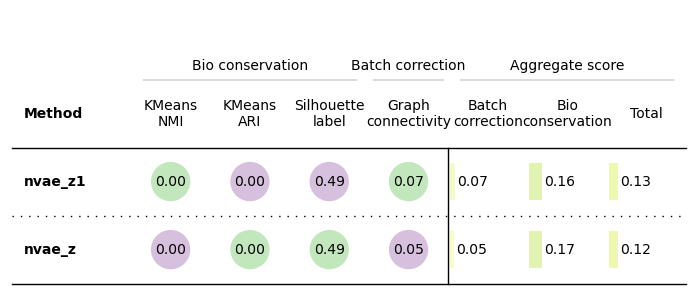

In [9]:
bm.plot_results_table(min_max_scale = False) 

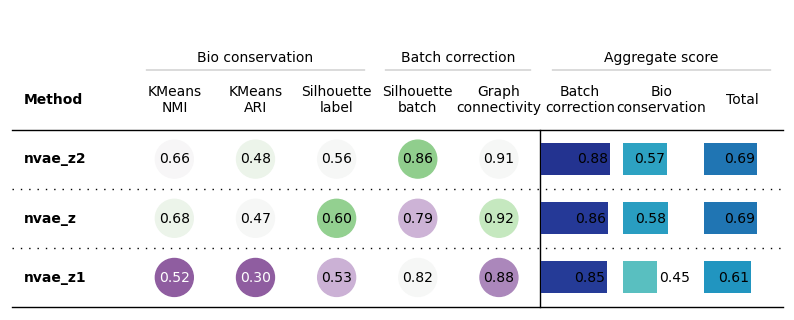

In [8]:
bm.plot_results_table(min_max_scale = False) 

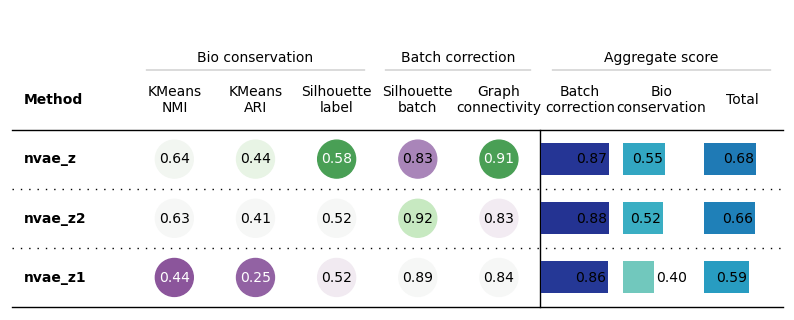

In [6]:
bm.plot_results_table(min_max_scale = False) 

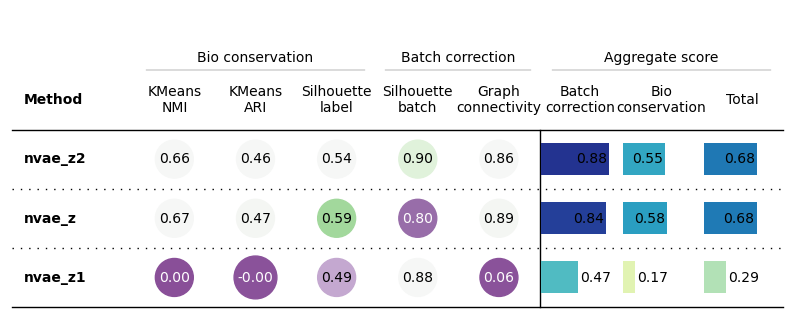

In [8]:
bm.plot_results_table(min_max_scale = False)

In [7]:
matrix_list = []
num_genes = 2000
matrix = np.asarray(adata.X.todense()) #cells x genes
print("Starting Clustering")
clf = KMeansConstrained(n_clusters=1,
    size_min=num_genes/1,
    random_state=0)
clf.fit(matrix.T)
print("Clustering Done")
print(matrix.shape)
labels = clf.labels_
means = np.mean(matrix,axis=0)
for i in range(1):
    matrix_copy = matrix.copy()
    matrix_copy[:,labels!=i] = 0
    pca = PCA(n_components=500)
    pca.fit(matrix_copy)
    pca_matrix = pca.components_
    print(pca.transform(matrix_copy))
    print(pca_matrix.shape)
    pca_matrix[:,labels!=i] = 0
    matrix_list.append(pca_matrix)
#M = torch.from_numpy(np.concatenate(matrix_list,axis=0))
M = np.concatenate(matrix_list,axis=0)

Starting Clustering
Clustering Done
(32472, 2000)
[[ 0.81751543 -5.61443    -3.2421591  ... -0.11464876  0.06361414
   0.01164278]
 [ 0.6337255  -5.783764   -4.101026   ... -0.11678372  0.01994257
  -0.14564496]
 [ 0.9689862  -6.4131603  -3.667025   ... -0.20372322 -0.17978407
  -0.15753847]
 ...
 [-5.7227397   2.3141832  -0.15165392 ... -0.23770267  0.10514253
   0.09287401]
 [-5.777993    2.556488    0.2903095  ...  0.05605945 -0.02674662
   0.17934021]
 [-5.819257    2.5783794  -0.45316744 ... -0.29484427  0.03980346
  -0.18386507]]
(500, 2000)


In [9]:
np.max((matrix_copy-means)@M.T - pca.transform(matrix_copy))

0.0

In [34]:
np.random.seed(69)
pca = PCA(n_components=500)
pca.fit(matrix)
M_ = pca.components_
means_ = pca.mean_
print((matrix-means_)@M_.T)

[[ 0.81751835 -5.6144285  -3.2421587  ...  0.03188837 -0.03425073
   0.36732018]
 [ 0.6337291  -5.783763   -4.1010265  ...  0.04728483 -0.03545175
  -0.02949969]
 [ 0.9689896  -6.4131594  -3.6670256  ...  0.12959753  0.1853936
   0.07627404]
 ...
 [-5.722742    2.3141804  -0.15165415 ... -0.06969494 -0.15711685
  -0.08725017]
 [-5.777994    2.5564857   0.29030925 ...  0.26106972 -0.0638107
  -0.10655244]
 [-5.81926     2.5783768  -0.45316732 ... -0.01335032 -0.08499458
  -0.35020134]]


In [56]:
x = matrix.copy()
l = np.ones(2000)
for i in range(len(l)):
    l[i]=i%2
x1 = x[:,l==0]
#x2 = x[:,l==1]
x1_ = x.copy()
x1_[:,l!=0] = 0

In [57]:
x1

array([[0.        , 1.2873256 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.1021552 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46898478, 0.        , 0.        , ..., 0.25714225, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [58]:
x1_

array([[0.        , 0.        , 1.2873256 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.1021552 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46898478, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [65]:
pca = PCA(n_components = 500)
o1 = pca.fit_transform(x1)

In [66]:
pca = PCA(n_components = 500)
o2 = pca.fit_transform(x1_)

In [71]:
np.max(np.abs(o2-o3))

0.14103019

In [70]:
o3 = pca.transform(x)

In [35]:
pca.transform(matrix)

array([[ 0.81751835, -5.6144285 , -3.2421587 , ...,  0.03188837,
        -0.03425073,  0.36732018],
       [ 0.6337291 , -5.783763  , -4.1010265 , ...,  0.04728483,
        -0.03545175, -0.02949969],
       [ 0.9689896 , -6.4131594 , -3.6670256 , ...,  0.12959753,
         0.1853936 ,  0.07627404],
       ...,
       [-5.722742  ,  2.3141804 , -0.15165415, ..., -0.06969494,
        -0.15711685, -0.08725017],
       [-5.777994  ,  2.5564857 ,  0.29030925, ...,  0.26106972,
        -0.0638107 , -0.10655244],
       [-5.81926   ,  2.5783768 , -0.45316732, ..., -0.01335032,
        -0.08499458, -0.35020134]], dtype=float32)

In [29]:
pca = PCA(n_components=500)
pca.fit_transform(matrix)

array([[ 0.8175255 , -5.614261  , -3.2422009 , ...,  0.08366619,
        -0.20134158, -0.19217266],
       [ 0.633735  , -5.7837844 , -4.101049  , ..., -0.10014227,
        -0.17951815,  0.23580647],
       [ 0.9690003 , -6.413146  , -3.6670465 , ...,  0.3824994 ,
        -0.07151023, -0.48849106],
       ...,
       [-5.722747  ,  2.314172  , -0.15165122, ..., -0.02561169,
        -0.10141197,  0.10313253],
       [-5.777996  ,  2.5564752 ,  0.29031217, ...,  0.10779606,
        -0.00941445, -0.16636595],
       [-5.8192625 ,  2.578368  , -0.45316434, ..., -0.01775903,
        -0.03505126, -0.18402594]], dtype=float32)

In [37]:
torch.matmul(torch.from_numpy(matrix-means_),torch.from_numpy(M_.T))

tensor([[ 0.8175, -5.6144, -3.2422,  ...,  0.0319, -0.0343,  0.3673],
        [ 0.6337, -5.7838, -4.1010,  ...,  0.0473, -0.0355, -0.0295],
        [ 0.9690, -6.4132, -3.6670,  ...,  0.1296,  0.1854,  0.0763],
        ...,
        [-5.7227,  2.3142, -0.1517,  ..., -0.0697, -0.1571, -0.0873],
        [-5.7780,  2.5565,  0.2903,  ...,  0.2611, -0.0638, -0.1066],
        [-5.8193,  2.5784, -0.4532,  ..., -0.0134, -0.0850, -0.3502]])

In [21]:
torch.meamn(torch.matmul(torch.from_numpy(matrix-means),M.T) - torch.from_numpy(pca.fit_transform(matrix)))

AttributeError: module 'torch' has no attribute 'meam'

In [13]:
import pickle
file_path = "/Users/tanushkumar/Dropbox/CS690/latents_3_nn_hvg_2"
with open(file_path, 'wb') as file:
    pickle.dump(latent, file)


In [60]:
adata.write("/Users/tanushkumar/Dropbox/CS690/Lung_benchmarking.h5ad")

In [51]:
scvi.model.SCVI.setup_anndata(
    adata
)

/Users/tanushkumar/Desktop/scvi-tools_3/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [52]:
model = scvi.model.SCVI(adata)

In [53]:
model.train()

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniforge/base/envs/Team2_updated/lib/python3.9/site-packages/lightning/pytorch/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


Epoch 1/246:   0%|                                      | 0/246 [00:00<?, ?it/s]

/Users/tanushkumar/Desktop/scvi-tools_3/scvi/module/_vae.py:483: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/Users/tanushkumar/Desktop/scvi-tools_3/scvi/module/_vae.py:483: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/246:   0%| | 1/246 [00:14<59:52, 14.67s/it, v_num=1, train_loss_step=949

/Users/tanushkumar/Desktop/scvi-tools_3/scvi/module/_vae.py:483: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 17/246:   7%| | 16/246 [05:02<1:11:44, 18.71s/it, v_num=1, train_loss_step

/opt/homebrew/Caskroom/miniforge/base/envs/Team2_updated/lib/python3.9/site-packages/lightning/pytorch/trainer/call.py:54: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [6]:
adata.obsm['scvi'] = model.get_latent_representation()

AttributeError: 'dict' object has no attribute 'shape'

In [ ]:
def knn_purity(latent, label, n_neighbors=30):
    """KNN purity."""
    nbrs = NearestNeighbors(n_neighbors=n_neighbors + 1).fit(latent)
    indices = nbrs.kneighbors(latent, return_distance=False)[:, 1:]
    neighbors_labels = np.vectorize(lambda i: label[i])(indices)
    # pre cell purity scores
    scores = ((neighbors_labels == label.reshape(-1, 1))).mean(axis=1)
    res = [np.mean(scores[label == i]) for i in np.unique(label)]  # per cell-type purity

    return np.mean(res)

In [ ]:
def entropy_of_batch_mixing(adata,key = 'z_nvae', batch = 'donor_id', n_neighbors=30):
    """Entropy of batch mixing"""
    nbrs = NearestNeighbors(n_neighbors=n_neighbors,metric = 'euclidean').fit(adata.obsm[key])
    indices = nbrs.kneighbors(adata.obsm[key], return_distance=False)[:, 1:]
    ent = 0
    for i in range(100):
        id = random.randint(0, len(adata)-1)
        batches = adata[indices[id,:]].obs[batch]
        counts = np.unique(batches,return_counts = True)[1]
        ent = ent + entropy(counts)
    

    return ent/100

In [ ]:
def global_ari(adata,key = 'z_nvae', n_neighbors=30):
    score = 0
    for i in range(10):
        kmeans = KMeans(n_clusters=n_neighbors)
        kmeans.fit(adata.obsm[key])
        labels_after = kmeans.labels_
        kmeans = KMeans(n_clusters=n_neighbors)
        kmeans.fit(np.asarray(adata.X.todense()))
        labels_before = kmeans.labels_
        score = score +  adjusted_rand_score(labels_before,labels_after)
    return score/10

In [ ]:
def evaluate(adata,key,batch_key,n_neighbors):
    print("KNN purity: " + str(knn_purity(np.array(adata.obsm[key]),label = np.array(adata.obs[batch_key]),n_neighbors = n_neighbors)))
    print("Global ARI: " + str(global_ari(adata,key,n_neighbors)))
    print("Entropy of batch mixing: " + str(entropy_of_batch_mixing(adata,key,batch_key,n_neighbors)))

In [ ]:
import warnings
warnings.filterwarnings('ignore')
keys = ['scvi','z_nvae','z1_nvae','z2_nvae']
for key in keys:
    print("Method: " + str(key))
    evaluate(adata,'z_nvae','donor_id',30)
    print("----------------------------------")

In [5]:
y = None
x = 10
y(x)

TypeError: 'NoneType' object is not callable